In [6]:
import pandas as pd
import numpy as np

import ruptures as rpt
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
import seaborn as sns

In [7]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [8]:
import holidays

In [52]:
df = pd.read_csv('/Users/estyle-150/github/my_signage/data/processed/processed20240826.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df['price_lag7'] = (df['price_am_lag_7'] + df['price_pm_lag_7']) / 2
df['price_lag_365'] = (df['price_am_lag_365'] + df['price_pm_lag_365']) / 2
df

,y,client,close,price_am,price_pm,is_train,price,year,month,weekday,...,price_pm_lag_1,price_pm_lag_7,price_pm_lag_365,price_am_moving_avg_7,price_am_moving_avg_30,price_pm_moving_avg_7,price_pm_moving_avg_30,day,price_lag7,price_lag_365
datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,1,0.134615,2010,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2010-07-02,18,0,0,0.692308,0.423077,1,0.557692,2010,7,4,...,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2010-07-03,20,0,0,1.807692,1.192308,1,1.500000,2010,7,5,...,0.423077,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2010-07-04,20,0,0,1.407407,0.925926,1,1.166667,2010,7,6,...,1.192308,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
2010-07-05,14,0,0,0.346154,0.192308,1,0.269231,2010,7,0,...,0.925926,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,0,0,5.000000,4.000000,0,4.500000,2017,3,0,...,4.000000,4.0,4.0,3.857143,2.166667,4.000000,2.166667,27,3.5,4.5
2017-03-28,0,0,0,4.000000,4.000000,0,4.000000,2017,3,1,...,4.000000,4.0,4.0,3.857143,2.233333,4.000000,2.233333,28,4.0,4.0
2017-03-29,0,0,0,3.000000,3.000000,0,3.000000,2017,3,2,...,4.000000,4.0,4.0,4.000000,2.266667,3.857143,2.266667,29,3.0,4.0


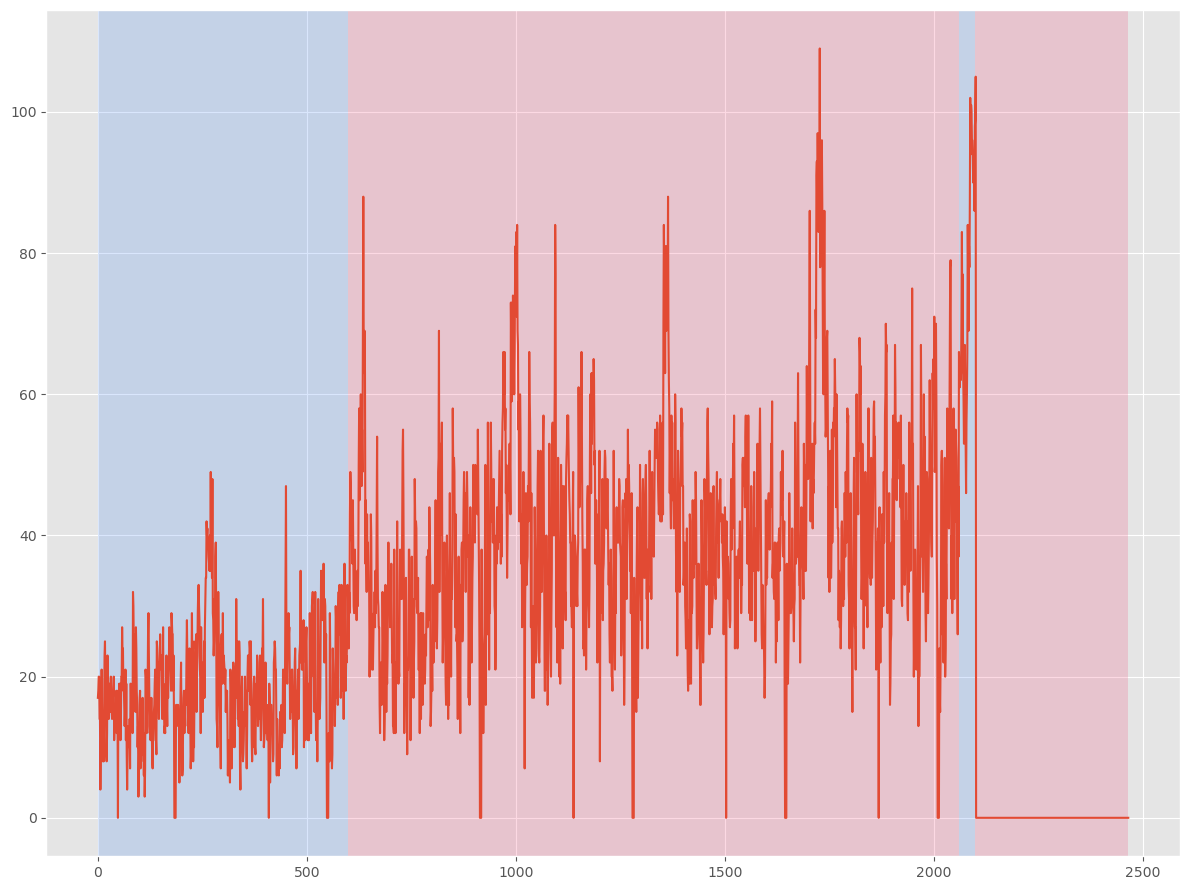

[600, 2060, 2100, 2466]


,y,client,close,price,year,month,weekday,price_lag_365
datetime,,,,,,,,
2012-02-21,24,0,0,0.0,2012,2,1,0.0
2012-02-22,32,0,0,0.0,2012,2,2,0.5
2012-02-23,29,0,0,0.5,2012,2,3,0.5
2012-02-24,43,0,0,1.0,2012,2,4,1.0
2012-02-25,49,0,0,2.5,2012,2,5,1.5


,client,close,price,year,month,weekday,price_lag_365
datetime,,,,,,,
2016-04-01,1,0,2.5,2016,4,4,2.0
2016-04-02,0,0,5.0,2016,4,5,1.5
2016-04-03,1,0,2.0,2016,4,6,3.5
2016-04-04,1,0,1.0,2016,4,0,2.0
2016-04-05,0,0,1.0,2016,4,1,1.0


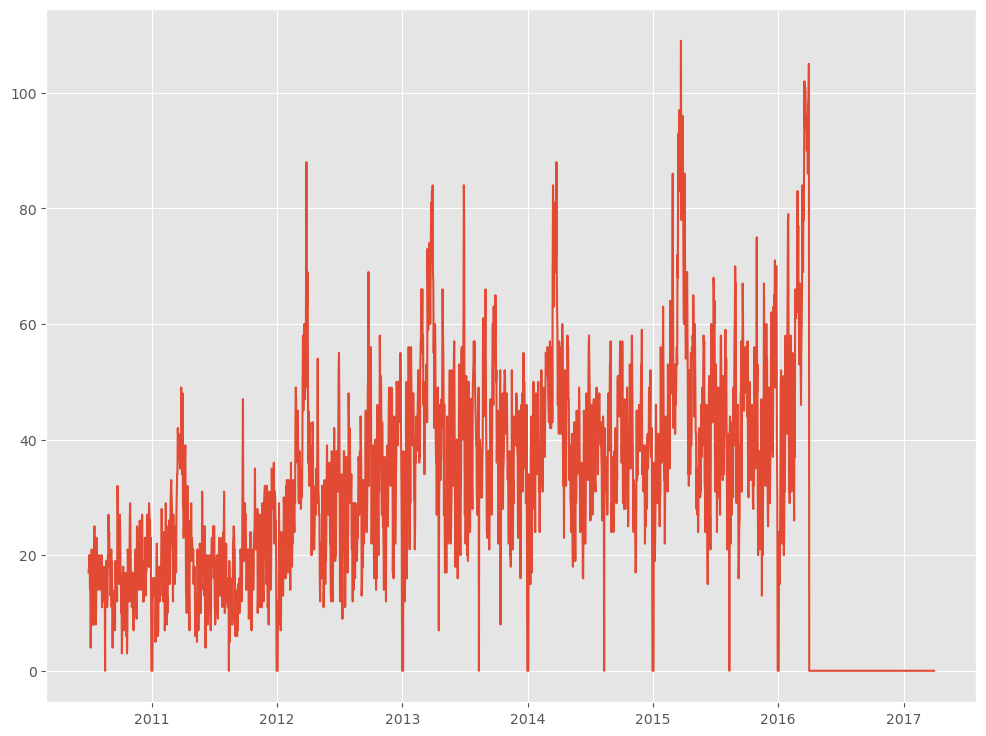

In [53]:
# 使用するカラム
use_list = ['y', 'is_train', 'client', 'close',	'price', 'year', 'month',
            'weekday', 'price_lag_365',]


################
### 変化点検知 ###
################

# コスト関数の設定
model = "l2"
# アルゴの設定と学習
algo = rpt.Dynp(model=model).fit(df[['y']])
# 変化点の検出
my_bkps = algo.predict(n_bkps=3)
# 結果のプロット
rpt.show.display(df[['y']], my_bkps, figsize=(12, 9))
plt.show()
# 検出された変化点
print(my_bkps)

df_2 = df[my_bkps[0]:]
df_use = df_2[use_list]

# 訓練データをとる
train_data = df_use[df_use['is_train'] == 1].copy()

# テストデータをとる
test_data = df_use[df_use['is_train'] == 0].copy()

# 訓練データから不要な列（'is_train'）を削除
train_data.drop(['is_train'], axis=1, inplace=True)

# テストデータから不要な列を削除
test_data.drop(['y','is_train'], axis=1, inplace=True)

# テストデータからcloseを削除（このデータで予測する）
test_data_open = test_data.drop(['close'], axis=1, inplace=False)

display(train_data.head(), test_data.head())


plt.plot(df['y'])

In [54]:
# 訓練データから閉店時のデータを削除（これを学習させる）
train_data_open =  train_data[train_data['close']==0]
train_data_open_2 = train_data_open.drop(['close'], axis=1, inplace=False)

print(len(train_data_open_2))
print(len(train_data))

1482
1501


In [55]:
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb_op
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

# 訓練データと検証データに分ける
N = 10
X_train = train_data_open_2.drop(['y'], axis=1)[:-N]
y_train = train_data_open_2['y'][:-N]

X_test = train_data_open_2.drop(['y'], axis=1)[-N:]
y_test = train_data_open_2['y'][-N:]

# LightGBM用のデータセット
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

# 評価基準 
params = {"objective" : "regression", 
              "metric" : "mse", 
              "num_leaves" : 7,
              "early_stopping_rounds" : 50,
              "verbosity": -1}

# 回帰モデル作成
model = lgb.train(params, lgb_train, valid_sets=lgb_test)

# 予測
test_pred = model.predict(X_test)
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_pred)], axis = 1)
pred_df.columns = ['true', 'pred']
pred_df

mae = np.sqrt(mean_squared_error(y_test, test_pred))
print('MAE:',round(mae,3))

MAE: 6.32


([<matplotlib.axis.XTick at 0x303976990>,
 [Text(0, 0, 'client'),
  Text(1, 0, 'price'),
  Text(2, 0, 'year'),
  Text(3, 0, 'weekday'),
  Text(4, 0, 'month'),
  Text(5, 0, 'y')])

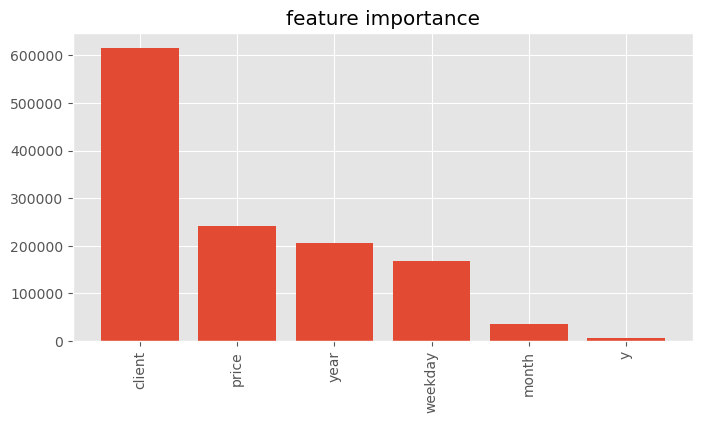

In [56]:
importances = model.feature_importance(importance_type='gain')
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.title('feature importance')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), train_data_open_2.columns[indices], rotation=90)

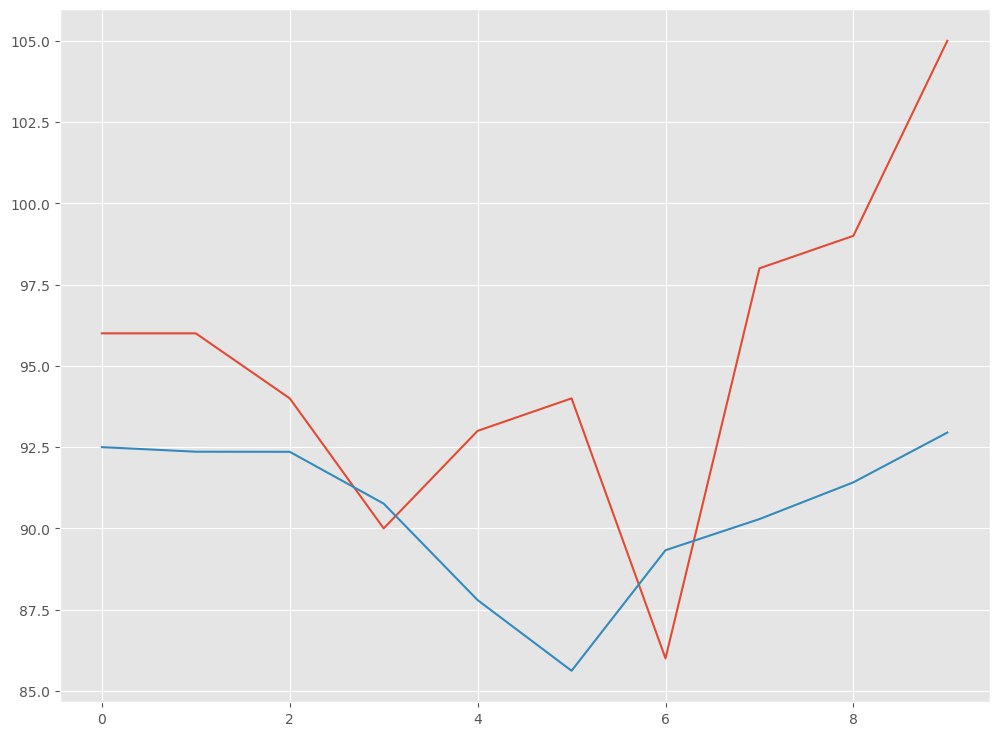

In [57]:
# 可視化
plt.plot(pred_df)

In [58]:
# oputunaによるハイパーパラメータのチューニング
import optuna

In [59]:
x_tr = X_train
x_va = X_test
y_tr = y_train
y_va = y_test

In [60]:
# 固定値のハイパーパラメータ
params_base = {
    'objective' : 'regression',
    'metrics' : 'mse',
    'random_seed' : 123,    
    'learnig_rate' : 0.1,  # １回のブースティングで加算する重みの比率
    'min_data_in_bin' : 3,  # ヒストグラムの１つのbinに含まれる最小のレコード数
    'bagging_freq' : 0,
    'verbose' : -1,
}


# ハイパーパラメータの探索範囲
def objective(trial):
    params_turning = {
        'num_leaves' : trial.suggest_int('num_leaves', 50, 200),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 30),
        'max_bins' : trial.suggest_int('max_bin', 200, 400),
        'bagging_fraction' : trial.suggest_float('bagging_fraction', 0.8, 0.95),
        'feature_fraction' : trial.suggest_float('eature_fraction', 0.35, 0.65),
        'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0.01, 1, log=True),
        'lambda_11' : trial.suggest_float('lambda_11', 0.01, 1, log=True),
        'lambda_12' : trial.suggest_float('lambda_12', 0.01, 1, log=True),
    }
    
    # 探索用ハイパーパラメータの設定
    params_turning.update(params_base)
    lgb_train = lgb.Dataset(x_tr, y_tr)
    lgb_eval = lgb.Dataset(x_va, y_va)

    #探索用ハイパーパラメータで学習
    model = lgb.train(params_turning,
                      lgb_train,
                      num_boost_round=6000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(50),
                                 lgb.log_evaluation(500)])
    y_va_pred = model.predict(x_va,
                              num_iteration=model.best_iteration)
    score = mean_absolute_error(y_va, y_va_pred)
    print('')
    return score

In [61]:
# ハイパーパラメータの最適化の実行
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=0), direction='minimize')
study.optimize(objective, n_trials=1500)

[I 2024-09-05 09:41:28,425] A new study created in memory with name: no-name-11e3b55f-cabc-4bf0-ac9b-a406899c57c5
[I 2024-09-05 09:41:28,521] Trial 0 finished with value: 5.2070779677347145 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 22, 'max_bin': 321, 'bagging_fraction': 0.8817324774495345, 'eature_fraction': 0.47709643980167143, 'min_gain_to_split': 0.19578897201212997, 'lambda_11': 0.07501954443620121, 'lambda_12': 0.6074996073425692}. Best is trial 0 with value: 5.2070779677347145.
[I 2024-09-05 09:41:28,582] Trial 1 finished with value: 6.192019251679605 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8793342379629356, 'eature_fraction': 0.5204133683281797, 'min_gain_to_split': 0.70989362574059, 'lambda_11': 0.013869861245357327, 'lambda_12': 0.014936835544198456}. Best is trial 0 with value: 5.2070779677347145.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[207]	train's l2: 44.8713	valid's l2: 46.2789

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[140]	train's l2: 43.8139	valid's l2: 55.0411

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:28,679] Trial 2 finished with value: 4.933434782300381 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 26, 'max_bin': 356, 'bagging_fraction': 0.9305018222370228, 'eature_fraction': 0.6435855026698292, 'min_gain_to_split': 0.3965675081771009, 'lambda_11': 0.08374496868436809, 'lambda_12': 0.36396393567863894}. Best is trial 2 with value: 4.933434782300381.
[I 2024-09-05 09:41:28,762] Trial 3 finished with value: 5.36874327229846 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 20, 'max_bin': 228, 'bagging_fraction': 0.9417003375574375, 'eature_fraction': 0.5065544965250215, 'min_gain_to_split': 0.06750312521595925, 'lambda_11': 0.0338151426782029, 'lambda_12': 0.35356346291488117}. Best is trial 2 with value: 4.933434782300381.
[I 2024-09-05 09:41:28,844] Trial 4 finished with value: 6.187139780942472 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8926453245613816, 'eature_fraction': 0.5336287168167264,

Early stopping, best iteration is:
[284]	train's l2: 41.1172	valid's l2: 37.6725

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[208]	train's l2: 43.6384	valid's l2: 48.8975

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[268]	train's l2: 42.6659	valid's l2: 58.6386

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:28,920] Trial 5 finished with value: 6.306157576170543 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 340, 'bagging_fraction': 0.8090338207443906, 'eature_fraction': 0.5500300146337003, 'min_gain_to_split': 0.21941976179005757, 'lambda_11': 0.02634905974115613, 'lambda_12': 0.018107254066631072}. Best is trial 2 with value: 4.933434782300381.


Early stopping, best iteration is:
[148]	train's l2: 42.6048	valid's l2: 56.7348

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:29,151] Trial 6 finished with value: 4.568491295768347 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.865790227019348, 'eature_fraction': 0.6465121514177679, 'min_gain_to_split': 0.015998881492631498, 'lambda_11': 0.02616697456085447, 'lambda_12': 0.021019338091154416}. Best is trial 6 with value: 4.568491295768347.
[I 2024-09-05 09:41:29,211] Trial 7 finished with value: 5.670540916414832 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 9, 'max_bin': 293, 'bagging_fraction': 0.8366638388002404, 'eature_fraction': 0.3976908750936559, 'min_gain_to_split': 0.016624564693643644, 'lambda_11': 0.2054277828628595, 'lambda_12': 0.018895826938026012}. Best is trial 6 with value: 4.568491295768347.


Early stopping, best iteration is:
[340]	train's l2: 27.1189	valid's l2: 30.0946

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 58.6545	valid's l2: 47.528

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:29,406] Trial 8 finished with value: 4.855754775423671 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8145651913689592, 'eature_fraction': 0.6013834722496412, 'min_gain_to_split': 0.015566709318481201, 'lambda_11': 0.8972612866432508, 'lambda_12': 0.08655704137361815}. Best is trial 6 with value: 4.568491295768347.
[I 2024-09-05 09:41:29,517] Trial 9 finished with value: 5.857073728730787 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 19, 'max_bin': 348, 'bagging_fraction': 0.8058781688381481, 'eature_fraction': 0.43484208877292285, 'min_gain_to_split': 0.017393745944806985, 'lambda_11': 0.0391093317225106, 'lambda_12': 0.0172764870082179}. Best is trial 6 with value: 4.568491295768347.


Early stopping, best iteration is:
[220]	train's l2: 30.2899	valid's l2: 31.0579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	train's l2: 42.7446	valid's l2: 54.3389

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:29,610] Trial 10 finished with value: 6.216967863868949 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 3, 'max_bin': 274, 'bagging_fraction': 0.8477755677707187, 'eature_fraction': 0.35831680797439047, 'min_gain_to_split': 0.05330204188167732, 'lambda_11': 0.012937145668124131, 'lambda_12': 0.07147694761170445}. Best is trial 6 with value: 4.568491295768347.


Early stopping, best iteration is:
[144]	train's l2: 57.0337	valid's l2: 73.709

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:29,840] Trial 11 finished with value: 4.855822748407659 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 8, 'max_bin': 384, 'bagging_fraction': 0.8439873483062942, 'eature_fraction': 0.6497644585835788, 'min_gain_to_split': 0.011759570092455911, 'lambda_11': 0.6732083881543502, 'lambda_12': 0.05966060760625274}. Best is trial 6 with value: 4.568491295768347.


Early stopping, best iteration is:
[159]	train's l2: 28.6634	valid's l2: 28.657

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[272]	train's l2: 27.4005	valid's l2: 23.3873


[I 2024-09-05 09:41:30,044] Trial 12 finished with value: 4.3237585265044345 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 9, 'max_bin': 385, 'bagging_fraction': 0.8275817798055114, 'eature_fraction': 0.5951575895489213, 'min_gain_to_split': 0.03476707630905029, 'lambda_11': 0.31211954149297433, 'lambda_12': 0.043746926368901824}. Best is trial 12 with value: 4.3237585265044345.
[I 2024-09-05 09:41:30,162] Trial 13 finished with value: 5.820088842057369 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 2, 'max_bin': 397, 'bagging_fraction': 0.9070519208637755, 'eature_fraction': 0.58559941302925, 'min_gain_to_split': 0.03851721907344807, 'lambda_11': 0.26951260586178655, 'lambda_12': 0.039302675397871176}. Best is trial 12 with value: 4.3237585265044345.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	train's l2: 28.1405	valid's l2: 49.2741

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:30,476] Trial 14 finished with value: 4.65778016379699 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 7, 'max_bin': 258, 'bagging_fraction': 0.862886007456836, 'eature_fraction': 0.6002632503227319, 'min_gain_to_split': 0.029388491126196917, 'lambda_11': 0.21928781431490782, 'lambda_12': 0.030979464779935486}. Best is trial 12 with value: 4.3237585265044345.
[I 2024-09-05 09:41:30,628] Trial 15 finished with value: 5.0830861624431 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 10, 'max_bin': 313, 'bagging_fraction': 0.828981551317644, 'eature_fraction': 0.5723196120230692, 'min_gain_to_split': 0.03692789707108002, 'lambda_11': 0.4570097657585982, 'lambda_12': 0.14573577212625521}. Best is trial 12 with value: 4.3237585265044345.


Early stopping, best iteration is:
[238]	train's l2: 25.9377	valid's l2: 33.0704

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	train's l2: 37.9783	valid's l2: 34.5444

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:30,776] Trial 16 finished with value: 4.8135924284888585 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 5, 'max_bin': 295, 'bagging_fraction': 0.8576893224108879, 'eature_fraction': 0.6234449475160135, 'min_gain_to_split': 0.10343272083950615, 'lambda_11': 0.14517630024365485, 'lambda_12': 0.0362544689407835}. Best is trial 12 with value: 4.3237585265044345.
[I 2024-09-05 09:41:30,912] Trial 17 finished with value: 6.021742482525046 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 249, 'bagging_fraction': 0.8264873779000463, 'eature_fraction': 0.4734407731496639, 'min_gain_to_split': 0.02579865811579198, 'lambda_11': 0.05318199317948794, 'lambda_12': 0.044264756425648866}. Best is trial 12 with value: 4.3237585265044345.


Early stopping, best iteration is:
[86]	train's l2: 29.7957	valid's l2: 34.9106

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[156]	train's l2: 41.7133	valid's l2: 55.6996

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:31,114] Trial 18 finished with value: 4.23015719696769 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 29, 'max_bin': 329, 'bagging_fraction': 0.9033586093477657, 'eature_fraction': 0.5538474078085237, 'min_gain_to_split': 0.010364894052659758, 'lambda_11': 0.020777262522317097, 'lambda_12': 0.010073007467333386}. Best is trial 18 with value: 4.23015719696769.


[500]	train's l2: 40.8361	valid's l2: 29.4706
Early stopping, best iteration is:
[481]	train's l2: 41.0458	valid's l2: 29.1966

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:31,310] Trial 19 finished with value: 4.00388067782129 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 28, 'max_bin': 382, 'bagging_fraction': 0.9115351399373323, 'eature_fraction': 0.553434122057738, 'min_gain_to_split': 0.010081173925477924, 'lambda_11': 0.37934721867328114, 'lambda_12': 0.011007921932009923}. Best is trial 19 with value: 4.00388067782129.
[I 2024-09-05 09:41:31,475] Trial 20 finished with value: 4.514364840629146 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 29, 'max_bin': 324, 'bagging_fraction': 0.9136666455703358, 'eature_fraction': 0.5562550201746085, 'min_gain_to_split': 0.010779662092577833, 'lambda_11': 0.13358539077049342, 'lambda_12': 0.01278705889300724}. Best is trial 19 with value: 4.00388067782129.


Early stopping, best iteration is:
[412]	train's l2: 41.6778	valid's l2: 27.7036

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	train's l2: 42.2885	valid's l2: 34.6185

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:31,699] Trial 21 finished with value: 4.270549167182004 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 30, 'max_bin': 381, 'bagging_fraction': 0.9073253373131361, 'eature_fraction': 0.562066673553407, 'min_gain_to_split': 0.010040893641487664, 'lambda_11': 0.36437509787043454, 'lambda_12': 0.010101790649337259}. Best is trial 19 with value: 4.00388067782129.
[I 2024-09-05 09:41:31,790] Trial 22 finished with value: 5.284863665996868 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 30, 'max_bin': 374, 'bagging_fraction': 0.9128901357118938, 'eature_fraction': 0.5424527828357766, 'min_gain_to_split': 0.02316868169599053, 'lambda_11': 0.4423960028084392, 'lambda_12': 0.010089646397938606}. Best is trial 19 with value: 4.00388067782129.


[500]	train's l2: 41.4302	valid's l2: 32.5258
Early stopping, best iteration is:
[536]	train's l2: 40.8544	valid's l2: 30.4541

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.3425	valid's l2: 45.9954

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:31,932] Trial 23 finished with value: 4.9061686540940315 and parameters: {'num_leaves': 168, 'min_data_in_leaf': 25, 'max_bin': 337, 'bagging_fraction': 0.8975217594746854, 'eature_fraction': 0.48779658178792473, 'min_gain_to_split': 0.012123648909821127, 'lambda_11': 0.5095863143567549, 'lambda_12': 0.01108842624547537}. Best is trial 19 with value: 4.00388067782129.
[I 2024-09-05 09:41:32,045] Trial 24 finished with value: 5.275685222138485 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 27, 'max_bin': 376, 'bagging_fraction': 0.929479004591425, 'eature_fraction': 0.5713543857731507, 'min_gain_to_split': 0.011169845982965507, 'lambda_11': 0.1430392689536341, 'lambda_12': 0.022747088393527463}. Best is trial 19 with value: 4.00388067782129.


Early stopping, best iteration is:
[285]	train's l2: 43.088	valid's l2: 41.4785

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 45.7621	valid's l2: 44.3439

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:32,379] Trial 25 finished with value: 3.819340949635273 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 23, 'max_bin': 336, 'bagging_fraction': 0.9222739622428856, 'eature_fraction': 0.5085821451755427, 'min_gain_to_split': 0.021882287668010363, 'lambda_11': 0.01008469165408217, 'lambda_12': 0.010703171101092682}. Best is trial 25 with value: 3.819340949635273.


[500]	train's l2: 38.4989	valid's l2: 30.2377
Early stopping, best iteration is:
[791]	train's l2: 35.7593	valid's l2: 24.1043

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:32,647] Trial 26 finished with value: 4.276686878832898 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 23, 'max_bin': 334, 'bagging_fraction': 0.9241817477307761, 'eature_fraction': 0.45567619040351953, 'min_gain_to_split': 0.021928574303455562, 'lambda_11': 0.018819844584354435, 'lambda_12': 0.027581324650831955}. Best is trial 25 with value: 3.819340949635273.
[I 2024-09-05 09:41:32,829] Trial 27 finished with value: 4.4576204503679175 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 24, 'max_bin': 400, 'bagging_fraction': 0.9436485630066894, 'eature_fraction': 0.5118798609504226, 'min_gain_to_split': 0.05463217754418641, 'lambda_11': 0.010073436745843479, 'lambda_12': 0.12443865861439836}. Best is trial 25 with value: 3.819340949635273.


Early stopping, best iteration is:
[401]	train's l2: 39.9063	valid's l2: 32.2206

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.323	valid's l2: 32.7616
Early stopping, best iteration is:
[465]	train's l2: 39.6941	valid's l2: 32.5361

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:33,092] Trial 28 finished with value: 3.9865935125562175 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 28, 'max_bin': 282, 'bagging_fraction': 0.8917284082302703, 'eature_fraction': 0.5273634235594487, 'min_gain_to_split': 0.10120622622408648, 'lambda_11': 0.019104864681811, 'lambda_12': 0.014392961258907825}. Best is trial 25 with value: 3.819340949635273.


[500]	train's l2: 41.575	valid's l2: 28.0375
Early stopping, best iteration is:
[483]	train's l2: 41.6823	valid's l2: 27.8844

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:33,375] Trial 29 finished with value: 4.07158944137945 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 27, 'max_bin': 281, 'bagging_fraction': 0.8937294386930237, 'eature_fraction': 0.45127383122201925, 'min_gain_to_split': 0.09924022627337772, 'lambda_11': 0.04879642187741496, 'lambda_12': 0.014630251846564819}. Best is trial 25 with value: 3.819340949635273.
[I 2024-09-05 09:41:33,481] Trial 30 finished with value: 4.7700101502303 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 21, 'max_bin': 311, 'bagging_fraction': 0.8881838212293557, 'eature_fraction': 0.528446833310479, 'min_gain_to_split': 0.15717485665483993, 'lambda_11': 0.010304457495101858, 'lambda_12': 0.024678226920317126}. Best is trial 25 with value: 3.819340949635273.


[500]	train's l2: 41.1145	valid's l2: 30.6639
Early stopping, best iteration is:
[622]	train's l2: 40.2147	valid's l2: 28.2153

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[169]	train's l2: 45.2973	valid's l2: 39.4317

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:33,718] Trial 31 finished with value: 4.370179079392483 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 27, 'max_bin': 279, 'bagging_fraction': 0.8847169329112516, 'eature_fraction': 0.44281798719640175, 'min_gain_to_split': 0.0921768272083002, 'lambda_11': 0.04194932250232821, 'lambda_12': 0.013963929732590082}. Best is trial 25 with value: 3.819340949635273.
[I 2024-09-05 09:41:33,802] Trial 32 finished with value: 6.925514660620541 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 22, 'max_bin': 276, 'bagging_fraction': 0.9204991731055221, 'eature_fraction': 0.47621972696976544, 'min_gain_to_split': 0.3034132169018374, 'lambda_11': 0.06832354892637103, 'lambda_12': 0.015641482209414827}. Best is trial 25 with value: 3.819340949635273.


[500]	train's l2: 41.0922	valid's l2: 38.0258
Early stopping, best iteration is:
[592]	train's l2: 40.2846	valid's l2: 33.0161

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	train's l2: 49.5015	valid's l2: 67.6875

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:34,043] Trial 33 finished with value: 3.562442448258298 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 27, 'max_bin': 254, 'bagging_fraction': 0.8755008959496633, 'eature_fraction': 0.4991133593986432, 'min_gain_to_split': 0.060799649249671246, 'lambda_11': 0.015367188863274563, 'lambda_12': 0.013803875857598848}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.8399	valid's l2: 22.9306
Early stopping, best iteration is:
[509]	train's l2: 40.7288	valid's l2: 22.3187

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.0847	valid's l2: 31.6784


[I 2024-09-05 09:41:34,280] Trial 34 finished with value: 4.230804456601545 and parameters: {'num_leaves': 168, 'min_data_in_leaf': 25, 'max_bin': 251, 'bagging_fraction': 0.8754303264054315, 'eature_fraction': 0.4990143491330125, 'min_gain_to_split': 0.06781841030291845, 'lambda_11': 0.01582978418357456, 'lambda_12': 0.01404147913291549}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:34,357] Trial 35 finished with value: 5.587455876376917 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 28, 'max_bin': 234, 'bagging_fraction': 0.8789583587087892, 'eature_fraction': 0.517043887322631, 'min_gain_to_split': 0.9260271129377952, 'lambda_11': 0.015089943169367305, 'lambda_12': 0.6480358601192391}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[594]	train's l2: 39.2012	valid's l2: 29.5981

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 49.3137	valid's l2: 46.7795

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:34,497] Trial 36 finished with value: 6.1566550191932645 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 17, 'max_bin': 265, 'bagging_fraction': 0.9350366120282958, 'eature_fraction': 0.49659543110324716, 'min_gain_to_split': 0.07360072321142228, 'lambda_11': 0.0265000266487212, 'lambda_12': 0.021073441201171612}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[173]	train's l2: 43.0175	valid's l2: 55.1527

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.4504	valid's l2: 31.417
Early stopping, best iteration is:
[524]	train's l2: 41.359	valid's l2: 30.1173


[I 2024-09-05 09:41:34,705] Trial 37 finished with value: 4.204100786281289 and parameters: {'num_leaves': 176, 'min_data_in_leaf': 25, 'max_bin': 211, 'bagging_fraction': 0.8686607096551121, 'eature_fraction': 0.5290311745588536, 'min_gain_to_split': 0.15936173486718008, 'lambda_11': 0.020411644225531503, 'lambda_12': 0.36299139803687386}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:34,826] Trial 38 finished with value: 5.686027677065388 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 23, 'max_bin': 235, 'bagging_fraction': 0.9197263986771734, 'eature_fraction': 0.4100318333041807, 'min_gain_to_split': 0.125149663527715, 'lambda_11': 0.01247688326329074, 'lambda_12': 0.02994247561320005}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[345]	train's l2: 58.5411	valid's l2: 41.1783

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:34,928] Trial 39 finished with value: 6.117748908699257 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 20, 'max_bin': 350, 'bagging_fraction': 0.8977516587524542, 'eature_fraction': 0.48540505543200496, 'min_gain_to_split': 0.4399044974891956, 'lambda_11': 0.030850054344518173, 'lambda_12': 0.47757908490575907}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:35,040] Trial 40 finished with value: 3.9107159277061614 and parameters: {'num_leaves': 199, 'min_data_in_leaf': 26, 'max_bin': 305, 'bagging_fraction': 0.8870334299938846, 'eature_fraction': 0.465717593412497, 'min_gain_to_split': 0.26100925302096906, 'lambda_11': 0.10667928631577427, 'lambda_12': 0.2531233362355415}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[220]	train's l2: 46.5158	valid's l2: 57.0448

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[425]	train's l2: 43.7719	valid's l2: 25.7347

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:35,172] Trial 41 finished with value: 4.2239065959868425 and parameters: {'num_leaves': 199, 'min_data_in_leaf': 26, 'max_bin': 300, 'bagging_fraction': 0.8854852300852151, 'eature_fraction': 0.46559500175037455, 'min_gain_to_split': 0.2581925574119438, 'lambda_11': 0.08509880446401051, 'lambda_12': 0.8403231259505579}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[392]	train's l2: 43.6431	valid's l2: 29.89

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9866	valid's l2: 28.3864


[I 2024-09-05 09:41:35,407] Trial 42 finished with value: 3.874028518727479 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 28, 'max_bin': 288, 'bagging_fraction': 0.9487548495146303, 'eature_fraction': 0.4200344506203934, 'min_gain_to_split': 0.04857811964045111, 'lambda_11': 0.10048740951431852, 'lambda_12': 0.22684480874152926}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:35,474] Trial 43 finished with value: 8.747173174326017 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 26, 'max_bin': 304, 'bagging_fraction': 0.9476709067378044, 'eature_fraction': 0.38811660988028784, 'min_gain_to_split': 0.04778315118001459, 'lambda_11': 0.1080552168928694, 'lambda_12': 0.21315186709081765}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:35,575] Trial 44 finished with value: 5.212438942662317 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 23, 'max_bin': 290, 'bagging_fraction': 0.9363259299685183, 'eature_fraction': 0.4266305

Early stopping, best iteration is:
[551]	train's l2: 40.3937	valid's l2: 25.5662

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0594	valid's l2: 102.202

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 47.5683	valid's l2: 46.672

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:35,706] Trial 45 finished with value: 5.190988900104683 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 28, 'max_bin': 287, 'bagging_fraction': 0.9497909869941484, 'eature_fraction': 0.4174647561518853, 'min_gain_to_split': 0.20383966905052364, 'lambda_11': 0.08835713022734713, 'lambda_12': 0.27779873973092073}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:35,808] Trial 46 finished with value: 6.339639804829796 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 21, 'max_bin': 263, 'bagging_fraction': 0.8506407545816103, 'eature_fraction': 0.38409110514613937, 'min_gain_to_split': 0.04355046224197365, 'lambda_11': 0.16669392050325166, 'lambda_12': 0.19843745321826753}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[304]	train's l2: 44.8811	valid's l2: 43.5927

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[292]	train's l2: 57.9345	valid's l2: 59.9618

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:35,938] Trial 47 finished with value: 5.155736285637748 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 30, 'max_bin': 269, 'bagging_fraction': 0.8719481031685116, 'eature_fraction': 0.5053064776730112, 'min_gain_to_split': 0.08069770283099054, 'lambda_11': 0.1077468831058206, 'lambda_12': 0.13681401084921488}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[204]	train's l2: 47.7219	valid's l2: 43.1007

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.4174	valid's l2: 32.6267


[I 2024-09-05 09:41:36,156] Trial 48 finished with value: 4.404381350801397 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 24, 'max_bin': 320, 'bagging_fraction': 0.8801976119958604, 'eature_fraction': 0.46074213506559336, 'min_gain_to_split': 0.12493175666925586, 'lambda_11': 0.05680350558037786, 'lambda_12': 0.17361099825103474}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:36,240] Trial 49 finished with value: 8.746099976965196 and parameters: {'num_leaves': 172, 'min_data_in_leaf': 26, 'max_bin': 248, 'bagging_fraction': 0.8578543681282885, 'eature_fraction': 0.35066198625280615, 'min_gain_to_split': 0.061176126197432505, 'lambda_11': 0.011991803304765423, 'lambda_12': 0.09515043469756172}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[517]	train's l2: 40.2579	valid's l2: 32.5865

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0612	valid's l2: 102.184

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:36,408] Trial 50 finished with value: 6.363127595931752 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 19, 'max_bin': 306, 'bagging_fraction': 0.9276379696957884, 'eature_fraction': 0.538326367079234, 'min_gain_to_split': 0.031099671919703295, 'lambda_11': 0.017228862606427645, 'lambda_12': 0.07343993751060925}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[195]	train's l2: 43.0546	valid's l2: 60.7324

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:36,694] Trial 51 finished with value: 4.602934856229223 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 28, 'max_bin': 361, 'bagging_fraction': 0.9025002816349915, 'eature_fraction': 0.5266299464858566, 'min_gain_to_split': 0.01469833955454973, 'lambda_11': 0.21902282877060936, 'lambda_12': 0.290722846715429}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:36,818] Trial 52 finished with value: 5.446157103970178 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 29, 'max_bin': 345, 'bagging_fraction': 0.9137389881194968, 'eature_fraction': 0.4918098141691306, 'min_gain_to_split': 0.014201617846186612, 'lambda_11': 0.02297634997773561, 'lambda_12': 0.0176499192151181}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.4906	valid's l2: 36.6479
Early stopping, best iteration is:
[509]	train's l2: 40.3373	valid's l2: 36.0834

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[223]	train's l2: 46.7256	valid's l2: 49.5099

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:37,068] Trial 53 finished with value: 4.20359460564393 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 28, 'max_bin': 287, 'bagging_fraction': 0.8904357055032995, 'eature_fraction': 0.510032374190603, 'min_gain_to_split': 0.01788860231967621, 'lambda_11': 0.013911364435074307, 'lambda_12': 0.4640509729635889}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.7479	valid's l2: 30.4852
Early stopping, best iteration is:
[525]	train's l2: 40.3618	valid's l2: 30.1845

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:37,385] Trial 54 finished with value: 3.8465458953611473 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 27, 'max_bin': 218, 'bagging_fraction': 0.9074374367508157, 'eature_fraction': 0.5179767337746592, 'min_gain_to_split': 0.04262455027622225, 'lambda_11': 0.9863005002008527, 'lambda_12': 0.011829898529643744}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.5032	valid's l2: 26.0572
Early stopping, best iteration is:
[611]	train's l2: 39.2951	valid's l2: 22.7503

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:37,595] Trial 55 finished with value: 4.84224152743909 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.9361266037830056, 'eature_fraction': 0.4711098516016689, 'min_gain_to_split': 0.0434392663045261, 'lambda_11': 0.03444162803867847, 'lambda_12': 0.012028576149396768}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[427]	train's l2: 40.0544	valid's l2: 39.2814

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.4256	valid's l2: 28.5694


[I 2024-09-05 09:41:37,865] Trial 56 finished with value: 3.9595976203190375 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 27, 'max_bin': 202, 'bagging_fraction': 0.8963824702053808, 'eature_fraction': 0.5201336732871154, 'min_gain_to_split': 0.020163230692908755, 'lambda_11': 0.669555190011491, 'lambda_12': 0.018809962443392267}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[603]	train's l2: 39.2174	valid's l2: 26.2305

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:38,079] Trial 57 finished with value: 3.7593136133301117 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 203, 'bagging_fraction': 0.8989750107162908, 'eature_fraction': 0.4848935189166779, 'min_gain_to_split': 0.021021981597115536, 'lambda_11': 0.602059742415533, 'lambda_12': 0.017708761175775183}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 39.9209	valid's l2: 23.8661
Early stopping, best iteration is:
[471]	train's l2: 40.3189	valid's l2: 23.4189

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[449]	train's l2: 40.2102	valid's l2: 30.8789



[I 2024-09-05 09:41:38,259] Trial 58 finished with value: 4.268058454406753 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 25, 'max_bin': 209, 'bagging_fraction': 0.9025309848438358, 'eature_fraction': 0.4374224175536432, 'min_gain_to_split': 0.03261176749026647, 'lambda_11': 0.9979301413625686, 'lambda_12': 0.11438203346336814}. Best is trial 33 with value: 3.562442448258298.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.2266	valid's l2: 33.8582


[I 2024-09-05 09:41:38,494] Trial 59 finished with value: 4.20074256036777 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 29, 'max_bin': 224, 'bagging_fraction': 0.9190655247002608, 'eature_fraction': 0.4824357015282265, 'min_gain_to_split': 0.024742915492269077, 'lambda_11': 0.8017479577965338, 'lambda_12': 0.049324805435326115}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:38,586] Trial 60 finished with value: 7.659939321347575 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 22, 'max_bin': 240, 'bagging_fraction': 0.9088244297878127, 'eature_fraction': 0.3699014257004332, 'min_gain_to_split': 0.028756236437563257, 'lambda_11': 0.6051802738717649, 'lambda_12': 0.16492824691528982}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[592]	train's l2: 40.1914	valid's l2: 29.159

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[148]	train's l2: 61.0102	valid's l2: 79.2822

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:38,813] Trial 61 finished with value: 4.013076839088553 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 200, 'bagging_fraction': 0.8985852466980809, 'eature_fraction': 0.5164464126625276, 'min_gain_to_split': 0.018900558963857922, 'lambda_11': 0.6463264300877533, 'lambda_12': 0.0182189905264988}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[394]	train's l2: 41.6723	valid's l2: 29.1008

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:39,025] Trial 62 finished with value: 3.7593136133301117 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 215, 'bagging_fraction': 0.8951495619254723, 'eature_fraction': 0.5007263013293369, 'min_gain_to_split': 0.021115483279901547, 'lambda_11': 0.5656883378718085, 'lambda_12': 0.020234112002142195}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 39.9209	valid's l2: 23.8661
Early stopping, best iteration is:
[471]	train's l2: 40.3189	valid's l2: 23.4189

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 41.0553	valid's l2: 29.494


[I 2024-09-05 09:41:39,211] Trial 63 finished with value: 4.194711801800979 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8777328347699724, 'eature_fraction': 0.5021653889464209, 'min_gain_to_split': 0.03653359642702325, 'lambda_11': 0.5509023093670233, 'lambda_12': 0.012431289328996318}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:39,473] Trial 64 finished with value: 4.454364788280292 and parameters: {'num_leaves': 171, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.9039687021318263, 'eature_fraction': 0.45074216364000247, 'min_gain_to_split': 0.05481003452023936, 'lambda_11': 0.3171928900805461, 'lambda_12': 0.024180636494086277}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.1377	valid's l2: 34.3327
Early stopping, best iteration is:
[464]	train's l2: 40.5414	valid's l2: 32.9869

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:39,806] Trial 65 finished with value: 3.9347844859587924 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 30, 'max_bin': 208, 'bagging_fraction': 0.8633806600517001, 'eature_fraction': 0.5405526795594917, 'min_gain_to_split': 0.027464925113991494, 'lambda_11': 0.44122918824643725, 'lambda_12': 0.012173328129286476}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.3905	valid's l2: 29.7719
Early stopping, best iteration is:
[619]	train's l2: 40.0255	valid's l2: 25.7813

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:39,968] Trial 66 finished with value: 5.808313920490342 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 13, 'max_bin': 216, 'bagging_fraction': 0.8839205326256346, 'eature_fraction': 0.4884421091424882, 'min_gain_to_split': 0.040853024360877746, 'lambda_11': 0.7647623731744859, 'lambda_12': 0.016168457422067146}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[202]	train's l2: 38.7621	valid's l2: 48.6269

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:40,230] Trial 67 finished with value: 4.20131517825688 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 25, 'max_bin': 244, 'bagging_fraction': 0.8897586039386982, 'eature_fraction': 0.4779407710502429, 'min_gain_to_split': 0.023245781300859098, 'lambda_11': 0.7579602492613664, 'lambda_12': 0.03500283409216041}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:40,363] Trial 68 finished with value: 5.733874845797056 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 26, 'max_bin': 227, 'bagging_fraction': 0.9164602386316109, 'eature_fraction': 0.466097403149149, 'min_gain_to_split': 0.0134184702572307, 'lambda_11': 0.16947378268148414, 'lambda_12': 0.02046633441280819}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[415]	train's l2: 40.5547	valid's l2: 29.7779

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 46.5526	valid's l2: 53.1748

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:40,486] Trial 69 finished with value: 5.611109648690409 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 29, 'max_bin': 319, 'bagging_fraction': 0.8729253492594736, 'eature_fraction': 0.5008117191649122, 'min_gain_to_split': 0.04789973341575738, 'lambda_11': 0.2797404592460503, 'lambda_12': 0.30817653253163857}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:40,610] Trial 70 finished with value: 5.728025719637033 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 22, 'max_bin': 327, 'bagging_fraction': 0.9248174745217104, 'eature_fraction': 0.4440978558859575, 'min_gain_to_split': 0.084296307584418, 'lambda_11': 0.9989422068678979, 'lambda_12': 0.011179745136596371}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[182]	train's l2: 48.1284	valid's l2: 49.5579

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[196]	train's l2: 44.3975	valid's l2: 53.2667

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:40,810] Trial 71 finished with value: 4.285581157242492 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 30, 'max_bin': 210, 'bagging_fraction': 0.8639310318527934, 'eature_fraction': 0.5409501001229859, 'min_gain_to_split': 0.026756946723121355, 'lambda_11': 0.4330617777783605, 'lambda_12': 0.012746439568402032}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:40,937] Trial 72 finished with value: 4.681373841446993 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 27, 'max_bin': 207, 'bagging_fraction': 0.8595643957915549, 'eature_fraction': 0.5497733967321574, 'min_gain_to_split': 0.02124501324236643, 'lambda_11': 0.5082944069151233, 'lambda_12': 0.016457430134480127}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.255	valid's l2: 30.6136
Early stopping, best iteration is:
[471]	train's l2: 41.6754	valid's l2: 29.2755

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[281]	train's l2: 44.1168	valid's l2: 39.7748

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:41,209] Trial 73 finished with value: 4.473988044674201 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 30, 'max_bin': 219, 'bagging_fraction': 0.8487228342484712, 'eature_fraction': 0.5080722730622732, 'min_gain_to_split': 0.03643867480490982, 'lambda_11': 0.3856015963107752, 'lambda_12': 0.010127800722647339}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.3297	valid's l2: 37.4433
Early stopping, best iteration is:
[825]	train's l2: 38.2902	valid's l2: 31.6552

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:41,320] Trial 74 finished with value: 4.961362782540531 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 29, 'max_bin': 257, 'bagging_fraction': 0.8941331646174361, 'eature_fraction': 0.5667448920840216, 'min_gain_to_split': 0.06148610774644785, 'lambda_11': 0.11999818413145336, 'lambda_12': 0.013788296711322597}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:41,411] Trial 75 finished with value: 5.5308735190270655 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 27, 'max_bin': 206, 'bagging_fraction': 0.941349995416596, 'eature_fraction': 0.4942256052903995, 'min_gain_to_split': 0.016433519562277815, 'lambda_11': 0.8513687546089094, 'lambda_12': 0.027024761471422097}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[257]	train's l2: 46.0384	valid's l2: 42.2555

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	train's l2: 47.0293	valid's l2: 46.8967

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:41,711] Trial 76 finished with value: 4.149596088207834 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 25, 'max_bin': 223, 'bagging_fraction': 0.8532906899364342, 'eature_fraction': 0.5355102664970746, 'min_gain_to_split': 0.026876106558059287, 'lambda_11': 0.5624238098799846, 'lambda_12': 0.02094264193786327}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 39.4677	valid's l2: 29.8674
Early stopping, best iteration is:
[720]	train's l2: 37.2644	valid's l2: 26.9794

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:41,853] Trial 77 finished with value: 4.568222344314873 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 28, 'max_bin': 234, 'bagging_fraction': 0.8428010853382425, 'eature_fraction': 0.5797973455772186, 'min_gain_to_split': 0.03260121829333074, 'lambda_11': 0.24185934473564208, 'lambda_12': 0.011649574567039054}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:41,953] Trial 78 finished with value: 5.4736064715206805 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.9087392211152826, 'eature_fraction': 0.5200663721572593, 'min_gain_to_split': 0.04886137449937409, 'lambda_11': 0.18500834090801, 'lambda_12': 0.014523529067988228}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[435]	train's l2: 41.9278	valid's l2: 35.7418

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[201]	train's l2: 44.8272	valid's l2: 48.2889

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 46.4578	valid's l2: 48.771


[I 2024-09-05 09:41:42,046] Trial 79 finished with value: 5.491013876938338 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 26, 'max_bin': 332, 'bagging_fraction': 0.8679491018275074, 'eature_fraction': 0.42865543370637066, 'min_gain_to_split': 0.020095735180176162, 'lambda_11': 0.010808816812385325, 'lambda_12': 0.016261697514217827}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:42,177] Trial 80 finished with value: 4.699282526056732 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 24, 'max_bin': 299, 'bagging_fraction': 0.8729009574992866, 'eature_fraction': 0.4768465891399595, 'min_gain_to_split': 0.028917691818522766, 'lambda_11': 0.09447452979000173, 'lambda_12': 0.013168464884226665}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[310]	train's l2: 42.2857	valid's l2: 36.2888

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:42,327] Trial 81 finished with value: 4.208373478049087 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 27, 'max_bin': 201, 'bagging_fraction': 0.8965312602837725, 'eature_fraction': 0.5251998341168881, 'min_gain_to_split': 0.021048413843293555, 'lambda_11': 0.6748660029955119, 'lambda_12': 0.018728051917623736}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:42,460] Trial 82 finished with value: 4.869410077406309 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 27, 'max_bin': 205, 'bagging_fraction': 0.8870576264865332, 'eature_fraction': 0.5464696262939175, 'min_gain_to_split': 0.017020937842618065, 'lambda_11': 0.6764856984002003, 'lambda_12': 0.43614932542417584}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[386]	train's l2: 42.0804	valid's l2: 29.9284

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[292]	train's l2: 44.017	valid's l2: 39.006

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:42,822] Trial 83 finished with value: 3.9169465684197675 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 30, 'max_bin': 212, 'bagging_fraction': 0.8833387910426818, 'eature_fraction': 0.5131123148376047, 'min_gain_to_split': 0.012704873318169732, 'lambda_11': 0.44473115673467534, 'lambda_12': 0.02238871325527804}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.3373	valid's l2: 30.0843
Early stopping, best iteration is:
[672]	train's l2: 39.3666	valid's l2: 26.244

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:42,955] Trial 84 finished with value: 4.156592172435891 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 30, 'max_bin': 212, 'bagging_fraction': 0.8838271559229874, 'eature_fraction': 0.5132310181195714, 'min_gain_to_split': 0.34317685300203743, 'lambda_11': 0.35182133894173434, 'lambda_12': 0.023127547990269455}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[391]	train's l2: 45.7431	valid's l2: 29.3912

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:43,226] Trial 85 finished with value: 4.2481548859734675 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 29, 'max_bin': 228, 'bagging_fraction': 0.8814206230627356, 'eature_fraction': 0.4946485570103713, 'min_gain_to_split': 0.013297908253613948, 'lambda_11': 0.46865391528222516, 'lambda_12': 0.23903941137217088}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.1163	valid's l2: 32.6828
Early stopping, best iteration is:
[524]	train's l2: 40.7419	valid's l2: 31.2337

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:43,469] Trial 86 finished with value: 4.2911828943144315 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 28, 'max_bin': 239, 'bagging_fraction': 0.9003228694946718, 'eature_fraction': 0.6155858612713468, 'min_gain_to_split': 0.024388885008653948, 'lambda_11': 0.4040334390984926, 'lambda_12': 0.026808509582409257}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:43,642] Trial 87 finished with value: 4.784942750405253 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 29, 'max_bin': 257, 'bagging_fraction': 0.8917180961710726, 'eature_fraction': 0.5326686991039631, 'min_gain_to_split': 0.012259764773738715, 'lambda_11': 0.07516450701498999, 'lambda_12': 0.010906474183092818}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[429]	train's l2: 36.3642	valid's l2: 24.2814

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[293]	train's l2: 44.5793	valid's l2: 40.6214

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9351	valid's l2: 25.4114


[I 2024-09-05 09:41:43,907] Trial 88 finished with value: 3.870490623985404 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 28, 'max_bin': 221, 'bagging_fraction': 0.8765962226594134, 'eature_fraction': 0.5594607573760749, 'min_gain_to_split': 0.04061140614740798, 'lambda_11': 0.4984910762038605, 'lambda_12': 0.03336324700352684}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:44,032] Trial 89 finished with value: 5.378502255263245 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 16, 'max_bin': 340, 'bagging_fraction': 0.9327224541530224, 'eature_fraction': 0.4827254937035598, 'min_gain_to_split': 0.11611219764544167, 'lambda_11': 0.0600640919441274, 'lambda_12': 0.032520399727906234}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:44,086] Trial 90 finished with value: 8.746087837092823 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 26, 'max_bin': 273, 'bagging_fraction': 0.8761602115868905, 'eature_fraction': 0.40253032

Early stopping, best iteration is:
[639]	train's l2: 39.3889	valid's l2: 23.547

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[249]	train's l2: 41.8348	valid's l2: 44.7128

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0611	valid's l2: 102.184

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9659	valid's l2: 26.2861


[I 2024-09-05 09:41:44,335] Trial 91 finished with value: 3.8035076779487356 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 28, 'max_bin': 221, 'bagging_fraction': 0.8679391545412077, 'eature_fraction': 0.5589620583607392, 'min_gain_to_split': 0.04048334396891542, 'lambda_11': 0.3254616460919141, 'lambda_12': 0.021288734690498544}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[610]	train's l2: 39.7502	valid's l2: 23.2986

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.0851	valid's l2: 26.7138


[I 2024-09-05 09:41:44,558] Trial 92 finished with value: 3.7942039909852086 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 28, 'max_bin': 222, 'bagging_fraction': 0.869938914464846, 'eature_fraction': 0.5795651232366869, 'min_gain_to_split': 0.039638109546251445, 'lambda_11': 0.12712459963409678, 'lambda_12': 0.020819064160227992}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[585]	train's l2: 40.0291	valid's l2: 25.4698

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7255	valid's l2: 22.0528


[I 2024-09-05 09:41:44,777] Trial 93 finished with value: 3.9505841786852782 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 221, 'bagging_fraction': 0.8710756548260132, 'eature_fraction': 0.5874812474813617, 'min_gain_to_split': 0.04253572920004592, 'lambda_11': 0.11514934135519622, 'lambda_12': 0.04052093770159159}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[570]	train's l2: 34.8594	valid's l2: 21.5447

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.9248	valid's l2: 27.3477
Early stopping, best iteration is:
[508]	train's l2: 39.7856	valid's l2: 26.8882


[I 2024-09-05 09:41:44,974] Trial 94 finished with value: 4.037147497633147 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 25, 'max_bin': 229, 'bagging_fraction': 0.8688532196160725, 'eature_fraction': 0.5586867403133134, 'min_gain_to_split': 0.07188339819400517, 'lambda_11': 0.12597628930629237, 'lambda_12': 0.015152880346311836}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:45,300] Trial 95 finished with value: 3.716695512096179 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 26, 'max_bin': 237, 'bagging_fraction': 0.9054720663755593, 'eature_fraction': 0.5928482710102245, 'min_gain_to_split': 0.04921885809175216, 'lambda_11': 0.07878951141045613, 'lambda_12': 0.020192579011262795}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 34.7446	valid's l2: 22.5644
Early stopping, best iteration is:
[528]	train's l2: 34.309	valid's l2: 21.3229

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:45,499] Trial 96 finished with value: 4.348404532036644 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 28, 'max_bin': 236, 'bagging_fraction': 0.9059414097857611, 'eature_fraction': 0.6148560424299985, 'min_gain_to_split': 0.03850394533872149, 'lambda_11': 0.3385504933185728, 'lambda_12': 0.02038066319302626}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 35.456	valid's l2: 27.3318
Early stopping, best iteration is:
[504]	train's l2: 35.4127	valid's l2: 27.123

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	train's l2: 36.9422	valid's l2: 22.533


[I 2024-09-05 09:41:45,680] Trial 97 finished with value: 4.003715026283848 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 26, 'max_bin': 243, 'bagging_fraction': 0.8610842541534723, 'eature_fraction': 0.5971500671996122, 'min_gain_to_split': 0.05060787430352733, 'lambda_11': 0.1567181385766575, 'lambda_12': 0.02528686398447312}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:45,781] Trial 98 finished with value: 5.751782463688346 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 11, 'max_bin': 251, 'bagging_fraction': 0.9109699868224885, 'eature_fraction': 0.6052897037225147, 'min_gain_to_split': 0.06290290360164962, 'lambda_11': 0.04268458945847096, 'lambda_12': 0.017184366060685446}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.9581	valid's l2: 40.0719

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:45,958] Trial 99 finished with value: 4.1821075628542985 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 25, 'max_bin': 226, 'bagging_fraction': 0.9247777829358031, 'eature_fraction': 0.5905239404036066, 'min_gain_to_split': 0.034406962330564006, 'lambda_11': 0.2756059683823786, 'lambda_12': 0.01982806159116181}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:46,134] Trial 100 finished with value: 4.008886257702353 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 27, 'max_bin': 232, 'bagging_fraction': 0.9000602244237192, 'eature_fraction': 0.5762364222751346, 'min_gain_to_split': 0.04371778277802012, 'lambda_11': 0.5871695571571292, 'lambda_12': 0.01554975824092601}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[381]	train's l2: 35.9825	valid's l2: 30.7555

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.5054	valid's l2: 28.1049
Early stopping, best iteration is:
[458]	train's l2: 41.0438	valid's l2: 27.2064



[I 2024-09-05 09:41:46,267] Trial 101 finished with value: 5.347783520917237 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8789910263917673, 'eature_fraction': 0.5655087584434382, 'min_gain_to_split': 0.05559551423038118, 'lambda_11': 0.08050260779203927, 'lambda_12': 0.01790807067936948}. Best is trial 33 with value: 3.562442448258298.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 44.6112	valid's l2: 48.8219

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:46,505] Trial 102 finished with value: 3.6874946495435523 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 28, 'max_bin': 355, 'bagging_fraction': 0.8872891577139087, 'eature_fraction': 0.5783543626283212, 'min_gain_to_split': 0.039727441690804784, 'lambda_11': 0.14307935073380332, 'lambda_12': 0.03112937393762706}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.9144	valid's l2: 24.2541
Early stopping, best iteration is:
[516]	train's l2: 40.7139	valid's l2: 24.0304

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:46,789] Trial 103 finished with value: 4.019048555915423 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 28, 'max_bin': 358, 'bagging_fraction': 0.8951582516354678, 'eature_fraction': 0.6073822436725876, 'min_gain_to_split': 0.040414615362428755, 'lambda_11': 0.1965090870058862, 'lambda_12': 0.029717826724561282}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:46,911] Trial 104 finished with value: 5.582490749194666 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 5, 'max_bin': 372, 'bagging_fraction': 0.9171733697453895, 'eature_fraction': 0.5719559185244505, 'min_gain_to_split': 0.031347850244006575, 'lambda_11': 0.727859513684413, 'lambda_12': 0.03162512781702504}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 35.6978	valid's l2: 24.6994
Early stopping, best iteration is:
[549]	train's l2: 35.0704	valid's l2: 23.3465

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 34.5557	valid's l2: 48.6108

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:47,091] Trial 105 finished with value: 4.35675115503159 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 224, 'bagging_fraction': 0.8664253417131299, 'eature_fraction': 0.6395015423954332, 'min_gain_to_split': 0.045986200586709686, 'lambda_11': 0.8735856666637574, 'lambda_12': 0.06527796376866206}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[325]	train's l2: 39.3679	valid's l2: 28.8904

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:47,354] Trial 106 finished with value: 4.051514893431383 and parameters: {'num_leaves': 175, 'min_data_in_leaf': 27, 'max_bin': 214, 'bagging_fraction': 0.9057176535716354, 'eature_fraction': 0.580807501787685, 'min_gain_to_split': 0.06724782569941552, 'lambda_11': 0.09794298476279342, 'lambda_12': 0.03732492679807024}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.7511	valid's l2: 28.2131
Early stopping, best iteration is:
[622]	train's l2: 39.7512	valid's l2: 25.4985

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:47,572] Trial 107 finished with value: 4.1879795720213355 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 26, 'max_bin': 353, 'bagging_fraction': 0.8760648515129723, 'eature_fraction': 0.5570408095003861, 'min_gain_to_split': 0.03563209523603543, 'lambda_11': 0.0137785330533975, 'lambda_12': 0.024248922592214967}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[440]	train's l2: 40.7551	valid's l2: 28.671

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:47,843] Trial 108 finished with value: 3.876778269806357 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 29, 'max_bin': 346, 'bagging_fraction': 0.8876755088176221, 'eature_fraction': 0.5940543172582207, 'min_gain_to_split': 0.0533689909869552, 'lambda_11': 0.2364496027038401, 'lambda_12': 0.022301310836729052}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 36.2874	valid's l2: 22.0569
Early stopping, best iteration is:
[482]	train's l2: 36.466	valid's l2: 21.8671

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:48,114] Trial 109 finished with value: 4.034290008180764 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 25, 'max_bin': 390, 'bagging_fraction': 0.8545250523907065, 'eature_fraction': 0.5471580389601715, 'min_gain_to_split': 0.038455752721974504, 'lambda_11': 0.13313582719413794, 'lambda_12': 0.027459093980001795}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:48,232] Trial 110 finished with value: 4.97185572443573 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 28, 'max_bin': 365, 'bagging_fraction': 0.944774084461373, 'eature_fraction': 0.5800145060887562, 'min_gain_to_split': 0.08345334582462069, 'lambda_11': 0.14554106865245367, 'lambda_12': 0.013278381972602865}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 39.5308	valid's l2: 29.6097
Early stopping, best iteration is:
[557]	train's l2: 38.8307	valid's l2: 28.1401

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 46.8257	valid's l2: 40.1953

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:48,449] Trial 111 finished with value: 4.2255366876512515 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 29, 'max_bin': 348, 'bagging_fraction': 0.8898384686316271, 'eature_fraction': 0.5939613104044806, 'min_gain_to_split': 0.050075402411826855, 'lambda_11': 0.3023065907246964, 'lambda_12': 0.02197318661469869}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:48,560] Trial 112 finished with value: 5.645620742177799 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 27, 'max_bin': 337, 'bagging_fraction': 0.8813914065271665, 'eature_fraction': 0.5848547102227719, 'min_gain_to_split': 0.05155428483104329, 'lambda_11': 0.24969956182140857, 'lambda_12': 0.03409219760711697}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 36.0624	valid's l2: 24.9746
Early stopping, best iteration is:
[548]	train's l2: 35.6732	valid's l2: 24.4234

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[154]	train's l2: 44.3129	valid's l2: 44.6198

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:48,688] Trial 113 finished with value: 5.563675365496358 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 29, 'max_bin': 345, 'bagging_fraction': 0.9402795174181642, 'eature_fraction': 0.5660096074100132, 'min_gain_to_split': 0.04570118927414538, 'lambda_11': 0.3978749198849885, 'lambda_12': 0.01955051917065766}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[186]	train's l2: 47.9515	valid's l2: 48.8377

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:48,940] Trial 114 finished with value: 4.150553772545791 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 28, 'max_bin': 221, 'bagging_fraction': 0.8867687464327215, 'eature_fraction': 0.6029090533057411, 'min_gain_to_split': 0.06481434557032735, 'lambda_11': 0.23228779729820737, 'lambda_12': 0.015179965626790498}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 36.0439	valid's l2: 24.5078
Early stopping, best iteration is:
[528]	train's l2: 35.7607	valid's l2: 24.1484

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:49,167] Trial 115 finished with value: 4.497297554183239 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 27, 'max_bin': 363, 'bagging_fraction': 0.8739176774303535, 'eature_fraction': 0.6332115483495536, 'min_gain_to_split': 0.03016448956330887, 'lambda_11': 0.011478944662101068, 'lambda_12': 0.02926366754552247}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[373]	train's l2: 36.9039	valid's l2: 28.6072

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:49,445] Trial 116 finished with value: 4.0439866965751845 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 28, 'max_bin': 355, 'bagging_fraction': 0.8932610503051021, 'eature_fraction': 0.5736917107882055, 'min_gain_to_split': 0.05614698070873507, 'lambda_11': 0.017161327120460042, 'lambda_12': 0.01718734950835397}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.081	valid's l2: 30.5419
Early stopping, best iteration is:
[604]	train's l2: 39.9935	valid's l2: 27.1566

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:49,701] Trial 117 finished with value: 3.9150467882670865 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 26, 'max_bin': 344, 'bagging_fraction': 0.8702151474854201, 'eature_fraction': 0.5052648583441336, 'min_gain_to_split': 0.07729629961934395, 'lambda_11': 0.17755567969591524, 'lambda_12': 0.022209458094585566}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.4184	valid's l2: 26.3157
Early stopping, best iteration is:
[505]	train's l2: 40.3415	valid's l2: 25.5181

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:50,131] Trial 118 finished with value: 3.7141718338802376 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 29, 'max_bin': 239, 'bagging_fraction': 0.9014620520830451, 'eature_fraction': 0.5924029484676187, 'min_gain_to_split': 0.03286379816257869, 'lambda_11': 0.5406001069263258, 'lambda_12': 0.044058074400645277}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 35.9806	valid's l2: 24.45
Early stopping, best iteration is:
[849]	train's l2: 32.5697	valid's l2: 20.1266

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:50,379] Trial 119 finished with value: 4.098679799780345 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 30, 'max_bin': 248, 'bagging_fraction': 0.9035033934815097, 'eature_fraction': 0.6095990945581767, 'min_gain_to_split': 0.03328344807701751, 'lambda_11': 0.5389712341428253, 'lambda_12': 0.04381744027340191}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:50,493] Trial 120 finished with value: 5.133548625913481 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 23, 'max_bin': 236, 'bagging_fraction': 0.9107608356907706, 'eature_fraction': 0.5617276572964095, 'min_gain_to_split': 0.01841101990357261, 'lambda_11': 0.48650476894134626, 'lambda_12': 0.08178347985693728}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 36.3396	valid's l2: 25.1419
Early stopping, best iteration is:
[566]	train's l2: 35.5524	valid's l2: 23.7182

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[180]	train's l2: 45.2806	valid's l2: 45.284

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:50,647] Trial 121 finished with value: 4.351598388807796 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 29, 'max_bin': 231, 'bagging_fraction': 0.8182824674491765, 'eature_fraction': 0.5922069247237496, 'min_gain_to_split': 0.0399163679493056, 'lambda_11': 0.6231022907629, 'lambda_12': 0.026085938533033273}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[364]	train's l2: 38.1565	valid's l2: 26.1606

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 34.8145	valid's l2: 27.7646
Early stopping, best iteration is:
[460]	train's l2: 35.3808	valid's l2: 26.7248


[I 2024-09-05 09:41:50,847] Trial 122 finished with value: 4.257898592895858 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 242, 'bagging_fraction': 0.9002192155574333, 'eature_fraction': 0.5856659681764432, 'min_gain_to_split': 0.02294750313301486, 'lambda_11': 0.14514132328460128, 'lambda_12': 0.04964002184364805}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.1446	valid's l2: 25.8097


[I 2024-09-05 09:41:51,074] Trial 123 finished with value: 4.224539361571873 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 29, 'max_bin': 217, 'bagging_fraction': 0.915695544223594, 'eature_fraction': 0.5964039084122399, 'min_gain_to_split': 0.035090984084148846, 'lambda_11': 0.3004211919191869, 'lambda_12': 0.03910297878630112}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[525]	train's l2: 35.8125	valid's l2: 25.3177

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:51,290] Trial 124 finished with value: 3.9599961626774713 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 28, 'max_bin': 206, 'bagging_fraction': 0.8880126321565985, 'eature_fraction': 0.5997145754225108, 'min_gain_to_split': 0.025722347039077362, 'lambda_11': 0.08944633511416371, 'lambda_12': 0.0235891408002174}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 35.3172	valid's l2: 23.8614
Early stopping, best iteration is:
[451]	train's l2: 35.9883	valid's l2: 22.8584

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:51,494] Trial 125 finished with value: 3.91712632194172 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 26, 'max_bin': 254, 'bagging_fraction': 0.897232298170593, 'eature_fraction': 0.4980318223957725, 'min_gain_to_split': 0.05137309618159748, 'lambda_11': 0.21166236956796503, 'lambda_12': 0.010651827316266266}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:51,593] Trial 126 finished with value: 5.0138021301175595 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 18, 'max_bin': 262, 'bagging_fraction': 0.9214344706329612, 'eature_fraction': 0.6167926246780164, 'min_gain_to_split': 0.04239950433768954, 'lambda_11': 0.7226018486577179, 'lambda_12': 0.013685988206033235}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[424]	train's l2: 41.2692	valid's l2: 24.974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[124]	train's l2: 40.8631	valid's l2: 37.65

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:51,899] Trial 127 finished with value: 4.165035661514655 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 27, 'max_bin': 239, 'bagging_fraction': 0.9068484826308864, 'eature_fraction': 0.552052516383319, 'min_gain_to_split': 0.01563577752920842, 'lambda_11': 0.5391759455160293, 'lambda_12': 0.011694332136136184}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 40.1477	valid's l2: 33.4354
Early stopping, best iteration is:
[701]	train's l2: 37.9213	valid's l2: 29.4558

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:52,128] Trial 128 finished with value: 3.748343409583255 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 30, 'max_bin': 367, 'bagging_fraction': 0.8922262480078326, 'eature_fraction': 0.5695049436898582, 'min_gain_to_split': 0.0462067020579103, 'lambda_11': 0.10305627470245136, 'lambda_12': 0.021334476279913504}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:52,217] Trial 129 finished with value: 5.452650474013095 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 30, 'max_bin': 225, 'bagging_fraction': 0.8926884167317962, 'eature_fraction': 0.5754621294743538, 'min_gain_to_split': 0.030501313226812914, 'lambda_11': 0.06551045971911029, 'lambda_12': 0.018382936039364063}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.8382	valid's l2: 25.6507
Early stopping, best iteration is:
[668]	train's l2: 40.1668	valid's l2: 23.012

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 48.3839	valid's l2: 47.0902

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:52,434] Trial 130 finished with value: 4.435006323527416 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 28, 'max_bin': 373, 'bagging_fraction': 0.8653957874882433, 'eature_fraction': 0.48803205662594507, 'min_gain_to_split': 0.03847031524476943, 'lambda_11': 0.048629652581374555, 'lambda_12': 0.02847902952074297}. Best is trial 33 with value: 3.562442448258298.


[500]	train's l2: 41.1588	valid's l2: 34.3107
Early stopping, best iteration is:
[515]	train's l2: 40.9802	valid's l2: 33.4374

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.6049	valid's l2: 26.9156
Early stopping, best iteration is:
[499]	train's l2: 41.6337	valid's l2: 26.6954


[I 2024-09-05 09:41:52,592] Trial 131 finished with value: 3.9954291797953543 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 30, 'max_bin': 211, 'bagging_fraction': 0.8780921771120177, 'eature_fraction': 0.5687069262933458, 'min_gain_to_split': 0.04455919999959493, 'lambda_11': 0.10704039049888647, 'lambda_12': 0.019664175648129816}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:52,768] Trial 132 finished with value: 3.89006827616209 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 367, 'bagging_fraction': 0.9017395675841735, 'eature_fraction': 0.5844571824702787, 'min_gain_to_split': 0.047678172775379606, 'lambda_11': 0.11658182008696202, 'lambda_12': 0.021642791920097264}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.2761	valid's l2: 22.5837
Early stopping, best iteration is:
[497]	train's l2: 36.3095	valid's l2: 22.5759

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:52,947] Trial 133 finished with value: 4.420709547829729 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 29, 'max_bin': 369, 'bagging_fraction': 0.8847631333899549, 'eature_fraction': 0.5222818994461332, 'min_gain_to_split': 0.060769817980841016, 'lambda_11': 0.025175750839944902, 'lambda_12': 0.016396389270338162}. Best is trial 33 with value: 3.562442448258298.
[I 2024-09-05 09:41:53,103] Trial 134 finished with value: 4.273909449520654 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 27, 'max_bin': 220, 'bagging_fraction': 0.8905124480568584, 'eature_fraction': 0.6260630363501316, 'min_gain_to_split': 0.05302380798008282, 'lambda_11': 0.10036210728461499, 'lambda_12': 0.024552993989812318}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[447]	train's l2: 42.3701	valid's l2: 33.9063

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[363]	train's l2: 37.2374	valid's l2: 27.2839

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:53,268] Trial 135 finished with value: 4.142333744997844 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 379, 'bagging_fraction': 0.8954984896528214, 'eature_fraction': 0.5612670271992233, 'min_gain_to_split': 0.07064956461573114, 'lambda_11': 0.33622140688077123, 'lambda_12': 0.014702490586208518}. Best is trial 33 with value: 3.562442448258298.


Early stopping, best iteration is:
[426]	train's l2: 42.5381	valid's l2: 28.1746

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.9855	valid's l2: 24.0296
Early stopping, best iteration is:
[510]	train's l2: 39.8454	valid's l2: 23.2572


[I 2024-09-05 09:41:53,467] Trial 136 finished with value: 3.65930794843091 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 360, 'bagging_fraction': 0.8984846802630182, 'eature_fraction': 0.5786223309612466, 'min_gain_to_split': 0.02778878321317585, 'lambda_11': 0.07986991417476695, 'lambda_12': 0.0323726594157401}. Best is trial 33 with value: 3.562442448258298.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.9449	valid's l2: 24.5368


[I 2024-09-05 09:41:53,746] Trial 137 finished with value: 3.5371053688550473 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 387, 'bagging_fraction': 0.9043168334130101, 'eature_fraction': 0.5700158173551805, 'min_gain_to_split': 0.02436279463167167, 'lambda_11': 0.08068295621610927, 'lambda_12': 0.05598143334725465}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:53,894] Trial 138 finished with value: 4.130654784665252 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 361, 'bagging_fraction': 0.913295223282241, 'eature_fraction': 0.5768315112613077, 'min_gain_to_split': 0.02484918705114242, 'lambda_11': 0.07555317365091092, 'lambda_12': 0.047264137450151865}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[738]	train's l2: 37.4289	valid's l2: 19.9776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 41.5231	valid's l2: 30.2363

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:54,081] Trial 139 finished with value: 4.142312751053569 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 24, 'max_bin': 391, 'bagging_fraction': 0.8986034913399169, 'eature_fraction': 0.5533633717852164, 'min_gain_to_split': 0.028204130740465932, 'lambda_11': 0.08147576091518835, 'lambda_12': 0.06064388427383064}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[443]	train's l2: 39.7384	valid's l2: 29.0694

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.8673	valid's l2: 26.0611


[I 2024-09-05 09:41:54,320] Trial 140 finished with value: 3.9583310628739397 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 26, 'max_bin': 352, 'bagging_fraction': 0.9048199013069422, 'eature_fraction': 0.5818729938225163, 'min_gain_to_split': 0.023047626621131283, 'lambda_11': 0.06817785187255311, 'lambda_12': 0.032905793334076616}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:54,418] Trial 141 finished with value: 5.491013876938338 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 26, 'max_bin': 384, 'bagging_fraction': 0.9015106106674061, 'eature_fraction': 0.5706095514132021, 'min_gain_to_split': 0.020187267006162017, 'lambda_11': 0.0882020561972826, 'lambda_12': 0.05501202039206946}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[616]	train's l2: 38.6835	valid's l2: 23.8782

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 46.4578	valid's l2: 48.771

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:54,634] Trial 142 finished with value: 4.256138396379193 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 25, 'max_bin': 376, 'bagging_fraction': 0.9082770123699877, 'eature_fraction': 0.5438783753103441, 'min_gain_to_split': 0.032396833991625594, 'lambda_11': 0.10106858078404009, 'lambda_12': 0.03600964019484395}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.4824	valid's l2: 31.6198
Early stopping, best iteration is:
[559]	train's l2: 38.7834	valid's l2: 29.9585

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 57.4861	valid's l2: 66.4302


[I 2024-09-05 09:41:54,876] Trial 143 finished with value: 5.323825295770069 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 395, 'bagging_fraction': 0.897751462432814, 'eature_fraction': 0.37352648711871317, 'min_gain_to_split': 0.03572952075171076, 'lambda_11': 0.12551082596884772, 'lambda_12': 0.04269006201047752}. Best is trial 137 with value: 3.5371053688550473.


[1000]	train's l2: 55.7148	valid's l2: 47.3304
Early stopping, best iteration is:
[1036]	train's l2: 55.6654	valid's l2: 45.8471

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:55,082] Trial 144 finished with value: 3.9218038737962813 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 28, 'max_bin': 203, 'bagging_fraction': 0.9314126581504005, 'eature_fraction': 0.5897299853047339, 'min_gain_to_split': 0.028934362520751673, 'lambda_11': 0.0584732926410522, 'lambda_12': 0.030853652878001295}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.3498	valid's l2: 24.0769
Early stopping, best iteration is:
[527]	train's l2: 34.9524	valid's l2: 23.3622

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:55,294] Trial 145 finished with value: 3.903213743959425 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 27, 'max_bin': 317, 'bagging_fraction': 0.8930926642844492, 'eature_fraction': 0.5618567527999121, 'min_gain_to_split': 0.021829388693651662, 'lambda_11': 0.010023309128023275, 'lambda_12': 0.03619019820396213}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.2721	valid's l2: 28.4369
Early stopping, best iteration is:
[568]	train's l2: 39.3353	valid's l2: 26.2245

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:55,504] Trial 146 finished with value: 4.031340863862491 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 26, 'max_bin': 213, 'bagging_fraction': 0.9029467941563372, 'eature_fraction': 0.5321848158331559, 'min_gain_to_split': 0.026367483593840474, 'lambda_11': 0.8327102102600497, 'lambda_12': 0.10922958318733751}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:55,613] Trial 147 finished with value: 5.581762090313926 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 21, 'max_bin': 230, 'bagging_fraction': 0.9090820103304545, 'eature_fraction': 0.5685193273055126, 'min_gain_to_split': 0.018966878538616835, 'lambda_11': 0.9050250742372566, 'lambda_12': 0.012368333782299604}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.8512	valid's l2: 29.2669
Early stopping, best iteration is:
[482]	train's l2: 40.1068	valid's l2: 28.2323

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[214]	train's l2: 43.3497	valid's l2: 50.783

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:55,809] Trial 148 finished with value: 4.267807381113454 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 28, 'max_bin': 357, 'bagging_fraction': 0.8802317331136635, 'eature_fraction': 0.5062568560946958, 'min_gain_to_split': 0.03838961771248122, 'lambda_11': 0.030839478392996496, 'lambda_12': 0.02628013137808822}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.1729	valid's l2: 31.299
Early stopping, best iteration is:
[513]	train's l2: 40.9796	valid's l2: 31.0268

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:56,038] Trial 149 finished with value: 4.033544607938619 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 25, 'max_bin': 224, 'bagging_fraction': 0.8753059336952599, 'eature_fraction': 0.5772276683015487, 'min_gain_to_split': 0.042951322445951526, 'lambda_11': 0.5872386221757948, 'lambda_12': 0.017405663237190935}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.427	valid's l2: 30.5089
Early stopping, best iteration is:
[611]	train's l2: 38.4963	valid's l2: 26.9874

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[363]	train's l2: 41.3005	valid's l2: 36.2253


[I 2024-09-05 09:41:56,192] Trial 150 finished with value: 4.596808249777628 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 24, 'max_bin': 245, 'bagging_fraction': 0.8959070429520458, 'eature_fraction': 0.555795133817054, 'min_gain_to_split': 0.03302123127128427, 'lambda_11': 0.07556050164530893, 'lambda_12': 0.03897660771891609}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:56,374] Trial 151 finished with value: 4.259503804855479 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 29, 'max_bin': 349, 'bagging_fraction': 0.8866544176435069, 'eature_fraction': 0.5911987939884238, 'min_gain_to_split': 0.05715761114958658, 'lambda_11': 0.1361031420869733, 'lambda_12': 0.020893878136308427}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.4634	valid's l2: 27.1577
Early stopping, best iteration is:
[502]	train's l2: 36.4579	valid's l2: 27.0741

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:56,559] Trial 152 finished with value: 4.09537565471765 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 30, 'max_bin': 342, 'bagging_fraction': 0.8895976617904, 'eature_fraction': 0.5966728811681092, 'min_gain_to_split': 0.046284049507849326, 'lambda_11': 0.09244428209126383, 'lambda_12': 0.022556062498222004}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:56,719] Trial 153 finished with value: 4.033590491760478 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 333, 'bagging_fraction': 0.8993040057681749, 'eature_fraction': 0.5882818447044735, 'min_gain_to_split': 0.039191503399645104, 'lambda_11': 0.4325676507169614, 'lambda_12': 0.02792083552964397}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 36.4555	valid's l2: 22.7925
Early stopping, best iteration is:
[486]	train's l2: 36.6313	valid's l2: 22.4913

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	train's l2: 36.773	valid's l2: 26.0269



[I 2024-09-05 09:41:56,813] Trial 154 finished with value: 4.935455823836625 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 360, 'bagging_fraction': 0.8000321082083877, 'eature_fraction': 0.5151591846044753, 'min_gain_to_split': 0.041514208244988374, 'lambda_11': 0.1591742928182511, 'lambda_12': 0.019184743172076885}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:56,917] Trial 155 finished with value: 7.316857675092111 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 28, 'max_bin': 337, 'bagging_fraction': 0.9280674221129093, 'eature_fraction': 0.4146138364257365, 'min_gain_to_split': 0.04833869955109467, 'lambda_11': 0.11689004541050585, 'lambda_12': 0.03144689117287693}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.1131	valid's l2: 40.9059

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[297]	train's l2: 58.9673	valid's l2: 70.6615

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:57,102] Trial 156 finished with value: 4.378988000331023 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 30, 'max_bin': 217, 'bagging_fraction': 0.8704157861416725, 'eature_fraction': 0.6002293846934907, 'min_gain_to_split': 0.024732437091488344, 'lambda_11': 0.0819824957567726, 'lambda_12': 0.6100734523767628}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 36.2387	valid's l2: 26.7784
Early stopping, best iteration is:
[479]	train's l2: 36.4613	valid's l2: 26.3257

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.0233	valid's l2: 28.2353


[I 2024-09-05 09:41:57,333] Trial 157 finished with value: 4.068094122592655 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 26, 'max_bin': 234, 'bagging_fraction': 0.9052103879840061, 'eature_fraction': 0.5733848103123073, 'min_gain_to_split': 0.034615588674033915, 'lambda_11': 0.10694719158096971, 'lambda_12': 0.015897114173878506}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:57,482] Trial 158 finished with value: 4.169981532407114 and parameters: {'num_leaves': 181, 'min_data_in_leaf': 27, 'max_bin': 311, 'bagging_fraction': 0.8825041599378295, 'eature_fraction': 0.5814411089683419, 'min_gain_to_split': 0.03002267389651106, 'lambda_11': 0.37096076985324017, 'lambda_12': 0.9768341403056583}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[672]	train's l2: 38.1916	valid's l2: 25.5008

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 42.0014	valid's l2: 29.0838

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:57,661] Trial 159 finished with value: 3.8815959902139214 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 29, 'max_bin': 208, 'bagging_fraction': 0.8922441717270803, 'eature_fraction': 0.6110305977599082, 'min_gain_to_split': 0.05410079998722423, 'lambda_11': 0.4792063000449628, 'lambda_12': 0.024276877608642257}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 36.0626	valid's l2: 22.5229
Early stopping, best iteration is:
[457]	train's l2: 36.6216	valid's l2: 22.2028

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.8716	valid's l2: 31.4423


[I 2024-09-05 09:41:57,898] Trial 160 finished with value: 4.058530831995499 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 26, 'max_bin': 355, 'bagging_fraction': 0.9116767538608648, 'eature_fraction': 0.4928478474912278, 'min_gain_to_split': 0.01749713023748135, 'lambda_11': 0.014845889750394088, 'lambda_12': 0.013439275636384118}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:58,075] Trial 161 finished with value: 4.453297849383539 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 28, 'max_bin': 200, 'bagging_fraction': 0.8933182770562191, 'eature_fraction': 0.6101119971893645, 'min_gain_to_split': 0.05399776129470895, 'lambda_11': 0.47211330998327733, 'lambda_12': 0.02437897101878731}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[611]	train's l2: 38.6504	valid's l2: 26.796

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	train's l2: 37.5908	valid's l2: 28.8037

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.3556	valid's l2: 32.2278
Early stopping, best iteration is:
[668]	train's l2: 39.9317	valid's l2: 28.0474


[I 2024-09-05 09:41:58,299] Trial 162 finished with value: 4.2505438831493665 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 29, 'max_bin': 208, 'bagging_fraction': 0.8886806126987599, 'eature_fraction': 0.500703938109802, 'min_gain_to_split': 0.04535792307387183, 'lambda_11': 0.6285528931663987, 'lambda_12': 0.021157356093853757}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:58,451] Trial 163 finished with value: 4.1224740741532075 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 29, 'max_bin': 214, 'bagging_fraction': 0.8945501168695189, 'eature_fraction': 0.6253713024328702, 'min_gain_to_split': 0.049721483573934064, 'lambda_11': 0.5429810200409446, 'lambda_12': 0.0254835989867665}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 38.2466	valid's l2: 23.0358

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:58,542] Trial 164 finished with value: 5.531820964600266 and parameters: {'num_leaves': 176, 'min_data_in_leaf': 28, 'max_bin': 267, 'bagging_fraction': 0.8983241889053282, 'eature_fraction': 0.5651669393486167, 'min_gain_to_split': 0.06020470367701743, 'lambda_11': 0.405341649344761, 'lambda_12': 0.019091430940692107}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:58,704] Trial 165 finished with value: 4.6759516801344265 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 27, 'max_bin': 284, 'bagging_fraction': 0.9022139618273879, 'eature_fraction': 0.5930312009762783, 'min_gain_to_split': 0.03698357478624083, 'lambda_11': 0.6971889503330467, 'lambda_12': 0.02820250290711173}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[194]	train's l2: 47.3977	valid's l2: 47.2468

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[374]	train's l2: 36.6907	valid's l2: 28.474

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:58,861] Trial 166 finished with value: 4.138226958017287 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 30, 'max_bin': 209, 'bagging_fraction': 0.8622341392066157, 'eature_fraction': 0.6038063658253677, 'min_gain_to_split': 0.04149148327242897, 'lambda_11': 0.483867711446975, 'lambda_12': 0.010067697711720234}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[429]	train's l2: 37.5411	valid's l2: 22.5441

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.1683	valid's l2: 23.1076


[I 2024-09-05 09:41:59,084] Trial 167 finished with value: 3.9168943843045754 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 29, 'max_bin': 226, 'bagging_fraction': 0.8848634336591464, 'eature_fraction': 0.5842164399754239, 'min_gain_to_split': 0.02688230382178716, 'lambda_11': 0.19692295102908663, 'lambda_12': 0.02398566835684493}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:41:59,186] Trial 168 finished with value: 5.05674140248787 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 14, 'max_bin': 204, 'bagging_fraction': 0.8677960213773268, 'eature_fraction': 0.5109128565240192, 'min_gain_to_split': 0.06610704765731507, 'lambda_11': 0.5996866565031586, 'lambda_12': 0.033869677069902675}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[525]	train's l2: 35.8669	valid's l2: 22.5265

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[142]	train's l2: 42.1043	valid's l2: 43.4996

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:41:59,381] Trial 169 finished with value: 4.103331185852281 and parameters: {'num_leaves': 171, 'min_data_in_leaf': 28, 'max_bin': 218, 'bagging_fraction': 0.8909409944312502, 'eature_fraction': 0.6172530002175926, 'min_gain_to_split': 0.02203517416616449, 'lambda_11': 0.5166167430742269, 'lambda_12': 0.04526128066278455}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.38	valid's l2: 24.2459
Early stopping, best iteration is:
[507]	train's l2: 35.2813	valid's l2: 24.0304

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.7658	valid's l2: 26.1406


[I 2024-09-05 09:41:59,576] Trial 170 finished with value: 3.9583781069602195 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 368, 'bagging_fraction': 0.8777777762717902, 'eature_fraction': 0.571750550060482, 'min_gain_to_split': 0.0542308386653528, 'lambda_11': 0.0649764497570238, 'lambda_12': 0.018098098599687133}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[519]	train's l2: 40.4247	valid's l2: 25.8597

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.2662	valid's l2: 23.4554


[I 2024-09-05 09:41:59,812] Trial 171 finished with value: 3.878560341437614 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 368, 'bagging_fraction': 0.9008789976915793, 'eature_fraction': 0.5849219145973616, 'min_gain_to_split': 0.04753070998876753, 'lambda_11': 0.11160767717057567, 'lambda_12': 0.02269818475785327}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[641]	train's l2: 34.7897	valid's l2: 21.5781

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.3556	valid's l2: 32.2278


[I 2024-09-05 09:42:00,048] Trial 172 finished with value: 4.2505438831493665 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 295, 'bagging_fraction': 0.9005210366697048, 'eature_fraction': 0.5777175932381536, 'min_gain_to_split': 0.04535938144360438, 'lambda_11': 0.09339762120253743, 'lambda_12': 0.02278918523220568}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[668]	train's l2: 39.9317	valid's l2: 28.0474

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.6259	valid's l2: 27.7771


[I 2024-09-05 09:42:00,266] Trial 173 finished with value: 4.350205021398938 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 28, 'max_bin': 348, 'bagging_fraction': 0.8959913141727602, 'eature_fraction': 0.588241661520501, 'min_gain_to_split': 0.050580761841679485, 'lambda_11': 0.1113886929904244, 'lambda_12': 0.020573014454870704}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[571]	train's l2: 34.7509	valid's l2: 26.2291

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:00,517] Trial 174 finished with value: 4.54634992103888 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 30, 'max_bin': 364, 'bagging_fraction': 0.9048181806057618, 'eature_fraction': 0.6108141508891354, 'min_gain_to_split': 0.03866493458816348, 'lambda_11': 0.1263347209429401, 'lambda_12': 0.029783985197879795}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:00,686] Trial 175 finished with value: 4.436699252931119 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 26, 'max_bin': 387, 'bagging_fraction': 0.9066437058566118, 'eature_fraction': 0.5993327417672926, 'min_gain_to_split': 0.042887132210928866, 'lambda_11': 0.09825406674785939, 'lambda_12': 0.026083627011108192}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[386]	train's l2: 37.7962	valid's l2: 28.1666

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 36.4875	valid's l2: 25.6859

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:00,876] Trial 176 finished with value: 4.194537673510969 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 25, 'max_bin': 378, 'bagging_fraction': 0.8920050738489532, 'eature_fraction': 0.5822720106217625, 'min_gain_to_split': 0.056937513861949805, 'lambda_11': 0.14574301969130524, 'lambda_12': 0.011515841413556873}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.6565	valid's l2: 31.7717
Early stopping, best iteration is:
[472]	train's l2: 39.9927	valid's l2: 31.0768

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.2626	valid's l2: 29.6546


[I 2024-09-05 09:42:01,111] Trial 177 finished with value: 4.110599290747412 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 29, 'max_bin': 220, 'bagging_fraction': 0.8983969364348456, 'eature_fraction': 0.48066851498803637, 'min_gain_to_split': 0.03312397219268976, 'lambda_11': 0.08441278882961878, 'lambda_12': 0.14839686973303162}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:01,178] Trial 178 finished with value: 6.135735819361559 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 28, 'max_bin': 371, 'bagging_fraction': 0.9092194000528105, 'eature_fraction': 0.5710659015599037, 'min_gain_to_split': 0.9799418375265964, 'lambda_11': 0.4340738848912314, 'lambda_12': 0.016803220836074724}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:01,272] Trial 179 finished with value: 5.491691239726575 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 30, 'max_bin': 351, 'bagging_fraction': 0.874349351341508, 'eature_fraction': 0.5

Early stopping, best iteration is:
[616]	train's l2: 39.9376	valid's l2: 27.6066

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 49.6186	valid's l2: 58.3943

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 48.3763	valid's l2: 45.8551

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:01,432] Trial 180 finished with value: 4.02473092486439 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 324, 'bagging_fraction': 0.9384801603895211, 'eature_fraction': 0.5939760946844043, 'min_gain_to_split': 0.04741233041885978, 'lambda_11': 0.2642784221935239, 'lambda_12': 0.02258934806509134}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[385]	train's l2: 36.8217	valid's l2: 25.0364

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.3115	valid's l2: 22.2703
Early stopping, best iteration is:
[564]	train's l2: 35.6305	valid's l2: 21.599


[I 2024-09-05 09:42:01,635] Trial 181 finished with value: 3.846397631846385 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 362, 'bagging_fraction': 0.902653102479516, 'eature_fraction': 0.5835987856419529, 'min_gain_to_split': 0.048316105531270484, 'lambda_11': 0.11931247074178317, 'lambda_12': 0.021263664201592907}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:01,736] Trial 182 finished with value: 5.034683471416381 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 29, 'max_bin': 362, 'bagging_fraction': 0.9026133143048368, 'eature_fraction': 0.5770307831476023, 'min_gain_to_split': 0.040184705563085725, 'lambda_11': 0.12982715033813844, 'lambda_12': 0.019744162184018817}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	train's l2: 47.1073	valid's l2: 41.5315

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:01,941] Trial 183 finished with value: 3.981945949018616 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 28, 'max_bin': 354, 'bagging_fraction': 0.9488043236961821, 'eature_fraction': 0.5832421580676327, 'min_gain_to_split': 0.03600094396637, 'lambda_11': 0.012659562396695403, 'lambda_12': 0.020885136754162616}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:02,027] Trial 184 finished with value: 5.645620742177799 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 359, 'bagging_fraction': 0.8966399128927167, 'eature_fraction': 0.5869625983129282, 'min_gain_to_split': 0.05118987151238114, 'lambda_11': 0.10340090039275984, 'lambda_12': 0.02373235138065433}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.1235	valid's l2: 29.6238
Early stopping, best iteration is:
[565]	train's l2: 40.4505	valid's l2: 27.5572

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[154]	train's l2: 44.3129	valid's l2: 44.6198

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:02,199] Trial 185 finished with value: 4.420709547829729 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 29, 'max_bin': 365, 'bagging_fraction': 0.9004578513261233, 'eature_fraction': 0.5631699486008287, 'min_gain_to_split': 0.060865564863284496, 'lambda_11': 0.1153387010371308, 'lambda_12': 0.018637469284876244}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:02,295] Trial 186 finished with value: 5.230020741247159 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 30, 'max_bin': 212, 'bagging_fraction': 0.8943946083378979, 'eature_fraction': 0.45741054332227316, 'min_gain_to_split': 0.04430840726115607, 'lambda_11': 0.15936524056805157, 'lambda_12': 0.026534965295786243}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[447]	train's l2: 42.3701	valid's l2: 33.9063

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	train's l2: 46.6631	valid's l2: 47.168

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:02,559] Trial 187 finished with value: 4.1260219055077085 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 28, 'max_bin': 374, 'bagging_fraction': 0.9452197607839407, 'eature_fraction': 0.5041229557863162, 'min_gain_to_split': 0.024154869546629223, 'lambda_11': 0.09010054732513083, 'lambda_12': 0.014643485740766656}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.8056	valid's l2: 32.9044
Early stopping, best iteration is:
[700]	train's l2: 38.6439	valid's l2: 27.2307

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:02,817] Trial 188 finished with value: 3.827571178971877 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 26, 'max_bin': 398, 'bagging_fraction': 0.9055701801605266, 'eature_fraction': 0.42502381103151216, 'min_gain_to_split': 0.0546811222557729, 'lambda_11': 0.1413306864485692, 'lambda_12': 0.2060508539640281}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:02,874] Trial 189 finished with value: 8.74586858510384 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 26, 'max_bin': 392, 'bagging_fraction': 0.9135942946737714, 'eature_fraction': 0.41638771959526744, 'min_gain_to_split': 0.04828101062013741, 'lambda_11': 0.14180582194428884, 'lambda_12': 0.04244425420333123}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.2259	valid's l2: 28.9172
Early stopping, best iteration is:
[773]	train's l2: 37.9908	valid's l2: 23.8225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0596	valid's l2: 102.174

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:03,112] Trial 190 finished with value: 5.172074936259588 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 27, 'max_bin': 400, 'bagging_fraction': 0.9069564131149104, 'eature_fraction': 0.4061412666256513, 'min_gain_to_split': 0.03091315452171739, 'lambda_11': 0.1737842736054586, 'lambda_12': 0.237380492594436}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 57.3685	valid's l2: 63.8541
[1000]	train's l2: 55.739	valid's l2: 44.4037
Early stopping, best iteration is:
[1019]	train's l2: 55.7156	valid's l2: 43.4342

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:03,305] Trial 191 finished with value: 4.1221765387854195 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 25, 'max_bin': 222, 'bagging_fraction': 0.9053918086753023, 'eature_fraction': 0.5681008405666957, 'min_gain_to_split': 0.05288682327815726, 'lambda_11': 0.11747847061661576, 'lambda_12': 0.02180077555584993}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:03,457] Trial 192 finished with value: 5.5435762132838615 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 8, 'max_bin': 395, 'bagging_fraction': 0.9029468115617125, 'eature_fraction': 0.42613076879393397, 'min_gain_to_split': 0.055721377732439105, 'lambda_11': 0.07217685822562322, 'lambda_12': 0.2644272520661214}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.8019	valid's l2: 29.3611
Early stopping, best iteration is:
[493]	train's l2: 39.9052	valid's l2: 29.0303

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[259]	train's l2: 34.6819	valid's l2: 37.9514

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:03,680] Trial 193 finished with value: 3.8150401389884507 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 26, 'max_bin': 272, 'bagging_fraction': 0.871329043686814, 'eature_fraction': 0.4393119725019243, 'min_gain_to_split': 0.04207904781301402, 'lambda_11': 0.1276849157070606, 'lambda_12': 0.05504437517813996}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.1588	valid's l2: 21.6289
Early stopping, best iteration is:
[616]	train's l2: 38.903	valid's l2: 21.0848

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:03,887] Trial 194 finished with value: 4.064083735118787 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 26, 'max_bin': 263, 'bagging_fraction': 0.8726796342684516, 'eature_fraction': 0.43514219409348576, 'min_gain_to_split': 0.04121463623604888, 'lambda_11': 0.13076204217630724, 'lambda_12': 0.2142670586250738}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:04,004] Trial 195 finished with value: 4.789581177371851 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 275, 'bagging_fraction': 0.8712908867037586, 'eature_fraction': 0.4271083467925675, 'min_gain_to_split': 0.036451155982282525, 'lambda_11': 0.1533538653967661, 'lambda_12': 0.062274611995952064}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.1494	valid's l2: 26.1889
Early stopping, best iteration is:
[510]	train's l2: 40.0481	valid's l2: 25.9534

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[204]	train's l2: 45.9115	valid's l2: 39.5302

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:04,121] Trial 196 finished with value: 6.939864138143356 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 27, 'max_bin': 382, 'bagging_fraction': 0.9102088423358006, 'eature_fraction': 0.39641154980849813, 'min_gain_to_split': 0.04424010974472037, 'lambda_11': 0.10854032546262446, 'lambda_12': 0.05660575692249447}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:04,184] Trial 197 finished with value: 6.023010593452483 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 25, 'max_bin': 292, 'bagging_fraction': 0.8639301972630102, 'eature_fraction': 0.41845245566854455, 'min_gain_to_split': 0.7620657675007624, 'lambda_11': 0.12657808196119352, 'lambda_12': 0.3412489882292417}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[402]	train's l2: 57.8642	valid's l2: 67.372

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 48.4764	valid's l2: 56.1778

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:04,474] Trial 198 finished with value: 4.139320733382947 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 26, 'max_bin': 280, 'bagging_fraction': 0.8997216504755657, 'eature_fraction': 0.5769117951519825, 'min_gain_to_split': 0.020833251004636892, 'lambda_11': 0.14170249308089747, 'lambda_12': 0.04961254075123853}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.6365	valid's l2: 31.2432
Early stopping, best iteration is:
[616]	train's l2: 38.3595	valid's l2: 27.2815

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:04,718] Trial 199 finished with value: 3.789146946877234 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 28, 'max_bin': 358, 'bagging_fraction': 0.8812721746892783, 'eature_fraction': 0.4486717113423779, 'min_gain_to_split': 0.040282425845508764, 'lambda_11': 0.08172507645088536, 'lambda_12': 0.19073792363436287}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.9982	valid's l2: 27.804
Early stopping, best iteration is:
[611]	train's l2: 39.879	valid's l2: 23.9286

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:04,928] Trial 200 finished with value: 3.724303157634657 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 27, 'max_bin': 357, 'bagging_fraction': 0.8807147453192713, 'eature_fraction': 0.4414801853172369, 'min_gain_to_split': 0.027995410851827583, 'lambda_11': 0.08003096390477156, 'lambda_12': 0.18257934019252747}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:05,062] Trial 201 finished with value: 4.069130861190909 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 356, 'bagging_fraction': 0.8795179714023288, 'eature_fraction': 0.4404386045713818, 'min_gain_to_split': 0.028265182843469367, 'lambda_11': 0.07782348073392813, 'lambda_12': 0.20329573658655692}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.4567	valid's l2: 24.2697
Early stopping, best iteration is:
[524]	train's l2: 40.1025	valid's l2: 23.7762

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[376]	train's l2: 42.4033	valid's l2: 28.321

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:05,153] Trial 202 finished with value: 6.073719626013316 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 28, 'max_bin': 358, 'bagging_fraction': 0.8845476694122071, 'eature_fraction': 0.4475956591112596, 'min_gain_to_split': 0.03429197620705475, 'lambda_11': 0.06214468443993738, 'lambda_12': 0.17867421964414448}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[183]	train's l2: 47.6568	valid's l2: 57.1184

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:05,422] Trial 203 finished with value: 3.847983536113584 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 253, 'bagging_fraction': 0.8761591502539154, 'eature_fraction': 0.43053949678022463, 'min_gain_to_split': 0.04015863568347915, 'lambda_11': 0.051000983657017385, 'lambda_12': 0.21823716004561644}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.0252	valid's l2: 26.3146
Early stopping, best iteration is:
[604]	train's l2: 38.973	valid's l2: 22.9834

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:05,599] Trial 204 finished with value: 4.160562364275904 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 270, 'bagging_fraction': 0.8759166037679181, 'eature_fraction': 0.43594110637020217, 'min_gain_to_split': 0.03878561463018601, 'lambda_11': 0.039135199222898556, 'lambda_12': 0.2243799008757939}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[431]	train's l2: 40.6989	valid's l2: 28.5247

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:05,882] Trial 205 finished with value: 3.860134193721369 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 256, 'bagging_fraction': 0.8813395787151191, 'eature_fraction': 0.42479809503594335, 'min_gain_to_split': 0.025671568622165592, 'lambda_11': 0.0539633429593786, 'lambda_12': 0.15321710161145746}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.002	valid's l2: 25.7638
Early stopping, best iteration is:
[617]	train's l2: 38.6528	valid's l2: 24.1311

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[205]	train's l2: 44.6704	valid's l2: 46.9842



[I 2024-09-05 09:42:06,009] Trial 206 finished with value: 5.175433551912105 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 24, 'max_bin': 252, 'bagging_fraction': 0.8765944994895748, 'eature_fraction': 0.4320594145113109, 'min_gain_to_split': 0.023210309893999918, 'lambda_11': 0.05370084869791818, 'lambda_12': 0.18844768561382752}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:06,328] Trial 207 finished with value: 3.7493605711418225 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 240, 'bagging_fraction': 0.8812432473477857, 'eature_fraction': 0.42341381627935204, 'min_gain_to_split': 0.025797739933475144, 'lambda_11': 0.04323278926650534, 'lambda_12': 0.147947792611674}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.836	valid's l2: 22.9529
Early stopping, best iteration is:
[463]	train's l2: 40.3203	valid's l2: 22.1829

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:06,711] Trial 208 finished with value: 3.973679166272021 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 25, 'max_bin': 258, 'bagging_fraction': 0.8819464795409352, 'eature_fraction': 0.4484520890773673, 'min_gain_to_split': 0.025929868677420732, 'lambda_11': 0.05455855359352091, 'lambda_12': 0.16038141616232202}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.511	valid's l2: 29.2674
Early stopping, best iteration is:
[633]	train's l2: 38.1317	valid's l2: 25.5058

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:07,147] Trial 209 finished with value: 4.658137593923334 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 25, 'max_bin': 244, 'bagging_fraction': 0.8816255228773231, 'eature_fraction': 0.4232140641949116, 'min_gain_to_split': 0.03003449676622362, 'lambda_11': 0.04750013996593088, 'lambda_12': 0.14874169631764633}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.3343	valid's l2: 35.9624
Early stopping, best iteration is:
[472]	train's l2: 39.6716	valid's l2: 34.6263

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:07,608] Trial 210 finished with value: 3.660721230331069 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 256, 'bagging_fraction': 0.8725983548523523, 'eature_fraction': 0.43035780562204023, 'min_gain_to_split': 0.027072839714340494, 'lambda_11': 0.0228637995601435, 'lambda_12': 0.157993039316863}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[413]	train's l2: 41.3403	valid's l2: 24.0533

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:07,859] Trial 211 finished with value: 4.053408962207601 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 26, 'max_bin': 260, 'bagging_fraction': 0.86834989952865, 'eature_fraction': 0.4377730727293841, 'min_gain_to_split': 0.027524946482008598, 'lambda_11': 0.018212290993729268, 'lambda_12': 0.17430984460491836}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.7468	valid's l2: 31.7448
Early stopping, best iteration is:
[482]	train's l2: 39.9932	valid's l2: 30.0714

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:08,145] Trial 212 finished with value: 3.8374930482969005 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 252, 'bagging_fraction': 0.8725220509465731, 'eature_fraction': 0.4296462224639697, 'min_gain_to_split': 0.021987897520325168, 'lambda_11': 0.029163704911837864, 'lambda_12': 0.19529593693867336}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.0089	valid's l2: 23.5231
Early stopping, best iteration is:
[561]	train's l2: 39.2378	valid's l2: 23.2716

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:08,398] Trial 213 finished with value: 4.066400815727687 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 248, 'bagging_fraction': 0.8724985679186251, 'eature_fraction': 0.44342851543218126, 'min_gain_to_split': 0.020971120839378733, 'lambda_11': 0.032976325310363146, 'lambda_12': 0.20630462528656873}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.1154	valid's l2: 28.5259
Early stopping, best iteration is:
[492]	train's l2: 40.2291	valid's l2: 28.0157

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:08,624] Trial 214 finished with value: 6.478164059572682 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 240, 'bagging_fraction': 0.8697744448235012, 'eature_fraction': 0.4096403602706993, 'min_gain_to_split': 0.02269970922140784, 'lambda_11': 0.027670858944769623, 'lambda_12': 0.12097873200959887}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 57.3295	valid's l2: 69.2679
Early stopping, best iteration is:
[632]	train's l2: 56.7872	valid's l2: 61.7654

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:08,837] Trial 215 finished with value: 4.348598575505244 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 25, 'max_bin': 247, 'bagging_fraction': 0.8670257538066102, 'eature_fraction': 0.4310769027856454, 'min_gain_to_split': 0.02295095645000148, 'lambda_11': 0.024609557449041326, 'lambda_12': 0.13508201403932774}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:08,940] Trial 216 finished with value: 5.194586219870944 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 253, 'bagging_fraction': 0.873276272862048, 'eature_fraction': 0.43217521379149737, 'min_gain_to_split': 0.01860016932332232, 'lambda_11': 0.016976133457742147, 'lambda_12': 0.19755585324400812}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.2528	valid's l2: 32.7053
Early stopping, best iteration is:
[473]	train's l2: 39.5873	valid's l2: 31.5832

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	train's l2: 46.33	valid's l2: 41.9157

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:09,046] Trial 217 finished with value: 6.053354110099065 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 25, 'max_bin': 238, 'bagging_fraction': 0.879465427990198, 'eature_fraction': 0.44443604952049864, 'min_gain_to_split': 0.031931268103600655, 'lambda_11': 0.034681367222464725, 'lambda_12': 0.17807220500710697}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:09,150] Trial 218 finished with value: 5.276151583194432 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 249, 'bagging_fraction': 0.8748370956329768, 'eature_fraction': 0.4536023365945679, 'min_gain_to_split': 0.024972845125161534, 'lambda_11': 0.028157310095405452, 'lambda_12': 0.19124799035190462}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[182]	train's l2: 46.1606	valid's l2: 57.102

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 46.8499	valid's l2: 42.8705

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:09,316] Trial 219 finished with value: 4.069130861190909 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 27, 'max_bin': 387, 'bagging_fraction': 0.8657475650775851, 'eature_fraction': 0.4291701952183851, 'min_gain_to_split': 0.02831428752088881, 'lambda_11': 0.0682760226469629, 'lambda_12': 0.24944230989549052}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[376]	train's l2: 42.4033	valid's l2: 28.321

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 38.9967	valid's l2: 31.214


[I 2024-09-05 09:42:09,526] Trial 220 finished with value: 4.369027476143695 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 24, 'max_bin': 252, 'bagging_fraction': 0.8776640125003518, 'eature_fraction': 0.4179496105291141, 'min_gain_to_split': 0.033880604541803735, 'lambda_11': 0.02117236234224284, 'lambda_12': 0.09546318151519066}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:09,711] Trial 221 finished with value: 4.031265765626221 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 26, 'max_bin': 257, 'bagging_fraction': 0.8795861611041569, 'eature_fraction': 0.42421310078187535, 'min_gain_to_split': 0.02624197537495983, 'lambda_11': 0.043639162461531954, 'lambda_12': 0.15732109662689844}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[483]	train's l2: 39.1746	valid's l2: 30.9706

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.8512	valid's l2: 29.2658
Early stopping, best iteration is:
[482]	train's l2: 40.1068	valid's l2: 28.2313



[I 2024-09-05 09:42:09,861] Trial 222 finished with value: 5.491013876938338 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 26, 'max_bin': 262, 'bagging_fraction': 0.883581154293789, 'eature_fraction': 0.42133849497482423, 'min_gain_to_split': 0.020289640709995966, 'lambda_11': 0.021059174124885158, 'lambda_12': 0.15980932146339205}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 46.4578	valid's l2: 48.771

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:10,085] Trial 223 finished with value: 3.811299663076009 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 25, 'max_bin': 266, 'bagging_fraction': 0.8724776787943325, 'eature_fraction': 0.4372387141555477, 'min_gain_to_split': 0.024542812269642562, 'lambda_11': 0.04530898025688838, 'lambda_12': 0.1705771759264034}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.4076	valid's l2: 27.3342
Early stopping, best iteration is:
[642]	train's l2: 37.8033	valid's l2: 24.4233

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:10,292] Trial 224 finished with value: 3.982556106478917 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 25, 'max_bin': 270, 'bagging_fraction': 0.869953974465049, 'eature_fraction': 0.43676219785510945, 'min_gain_to_split': 0.023192072852449595, 'lambda_11': 0.04586867459905462, 'lambda_12': 0.12954627673504499}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:10,432] Trial 225 finished with value: 5.507642390908755 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 243, 'bagging_fraction': 0.8731030254573592, 'eature_fraction': 0.44162208207258646, 'min_gain_to_split': 0.01683878294226572, 'lambda_11': 0.037063544761974994, 'lambda_12': 0.17218303497413767}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.2162	valid's l2: 26.3422
Early stopping, best iteration is:
[500]	train's l2: 39.2162	valid's l2: 26.3422

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 46.7494	valid's l2: 44.9563

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:10,714] Trial 226 finished with value: 3.886786953561521 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 26, 'max_bin': 266, 'bagging_fraction': 0.8756030400124489, 'eature_fraction': 0.4338637227297962, 'min_gain_to_split': 0.021420605805686502, 'lambda_11': 0.0841078546571854, 'lambda_12': 0.2167012746038247}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.9272	valid's l2: 26.956
Early stopping, best iteration is:
[624]	train's l2: 38.4893	valid's l2: 23.2765

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:10,908] Trial 227 finished with value: 4.030706780617083 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 234, 'bagging_fraction': 0.8709343116616635, 'eature_fraction': 0.48807593479621475, 'min_gain_to_split': 0.02962785271789294, 'lambda_11': 0.04105025433306413, 'lambda_12': 0.19133007772643132}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:11,083] Trial 228 finished with value: 4.2087431622247395 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 361, 'bagging_fraction': 0.8674790162558004, 'eature_fraction': 0.4453772292684059, 'min_gain_to_split': 0.037030074187110844, 'lambda_11': 0.013436704612757786, 'lambda_12': 0.18972577985972175}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[425]	train's l2: 41.3026	valid's l2: 26.8724

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 42.2065	valid's l2: 28.4249



[I 2024-09-05 09:42:11,228] Trial 229 finished with value: 5.526234410772135 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 24, 'max_bin': 400, 'bagging_fraction': 0.8870739588167574, 'eature_fraction': 0.4393964801507994, 'min_gain_to_split': 0.025329979982132694, 'lambda_11': 0.07331429585504333, 'lambda_12': 0.21029030101989601}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	train's l2: 45.1569	valid's l2: 51.1288

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:11,364] Trial 230 finished with value: 4.299715004840269 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 25, 'max_bin': 255, 'bagging_fraction': 0.8776348583234497, 'eature_fraction': 0.49532416620881886, 'min_gain_to_split': 0.04149941951401788, 'lambda_11': 0.01118952525784727, 'lambda_12': 0.16991685857064734}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:11,554] Trial 231 finished with value: 3.9209616041445345 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 259, 'bagging_fraction': 0.8811782484760478, 'eature_fraction': 0.42532118530366814, 'min_gain_to_split': 0.025190690376261468, 'lambda_11': 0.053279796800694695, 'lambda_12': 0.14139946649049318}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[305]	train's l2: 43.0948	valid's l2: 34.3712

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.9583	valid's l2: 26.7476
Early stopping, best iteration is:
[553]	train's l2: 39.2854	valid's l2: 23.8746



[I 2024-09-05 09:42:11,653] Trial 232 finished with value: 5.901321678581207 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 25, 'max_bin': 252, 'bagging_fraction': 0.8719187408685439, 'eature_fraction': 0.4660031981429218, 'min_gain_to_split': 0.0278889118456543, 'lambda_11': 0.05932569351763293, 'lambda_12': 0.15859193731084675}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:11,764] Trial 233 finished with value: 5.275380577613104 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 27, 'max_bin': 256, 'bagging_fraction': 0.8744230693417607, 'eature_fraction': 0.4227153337734041, 'min_gain_to_split': 0.023240417979648795, 'lambda_11': 0.04722262958075052, 'lambda_12': 0.14551666001652103}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[194]	train's l2: 45.6426	valid's l2: 56.6126

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 46.8499	valid's l2: 42.8583

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.9414	valid's l2: 25.9624


[I 2024-09-05 09:42:12,033] Trial 234 finished with value: 3.7804624211488616 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 248, 'bagging_fraction': 0.8790912096606186, 'eature_fraction': 0.4307595825925613, 'min_gain_to_split': 0.019845882499820618, 'lambda_11': 0.049469896537907086, 'lambda_12': 0.22797783498632399}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[609]	train's l2: 38.6891	valid's l2: 22.5818

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:12,258] Trial 235 finished with value: 4.004029096825792 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 27, 'max_bin': 245, 'bagging_fraction': 0.8782295389647604, 'eature_fraction': 0.43236590616124276, 'min_gain_to_split': 0.02068439045427879, 'lambda_11': 0.940229608985714, 'lambda_12': 0.2175313356259873}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.249	valid's l2: 29.7001
Early stopping, best iteration is:
[491]	train's l2: 40.398	valid's l2: 29.1112

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:12,538] Trial 236 finished with value: 4.021462828723665 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 26, 'max_bin': 249, 'bagging_fraction': 0.8607704768528032, 'eature_fraction': 0.45378850628415385, 'min_gain_to_split': 0.019899274235328043, 'lambda_11': 0.08059205719394741, 'lambda_12': 0.23534539026485626}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.8072	valid's l2: 27.7866
Early stopping, best iteration is:
[503]	train's l2: 39.7473	valid's l2: 27.4747

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:12,792] Trial 237 finished with value: 3.8756728465612724 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.9035299192277875, 'eature_fraction': 0.42804479333850043, 'min_gain_to_split': 0.03120988072869288, 'lambda_11': 0.03679196371101668, 'lambda_12': 0.27843519207352896}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.1774	valid's l2: 24.8682
Early stopping, best iteration is:
[508]	train's l2: 40.0459	valid's l2: 24.3598

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:13,015] Trial 238 finished with value: 4.381665924507274 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 25, 'max_bin': 239, 'bagging_fraction': 0.8691803942734698, 'eature_fraction': 0.47422273535764237, 'min_gain_to_split': 0.01787773601058399, 'lambda_11': 0.029886709458556444, 'lambda_12': 0.011494041405216558}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:13,160] Trial 239 finished with value: 6.958212399914487 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 27, 'max_bin': 354, 'bagging_fraction': 0.8759637507942231, 'eature_fraction': 0.4109770630471653, 'min_gain_to_split': 0.04285218583616654, 'lambda_11': 0.7882800837989521, 'lambda_12': 0.18180159519747682}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[426]	train's l2: 40.3121	valid's l2: 33.1034

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[396]	train's l2: 57.8865	valid's l2: 67.8069

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:13,457] Trial 240 finished with value: 4.034001113370925 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 28, 'max_bin': 364, 'bagging_fraction': 0.8658632503162714, 'eature_fraction': 0.5185170565899002, 'min_gain_to_split': 0.038043457429261955, 'lambda_11': 0.014857692035005728, 'lambda_12': 0.10586191469625712}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.9543	valid's l2: 28.2962
Early stopping, best iteration is:
[631]	train's l2: 39.4239	valid's l2: 26.4975

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:13,765] Trial 241 finished with value: 3.9832301544386595 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 26, 'max_bin': 254, 'bagging_fraction': 0.8825216826607445, 'eature_fraction': 0.42998231209068244, 'min_gain_to_split': 0.025375142224278596, 'lambda_11': 0.0431307200313139, 'lambda_12': 0.06733936625687914}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.9376	valid's l2: 25.8929
Early stopping, best iteration is:
[505]	train's l2: 39.836	valid's l2: 24.9262

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:14,280] Trial 242 finished with value: 4.005713080654283 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 249, 'bagging_fraction': 0.8799098454718084, 'eature_fraction': 0.4252604714854198, 'min_gain_to_split': 0.027371784680831797, 'lambda_11': 0.051292047056714925, 'lambda_12': 0.08341494138171508}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.8626	valid's l2: 31.511
Early stopping, best iteration is:
[684]	train's l2: 38.041	valid's l2: 25.9301

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:14,676] Trial 243 finished with value: 4.0535574944605814 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 264, 'bagging_fraction': 0.8849305422774922, 'eature_fraction': 0.43949822197542393, 'min_gain_to_split': 0.022189797557539696, 'lambda_11': 0.050388665427040555, 'lambda_12': 0.1935673750629085}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.811	valid's l2: 30.5767
Early stopping, best iteration is:
[696]	train's l2: 37.6005	valid's l2: 25.3037

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:15,062] Trial 244 finished with value: 5.421891027266095 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 27, 'max_bin': 258, 'bagging_fraction': 0.8750025519418878, 'eature_fraction': 0.4143948755847708, 'min_gain_to_split': 0.024228804958327164, 'lambda_11': 0.0963084509198955, 'lambda_12': 0.16575587986737728}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 57.3261	valid's l2: 69.5482
Early stopping, best iteration is:
[947]	train's l2: 55.8317	valid's l2: 48.8036

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:15,228] Trial 245 finished with value: 4.568273433101713 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 25, 'max_bin': 242, 'bagging_fraction': 0.8893509179639285, 'eature_fraction': 0.42072632870942916, 'min_gain_to_split': 0.019442818966371078, 'lambda_11': 0.02232616779700996, 'lambda_12': 0.23461778713846776}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[371]	train's l2: 41.4157	valid's l2: 35.9698

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:15,475] Trial 246 finished with value: 4.043453619912887 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 27, 'max_bin': 247, 'bagging_fraction': 0.9072278113405271, 'eature_fraction': 0.508044765249506, 'min_gain_to_split': 0.04538213572485592, 'lambda_11': 0.057706160908147175, 'lambda_12': 0.05584427929038085}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[394]	train's l2: 42.1439	valid's l2: 26.6945

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:15,838] Trial 247 finished with value: 4.058855928858678 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 26, 'max_bin': 254, 'bagging_fraction': 0.8721764237302557, 'eature_fraction': 0.4362408847302404, 'min_gain_to_split': 0.021681538491442217, 'lambda_11': 0.06509245619889405, 'lambda_12': 0.010478706618585678}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.9034	valid's l2: 27.9402
Early stopping, best iteration is:
[746]	train's l2: 37.3091	valid's l2: 24.0858

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:16,013] Trial 248 finished with value: 4.236774186750755 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 25, 'max_bin': 261, 'bagging_fraction': 0.8806325097393393, 'eature_fraction': 0.4295999548410504, 'min_gain_to_split': 0.03439473047517649, 'lambda_11': 0.04482028479482799, 'lambda_12': 0.20221521020933414}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.5603	valid's l2: 32.7369
Early stopping, best iteration is:
[473]	train's l2: 39.8862	valid's l2: 31.0843

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:16,252] Trial 249 finished with value: 4.031340863862491 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 26, 'max_bin': 235, 'bagging_fraction': 0.8974908544910047, 'eature_fraction': 0.49720807636001385, 'min_gain_to_split': 0.026433713360369118, 'lambda_11': 0.07169908335085186, 'lambda_12': 0.17134516103182032}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:16,354] Trial 250 finished with value: 5.815851584052316 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 28, 'max_bin': 360, 'bagging_fraction': 0.8775154596332394, 'eature_fraction': 0.45075739007603705, 'min_gain_to_split': 0.023776750601982227, 'lambda_11': 0.08741764672002758, 'lambda_12': 0.01250810237865027}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.8512	valid's l2: 29.2669
Early stopping, best iteration is:
[482]	train's l2: 40.1068	valid's l2: 28.2323

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[203]	train's l2: 47.1013	valid's l2: 53.323

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:16,576] Trial 251 finished with value: 4.053998057559909 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 27, 'max_bin': 250, 'bagging_fraction': 0.8868012627154476, 'eature_fraction': 0.45917260901994333, 'min_gain_to_split': 0.03101864007265366, 'lambda_11': 0.05086722587414083, 'lambda_12': 0.14770687487156833}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.3934	valid's l2: 26.0055
Early stopping, best iteration is:
[551]	train's l2: 39.7424	valid's l2: 25.2093

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.1436	valid's l2: 28.5402
Early stopping, best iteration is:
[473]	train's l2: 40.4692	valid's l2: 28.1514


[I 2024-09-05 09:42:16,735] Trial 252 finished with value: 4.119769166475858 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 226, 'bagging_fraction': 0.9023225784656852, 'eature_fraction': 0.4432556315200596, 'min_gain_to_split': 0.01550025324170045, 'lambda_11': 0.03876700622633171, 'lambda_12': 0.22277728410248818}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:16,879] Trial 253 finished with value: 4.6115778917654024 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 25, 'max_bin': 369, 'bagging_fraction': 0.8817908371123732, 'eature_fraction': 0.4333922769153086, 'min_gain_to_split': 0.04011524686100899, 'lambda_11': 0.07901280577153197, 'lambda_12': 0.12101759184395355}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[308]	train's l2: 42.9678	valid's l2: 39.0466

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:17,078] Trial 254 finished with value: 4.069029791791641 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 28, 'max_bin': 351, 'bagging_fraction': 0.8698473359012381, 'eature_fraction': 0.5024233789205776, 'min_gain_to_split': 0.09368204418213477, 'lambda_11': 0.06013538980959635, 'lambda_12': 0.01763583724422848}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.6107	valid's l2: 31.0372
Early stopping, best iteration is:
[536]	train's l2: 41.1666	valid's l2: 29.6012

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:17,290] Trial 255 finished with value: 3.987547466953383 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 26, 'max_bin': 245, 'bagging_fraction': 0.9054667877148403, 'eature_fraction': 0.4204058877815595, 'min_gain_to_split': 0.028516008654293185, 'lambda_11': 0.09218634718940837, 'lambda_12': 0.17802529031735603}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[428]	train's l2: 40.8708	valid's l2: 28.6497

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:17,519] Trial 256 finished with value: 4.424010554892321 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 24, 'max_bin': 357, 'bagging_fraction': 0.8738630345163135, 'eature_fraction': 0.4265400854853404, 'min_gain_to_split': 0.04561497646494129, 'lambda_11': 0.01982089159174566, 'lambda_12': 0.019340277905490016}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.3593	valid's l2: 34.6707
Early stopping, best iteration is:
[456]	train's l2: 39.8774	valid's l2: 33.2228

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:17,773] Trial 257 finished with value: 3.903213743959425 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 27, 'max_bin': 241, 'bagging_fraction': 0.8951906602874591, 'eature_fraction': 0.5802438179927837, 'min_gain_to_split': 0.021815856144231347, 'lambda_11': 0.13460344251871628, 'lambda_12': 0.25165779872090344}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.2721	valid's l2: 28.4369
Early stopping, best iteration is:
[568]	train's l2: 39.3353	valid's l2: 26.2245

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:17,960] Trial 258 finished with value: 4.0987687114427205 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 257, 'bagging_fraction': 0.8836180507879509, 'eature_fraction': 0.5724990020726316, 'min_gain_to_split': 0.018511403491594598, 'lambda_11': 0.06762382257414692, 'lambda_12': 0.20210694708245847}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:18,125] Trial 259 finished with value: 5.09007727798861 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 17, 'max_bin': 215, 'bagging_fraction': 0.8989018401617865, 'eature_fraction': 0.4363893045813525, 'min_gain_to_split': 0.1699356613843444, 'lambda_11': 0.04114101625265894, 'lambda_12': 0.16053983698829175}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[414]	train's l2: 41.2588	valid's l2: 28.3661

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[335]	train's l2: 40.7946	valid's l2: 42.1268

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:18,335] Trial 260 finished with value: 4.124561744504858 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 28, 'max_bin': 253, 'bagging_fraction': 0.8780353303588789, 'eature_fraction': 0.511937314963692, 'min_gain_to_split': 0.03463280134313983, 'lambda_11': 0.023632381432440057, 'lambda_12': 0.29857320984364766}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.0773	valid's l2: 29.6087
Early stopping, best iteration is:
[487]	train's l2: 41.2649	valid's l2: 28.9678

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:18,598] Trial 261 finished with value: 3.801891671146582 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 26, 'max_bin': 396, 'bagging_fraction': 0.8918873226703328, 'eature_fraction': 0.5913728368964591, 'min_gain_to_split': 0.03865285173856074, 'lambda_11': 0.12486617293357168, 'lambda_12': 0.01601921348378148}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 34.8131	valid's l2: 21.4018
Early stopping, best iteration is:
[543]	train's l2: 34.2275	valid's l2: 20.6664

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:18,776] Trial 262 finished with value: 4.6759516801344265 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 27, 'max_bin': 388, 'bagging_fraction': 0.8957544828389088, 'eature_fraction': 0.5901056211932704, 'min_gain_to_split': 0.037146221622125906, 'lambda_11': 0.12343247370269837, 'lambda_12': 0.015777798239549865}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[374]	train's l2: 36.6907	valid's l2: 28.474

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:19,025] Trial 263 finished with value: 3.9770384249389634 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 26, 'max_bin': 397, 'bagging_fraction': 0.9096108993149333, 'eature_fraction': 0.5859274940695589, 'min_gain_to_split': 0.04094055227972885, 'lambda_11': 0.12300896651737077, 'lambda_12': 0.012981733572618602}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:19,155] Trial 264 finished with value: 7.115534161537885 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 3, 'max_bin': 395, 'bagging_fraction': 0.8351347273281942, 'eature_fraction': 0.5960593360031575, 'min_gain_to_split': 0.04893568485887324, 'lambda_11': 0.10562760311187563, 'lambda_12': 0.014401415703877537}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 34.4004	valid's l2: 21.4162
Early stopping, best iteration is:
[549]	train's l2: 33.839	valid's l2: 20.6339

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	train's l2: 31.7589	valid's l2: 75.2474

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:19,396] Trial 265 finished with value: 4.0629537870739245 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 23, 'max_bin': 399, 'bagging_fraction': 0.8907667898313736, 'eature_fraction': 0.5775793149418884, 'min_gain_to_split': 0.04360678085714559, 'lambda_11': 0.016084893300317444, 'lambda_12': 0.017859302772489368}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 38.9852	valid's l2: 32.0597
Early stopping, best iteration is:
[577]	train's l2: 38.2204	valid's l2: 28.8201

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:19,581] Trial 266 finished with value: 4.121500508111934 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 25, 'max_bin': 393, 'bagging_fraction': 0.8930849409184224, 'eature_fraction': 0.5266935094295758, 'min_gain_to_split': 0.03670801019339414, 'lambda_11': 0.15590708518264812, 'lambda_12': 0.016114296352585492}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:19,750] Trial 267 finished with value: 4.3523018171935295 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 27, 'max_bin': 365, 'bagging_fraction': 0.9008568043643688, 'eature_fraction': 0.572186763511047, 'min_gain_to_split': 0.031674792271975734, 'lambda_11': 0.10180953101353525, 'lambda_12': 0.020207837840440165}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[417]	train's l2: 40.7889	valid's l2: 30.0476

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 42.1891	valid's l2: 32.8173

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:19,929] Trial 268 finished with value: 4.080292593029235 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 381, 'bagging_fraction': 0.9217746861990737, 'eature_fraction': 0.4894455738938772, 'min_gain_to_split': 0.0394741791864649, 'lambda_11': 0.1385220629125318, 'lambda_12': 0.04749091435458582}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[414]	train's l2: 40.7355	valid's l2: 28.2442

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:20,201] Trial 269 finished with value: 3.7355836780582963 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 232, 'bagging_fraction': 0.8887690435285016, 'eature_fraction': 0.4455221275810443, 'min_gain_to_split': 0.04742665246459855, 'lambda_11': 0.1127743280103849, 'lambda_12': 0.01352828684438443}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.0729	valid's l2: 24.2554
Early stopping, best iteration is:
[613]	train's l2: 39.9022	valid's l2: 22.0816

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:20,376] Trial 270 finished with value: 4.064327140506665 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 28, 'max_bin': 229, 'bagging_fraction': 0.886946387161028, 'eature_fraction': 0.44877492410125247, 'min_gain_to_split': 0.0492831757513479, 'lambda_11': 0.10683477093367211, 'lambda_12': 0.011938904111793153}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.0775	valid's l2: 29.0744
Early stopping, best iteration is:
[497]	train's l2: 41.1288	valid's l2: 28.8989

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:20,637] Trial 271 finished with value: 4.0154248576689895 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 28, 'max_bin': 223, 'bagging_fraction': 0.8914961898644947, 'eature_fraction': 0.4428985528751143, 'min_gain_to_split': 0.04726679030044033, 'lambda_11': 0.11700042492061538, 'lambda_12': 0.0144953336267824}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.104	valid's l2: 29.4326
Early stopping, best iteration is:
[641]	train's l2: 39.7413	valid's l2: 25.489

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:20,878] Trial 272 finished with value: 4.413155748948154 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 392, 'bagging_fraction': 0.8888362177359325, 'eature_fraction': 0.5912637641590619, 'min_gain_to_split': 0.05230006653060556, 'lambda_11': 0.11734978615975658, 'lambda_12': 0.013227930671995871}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:21,021] Trial 273 finished with value: 5.936915620236131 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 20, 'max_bin': 233, 'bagging_fraction': 0.8980548893712514, 'eature_fraction': 0.5826662390682791, 'min_gain_to_split': 0.04395076230798283, 'lambda_11': 0.13580464534393646, 'lambda_12': 0.010955365061151827}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.708	valid's l2: 26.9634
Early stopping, best iteration is:
[505]	train's l2: 35.6565	valid's l2: 26.5644

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[216]	train's l2: 43.1566	valid's l2: 54.1631



[I 2024-09-05 09:42:21,151] Trial 274 finished with value: 4.903486216541154 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 29, 'max_bin': 237, 'bagging_fraction': 0.9033892039269251, 'eature_fraction': 0.5667122342335266, 'min_gain_to_split': 0.020207496397033484, 'lambda_11': 0.662125529465655, 'lambda_12': 0.015392672623297817}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 43.2303	valid's l2: 40.2083

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:21,260] Trial 275 finished with value: 5.276162930019287 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 238, 'bagging_fraction': 0.8945914303763, 'eature_fraction': 0.4704773472100701, 'min_gain_to_split': 0.024166339590357876, 'lambda_11': 0.012204289069904662, 'lambda_12': 0.01725301749988689}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[186]	train's l2: 46.8499	valid's l2: 42.8707

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.4897	valid's l2: 27.9252
Early stopping, best iteration is:
[455]	train's l2: 41.9041	valid's l2: 26.3559


[I 2024-09-05 09:42:21,463] Trial 276 finished with value: 3.8815088405990976 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 28, 'max_bin': 328, 'bagging_fraction': 0.9168377074821303, 'eature_fraction': 0.44981388603587164, 'min_gain_to_split': 0.05924911837734565, 'lambda_11': 0.09432271954039681, 'lambda_12': 0.03978782086191621}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:21,550] Trial 277 finished with value: 5.4186731727915385 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 27, 'max_bin': 362, 'bagging_fraction': 0.8854953330684445, 'eature_fraction': 0.5007063149383223, 'min_gain_to_split': 0.029167843706208306, 'lambda_11': 0.032155660414642816, 'lambda_12': 0.07369116012685788}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[163]	train's l2: 47.723	valid's l2: 44.5118

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:21,818] Trial 278 finished with value: 3.9323417538532466 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.8905280274499984, 'eature_fraction': 0.601037228613375, 'min_gain_to_split': 0.03265343759479432, 'lambda_11': 0.07869508083822126, 'lambda_12': 0.05216953221283312}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 34.3709	valid's l2: 22.6599
Early stopping, best iteration is:
[466]	train's l2: 34.8333	valid's l2: 22.38

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:22,038] Trial 279 finished with value: 5.493321452096794 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 11, 'max_bin': 220, 'bagging_fraction': 0.9070093855746002, 'eature_fraction': 0.4378411445298515, 'min_gain_to_split': 0.04274073765113213, 'lambda_11': 0.08713133028116594, 'lambda_12': 0.013596912045585649}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[213]	train's l2: 37.7184	valid's l2: 43.5487

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:22,265] Trial 280 finished with value: 3.956342349956273 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 28, 'max_bin': 217, 'bagging_fraction': 0.868730999784663, 'eature_fraction': 0.5822809872685294, 'min_gain_to_split': 0.10777202245452781, 'lambda_11': 0.11228049490359293, 'lambda_12': 0.01872603797043439}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:22,387] Trial 281 finished with value: 5.284863665996868 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 30, 'max_bin': 226, 'bagging_fraction': 0.8629224324579671, 'eature_fraction': 0.458176303491205, 'min_gain_to_split': 0.023253623210399352, 'lambda_11': 0.12634895198337548, 'lambda_12': 0.016867427991172874}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.8646	valid's l2: 29.409
Early stopping, best iteration is:
[481]	train's l2: 42.0197	valid's l2: 28.7596

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.3425	valid's l2: 45.9954

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:22,645] Trial 282 finished with value: 4.151776816757514 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 29, 'max_bin': 340, 'bagging_fraction': 0.8655040204489555, 'eature_fraction': 0.589231029696911, 'min_gain_to_split': 0.03632351405319143, 'lambda_11': 0.1467414581232285, 'lambda_12': 0.02051888600843257}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:22,755] Trial 283 finished with value: 5.5388823334250645 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 26, 'max_bin': 356, 'bagging_fraction': 0.89926149676396, 'eature_fraction': 0.5151477486311536, 'min_gain_to_split': 0.01804591843962753, 'lambda_11': 0.1034913222904224, 'lambda_12': 0.021665804148155998}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.8708	valid's l2: 23.8712
Early stopping, best iteration is:
[518]	train's l2: 35.6653	valid's l2: 23.0232

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[203]	train's l2: 45.9414	valid's l2: 50.7073

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:23,010] Trial 284 finished with value: 3.965467956733259 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 27, 'max_bin': 385, 'bagging_fraction': 0.9036511970935169, 'eature_fraction': 0.5756702518922275, 'min_gain_to_split': 0.04745950506911277, 'lambda_11': 0.5851796828293783, 'lambda_12': 0.012909818101666805}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[386]	train's l2: 42.2099	valid's l2: 25.3272

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:23,310] Trial 285 finished with value: 3.7561976505224477 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 27, 'max_bin': 233, 'bagging_fraction': 0.8724046694500915, 'eature_fraction': 0.44176809340181344, 'min_gain_to_split': 0.027311548508685557, 'lambda_11': 0.17183899241553677, 'lambda_12': 0.011511249525497291}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:23,443] Trial 286 finished with value: 5.901322356896017 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 25, 'max_bin': 234, 'bagging_fraction': 0.8726966584878525, 'eature_fraction': 0.4454821803245726, 'min_gain_to_split': 0.027328181290818016, 'lambda_11': 0.1509781042120986, 'lambda_12': 0.011826359813385196}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.4972	valid's l2: 25.3773
Early stopping, best iteration is:
[523]	train's l2: 40.149	valid's l2: 24.2767

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[194]	train's l2: 45.6426	valid's l2: 56.6125



[I 2024-09-05 09:42:23,621] Trial 287 finished with value: 4.754391754008732 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 27, 'max_bin': 239, 'bagging_fraction': 0.8678213429966122, 'eature_fraction': 0.43969100048137666, 'min_gain_to_split': 0.022064430049405503, 'lambda_11': 0.16818908985785538, 'lambda_12': 0.18226544579758064}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[278]	train's l2: 44.2106	valid's l2: 39.2243

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:23,920] Trial 288 finished with value: 3.97541194177884 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 28, 'max_bin': 231, 'bagging_fraction': 0.8736322108145061, 'eature_fraction': 0.4516383729620764, 'min_gain_to_split': 0.025468592276531053, 'lambda_11': 0.026173960278075423, 'lambda_12': 0.010124493886438669}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.8546	valid's l2: 30.5473
Early stopping, best iteration is:
[617]	train's l2: 39.515	valid's l2: 26.5236

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:24,202] Trial 289 finished with value: 3.945906645553838 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 26, 'max_bin': 243, 'bagging_fraction': 0.8707796081108127, 'eature_fraction': 0.48345679251741686, 'min_gain_to_split': 0.14134903821067546, 'lambda_11': 0.19524216620220508, 'lambda_12': 0.01913649981129002}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.7026	valid's l2: 27.574
Early stopping, best iteration is:
[480]	train's l2: 41.7853	valid's l2: 26.3566

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:24,427] Trial 290 finished with value: 4.364309479801011 and parameters: {'num_leaves': 172, 'min_data_in_leaf': 29, 'max_bin': 237, 'bagging_fraction': 0.8884594879485816, 'eature_fraction': 0.44001159074417034, 'min_gain_to_split': 0.028932237115265408, 'lambda_11': 0.12266187602893855, 'lambda_12': 0.016241071324470717}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.0553	valid's l2: 32.8286
Early stopping, best iteration is:
[499]	train's l2: 41.0742	valid's l2: 32.6613

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:24,675] Trial 291 finished with value: 4.260341875212648 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 25, 'max_bin': 349, 'bagging_fraction': 0.8932335739530459, 'eature_fraction': 0.4332572884998852, 'min_gain_to_split': 0.03231240601047503, 'lambda_11': 0.13893966431019758, 'lambda_12': 0.014344482123609534}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:24,762] Trial 292 finished with value: 5.491013876938338 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 26, 'max_bin': 389, 'bagging_fraction': 0.884640555944192, 'eature_fraction': 0.46362528083118665, 'min_gain_to_split': 0.019978917928016437, 'lambda_11': 0.07333458627693792, 'lambda_12': 0.04301320387055626}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.4206	valid's l2: 32.8401
Early stopping, best iteration is:
[567]	train's l2: 38.5995	valid's l2: 30.9317

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 46.4578	valid's l2: 48.771

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:24,981] Trial 293 finished with value: 4.685302994297798 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 22, 'max_bin': 277, 'bagging_fraction': 0.8770728783023413, 'eature_fraction': 0.5943078223061687, 'min_gain_to_split': 0.026746092800873752, 'lambda_11': 0.17965201172508002, 'lambda_12': 0.1865857293882338}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:25,096] Trial 294 finished with value: 5.530870884038153 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 27, 'max_bin': 373, 'bagging_fraction': 0.896676879315455, 'eature_fraction': 0.4452533611410472, 'min_gain_to_split': 0.016365222131326088, 'lambda_11': 0.0906532931726815, 'lambda_12': 0.02080072651448953}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[329]	train's l2: 35.0506	valid's l2: 33.3455

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	train's l2: 47.0293	valid's l2: 46.8966

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:25,236] Trial 295 finished with value: 5.302571513317962 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 24, 'max_bin': 359, 'bagging_fraction': 0.8798859595724081, 'eature_fraction': 0.41887454646492966, 'min_gain_to_split': 0.023836823335961467, 'lambda_11': 0.1299221436741035, 'lambda_12': 0.05976885499841261}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:25,420] Trial 296 finished with value: 4.302129596341691 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 27, 'max_bin': 368, 'bagging_fraction': 0.8708740816953269, 'eature_fraction': 0.5677928871529939, 'min_gain_to_split': 0.02152461286880429, 'lambda_11': 0.11184321181215277, 'lambda_12': 0.0374830218618695}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[188]	train's l2: 45.2173	valid's l2: 48.5459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[440]	train's l2: 40.8331	valid's l2: 30.7537



[I 2024-09-05 09:42:25,633] Trial 297 finished with value: 4.273283461338517 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 28, 'max_bin': 245, 'bagging_fraction': 0.8747114632200949, 'eature_fraction': 0.4328185741821845, 'min_gain_to_split': 0.029838519263136257, 'lambda_11': 0.1003621798990604, 'lambda_12': 0.025073228636054778}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.0493	valid's l2: 33.2197
Early stopping, best iteration is:
[668]	train's l2: 39.1263	valid's l2: 29.146



[I 2024-09-05 09:42:25,754] Trial 298 finished with value: 7.328864917854785 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 25, 'max_bin': 233, 'bagging_fraction': 0.8642826139779635, 'eature_fraction': 0.4115507765748005, 'min_gain_to_split': 0.033897463013416715, 'lambda_11': 0.08168414899572414, 'lambda_12': 0.018074312307654543}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[349]	train's l2: 58.1238	valid's l2: 71.2547

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:26,011] Trial 299 finished with value: 4.0646101734776945 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 29, 'max_bin': 398, 'bagging_fraction': 0.8912324350690585, 'eature_fraction': 0.5766438164661009, 'min_gain_to_split': 0.051625194161360306, 'lambda_11': 0.15577987791873008, 'lambda_12': 0.13230984844401494}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.6003	valid's l2: 32.0974
Early stopping, best iteration is:
[824]	train's l2: 39.3124	valid's l2: 26.2278

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:26,290] Trial 300 finished with value: 4.083276177000483 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 300, 'bagging_fraction': 0.8836994198617526, 'eature_fraction': 0.5864880427610354, 'min_gain_to_split': 0.027278315892346548, 'lambda_11': 0.5447483734454449, 'lambda_12': 0.01116963015129834}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:26,391] Trial 301 finished with value: 5.442989706192435 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 30, 'max_bin': 226, 'bagging_fraction': 0.9005156250517974, 'eature_fraction': 0.44154767969088987, 'min_gain_to_split': 0.02471595001943523, 'lambda_11': 0.010761193075309018, 'lambda_12': 0.06693829691090386}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 34.2128	valid's l2: 23.6637
Early stopping, best iteration is:
[520]	train's l2: 33.8943	valid's l2: 23.2808

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	train's l2: 47.2249	valid's l2: 47.9398

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:26,513] Trial 302 finished with value: 5.728895067816177 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 28, 'max_bin': 308, 'bagging_fraction': 0.8584655913363632, 'eature_fraction': 0.4535770109102693, 'min_gain_to_split': 0.49798362493038184, 'lambda_11': 0.13338289005614082, 'lambda_12': 0.022946090982692714}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:26,626] Trial 303 finished with value: 7.28111788355635 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 273, 'bagging_fraction': 0.8680615688275231, 'eature_fraction': 0.39693268272477, 'min_gain_to_split': 0.041246238177678904, 'lambda_11': 0.03515007735713182, 'lambda_12': 0.25463934128894755}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[209]	train's l2: 48.1385	valid's l2: 51.4967

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[293]	train's l2: 58.8232	valid's l2: 72.0078

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:26,839] Trial 304 finished with value: 4.015817288343309 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 26, 'max_bin': 365, 'bagging_fraction': 0.8946667264668662, 'eature_fraction': 0.6029191008813896, 'min_gain_to_split': 0.019296409616696673, 'lambda_11': 0.01916700598471528, 'lambda_12': 0.20307382106691022}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[441]	train's l2: 34.8787	valid's l2: 22.8865

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:27,154] Trial 305 finished with value: 3.915009238540479 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 25, 'max_bin': 284, 'bagging_fraction': 0.8878916232893703, 'eature_fraction': 0.4294911731786385, 'min_gain_to_split': 0.03623408035219125, 'lambda_11': 0.029240648875062853, 'lambda_12': 0.01570472650278678}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.6435	valid's l2: 27.3371
Early stopping, best iteration is:
[601]	train's l2: 38.6558	valid's l2: 25.1548

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:27,471] Trial 306 finished with value: 3.7403163695997295 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 27, 'max_bin': 241, 'bagging_fraction': 0.8716139694851067, 'eature_fraction': 0.5794007700605713, 'min_gain_to_split': 0.05774854073516642, 'lambda_11': 0.09678742479025186, 'lambda_12': 0.019299770064143466}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[422]	train's l2: 41.7658	valid's l2: 26.4141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:27,807] Trial 307 finished with value: 4.151346814890042 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 27, 'max_bin': 241, 'bagging_fraction': 0.8714368047670142, 'eature_fraction': 0.5621462276202771, 'min_gain_to_split': 0.0661359413814678, 'lambda_11': 0.09287980182984387, 'lambda_12': 0.013803546939352434}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.8472	valid's l2: 29.939
Early stopping, best iteration is:
[560]	train's l2: 40.2779	valid's l2: 28.3606

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:28,092] Trial 308 finished with value: 4.037262235254735 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 26, 'max_bin': 241, 'bagging_fraction': 0.8748611020394655, 'eature_fraction': 0.4362460429802417, 'min_gain_to_split': 0.02178176612000044, 'lambda_11': 0.081359809432708, 'lambda_12': 0.018110216441942082}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.0824	valid's l2: 26.853
Early stopping, best iteration is:
[672]	train's l2: 38.0969	valid's l2: 23.5246

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:28,298] Trial 309 finished with value: 3.9690599887793967 and parameters: {'num_leaves': 175, 'min_data_in_leaf': 26, 'max_bin': 237, 'bagging_fraction': 0.8779547650444395, 'eature_fraction': 0.5720570648520301, 'min_gain_to_split': 0.05756942602651336, 'lambda_11': 0.088292621601128, 'lambda_12': 0.014962367968814883}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.3475	valid's l2: 28.0577
Early stopping, best iteration is:
[516]	train's l2: 40.1451	valid's l2: 26.316

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.6656	valid's l2: 29.1284


[I 2024-09-05 09:42:28,494] Trial 310 finished with value: 3.8751767792960408 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 27, 'max_bin': 246, 'bagging_fraction': 0.8714700102084804, 'eature_fraction': 0.4225876105627695, 'min_gain_to_split': 0.07634616057659793, 'lambda_11': 0.07368422927893221, 'lambda_12': 0.012591072336864685}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:28,627] Trial 311 finished with value: 5.238958730988585 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 235, 'bagging_fraction': 0.8665508825786252, 'eature_fraction': 0.5791688672408158, 'min_gain_to_split': 0.030268220867753468, 'lambda_11': 0.09579049153056136, 'lambda_12': 0.019561090846918393}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[587]	train's l2: 39.9467	valid's l2: 25.4693

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[292]	train's l2: 44.5038	valid's l2: 46.7701

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:28,858] Trial 312 finished with value: 3.95725048863727 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 26, 'max_bin': 248, 'bagging_fraction': 0.9339627508206771, 'eature_fraction': 0.4450856256444503, 'min_gain_to_split': 0.062238390615193595, 'lambda_11': 0.10106271493192706, 'lambda_12': 0.16374138133425742}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:28,959] Trial 313 finished with value: 5.276162930019287 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 269, 'bagging_fraction': 0.880310857221226, 'eature_fraction': 0.5542025809802278, 'min_gain_to_split': 0.024246260063200745, 'lambda_11': 0.01556425633246354, 'lambda_12': 0.21499295261294532}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.1144	valid's l2: 28.5089
Early stopping, best iteration is:
[608]	train's l2: 39.3508	valid's l2: 25.371

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 46.8499	valid's l2: 42.8707

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:29,150] Trial 314 finished with value: 4.157489967933214 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 25, 'max_bin': 204, 'bagging_fraction': 0.8745462161704233, 'eature_fraction': 0.565612594138187, 'min_gain_to_split': 0.026426269594374045, 'lambda_11': 0.0689204858117221, 'lambda_12': 0.01676760060502249}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[425]	train's l2: 40.5084	valid's l2: 28.9972

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.7658	valid's l2: 26.1409
Early stopping, best iteration is:
[516]	train's l2: 40.539	valid's l2: 25.4225


[I 2024-09-05 09:42:29,351] Trial 315 finished with value: 3.9154824545676803 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 27, 'max_bin': 395, 'bagging_fraction': 0.8689068831850959, 'eature_fraction': 0.49286671077842936, 'min_gain_to_split': 0.05386953226404539, 'lambda_11': 0.11346959806571122, 'lambda_12': 0.03110260431100374}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:29,529] Trial 316 finished with value: 4.167610910148871 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.8769776816527014, 'eature_fraction': 0.43110710614426306, 'min_gain_to_split': 0.038547139582864945, 'lambda_11': 0.013217595176999887, 'lambda_12': 0.189694034650033}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.7107	valid's l2: 29.1797
Early stopping, best iteration is:
[482]	train's l2: 39.9442	valid's l2: 28.497

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:29,752] Trial 317 finished with value: 4.103331185852281 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 352, 'bagging_fraction': 0.8859351317596726, 'eature_fraction': 0.5950335742498692, 'min_gain_to_split': 0.022127409435265224, 'lambda_11': 0.1678666049944294, 'lambda_12': 0.16901776760750747}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.38	valid's l2: 24.2459
Early stopping, best iteration is:
[507]	train's l2: 35.2813	valid's l2: 24.0304

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:30,028] Trial 318 finished with value: 4.054371848447355 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 24, 'max_bin': 344, 'bagging_fraction': 0.8727544032079546, 'eature_fraction': 0.44013055312372446, 'min_gain_to_split': 0.033341230780107735, 'lambda_11': 0.305086925975566, 'lambda_12': 0.05196519952738733}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.2642	valid's l2: 30.4896
Early stopping, best iteration is:
[622]	train's l2: 38.0955	valid's l2: 26.1354

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:30,297] Trial 319 finished with value: 3.9381258583442076 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 245, 'bagging_fraction': 0.881494924358718, 'eature_fraction': 0.5731967320911162, 'min_gain_to_split': 0.07141059300206823, 'lambda_11': 0.21758574548269743, 'lambda_12': 0.011212219200842196}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.2366	valid's l2: 27.9106
Early stopping, best iteration is:
[626]	train's l2: 39.9738	valid's l2: 25.095

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:30,483] Trial 320 finished with value: 4.3786135332147555 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 26, 'max_bin': 243, 'bagging_fraction': 0.8643150465753872, 'eature_fraction': 0.5868175104188842, 'min_gain_to_split': 0.017316689221624507, 'lambda_11': 0.07721015551900219, 'lambda_12': 0.2346405721396481}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[327]	train's l2: 37.3191	valid's l2: 25.3694

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.7945	valid's l2: 29.1085
Early stopping, best iteration is:
[584]	train's l2: 38.7861	valid's l2: 26.1045


[I 2024-09-05 09:42:30,681] Trial 321 finished with value: 3.99390423052062 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 25, 'max_bin': 400, 'bagging_fraction': 0.8700407084623488, 'eature_fraction': 0.4491514419648712, 'min_gain_to_split': 0.044460924400374496, 'lambda_11': 0.1452374272760208, 'lambda_12': 0.04575960892433254}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:30,836] Trial 322 finished with value: 4.069130861190909 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 223, 'bagging_fraction': 0.890207983369616, 'eature_fraction': 0.4256478823719665, 'min_gain_to_split': 0.028321938603204085, 'lambda_11': 0.6098361993275092, 'lambda_12': 0.7145883493031092}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[376]	train's l2: 42.4033	valid's l2: 28.321

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:30,902] Trial 323 finished with value: 9.033677319896656 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 26, 'max_bin': 240, 'bagging_fraction': 0.8970419338874895, 'eature_fraction': 0.4045368731471373, 'min_gain_to_split': 0.01981207508797514, 'lambda_11': 0.06374358472656197, 'lambda_12': 0.020907712567290772}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:31,012] Trial 324 finished with value: 7.300256996722979 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 28, 'max_bin': 234, 'bagging_fraction': 0.9268242986304517, 'eature_fraction': 0.4158453913373263, 'min_gain_to_split': 0.031097790754666475, 'lambda_11': 0.08325812365439669, 'lambda_12': 0.03444937831855497}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[134]	train's l2: 62.001	valid's l2: 108.715

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[351]	train's l2: 58.2805	valid's l2: 72.5457

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:31,167] Trial 325 finished with value: 4.182386903062012 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 264, 'bagging_fraction': 0.8785997229544026, 'eature_fraction': 0.43603524063386057, 'min_gain_to_split': 0.02378598289688871, 'lambda_11': 0.01727539029644996, 'lambda_12': 0.09044142509230485}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:31,356] Trial 326 finished with value: 4.080292593029235 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 251, 'bagging_fraction': 0.8749185550415091, 'eature_fraction': 0.4589120924888634, 'min_gain_to_split': 0.039578445941796624, 'lambda_11': 0.010042019551490812, 'lambda_12': 0.14223880075168815}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[428]	train's l2: 39.4878	valid's l2: 29.1292

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 40.7355	valid's l2: 28.2442



[I 2024-09-05 09:42:31,498] Trial 327 finished with value: 4.025460437312883 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 27, 'max_bin': 391, 'bagging_fraction': 0.8928536376767763, 'eature_fraction': 0.5796815224471737, 'min_gain_to_split': 0.22565189780385658, 'lambda_11': 0.12315744353118811, 'lambda_12': 0.019127895055776903}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	train's l2: 43.3905	valid's l2: 27.9933

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:31,627] Trial 328 finished with value: 4.368836602974365 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 28, 'max_bin': 378, 'bagging_fraction': 0.8838858218823686, 'eature_fraction': 0.4799382692028236, 'min_gain_to_split': 0.057605856568127466, 'lambda_11': 0.023155554044715112, 'lambda_12': 0.02805253690864989}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:31,745] Trial 329 finished with value: 6.767040382524991 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 19, 'max_bin': 229, 'bagging_fraction': 0.8671833568065505, 'eature_fraction': 0.42732143889069485, 'min_gain_to_split': 0.049430387081743084, 'lambda_11': 0.10654027207019859, 'lambda_12': 0.012176531117200668}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[304]	train's l2: 44.2308	valid's l2: 32.1564

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.3035	valid's l2: 65.4998

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:31,966] Trial 330 finished with value: 4.017276976708715 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 26, 'max_bin': 317, 'bagging_fraction': 0.8717959651241554, 'eature_fraction': 0.504583499750798, 'min_gain_to_split': 0.03465269725615626, 'lambda_11': 0.08620501463714293, 'lambda_12': 0.023486117972098385}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:32,085] Trial 331 finished with value: 5.671596999202732 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 15, 'max_bin': 238, 'bagging_fraction': 0.8891984070607186, 'eature_fraction': 0.5484735244557252, 'min_gain_to_split': 0.025987113802416296, 'lambda_11': 0.6373165780872874, 'lambda_12': 0.015025936803684244}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.9656	valid's l2: 27.1132
Early stopping, best iteration is:
[474]	train's l2: 40.2598	valid's l2: 26.2335

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[148]	train's l2: 42.0558	valid's l2: 49.8311

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:32,271] Trial 332 finished with value: 3.897254580098867 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 27, 'max_bin': 249, 'bagging_fraction': 0.8772530002309415, 'eature_fraction': 0.5918860935512823, 'min_gain_to_split': 0.04456293417663345, 'lambda_11': 0.7268765832613926, 'lambda_12': 0.20219927443781596}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.2393	valid's l2: 25.0473
Early stopping, best iteration is:
[478]	train's l2: 35.4052	valid's l2: 24.782

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.8502	valid's l2: 25.3137


[I 2024-09-05 09:42:32,476] Trial 333 finished with value: 3.8421252424846544 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 26, 'max_bin': 214, 'bagging_fraction': 0.861627987110736, 'eature_fraction': 0.568997465638617, 'min_gain_to_split': 0.022636891867445094, 'lambda_11': 0.1288354566064761, 'lambda_12': 0.016881413890847748}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[499]	train's l2: 39.8801	valid's l2: 25.0916

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:32,717] Trial 334 finished with value: 4.605410501528105 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 28, 'max_bin': 384, 'bagging_fraction': 0.8820390186328375, 'eature_fraction': 0.5981965777841369, 'min_gain_to_split': 0.020560896995972428, 'lambda_11': 0.09673597054935851, 'lambda_12': 0.013673849845798015}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[421]	train's l2: 36.4295	valid's l2: 28.7937

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:33,083] Trial 335 finished with value: 3.860518291544021 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 25, 'max_bin': 210, 'bagging_fraction': 0.8865961318351343, 'eature_fraction': 0.5395525970811513, 'min_gain_to_split': 0.028874256629329572, 'lambda_11': 0.5448136327042086, 'lambda_12': 0.1812786439237626}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.4863	valid's l2: 25.9756
Early stopping, best iteration is:
[621]	train's l2: 38.136	valid's l2: 24.3676

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:33,358] Trial 336 finished with value: 4.117775639809837 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 27, 'max_bin': 227, 'bagging_fraction': 0.8215469633185014, 'eature_fraction': 0.445111354161074, 'min_gain_to_split': 0.036661759952860806, 'lambda_11': 0.032180706771296516, 'lambda_12': 0.019805941931375002}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.2959	valid's l2: 29.4318
Early stopping, best iteration is:
[615]	train's l2: 39.0336	valid's l2: 26.8765

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:33,542] Trial 337 finished with value: 4.595659637062113 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 29, 'max_bin': 356, 'bagging_fraction': 0.8955985031029688, 'eature_fraction': 0.43636679713893517, 'min_gain_to_split': 0.05306223103895665, 'lambda_11': 0.04118493483805869, 'lambda_12': 0.010074550214853435}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[413]	train's l2: 42.7511	valid's l2: 35.2818

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.5515	valid's l2: 35.2178


[I 2024-09-05 09:42:33,803] Trial 338 finished with value: 4.2950081398169235 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 26, 'max_bin': 260, 'bagging_fraction': 0.8994746661461063, 'eature_fraction': 0.4704282171266803, 'min_gain_to_split': 0.014679660808522487, 'lambda_11': 0.026425414862248916, 'lambda_12': 0.15361229498272452}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[740]	train's l2: 36.8886	valid's l2: 28.3747

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:34,086] Trial 339 finished with value: 3.5841834625339333 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 234, 'bagging_fraction': 0.9143119314795461, 'eature_fraction': 0.4180572614073149, 'min_gain_to_split': 0.04140894035130117, 'lambda_11': 0.01425824588916225, 'lambda_12': 0.27231663238466175}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.1087	valid's l2: 22.8715
Early stopping, best iteration is:
[493]	train's l2: 41.2139	valid's l2: 22.7081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[376]	train's l2: 37.4831	valid's l2: 27.303


[I 2024-09-05 09:42:34,254] Trial 340 finished with value: 4.418694268451199 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 233, 'bagging_fraction': 0.9205093746326551, 'eature_fraction': 0.6492268331090253, 'min_gain_to_split': 0.039587004928407894, 'lambda_11': 0.07627013086984044, 'lambda_12': 0.3128816905306015}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:34,360] Trial 341 finished with value: 6.862658280422346 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 29, 'max_bin': 237, 'bagging_fraction': 0.9138563600460631, 'eature_fraction': 0.4087573293690047, 'min_gain_to_split': 0.04657600590817584, 'lambda_11': 0.014209573523494478, 'lambda_12': 0.28622957167586194}. Best is trial 137 with value: 3.5371053688550473.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[297]	train's l2: 59.0226	valid's l2: 64.1581

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:34,638] Trial 342 finished with value: 4.284277466208522 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 29, 'max_bin': 231, 'bagging_fraction': 0.9174866722960562, 'eature_fraction': 0.42209992964277465, 'min_gain_to_split': 0.04196415414604274, 'lambda_11': 0.011752312456842388, 'lambda_12': 0.332716190861057}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.3478	valid's l2: 30.9221
Early stopping, best iteration is:
[500]	train's l2: 41.3478	valid's l2: 30.9221

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:34,836] Trial 343 finished with value: 4.568222344314873 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 28, 'max_bin': 223, 'bagging_fraction': 0.9114197470275546, 'eature_fraction': 0.5824600340661144, 'min_gain_to_split': 0.032319199298952696, 'lambda_11': 0.018207898809309817, 'lambda_12': 0.2748010479612092}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:34,969] Trial 344 finished with value: 6.248263893654416 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 30, 'max_bin': 395, 'bagging_fraction': 0.9214216942556445, 'eature_fraction': 0.4148786042090477, 'min_gain_to_split': 0.03879107791134345, 'lambda_11': 0.11322720455005766, 'lambda_12': 0.2564396179967515}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[435]	train's l2: 41.9278	valid's l2: 35.7418

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[401]	train's l2: 58.1137	valid's l2: 56.6794

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:35,175] Trial 345 finished with value: 4.632475123269307 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 6, 'max_bin': 235, 'bagging_fraction': 0.9025999159305368, 'eature_fraction': 0.5581474296392596, 'min_gain_to_split': 0.04779419541069296, 'lambda_11': 0.012947413908686365, 'lambda_12': 0.018157454576082886}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:35,335] Trial 346 finished with value: 5.252047121229353 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 21, 'max_bin': 243, 'bagging_fraction': 0.9231765053860157, 'eature_fraction': 0.4974165456879856, 'min_gain_to_split': 0.06346881023709017, 'lambda_11': 0.011103435432788548, 'lambda_12': 0.05655402370159183}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[197]	train's l2: 33.3843	valid's l2: 30.9257

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	train's l2: 44.0107	valid's l2: 46.5708

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:35,577] Trial 347 finished with value: 4.081557223744658 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 27, 'max_bin': 219, 'bagging_fraction': 0.9063872951040833, 'eature_fraction': 0.45313314324093623, 'min_gain_to_split': 0.036285789649771145, 'lambda_11': 0.14306919718979735, 'lambda_12': 0.3701762286391715}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.4702	valid's l2: 29.5948
Early stopping, best iteration is:
[530]	train's l2: 40.0383	valid's l2: 28.5701

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:35,882] Trial 348 finished with value: 3.995790833512048 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 28, 'max_bin': 227, 'bagging_fraction': 0.9130946031185391, 'eature_fraction': 0.6050172937932463, 'min_gain_to_split': 0.042433056533415274, 'lambda_11': 0.08685552941783743, 'lambda_12': 0.02213171436970731}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:35,991] Trial 349 finished with value: 5.001560802291367 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 24, 'max_bin': 239, 'bagging_fraction': 0.908598665527778, 'eature_fraction': 0.5759268347178695, 'min_gain_to_split': 0.05027024651701094, 'lambda_11': 0.016222523667725468, 'lambda_12': 0.016548793346547665}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.7253	valid's l2: 22.053
Early stopping, best iteration is:
[512]	train's l2: 35.5823	valid's l2: 21.8107

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	train's l2: 45.6711	valid's l2: 42.6024

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:36,195] Trial 350 finished with value: 4.054774991944948 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 27, 'max_bin': 351, 'bagging_fraction': 0.9045023145447997, 'eature_fraction': 0.5891140480730884, 'min_gain_to_split': 0.030236335788984933, 'lambda_11': 0.09982243049614066, 'lambda_12': 0.041734752437801476}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:36,321] Trial 351 finished with value: 5.563675365496358 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 29, 'max_bin': 200, 'bagging_fraction': 0.9266722887008365, 'eature_fraction': 0.4193102261682356, 'min_gain_to_split': 0.04556876027355992, 'lambda_11': 0.07001017398182094, 'lambda_12': 0.025015849804828703}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 35.1065	valid's l2: 25.2064
Early stopping, best iteration is:
[455]	train's l2: 35.7033	valid's l2: 24.5552

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 47.9515	valid's l2: 48.8377

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:36,519] Trial 352 finished with value: 5.041057041741658 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 360, 'bagging_fraction': 0.8929384576510694, 'eature_fraction': 0.5714873387864418, 'min_gain_to_split': 0.03448137169635149, 'lambda_11': 0.35881186598783166, 'lambda_12': 0.23686768258317523}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:36,637] Trial 353 finished with value: 5.2066786317259695 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 241, 'bagging_fraction': 0.8971719402035967, 'eature_fraction': 0.5801863866139712, 'min_gain_to_split': 0.025919831451343103, 'lambda_11': 0.1574815036583717, 'lambda_12': 0.01266309443809826}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[304]	train's l2: 44.4655	valid's l2: 43.8775

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	train's l2: 46.9064	valid's l2: 42.0694

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:36,877] Trial 354 finished with value: 3.8990107441162083 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 26, 'max_bin': 233, 'bagging_fraction': 0.9298682134977225, 'eature_fraction': 0.5626452576001892, 'min_gain_to_split': 0.0562496001902323, 'lambda_11': 0.18302343607710064, 'lambda_12': 0.02048499404629924}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[386]	train's l2: 41.9989	valid's l2: 26.5668

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:37,187] Trial 355 finished with value: 3.791124125962084 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 28, 'max_bin': 374, 'bagging_fraction': 0.900531650864565, 'eature_fraction': 0.44390839210396243, 'min_gain_to_split': 0.041664287243566786, 'lambda_11': 0.12246839009588972, 'lambda_12': 0.011215186265004368}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:37,278] Trial 356 finished with value: 4.935455823836625 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 29, 'max_bin': 375, 'bagging_fraction': 0.8978118947206685, 'eature_fraction': 0.445466602499349, 'min_gain_to_split': 0.04103066074444301, 'lambda_11': 0.10947321551964809, 'lambda_12': 0.01103054479948828}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.1152	valid's l2: 27.4504
Early stopping, best iteration is:
[589]	train's l2: 40.0488	valid's l2: 25.7291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.1131	valid's l2: 40.9059

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:37,608] Trial 357 finished with value: 3.8775920865076303 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 366, 'bagging_fraction': 0.8941532674042002, 'eature_fraction': 0.4615047489546313, 'min_gain_to_split': 0.037783525159988944, 'lambda_11': 0.11433717156078414, 'lambda_12': 0.01183228259538191}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.9365	valid's l2: 27.9682
Early stopping, best iteration is:
[602]	train's l2: 39.8377	valid's l2: 25.2983

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:37,900] Trial 358 finished with value: 4.332383176173417 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 28, 'max_bin': 371, 'bagging_fraction': 0.901025730061938, 'eature_fraction': 0.4426790862215619, 'min_gain_to_split': 0.03318385515515227, 'lambda_11': 0.014247474281550543, 'lambda_12': 0.07994891296215628}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:38,026] Trial 359 finished with value: 5.230020741247159 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 30, 'max_bin': 380, 'bagging_fraction': 0.8880646270108153, 'eature_fraction': 0.45329618483109924, 'min_gain_to_split': 0.044330024953162885, 'lambda_11': 0.12787978065222932, 'lambda_12': 0.014025953005761977}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 41.1312	valid's l2: 32.4142
Early stopping, best iteration is:
[513]	train's l2: 40.9476	valid's l2: 31.8352

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	train's l2: 46.6631	valid's l2: 47.168

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:38,134] Trial 360 finished with value: 5.480200452209223 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 29, 'max_bin': 369, 'bagging_fraction': 0.8830585294362914, 'eature_fraction': 0.4475774270600755, 'min_gain_to_split': 0.03838979163269426, 'lambda_11': 0.09619099265458463, 'lambda_12': 0.012163306253661037}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[195]	train's l2: 47.8391	valid's l2: 47.7672

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.8442	valid's l2: 36.0495


[I 2024-09-05 09:42:38,387] Trial 361 finished with value: 4.298810288427951 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 28, 'max_bin': 375, 'bagging_fraction': 0.8795128917194325, 'eature_fraction': 0.4904999968352805, 'min_gain_to_split': 0.02859505014607035, 'lambda_11': 0.08298725420216385, 'lambda_12': 0.010919943551884439}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[619]	train's l2: 39.5134	valid's l2: 30.2166

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:38,751] Trial 362 finished with value: 3.8040918783583124 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 27, 'max_bin': 363, 'bagging_fraction': 0.8754374416075853, 'eature_fraction': 0.4376557764031224, 'min_gain_to_split': 0.04243417730611708, 'lambda_11': 0.51517908255451, 'lambda_12': 0.037233444449078994}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.5032	valid's l2: 26.0572
Early stopping, best iteration is:
[677]	train's l2: 38.7797	valid's l2: 22.431

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:38,972] Trial 363 finished with value: 3.9355788284261832 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 27, 'max_bin': 363, 'bagging_fraction': 0.8755114600272239, 'eature_fraction': 0.4383485268225752, 'min_gain_to_split': 0.04115501705759538, 'lambda_11': 0.459440968831408, 'lambda_12': 0.03684150357861298}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.4152	valid's l2: 27.1307
Early stopping, best iteration is:
[566]	train's l2: 39.6898	valid's l2: 25.7285

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9472	valid's l2: 27.8144


[I 2024-09-05 09:42:39,205] Trial 364 finished with value: 3.8420720901931675 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 28, 'max_bin': 360, 'bagging_fraction': 0.8696593734791525, 'eature_fraction': 0.4393321665585089, 'min_gain_to_split': 0.037446316947724004, 'lambda_11': 0.5253373319767537, 'lambda_12': 0.039114523088235945}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[648]	train's l2: 39.4847	valid's l2: 23.8532

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:39,541] Trial 365 finished with value: 3.9059597022455153 and parameters: {'num_leaves': 186, 'min_data_in_leaf': 27, 'max_bin': 368, 'bagging_fraction': 0.8728471973637225, 'eature_fraction': 0.4311154696621678, 'min_gain_to_split': 0.04516522892092671, 'lambda_11': 0.500333599586063, 'lambda_12': 0.03561563884483302}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.4749	valid's l2: 27.3488
Early stopping, best iteration is:
[595]	train's l2: 39.414	valid's l2: 24.8561

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:39,779] Trial 366 finished with value: 4.068807456721861 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 27, 'max_bin': 363, 'bagging_fraction': 0.878347101553066, 'eature_fraction': 0.4510256640801573, 'min_gain_to_split': 0.04185461355285802, 'lambda_11': 0.12147269009791319, 'lambda_12': 0.04455570260506233}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[421]	train's l2: 41.4239	valid's l2: 26.7732

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:40,110] Trial 367 finished with value: 3.844660187423851 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 27, 'max_bin': 371, 'bagging_fraction': 0.8662511082759936, 'eature_fraction': 0.4351971188999802, 'min_gain_to_split': 0.033467737947305745, 'lambda_11': 0.5798491168382668, 'lambda_12': 0.027082384651049136}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.3403	valid's l2: 28.2955
Early stopping, best iteration is:
[589]	train's l2: 39.2537	valid's l2: 25.0783

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:40,354] Trial 368 finished with value: 4.274780683142799 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 28, 'max_bin': 266, 'bagging_fraction': 0.874943212159815, 'eature_fraction': 0.44159091537315137, 'min_gain_to_split': 0.04843869999424497, 'lambda_11': 0.5991933451438973, 'lambda_12': 0.03249850310836304}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[445]	train's l2: 41.8439	valid's l2: 31.0138

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:40,632] Trial 369 finished with value: 3.82197572882711 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 29, 'max_bin': 236, 'bagging_fraction': 0.8857129898858689, 'eature_fraction': 0.5857733598266696, 'min_gain_to_split': 0.0361022898361824, 'lambda_11': 0.6849751166529097, 'lambda_12': 0.03734566794307562}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 36.0306	valid's l2: 21.7868
Early stopping, best iteration is:
[598]	train's l2: 34.8482	valid's l2: 20.6609

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:40,917] Trial 370 finished with value: 4.025966212433185 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 27, 'max_bin': 355, 'bagging_fraction': 0.8914329316951394, 'eature_fraction': 0.4559831552045527, 'min_gain_to_split': 0.0430980831184129, 'lambda_11': 0.09150299478819736, 'lambda_12': 0.11437405875713495}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.49	valid's l2: 29.1881
Early stopping, best iteration is:
[509]	train's l2: 40.3304	valid's l2: 27.7034

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:41,162] Trial 371 finished with value: 6.2050153910220995 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 28, 'max_bin': 229, 'bagging_fraction': 0.8800199877263056, 'eature_fraction': 0.3897845622694057, 'min_gain_to_split': 0.03206401708768588, 'lambda_11': 0.10400226378855797, 'lambda_12': 0.031213554874821404}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 57.491	valid's l2: 66.1204
Early stopping, best iteration is:
[632]	train's l2: 56.8986	valid's l2: 57.1329

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:41,315] Trial 372 finished with value: 7.084134131195782 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 27, 'max_bin': 222, 'bagging_fraction': 0.8996191537953021, 'eature_fraction': 0.3553903166838701, 'min_gain_to_split': 0.03965338221312518, 'lambda_11': 0.07287581870096127, 'lambda_12': 0.03373319343061485}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[402]	train's l2: 57.7959	valid's l2: 69.7149

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:41,625] Trial 373 finished with value: 4.110593967464014 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 30, 'max_bin': 245, 'bagging_fraction': 0.8074305672508592, 'eature_fraction': 0.5950927293372306, 'min_gain_to_split': 0.050292044233040074, 'lambda_11': 0.5551511848460101, 'lambda_12': 0.018156708877886407}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 36.5693	valid's l2: 23.818
Early stopping, best iteration is:
[598]	train's l2: 35.3201	valid's l2: 22.6693

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:41,774] Trial 374 finished with value: 5.1570405047302375 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 29, 'max_bin': 205, 'bagging_fraction': 0.8691518214634868, 'eature_fraction': 0.43422917702827735, 'min_gain_to_split': 0.03508365445201023, 'lambda_11': 0.6642623337885889, 'lambda_12': 0.015144746418498094}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[199]	train's l2: 47.6828	valid's l2: 43.6161

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.1713	valid's l2: 25.5312


[I 2024-09-05 09:42:42,018] Trial 375 finished with value: 3.867488589924318 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 26, 'max_bin': 217, 'bagging_fraction': 0.8752467936049448, 'eature_fraction': 0.44598705904264163, 'min_gain_to_split': 0.043919499222870514, 'lambda_11': 0.4267953742651708, 'lambda_12': 0.022321793515141995}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[617]	train's l2: 38.9888	valid's l2: 22.3356

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:42,238] Trial 376 finished with value: 4.9984412685703985 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 28, 'max_bin': 357, 'bagging_fraction': 0.8947415541223166, 'eature_fraction': 0.5743088295747114, 'min_gain_to_split': 0.028326054194378312, 'lambda_11': 0.06304936207236599, 'lambda_12': 0.049521240992530635}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 40.8075	valid's l2: 41.6162
Early stopping, best iteration is:
[476]	train's l2: 41.0858	valid's l2: 39.0525

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:42,445] Trial 377 finished with value: 3.884476757009783 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 241, 'bagging_fraction': 0.8831716599031122, 'eature_fraction': 0.5657314263474127, 'min_gain_to_split': 0.030720540157545544, 'lambda_11': 0.2844410189129411, 'lambda_12': 0.029038010314264024}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:42,558] Trial 378 finished with value: 7.1346359755395365 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 27, 'max_bin': 232, 'bagging_fraction': 0.8715059417843946, 'eature_fraction': 0.3698481594218874, 'min_gain_to_split': 0.02573604477570418, 'lambda_11': 0.1347267472376101, 'lambda_12': 0.039724755013949835}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.982	valid's l2: 25.6137
Early stopping, best iteration is:
[489]	train's l2: 40.161	valid's l2: 24.7879

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[350]	train's l2: 58.2098	valid's l2: 69.6333

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:42,791] Trial 379 finished with value: 4.067155418437286 and parameters: {'num_leaves': 187, 'min_data_in_leaf': 25, 'max_bin': 209, 'bagging_fraction': 0.8897210586480564, 'eature_fraction': 0.4283311123611927, 'min_gain_to_split': 0.04618971319090179, 'lambda_11': 0.47591145051796024, 'lambda_12': 0.13070926411930517}. Best is trial 137 with value: 3.5371053688550473.


[500]	train's l2: 39.7337	valid's l2: 30.5404
Early stopping, best iteration is:
[548]	train's l2: 39.1396	valid's l2: 28.0439

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:42,959] Trial 380 finished with value: 4.693033711541894 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 28, 'max_bin': 364, 'bagging_fraction': 0.8772532323323259, 'eature_fraction': 0.5886438311740327, 'min_gain_to_split': 0.03885043242700394, 'lambda_11': 0.04662152924964969, 'lambda_12': 0.016348083123329693}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:43,064] Trial 381 finished with value: 4.935455823836625 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 29, 'max_bin': 239, 'bagging_fraction': 0.8981754077225977, 'eature_fraction': 0.43941995963541614, 'min_gain_to_split': 0.041518720605509325, 'lambda_11': 0.1186750550302466, 'lambda_12': 0.04656047456560437}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[375]	train's l2: 37.6874	valid's l2: 30.1739

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.1131	valid's l2: 40.9059

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:43,283] Trial 382 finished with value: 4.016467178628029 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 27, 'max_bin': 247, 'bagging_fraction': 0.8732889874990798, 'eature_fraction': 0.6005939802082758, 'min_gain_to_split': 0.05076302726863759, 'lambda_11': 0.10722848159282902, 'lambda_12': 0.014259680890759715}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[444]	train's l2: 35.9746	valid's l2: 22.8087

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9573	valid's l2: 23.7151


[I 2024-09-05 09:42:43,493] Trial 383 finished with value: 3.704147454938969 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 26, 'max_bin': 225, 'bagging_fraction': 0.9014919473385297, 'eature_fraction': 0.581479136830091, 'min_gain_to_split': 0.08858042490329117, 'lambda_11': 0.07809420643547507, 'lambda_12': 0.01897210226262381}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:43,637] Trial 384 finished with value: 4.256785854284777 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 28, 'max_bin': 225, 'bagging_fraction': 0.9019716115976241, 'eature_fraction': 0.5831266690438673, 'min_gain_to_split': 0.0953850223124202, 'lambda_11': 0.0772531944204634, 'lambda_12': 0.019090676121060756}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[490]	train's l2: 41.0363	valid's l2: 23.1645

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	train's l2: 43.7861	valid's l2: 31.4436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:43,796] Trial 385 finished with value: 5.647163342165778 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 12, 'max_bin': 227, 'bagging_fraction': 0.9050136116487066, 'eature_fraction': 0.5784923047535989, 'min_gain_to_split': 0.02447004608907315, 'lambda_11': 0.08186813307606783, 'lambda_12': 0.01716390993756941}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:43,959] Trial 386 finished with value: 3.876408608584266 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 26, 'max_bin': 222, 'bagging_fraction': 0.9014394583496782, 'eature_fraction': 0.570880519675449, 'min_gain_to_split': 0.10515154275906254, 'lambda_11': 0.06638942923829445, 'lambda_12': 0.020231036951083213}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[201]	train's l2: 37.8264	valid's l2: 50.4512

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[398]	train's l2: 42.345	valid's l2: 26.0262

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:44,120] Trial 387 finished with value: 4.365709032825417 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 29, 'max_bin': 230, 'bagging_fraction': 0.8959448080458973, 'eature_fraction': 0.5779238622699113, 'min_gain_to_split': 0.0861556415203481, 'lambda_11': 0.0891837670163324, 'lambda_12': 0.02389729813954427}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:44,311] Trial 388 finished with value: 3.6834925506365437 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 27, 'max_bin': 214, 'bagging_fraction': 0.8993428917071393, 'eature_fraction': 0.5901545245128307, 'min_gain_to_split': 0.08690846879075126, 'lambda_11': 0.07374200315843832, 'lambda_12': 0.01919650988595133}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[448]	train's l2: 42.3908	valid's l2: 33.1671

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.9694	valid's l2: 20.4418
Early stopping, best iteration is:
[453]	train's l2: 36.3729	valid's l2: 20.138



[I 2024-09-05 09:42:44,461] Trial 389 finished with value: 3.89398395600947 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 27, 'max_bin': 210, 'bagging_fraction': 0.898192201025192, 'eature_fraction': 0.5915200708387383, 'min_gain_to_split': 0.08419799207839611, 'lambda_11': 0.078908914023307, 'lambda_12': 0.018152985007694158}. Best is trial 137 with value: 3.5371053688550473.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[329]	train's l2: 38.4139	valid's l2: 23.0991

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:44,629] Trial 390 finished with value: 4.160612710601059 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 27, 'max_bin': 215, 'bagging_fraction': 0.9041361985720441, 'eature_fraction': 0.5857063655995862, 'min_gain_to_split': 0.08468135016178976, 'lambda_11': 0.073290474720431, 'lambda_12': 0.02116065741547762}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:44,776] Trial 391 finished with value: 4.6269221276707935 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 28, 'max_bin': 218, 'bagging_fraction': 0.8999194901169895, 'eature_fraction': 0.5900079590722315, 'min_gain_to_split': 0.06772908770647826, 'lambda_11': 0.08584306125088084, 'lambda_12': 0.015511809601302304}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[378]	train's l2: 37.3584	valid's l2: 26.9593

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 38.524	valid's l2: 31.8998

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:44,988] Trial 392 finished with value: 4.767400102438236 and parameters: {'num_leaves': 168, 'min_data_in_leaf': 9, 'max_bin': 221, 'bagging_fraction': 0.8950105622300509, 'eature_fraction': 0.5986490629168894, 'min_gain_to_split': 0.05944502888584233, 'lambda_11': 0.09310956274927036, 'lambda_12': 0.019320438170720496}. Best is trial 137 with value: 3.5371053688550473.
[I 2024-09-05 09:42:45,132] Trial 393 finished with value: 4.029709868872248 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 28, 'max_bin': 224, 'bagging_fraction': 0.891414972458116, 'eature_fraction': 0.5796723222023357, 'min_gain_to_split': 0.0969991615919273, 'lambda_11': 0.0703789722191493, 'lambda_12': 0.017352986218204164}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[227]	train's l2: 28.8297	valid's l2: 29.8402

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[441]	train's l2: 42.5775	valid's l2: 27.5653

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:45,301] Trial 394 finished with value: 4.096906333711918 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 27, 'max_bin': 213, 'bagging_fraction': 0.9089907400748225, 'eature_fraction': 0.606655831598925, 'min_gain_to_split': 0.10513391791308808, 'lambda_11': 0.05891395898486141, 'lambda_12': 0.021683747282520708}. Best is trial 137 with value: 3.5371053688550473.


Early stopping, best iteration is:
[410]	train's l2: 37.4743	valid's l2: 24.1813

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4617	valid's l2: 20.0401
Early stopping, best iteration is:
[530]	train's l2: 35.1417	valid's l2: 18.7012


[I 2024-09-05 09:42:45,500] Trial 395 finished with value: 3.4403923352205084 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 26, 'max_bin': 219, 'bagging_fraction': 0.9015805845418033, 'eature_fraction': 0.5945811631248215, 'min_gain_to_split': 0.0824539652833413, 'lambda_11': 0.07661659095051573, 'lambda_12': 0.024824688890697617}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.2699	valid's l2: 23.3706


[I 2024-09-05 09:42:45,715] Trial 396 finished with value: 3.8756821192470157 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 26, 'max_bin': 218, 'bagging_fraction': 0.9017977345531791, 'eature_fraction': 0.5972601450667695, 'min_gain_to_split': 0.07665880674532463, 'lambda_11': 0.07792102064994988, 'lambda_12': 0.025752822656893205}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[457]	train's l2: 35.6308	valid's l2: 22.9088

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.7266	valid's l2: 24.2436
Early stopping, best iteration is:
[472]	train's l2: 36.7483	valid's l2: 23.9604


[I 2024-09-05 09:42:45,917] Trial 397 finished with value: 4.0640443039109355 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 26, 'max_bin': 212, 'bagging_fraction': 0.9063429637327169, 'eature_fraction': 0.5925923095152931, 'min_gain_to_split': 0.12515635126490757, 'lambda_11': 0.06656964744063086, 'lambda_12': 0.022620157646514948}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:46,084] Trial 398 finished with value: 3.8856227626318782 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 25, 'max_bin': 220, 'bagging_fraction': 0.8984036464936485, 'eature_fraction': 0.5863656643384344, 'min_gain_to_split': 0.09008464280009865, 'lambda_11': 0.0836613014642307, 'lambda_12': 0.02332436188224769}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 36.6564	valid's l2: 26.3856

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:46,293] Trial 399 finished with value: 4.265259850677647 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 30, 'max_bin': 216, 'bagging_fraction': 0.9030769235942611, 'eature_fraction': 0.6002219761533468, 'min_gain_to_split': 0.07786960382334181, 'lambda_11': 0.07097783125986044, 'lambda_12': 0.019942642785900435}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 37.4331	valid's l2: 23.8688
Early stopping, best iteration is:
[514]	train's l2: 37.3294	valid's l2: 23.4979

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:46,483] Trial 400 finished with value: 3.7171165033482665 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 26, 'max_bin': 226, 'bagging_fraction': 0.893977318800169, 'eature_fraction': 0.5828085737058598, 'min_gain_to_split': 0.11391548943381506, 'lambda_11': 0.07525869220811247, 'lambda_12': 0.021239919721040747}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:46,659] Trial 401 finished with value: 4.557065102427513 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 25, 'max_bin': 226, 'bagging_fraction': 0.8954374838727531, 'eature_fraction': 0.5911401404848656, 'min_gain_to_split': 0.06774271433534593, 'lambda_11': 0.07801675420550581, 'lambda_12': 0.01906289145074474}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.3497	valid's l2: 24.7182
Early stopping, best iteration is:
[465]	train's l2: 41.5329	valid's l2: 24.1482

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 36.1733	valid's l2: 35.307



[I 2024-09-05 09:42:46,834] Trial 402 finished with value: 3.987795484496587 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 26, 'max_bin': 231, 'bagging_fraction': 0.8916788285839027, 'eature_fraction': 0.5842158316641654, 'min_gain_to_split': 0.11307234401330568, 'lambda_11': 0.0718563270346974, 'lambda_12': 0.024528671534497275}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.1677	valid's l2: 24.1364
Early stopping, best iteration is:
[460]	train's l2: 36.2801	valid's l2: 23.7775

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:47,033] Trial 403 finished with value: 4.2228691808825545 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 26, 'max_bin': 234, 'bagging_fraction': 0.8994959363311573, 'eature_fraction': 0.5948183170581756, 'min_gain_to_split': 0.07197032765322127, 'lambda_11': 0.06259927155806255, 'lambda_12': 0.020335329862934435}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:47,201] Trial 404 finished with value: 3.926906153144769 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 25, 'max_bin': 227, 'bagging_fraction': 0.8968102076485869, 'eature_fraction': 0.6066893541639369, 'min_gain_to_split': 0.11405004889473519, 'lambda_11': 0.08946658885167111, 'lambda_12': 0.016645051698573863}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 34.9192	valid's l2: 27.1456
Early stopping, best iteration is:
[507]	train's l2: 34.8538	valid's l2: 26.9278

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[417]	train's l2: 36.7467	valid's l2: 24.9874



[I 2024-09-05 09:42:47,352] Trial 405 finished with value: 4.275903921521471 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 26, 'max_bin': 235, 'bagging_fraction': 0.8926669468157916, 'eature_fraction': 0.5888277187539188, 'min_gain_to_split': 0.13756007364512626, 'lambda_11': 0.07662988482450113, 'lambda_12': 0.026370407407551692}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	train's l2: 37.7609	valid's l2: 28.0121

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:47,546] Trial 406 finished with value: 4.005638808662103 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 26, 'max_bin': 206, 'bagging_fraction': 0.8948354519895352, 'eature_fraction': 0.5838231159598902, 'min_gain_to_split': 0.0903498810425605, 'lambda_11': 0.09468540154442362, 'lambda_12': 0.022150985495322923}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:47,693] Trial 407 finished with value: 4.498853427968814 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 27, 'max_bin': 383, 'bagging_fraction': 0.8873116994951619, 'eature_fraction': 0.5775779176448192, 'min_gain_to_split': 0.07939872462343488, 'lambda_11': 0.0832272705257523, 'lambda_12': 0.10076079008883898}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.3501	valid's l2: 24.7065
Early stopping, best iteration is:
[508]	train's l2: 35.2514	valid's l2: 24.2959

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 42.6063	valid's l2: 35.4188

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:47,859] Trial 408 finished with value: 4.293804607395261 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 25, 'max_bin': 224, 'bagging_fraction': 0.9021804084817098, 'eature_fraction': 0.596787310206478, 'min_gain_to_split': 0.09802863266999046, 'lambda_11': 0.06878970722411984, 'lambda_12': 0.018190893727642793}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:47,992] Trial 409 finished with value: 4.625250981633906 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 24, 'max_bin': 229, 'bagging_fraction': 0.9000702476110595, 'eature_fraction': 0.5823528076788258, 'min_gain_to_split': 0.08717813108762788, 'lambda_11': 0.10176954489617192, 'lambda_12': 0.021030494316455185}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[368]	train's l2: 36.9019	valid's l2: 33.4884

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[285]	train's l2: 42.8287	valid's l2: 33.8182

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:48,166] Trial 410 finished with value: 4.238441265050353 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 26, 'max_bin': 213, 'bagging_fraction': 0.9077656370740399, 'eature_fraction': 0.5909954729805542, 'min_gain_to_split': 0.13003708350675897, 'lambda_11': 0.08474673187020355, 'lambda_12': 0.01548913164241251}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:48,346] Trial 411 finished with value: 4.259237097802668 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 27, 'max_bin': 236, 'bagging_fraction': 0.9048205963329131, 'eature_fraction': 0.5718851006822685, 'min_gain_to_split': 0.11945062018096451, 'lambda_11': 0.060723490545988024, 'lambda_12': 0.024527423658869826}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 36.1799	valid's l2: 26.6644
Early stopping, best iteration is:
[457]	train's l2: 36.2616	valid's l2: 25.9814

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.6112	valid's l2: 31.5193
Early stopping, best iteration is:
[504]	train's l2: 41.5644	valid's l2: 31.3256



[I 2024-09-05 09:42:48,548] Trial 412 finished with value: 3.8785565159104807 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 26, 'max_bin': 389, 'bagging_fraction': 0.8892151946344261, 'eature_fraction': 0.6044906023933435, 'min_gain_to_split': 0.09141438425390343, 'lambda_11': 0.07499294659974093, 'lambda_12': 0.012942393752097861}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4974	valid's l2: 25.8482
Early stopping, best iteration is:
[541]	train's l2: 35.1716	valid's l2: 23.9196



[I 2024-09-05 09:42:48,690] Trial 413 finished with value: 3.8718382489760614 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 27, 'max_bin': 232, 'bagging_fraction': 0.8969581758378541, 'eature_fraction': 0.6362579914513145, 'min_gain_to_split': 0.07836852983952845, 'lambda_11': 0.09378976062845773, 'lambda_12': 0.028070646639244547}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[359]	train's l2: 37.7939	valid's l2: 22.3322

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:48,846] Trial 414 finished with value: 4.254718995025034 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 25, 'max_bin': 222, 'bagging_fraction': 0.8940137961554222, 'eature_fraction': 0.6156806450152555, 'min_gain_to_split': 0.10241218750603795, 'lambda_11': 0.06821622540864714, 'lambda_12': 0.01809361019088565}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:48,958] Trial 415 finished with value: 4.961362782540531 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 29, 'max_bin': 218, 'bagging_fraction': 0.9009582081726641, 'eature_fraction': 0.5751131079954873, 'min_gain_to_split': 0.06249783115943091, 'lambda_11': 0.0879660352539104, 'lambda_12': 0.02268464073704938}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[351]	train's l2: 37.5923	valid's l2: 29.6357

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[257]	train's l2: 46.0384	valid's l2: 42.2555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:49,156] Trial 416 finished with value: 3.722582419177725 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 26, 'max_bin': 228, 'bagging_fraction': 0.892812293522674, 'eature_fraction': 0.5833451270328777, 'min_gain_to_split': 0.10711727097146563, 'lambda_11': 0.07979196253093782, 'lambda_12': 0.019496593379409916}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:49,281] Trial 417 finished with value: 6.011873246504206 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 3, 'max_bin': 227, 'bagging_fraction': 0.8979993588720103, 'eature_fraction': 0.5816311832497179, 'min_gain_to_split': 0.1116995719757332, 'lambda_11': 0.08048522205849531, 'lambda_12': 0.019933571283955773}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.6371	valid's l2: 23.0942
Early stopping, best iteration is:
[555]	train's l2: 35.2534	valid's l2: 21.9793

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 35.1257	valid's l2: 55.5652

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:49,479] Trial 418 finished with value: 4.081435245449583 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.885035674541354, 'eature_fraction': 0.5676493972316373, 'min_gain_to_split': 0.09868609460025958, 'lambda_11': 0.07614439375988079, 'lambda_12': 0.021600147581563468}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:49,668] Trial 419 finished with value: 4.0730159690237615 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 27, 'max_bin': 237, 'bagging_fraction': 0.9028576656803168, 'eature_fraction': 0.4754316077929644, 'min_gain_to_split': 0.13080097091298656, 'lambda_11': 0.06378925683207101, 'lambda_12': 0.02350488394592207}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[376]	train's l2: 42.5752	valid's l2: 26.4042

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.776	valid's l2: 29.8707
Early stopping, best iteration is:
[493]	train's l2: 41.8475	valid's l2: 29.7695



[I 2024-09-05 09:42:49,766] Trial 420 finished with value: 7.168092470873764 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 28, 'max_bin': 224, 'bagging_fraction': 0.9109338518301622, 'eature_fraction': 0.4040292764657691, 'min_gain_to_split': 0.10812416866973813, 'lambda_11': 0.0731238312742292, 'lambda_12': 0.02509460539931177}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[277]	train's l2: 59.4718	valid's l2: 68.5396

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:49,924] Trial 421 finished with value: 3.94047796867916 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 28, 'max_bin': 241, 'bagging_fraction': 0.8895502264746199, 'eature_fraction': 0.5753470318439073, 'min_gain_to_split': 0.09985093083491733, 'lambda_11': 0.0795359511117515, 'lambda_12': 0.019409136255467124}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:50,083] Trial 422 finished with value: 3.9952210757552975 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 27, 'max_bin': 232, 'bagging_fraction': 0.893205673730038, 'eature_fraction': 0.5839418035921398, 'min_gain_to_split': 0.11849883132359733, 'lambda_11': 0.09661173460786382, 'lambda_12': 0.028461505065146952}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.8099	valid's l2: 24.8829
Early stopping, best iteration is:
[499]	train's l2: 41.8346	valid's l2: 24.6406

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 37.7969	valid's l2: 24.5069



[I 2024-09-05 09:42:50,191] Trial 423 finished with value: 4.649283587208193 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 26, 'max_bin': 228, 'bagging_fraction': 0.8972428080216783, 'eature_fraction': 0.5230493664675236, 'min_gain_to_split': 0.09016980648755356, 'lambda_11': 0.08673216156950672, 'lambda_12': 0.26371661488056236}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[258]	train's l2: 44.4302	valid's l2: 39.2691

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:50,390] Trial 424 finished with value: 3.8634238960287988 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 25, 'max_bin': 221, 'bagging_fraction': 0.8998406737777818, 'eature_fraction': 0.5794442152385957, 'min_gain_to_split': 0.07412749676274862, 'lambda_11': 0.06945131087422923, 'lambda_12': 0.0211356681922523}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:50,509] Trial 425 finished with value: 4.5161404198914825 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 29, 'max_bin': 216, 'bagging_fraction': 0.9052078955931029, 'eature_fraction': 0.5864488956932387, 'min_gain_to_split': 0.08415374431333551, 'lambda_11': 0.05630091063768019, 'lambda_12': 0.017226344468685803}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.0029	valid's l2: 26.0717
Early stopping, best iteration is:
[509]	train's l2: 39.8817	valid's l2: 25.6621

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[252]	train's l2: 41.3268	valid's l2: 29.2187

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:50,618] Trial 426 finished with value: 4.919140479839649 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 30, 'max_bin': 202, 'bagging_fraction': 0.8858678510870833, 'eature_fraction': 0.5711228027325347, 'min_gain_to_split': 0.018345283633004333, 'lambda_11': 0.015066671276479112, 'lambda_12': 0.0194710251107873}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:50,767] Trial 427 finished with value: 4.112459838149692 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 28, 'max_bin': 208, 'bagging_fraction': 0.8938916189334294, 'eature_fraction': 0.5937600606462653, 'min_gain_to_split': 0.02711524596390774, 'lambda_11': 0.10063844186505537, 'lambda_12': 0.023143772557188056}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[272]	train's l2: 45.4621	valid's l2: 41.0204

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[331]	train's l2: 38.2279	valid's l2: 26.0804

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:50,865] Trial 428 finished with value: 7.379512167450478 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 26, 'max_bin': 244, 'bagging_fraction': 0.8810882992750351, 'eature_fraction': 0.416423508252991, 'min_gain_to_split': 0.14801557368132784, 'lambda_11': 0.0818173846257057, 'lambda_12': 0.0304997920969919}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:51,030] Trial 429 finished with value: 4.466114438795683 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 27, 'max_bin': 237, 'bagging_fraction': 0.9009578271356895, 'eature_fraction': 0.5758145797291181, 'min_gain_to_split': 0.12078650396587928, 'lambda_11': 0.08994768877762281, 'lambda_12': 0.010019415792848388}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[297]	train's l2: 59.1056	valid's l2: 72.6917

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 42.4724	valid's l2: 34.4828

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:51,128] Trial 430 finished with value: 7.260290147527577 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 27, 'max_bin': 227, 'bagging_fraction': 0.887937231829562, 'eature_fraction': 0.4123447555407857, 'min_gain_to_split': 0.10405479313049085, 'lambda_11': 0.06607782354903004, 'lambda_12': 0.025997101529709896}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[293]	train's l2: 58.9923	valid's l2: 70.9339

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.3416	valid's l2: 25.5876
Early stopping, best iteration is:
[461]	train's l2: 35.8925	valid's l2: 24.7707


[I 2024-09-05 09:42:51,326] Trial 431 finished with value: 4.160836972433394 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 28, 'max_bin': 233, 'bagging_fraction': 0.9064834052668261, 'eature_fraction': 0.5869998314477873, 'min_gain_to_split': 0.02260666452605573, 'lambda_11': 0.07156716995396846, 'lambda_12': 0.01856203414134873}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:51,424] Trial 432 finished with value: 5.765519523696975 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 26, 'max_bin': 225, 'bagging_fraction': 0.8964542828917826, 'eature_fraction': 0.535722546870956, 'min_gain_to_split': 0.635087622247217, 'lambda_11': 0.08455936471548738, 'lambda_12': 0.021615060806524932}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	train's l2: 48.0807	valid's l2: 51.6618

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:51,597] Trial 433 finished with value: 4.806251133118063 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 29, 'max_bin': 220, 'bagging_fraction': 0.882383665105983, 'eature_fraction': 0.4608202811994034, 'min_gain_to_split': 0.054101878922747586, 'lambda_11': 0.10364420533092703, 'lambda_12': 0.30209039933191484}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:51,745] Trial 434 finished with value: 5.396185255927899 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 17, 'max_bin': 347, 'bagging_fraction': 0.8909879180535477, 'eature_fraction': 0.5996249106034779, 'min_gain_to_split': 0.09529264846161391, 'lambda_11': 0.07946749667641824, 'lambda_12': 0.02020856233604286}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[271]	train's l2: 45.434	valid's l2: 39.9435

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[142]	train's l2: 39.2866	valid's l2: 42.2928

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:51,889] Trial 435 finished with value: 4.607916046340863 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 25, 'max_bin': 241, 'bagging_fraction': 0.9019791972769313, 'eature_fraction': 0.5810311163464614, 'min_gain_to_split': 0.06498297811067871, 'lambda_11': 0.09310622915648284, 'lambda_12': 0.011688489593079271}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[289]	train's l2: 43.429	valid's l2: 37.8124

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:52,123] Trial 436 finished with value: 4.069130861190909 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 27, 'max_bin': 212, 'bagging_fraction': 0.8983922767562282, 'eature_fraction': 0.48554773366578496, 'min_gain_to_split': 0.02826289083900326, 'lambda_11': 0.06178467152956793, 'lambda_12': 0.024096145161183455}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[376]	train's l2: 42.4033	valid's l2: 28.321

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:52,378] Trial 437 finished with value: 4.464207467229409 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 13, 'max_bin': 354, 'bagging_fraction': 0.9041076965896674, 'eature_fraction': 0.5636712573441489, 'min_gain_to_split': 0.03092001499526044, 'lambda_11': 0.07710581964000751, 'lambda_12': 0.017507102862918938}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[432]	train's l2: 34.0499	valid's l2: 29.5844

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:52,635] Trial 438 finished with value: 4.590064221891696 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 25, 'max_bin': 231, 'bagging_fraction': 0.907811513999733, 'eature_fraction': 0.5890927541089339, 'min_gain_to_split': 0.020579230177682924, 'lambda_11': 0.019819119702972603, 'lambda_12': 0.3750802799308139}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[436]	train's l2: 34.6104	valid's l2: 29.9208

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:52,882] Trial 439 finished with value: 4.185161679342043 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 26, 'max_bin': 377, 'bagging_fraction': 0.9141834102949126, 'eature_fraction': 0.42051884712570237, 'min_gain_to_split': 0.016142990428536577, 'lambda_11': 0.11000109759404723, 'lambda_12': 0.22733949047583624}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[438]	train's l2: 40.6031	valid's l2: 31.0777

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:53,161] Trial 440 finished with value: 3.9013086546624876 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 27, 'max_bin': 323, 'bagging_fraction': 0.8950861163385703, 'eature_fraction': 0.46921844694640474, 'min_gain_to_split': 0.026347181424444897, 'lambda_11': 0.7651180283527826, 'lambda_12': 0.018771962355483257}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.4009	valid's l2: 27.2411
Early stopping, best iteration is:
[569]	train's l2: 39.5881	valid's l2: 25.7553

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:53,435] Trial 441 finished with value: 3.9394985189099203 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 28, 'max_bin': 237, 'bagging_fraction': 0.8796376360166787, 'eature_fraction': 0.5775515750729777, 'min_gain_to_split': 0.05845844552275703, 'lambda_11': 0.08841068167596354, 'lambda_12': 0.023000554217489352}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.1345	valid's l2: 22.5458
Early stopping, best iteration is:
[509]	train's l2: 41.0009	valid's l2: 22.1863

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 37.7887	valid's l2: 31.1713


[I 2024-09-05 09:42:53,608] Trial 442 finished with value: 4.651652412892784 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 27, 'max_bin': 246, 'bagging_fraction': 0.8915557330131075, 'eature_fraction': 0.5948084015902984, 'min_gain_to_split': 0.07050570743737326, 'lambda_11': 0.013795107351840941, 'lambda_12': 0.013189107895922793}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:53,744] Trial 443 finished with value: 5.284857673710208 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 30, 'max_bin': 359, 'bagging_fraction': 0.8863626343225125, 'eature_fraction': 0.5711059594995384, 'min_gain_to_split': 0.02381998560700435, 'lambda_11': 0.0745550638743213, 'lambda_12': 0.020416757799501944}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 47.3425	valid's l2: 45.9953

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:53,998] Trial 444 finished with value: 4.196056973003721 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 29, 'max_bin': 224, 'bagging_fraction': 0.8446844427130731, 'eature_fraction': 0.5811525816133425, 'min_gain_to_split': 0.084220502243583, 'lambda_11': 0.055929802555049576, 'lambda_12': 0.1472042640593215}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.7439	valid's l2: 31.7039
Early stopping, best iteration is:
[636]	train's l2: 40.9857	valid's l2: 28.7888

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:54,190] Trial 445 finished with value: 3.8884689767304565 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 372, 'bagging_fraction': 0.8835460723134807, 'eature_fraction': 0.5855260676961079, 'min_gain_to_split': 0.10776740206667164, 'lambda_11': 0.09740917084828787, 'lambda_12': 0.014553933476409292}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[412]	train's l2: 36.7801	valid's l2: 23.5679

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:54,398] Trial 446 finished with value: 4.424198716264459 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 28, 'max_bin': 217, 'bagging_fraction': 0.8994878071620763, 'eature_fraction': 0.4244765744933857, 'min_gain_to_split': 0.019353963196306858, 'lambda_11': 0.06789379202258868, 'lambda_12': 0.017571008277830338}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[319]	train's l2: 44.1807	valid's l2: 34.3278

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:54,691] Trial 447 finished with value: 3.6373537127112456 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 235, 'bagging_fraction': 0.9108871621028338, 'eature_fraction': 0.45081157924749915, 'min_gain_to_split': 0.052452416960435296, 'lambda_11': 0.01662620322200613, 'lambda_12': 0.01620238698572438}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.3254	valid's l2: 23.2193
Early stopping, best iteration is:
[702]	train's l2: 38.3445	valid's l2: 20.8337

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:54,824] Trial 448 finished with value: 5.001560802291367 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 24, 'max_bin': 235, 'bagging_fraction': 0.911099015024411, 'eature_fraction': 0.4515969780889444, 'min_gain_to_split': 0.050297031276304395, 'lambda_11': 0.01692101689325982, 'lambda_12': 0.015065600291591118}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[182]	train's l2: 45.6711	valid's l2: 42.6024

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:55,131] Trial 449 finished with value: 4.101757113088988 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 238, 'bagging_fraction': 0.9146335257967525, 'eature_fraction': 0.4555694976747416, 'min_gain_to_split': 0.06219622453489457, 'lambda_11': 0.08163380110041313, 'lambda_12': 0.013830915453427519}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.7798	valid's l2: 30.0105
Early stopping, best iteration is:
[563]	train's l2: 39.2502	valid's l2: 28.7437

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:55,345] Trial 450 finished with value: 3.8664074859273696 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 243, 'bagging_fraction': 0.9093320080005128, 'eature_fraction': 0.4488264959677081, 'min_gain_to_split': 0.05667964741048864, 'lambda_11': 0.015353822921156526, 'lambda_12': 0.015536536895807621}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:55,456] Trial 451 finished with value: 5.281850358122642 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 26, 'max_bin': 234, 'bagging_fraction': 0.9153467196932856, 'eature_fraction': 0.4623834935669421, 'min_gain_to_split': 0.36449367892059914, 'lambda_11': 0.01741771009010462, 'lambda_12': 0.016278957406472356}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[369]	train's l2: 42.3307	valid's l2: 26.1909

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	train's l2: 46.5908	valid's l2: 43.9668

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:55,673] Trial 452 finished with value: 4.1221765387854195 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 25, 'max_bin': 240, 'bagging_fraction': 0.9112578214451287, 'eature_fraction': 0.44632251111060195, 'min_gain_to_split': 0.052776493485679976, 'lambda_11': 0.012607550788607055, 'lambda_12': 0.012490139839793768}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.8019	valid's l2: 29.3611
Early stopping, best iteration is:
[493]	train's l2: 39.9052	valid's l2: 29.0303

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:55,902] Trial 453 finished with value: 3.653708713568861 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.9084002410922987, 'eature_fraction': 0.4304564171504287, 'min_gain_to_split': 0.05282351044396395, 'lambda_11': 0.015240998507742338, 'lambda_12': 0.016912078645741176}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.1369	valid's l2: 25.2726
Early stopping, best iteration is:
[577]	train's l2: 39.2356	valid's l2: 22.3291

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:56,111] Trial 454 finished with value: 3.724556249139121 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 229, 'bagging_fraction': 0.9096817777098848, 'eature_fraction': 0.4257432807547605, 'min_gain_to_split': 0.059091683645435274, 'lambda_11': 0.01487296373526046, 'lambda_12': 0.016636226555107485}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.3067	valid's l2: 25.9747
Early stopping, best iteration is:
[565]	train's l2: 39.7756	valid's l2: 22.9169

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:56,324] Trial 455 finished with value: 4.106469245385658 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 230, 'bagging_fraction': 0.9121118136155763, 'eature_fraction': 0.42378417995144574, 'min_gain_to_split': 0.05727215806858246, 'lambda_11': 0.015925205220650183, 'lambda_12': 0.01763754655942867}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:56,472] Trial 456 finished with value: 4.284245611002883 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.9177831064137661, 'eature_fraction': 0.41779187296703335, 'min_gain_to_split': 0.06050689900809618, 'lambda_11': 0.014132780112369098, 'lambda_12': 0.016843459276027595}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.8259	valid's l2: 31.8605
Early stopping, best iteration is:
[464]	train's l2: 40.3061	valid's l2: 30.4562

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[294]	train's l2: 43.7731	valid's l2: 32.9692

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:56,755] Trial 457 finished with value: 4.120593235316041 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 25, 'max_bin': 228, 'bagging_fraction': 0.9128705438926455, 'eature_fraction': 0.4247602162164871, 'min_gain_to_split': 0.05608237738327986, 'lambda_11': 0.012881794886344632, 'lambda_12': 0.01614902549656491}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.742	valid's l2: 28.8409
Early stopping, best iteration is:
[647]	train's l2: 38.6789	valid's l2: 27.2834

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:56,997] Trial 458 finished with value: 3.7728739707226113 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 24, 'max_bin': 233, 'bagging_fraction': 0.9084072936043373, 'eature_fraction': 0.4317211243392025, 'min_gain_to_split': 0.07307731572532329, 'lambda_11': 0.014725233952368284, 'lambda_12': 0.014770477807357131}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:57,126] Trial 459 finished with value: 4.86320726688493 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 24, 'max_bin': 230, 'bagging_fraction': 0.9095134957660215, 'eature_fraction': 0.4317014890970229, 'min_gain_to_split': 0.07002927048370278, 'lambda_11': 0.014948315262642987, 'lambda_12': 0.01432802393495421}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.7008	valid's l2: 24.3538
Early stopping, best iteration is:
[500]	train's l2: 39.7008	valid's l2: 24.3538

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[217]	train's l2: 44.6658	valid's l2: 40.1605

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:57,192] Trial 460 finished with value: 8.64815709209458 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 234, 'bagging_fraction': 0.9091556696050102, 'eature_fraction': 0.41231047587964187, 'min_gain_to_split': 0.08262723825794656, 'lambda_11': 0.01827724870771443, 'lambda_12': 0.015168648774799953}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[134]	train's l2: 62.0618	valid's l2: 99.8907

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.4238	valid's l2: 26.405


[I 2024-09-05 09:42:57,423] Trial 461 finished with value: 3.8472543881897168 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 233, 'bagging_fraction': 0.9068847618732908, 'eature_fraction': 0.4181170499719899, 'min_gain_to_split': 0.06771710860724713, 'lambda_11': 0.016313194138174864, 'lambda_12': 0.12253828428292192}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[625]	train's l2: 39.4632	valid's l2: 23.5665

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:57,704] Trial 462 finished with value: 3.838541236904362 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 24, 'max_bin': 226, 'bagging_fraction': 0.9078360239178318, 'eature_fraction': 0.42628094784425785, 'min_gain_to_split': 0.07558673047094096, 'lambda_11': 0.013736887325613324, 'lambda_12': 0.016618957684708616}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:57,868] Trial 463 finished with value: 4.607916046340863 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 25, 'max_bin': 236, 'bagging_fraction': 0.9153539123139782, 'eature_fraction': 0.42976107580443584, 'min_gain_to_split': 0.06528628803359138, 'lambda_11': 0.011995261157683264, 'lambda_12': 0.015470124296788387}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.2422	valid's l2: 27.9571
Early stopping, best iteration is:
[451]	train's l2: 40.4354	valid's l2: 25.7205

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[289]	train's l2: 43.429	valid's l2: 37.8124



[I 2024-09-05 09:42:58,078] Trial 464 finished with value: 3.9677300524517434 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 228, 'bagging_fraction': 0.9047535800791744, 'eature_fraction': 0.43284100232398026, 'min_gain_to_split': 0.0766123669481375, 'lambda_11': 0.014911842181188274, 'lambda_12': 0.01842823231669247}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.2561	valid's l2: 26.3486
Early stopping, best iteration is:
[607]	train's l2: 39.4987	valid's l2: 23.329



[I 2024-09-05 09:42:58,160] Trial 465 finished with value: 8.884280070682234 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 26, 'max_bin': 232, 'bagging_fraction': 0.9107365542135466, 'eature_fraction': 0.4076171410808936, 'min_gain_to_split': 0.06449484242326922, 'lambda_11': 0.01731660700206945, 'lambda_12': 0.014110577511742129}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0602	valid's l2: 105.111

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:58,420] Trial 466 finished with value: 4.024257324111524 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 25, 'max_bin': 223, 'bagging_fraction': 0.9178959293020235, 'eature_fraction': 0.42140636303574047, 'min_gain_to_split': 0.07362828480879889, 'lambda_11': 0.013890351845083346, 'lambda_12': 0.4040123499612416}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.9507	valid's l2: 27.9934
Early stopping, best iteration is:
[520]	train's l2: 39.7151	valid's l2: 26.7594

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:58,631] Trial 467 finished with value: 3.777150213392595 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 23, 'max_bin': 296, 'bagging_fraction': 0.9054576816996882, 'eature_fraction': 0.5112258196605296, 'min_gain_to_split': 0.05483424188941394, 'lambda_11': 0.01845686725551914, 'lambda_12': 0.01701802603754149}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.2891	valid's l2: 23.9325
Early stopping, best iteration is:
[491]	train's l2: 39.4361	valid's l2: 23.5342

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4318	valid's l2: 30.0771


[I 2024-09-05 09:42:58,821] Trial 468 finished with value: 4.489383170326103 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 27, 'max_bin': 237, 'bagging_fraction': 0.9075566838113296, 'eature_fraction': 0.6074691782351533, 'min_gain_to_split': 0.06046108203226821, 'lambda_11': 0.016181531041979294, 'lambda_12': 0.01895242259180923}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[456]	train's l2: 35.9706	valid's l2: 28.8856

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:59,050] Trial 469 finished with value: 3.7906313454068465 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 226, 'bagging_fraction': 0.9132249338671414, 'eature_fraction': 0.5301240424464623, 'min_gain_to_split': 0.09164002553096087, 'lambda_11': 0.012948357916578591, 'lambda_12': 0.013861027673412206}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:59,110] Trial 470 finished with value: 8.745996833221357 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 26, 'max_bin': 232, 'bagging_fraction': 0.9103099950584362, 'eature_fraction': 0.398130532718717, 'min_gain_to_split': 0.052417357517597934, 'lambda_11': 0.01509005073468894, 'lambda_12': 0.015362563931610703}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.2833	valid's l2: 25.6254
Early stopping, best iteration is:
[521]	train's l2: 40.0983	valid's l2: 24.9166

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.0608	valid's l2: 102.177

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:42:59,308] Trial 471 finished with value: 4.259222806131774 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 27, 'max_bin': 221, 'bagging_fraction': 0.9087506912678964, 'eature_fraction': 0.6021893454233453, 'min_gain_to_split': 0.06999426089387588, 'lambda_11': 0.015949394986686745, 'lambda_12': 0.017387963110790897}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.6703	valid's l2: 24.4094
Early stopping, best iteration is:
[485]	train's l2: 35.8421	valid's l2: 24.1961

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.6967	valid's l2: 32.3192
Early stopping, best iteration is:
[472]	train's l2: 41.0927	valid's l2: 30.7052


[I 2024-09-05 09:42:59,490] Trial 472 finished with value: 4.165027166603414 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 27, 'max_bin': 229, 'bagging_fraction': 0.9032807661733228, 'eature_fraction': 0.42815057066531265, 'min_gain_to_split': 0.08148109085326787, 'lambda_11': 0.020192142463665554, 'lambda_12': 0.01880928390465982}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:42:59,683] Trial 473 finished with value: 4.420462153907752 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 236, 'bagging_fraction': 0.9054709479091196, 'eature_fraction': 0.5962266090302171, 'min_gain_to_split': 0.0640092059464329, 'lambda_11': 0.01277946552208572, 'lambda_12': 0.0162841273892176}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 36.3567	valid's l2: 25.8845



[I 2024-09-05 09:42:59,869] Trial 474 finished with value: 4.284290539264459 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 26, 'max_bin': 240, 'bagging_fraction': 0.9047293802213378, 'eature_fraction': 0.43397144627901907, 'min_gain_to_split': 0.06023626865049964, 'lambda_11': 0.014464600834756033, 'lambda_12': 0.5518035227968433}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[294]	train's l2: 43.7714	valid's l2: 32.9694

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:00,127] Trial 475 finished with value: 4.2934666275784625 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 25, 'max_bin': 233, 'bagging_fraction': 0.9121597488680936, 'eature_fraction': 0.6295363687842631, 'min_gain_to_split': 0.0515286356210984, 'lambda_11': 0.01650682068011049, 'lambda_12': 0.1083416595282736}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[342]	train's l2: 36.8908	valid's l2: 29.2001

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:00,341] Trial 476 finished with value: 4.005015723839399 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 27, 'max_bin': 224, 'bagging_fraction': 0.9161921081052707, 'eature_fraction': 0.5565131016588551, 'min_gain_to_split': 0.055504172709150194, 'lambda_11': 0.014326293495880939, 'lambda_12': 0.4615460509643369}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:00,408] Trial 477 finished with value: 9.014671775061679 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 206, 'bagging_fraction': 0.9080692935524518, 'eature_fraction': 0.41322134788326703, 'min_gain_to_split': 0.0874099188608297, 'lambda_11': 0.018740105422758186, 'lambda_12': 0.013448133728852089}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[377]	train's l2: 42.4739	valid's l2: 29.5796

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 62.1781	valid's l2: 108.529

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:00,572] Trial 478 finished with value: 3.978006385005604 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 240, 'bagging_fraction': 0.9033838113650264, 'eature_fraction': 0.585723401270131, 'min_gain_to_split': 0.07774400201190254, 'lambda_11': 0.011246745501313635, 'lambda_12': 0.020323540540580463}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[325]	train's l2: 38.3281	valid's l2: 25.2968

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:00,814] Trial 479 finished with value: 4.016684436263479 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 25, 'max_bin': 229, 'bagging_fraction': 0.9119385116233232, 'eature_fraction': 0.5900030094770014, 'min_gain_to_split': 0.04963658976625983, 'lambda_11': 0.011952230893824318, 'lambda_12': 0.018381454911832143}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:01,001] Trial 480 finished with value: 4.058566405686098 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.9022845573063323, 'eature_fraction': 0.6123100261673721, 'min_gain_to_split': 0.07255830834572718, 'lambda_11': 0.0131728070353149, 'lambda_12': 0.015032646267166994}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[372]	train's l2: 36.2968	valid's l2: 26.5733

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 36.0918	valid's l2: 27.633

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.002	valid's l2: 25.7638
Early stopping, best iteration is:
[617]	train's l2: 38.6528	valid's l2: 24.1311


[I 2024-09-05 09:43:01,243] Trial 481 finished with value: 3.860134193721369 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 26, 'max_bin': 234, 'bagging_fraction': 0.9068643250564704, 'eature_fraction': 0.4800303861219466, 'min_gain_to_split': 0.025692439132886765, 'lambda_11': 0.021660197134264668, 'lambda_12': 0.02123692677193177}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.3843	valid's l2: 33.5234


[I 2024-09-05 09:43:01,463] Trial 482 finished with value: 4.155842582054023 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 27, 'max_bin': 226, 'bagging_fraction': 0.896792718484875, 'eature_fraction': 0.420402578018013, 'min_gain_to_split': 0.09503415457359075, 'lambda_11': 0.01722801688344344, 'lambda_12': 0.016809696391358295}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[633]	train's l2: 40.1528	valid's l2: 30.7132

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:01,685] Trial 483 finished with value: 5.244817920179857 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 20, 'max_bin': 214, 'bagging_fraction': 0.9005076378489182, 'eature_fraction': 0.428151355412243, 'min_gain_to_split': 0.059603903890720136, 'lambda_11': 0.015457210233048543, 'lambda_12': 0.019011696536477884}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:01,844] Trial 484 finished with value: 6.052832701051495 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 18, 'max_bin': 335, 'bagging_fraction': 0.893432708534246, 'eature_fraction': 0.5688424048444384, 'min_gain_to_split': 0.05344362030394515, 'lambda_11': 0.013824935506386107, 'lambda_12': 0.03043307836571345}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 37.9773	valid's l2: 41.6072
Early stopping, best iteration is:
[457]	train's l2: 38.4906	valid's l2: 41.1435

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[208]	train's l2: 42.0712	valid's l2: 57.6379



[I 2024-09-05 09:43:01,957] Trial 485 finished with value: 5.41901278139143 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 26, 'max_bin': 229, 'bagging_fraction': 0.9087020994749823, 'eature_fraction': 0.5749692693494828, 'min_gain_to_split': 0.029376689055512942, 'lambda_11': 0.6233555204054028, 'lambda_12': 0.01300804900172512}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:02,067] Trial 486 finished with value: 6.160888229423888 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 15, 'max_bin': 238, 'bagging_fraction': 0.9196979670064497, 'eature_fraction': 0.5806835468371557, 'min_gain_to_split': 0.06647038235183853, 'lambda_11': 0.01838087525694011, 'lambda_12': 0.02159247452071526}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	train's l2: 46.799	valid's l2: 45.5904

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	train's l2: 42.8214	valid's l2: 58.9591



[I 2024-09-05 09:43:02,243] Trial 487 finished with value: 3.969016990838354 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 27, 'max_bin': 224, 'bagging_fraction': 0.9149707205810109, 'eature_fraction': 0.5968601339976554, 'min_gain_to_split': 0.11547235502734812, 'lambda_11': 0.01615792058576206, 'lambda_12': 0.026905451598393592}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[439]	train's l2: 37.6468	valid's l2: 24.1229

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:02,399] Trial 488 finished with value: 4.02364398259339 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 25, 'max_bin': 232, 'bagging_fraction': 0.9040415676271277, 'eature_fraction': 0.5920616099798468, 'min_gain_to_split': 0.09959830135315854, 'lambda_11': 0.014491840378505576, 'lambda_12': 0.09148457023684323}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[323]	train's l2: 37.8909	valid's l2: 26.308

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:02,732] Trial 489 finished with value: 3.746759842446758 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 288, 'bagging_fraction': 0.8895437652082895, 'eature_fraction': 0.4961171364436909, 'min_gain_to_split': 0.04896953062610745, 'lambda_11': 0.024412395353673358, 'lambda_12': 0.01576600282741345}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.9237	valid's l2: 28.3435
Early stopping, best iteration is:
[671]	train's l2: 38.5152	valid's l2: 23.1246

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:02,924] Trial 490 finished with value: 3.765542545655575 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 302, 'bagging_fraction': 0.8879228041209182, 'eature_fraction': 0.5006841696420641, 'min_gain_to_split': 0.04845161198406912, 'lambda_11': 0.020967589442228103, 'lambda_12': 0.017451104527724522}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.1598	valid's l2: 22.9349
Early stopping, best iteration is:
[560]	train's l2: 39.5212	valid's l2: 21.4872

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:03,136] Trial 491 finished with value: 3.8224045437567398 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 220, 'bagging_fraction': 0.8902955618890861, 'eature_fraction': 0.49018583559969825, 'min_gain_to_split': 0.04706405562642961, 'lambda_11': 0.02348662744967718, 'lambda_12': 0.019848715212589827}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:03,279] Trial 492 finished with value: 6.036796063100388 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 2, 'max_bin': 311, 'bagging_fraction': 0.8922983304214503, 'eature_fraction': 0.509404927977432, 'min_gain_to_split': 0.04661387014701322, 'lambda_11': 0.027301150942864054, 'lambda_12': 0.1394098788450392}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.0011	valid's l2: 23.9133
Early stopping, best iteration is:
[508]	train's l2: 39.9088	valid's l2: 23.1652

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 34.7651	valid's l2: 55.1828

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:03,391] Trial 493 finished with value: 5.645620742177799 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 27, 'max_bin': 290, 'bagging_fraction': 0.8954831334950173, 'eature_fraction': 0.5866963475233897, 'min_gain_to_split': 0.051629231766133314, 'lambda_11': 0.024580990157141224, 'lambda_12': 0.016101325612063403}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:03,563] Trial 494 finished with value: 3.9948110769007243 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 26, 'max_bin': 211, 'bagging_fraction': 0.8893767201201364, 'eature_fraction': 0.4938551559975186, 'min_gain_to_split': 0.12487838393493872, 'lambda_11': 0.07393541366492642, 'lambda_12': 0.01791735133271518}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[154]	train's l2: 44.3129	valid's l2: 44.6198

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.62	valid's l2: 27.2351
Early stopping, best iteration is:
[536]	train's l2: 41.4919	valid's l2: 26.5675

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:03,746] Trial 495 finished with value: 4.370377068540859 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 25, 'max_bin': 241, 'bagging_fraction': 0.8934439271975007, 'eature_fraction': 0.4962747713872004, 'min_gain_to_split': 0.05675336388283124, 'lambda_11': 0.20611717780113378, 'lambda_12': 0.023063585150444404}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:03,891] Trial 496 finished with value: 4.16237094090828 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 27, 'max_bin': 223, 'bagging_fraction': 0.8983445186955934, 'eature_fraction': 0.5642629583944042, 'min_gain_to_split': 0.026780086829511905, 'lambda_11': 0.8599155638233623, 'lambda_12': 0.02038213958599116}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[408]	train's l2: 40.9945	valid's l2: 33.9472

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[394]	train's l2: 41.9112	valid's l2: 28.7681

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:04,131] Trial 497 finished with value: 3.8042546256130536 and parameters: {'num_leaves': 196, 'min_data_in_leaf': 26, 'max_bin': 200, 'bagging_fraction': 0.888600271375928, 'eature_fraction': 0.5049362823284838, 'min_gain_to_split': 0.024244958863021967, 'lambda_11': 0.03009895581089445, 'lambda_12': 0.016038085020007326}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.9304	valid's l2: 28.7227
Early stopping, best iteration is:
[591]	train's l2: 39.0605	valid's l2: 24.9722

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:04,302] Trial 498 finished with value: 3.8223121967354485 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 25, 'max_bin': 215, 'bagging_fraction': 0.8960189893710523, 'eature_fraction': 0.5027411425321189, 'min_gain_to_split': 0.050809592595614766, 'lambda_11': 0.03382555464834646, 'lambda_12': 0.01915027091680339}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:04,417] Trial 499 finished with value: 5.198511502577903 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 16, 'max_bin': 281, 'bagging_fraction': 0.899473784075057, 'eature_fraction': 0.49764789583929736, 'min_gain_to_split': 0.028213658273175648, 'lambda_11': 0.09186433620764442, 'lambda_12': 0.08049915168589902}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.7235	valid's l2: 25.8124
Early stopping, best iteration is:
[473]	train's l2: 40.0345	valid's l2: 25.3875

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[155]	train's l2: 42.5213	valid's l2: 42.7813

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:04,623] Trial 500 finished with value: 3.8234574640974044 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 243, 'bagging_fraction': 0.890820449655625, 'eature_fraction': 0.47522738628203554, 'min_gain_to_split': 0.047744474027365015, 'lambda_11': 0.02004505713714561, 'lambda_12': 0.02536743159065996}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.1994	valid's l2: 21.1059
Early stopping, best iteration is:
[507]	train's l2: 40.1196	valid's l2: 20.6982

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.5414	valid's l2: 28.284
Early stopping, best iteration is:
[489]	train's l2: 41.6309	valid's l2: 27.7042


[I 2024-09-05 09:43:04,805] Trial 501 finished with value: 3.9690019861604524 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 27, 'max_bin': 284, 'bagging_fraction': 0.8848781158100963, 'eature_fraction': 0.48867006736227625, 'min_gain_to_split': 0.1521296137981793, 'lambda_11': 0.08359499883721104, 'lambda_12': 0.014177220090808657}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 39.7946	valid's l2: 23.8229
Early stopping, best iteration is:
[508]	train's l2: 39.6483	valid's l2: 22.2453


[I 2024-09-05 09:43:05,015] Trial 502 finished with value: 3.730516833984889 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 26, 'max_bin': 209, 'bagging_fraction': 0.89510022187855, 'eature_fraction': 0.4872856421369209, 'min_gain_to_split': 0.022544699977995845, 'lambda_11': 0.06914381760088731, 'lambda_12': 0.03320914439099913}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:05,104] Trial 503 finished with value: 5.276162930019287 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 27, 'max_bin': 209, 'bagging_fraction': 0.8932935094897623, 'eature_fraction': 0.49453191406869795, 'min_gain_to_split': 0.023508193856815792, 'lambda_11': 0.06853237408485092, 'lambda_12': 0.028972283399633852}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 46.8499	valid's l2: 42.8707

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:05,311] Trial 504 finished with value: 3.9124340517697576 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 26, 'max_bin': 203, 'bagging_fraction': 0.8972726147646232, 'eature_fraction': 0.4759916187378294, 'min_gain_to_split': 0.030941015808244505, 'lambda_11': 0.05993146228125281, 'lambda_12': 0.026151253506014174}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.1826	valid's l2: 24.9486
Early stopping, best iteration is:
[511]	train's l2: 40.0108	valid's l2: 24.5477

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.1201	valid's l2: 31.5886
Early stopping, best iteration is:
[555]	train's l2: 40.6658	valid's l2: 29.094


[I 2024-09-05 09:43:05,486] Trial 505 finished with value: 4.174684413963665 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 27, 'max_bin': 329, 'bagging_fraction': 0.9008220283563244, 'eature_fraction': 0.49106080764431453, 'min_gain_to_split': 0.10954237368972326, 'lambda_11': 0.07089298082675906, 'lambda_12': 0.03277131718660746}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:05,654] Trial 506 finished with value: 4.385844961655555 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 25, 'max_bin': 210, 'bagging_fraction': 0.8882929007355791, 'eature_fraction': 0.4842888785894279, 'min_gain_to_split': 0.05523079862781549, 'lambda_11': 0.0638798552668624, 'lambda_12': 0.030790447342706053}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 41.4294	valid's l2: 34.4437

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:05,803] Trial 507 finished with value: 4.358484993423889 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 25, 'max_bin': 206, 'bagging_fraction': 0.9023200595471058, 'eature_fraction': 0.5755194140768011, 'min_gain_to_split': 0.19076939904921075, 'lambda_11': 0.07608081177053568, 'lambda_12': 0.03591874343678681}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:05,985] Trial 508 finished with value: 3.9558302174039 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 26, 'max_bin': 238, 'bagging_fraction': 0.8949162631498895, 'eature_fraction': 0.47871390389176305, 'min_gain_to_split': 0.02604755360480422, 'lambda_11': 0.08657328579606, 'lambda_12': 0.03476847751615611}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[374]	train's l2: 43.528	valid's l2: 32.4308

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[416]	train's l2: 41.1649	valid's l2: 25.4288



[I 2024-09-05 09:43:06,145] Trial 509 finished with value: 4.616947114662381 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 27, 'max_bin': 317, 'bagging_fraction': 0.8980597694145728, 'eature_fraction': 0.5797053927036372, 'min_gain_to_split': 0.022374505556324743, 'lambda_11': 0.07904350966576006, 'lambda_12': 0.03334900748688675}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	train's l2: 42.3142	valid's l2: 35.7816

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:06,246] Trial 510 finished with value: 5.45263038319131 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 30, 'max_bin': 236, 'bagging_fraction': 0.8914486289668258, 'eature_fraction': 0.4866878392277408, 'min_gain_to_split': 0.02933244683739442, 'lambda_11': 0.06689881984669976, 'lambda_12': 0.029439640513689948}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:06,430] Trial 511 finished with value: 3.7106172306929324 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 26, 'max_bin': 204, 'bagging_fraction': 0.8860824507155454, 'eature_fraction': 0.48163452048279337, 'min_gain_to_split': 0.13410335096746137, 'lambda_11': 0.07246611897391059, 'lambda_12': 0.040548154004585}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[186]	train's l2: 48.3839	valid's l2: 47.09

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.2856	valid's l2: 23.5336
Early stopping, best iteration is:
[529]	train's l2: 41.0996	valid's l2: 22.8453



[I 2024-09-05 09:43:06,562] Trial 512 finished with value: 4.230169700323041 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 26, 'max_bin': 308, 'bagging_fraction': 0.8868339286723727, 'eature_fraction': 0.4817887361299384, 'min_gain_to_split': 0.1310712713279431, 'lambda_11': 0.07486922162486205, 'lambda_12': 0.0483572175444074}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[295]	train's l2: 44.5233	valid's l2: 32.1731

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:06,714] Trial 513 finished with value: 4.289349619328078 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 27, 'max_bin': 204, 'bagging_fraction': 0.8880736069277012, 'eature_fraction': 0.49834443454926747, 'min_gain_to_split': 0.1526689003364455, 'lambda_11': 0.06374805437377433, 'lambda_12': 0.04098389391918681}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:06,861] Trial 514 finished with value: 4.022760921036327 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 27, 'max_bin': 228, 'bagging_fraction': 0.8872450192828443, 'eature_fraction': 0.6014719721373516, 'min_gain_to_split': 0.13747218576065598, 'lambda_11': 0.06953204914824924, 'lambda_12': 0.0426306636603715}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[391]	train's l2: 42.9525	valid's l2: 31.4335

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 38.5758	valid's l2: 23.7219

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:07,032] Trial 515 finished with value: 4.305716852477955 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 26, 'max_bin': 341, 'bagging_fraction': 0.8831856829225557, 'eature_fraction': 0.5920625842290015, 'min_gain_to_split': 0.11353540852964555, 'lambda_11': 0.07691126904029458, 'lambda_12': 0.03695536498878475}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:07,163] Trial 516 finished with value: 4.3898874940439 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 5, 'max_bin': 245, 'bagging_fraction': 0.8832660611951197, 'eature_fraction': 0.5829293838759899, 'min_gain_to_split': 0.14066948886987019, 'lambda_11': 0.05591816579150263, 'lambda_12': 0.03851740881182078}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[382]	train's l2: 37.084	valid's l2: 25.7461

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 34.5137	valid's l2: 31.3197

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:07,379] Trial 517 finished with value: 3.8224045437567398 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 26, 'max_bin': 277, 'bagging_fraction': 0.885450818167167, 'eature_fraction': 0.488411573195926, 'min_gain_to_split': 0.04687117787924811, 'lambda_11': 0.08907925591725027, 'lambda_12': 0.039802623802669856}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.0011	valid's l2: 23.9133
Early stopping, best iteration is:
[508]	train's l2: 39.9088	valid's l2: 23.1652

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	train's l2: 41.3872	valid's l2: 30.8124


[I 2024-09-05 09:43:07,555] Trial 518 finished with value: 4.205212584002808 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 25, 'max_bin': 207, 'bagging_fraction': 0.8926703704018291, 'eature_fraction': 0.5684597830356259, 'min_gain_to_split': 0.1206889877973723, 'lambda_11': 0.0826412750983051, 'lambda_12': 0.032651287039822056}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:07,725] Trial 519 finished with value: 4.453297849383539 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 28, 'max_bin': 233, 'bagging_fraction': 0.8862139260567964, 'eature_fraction': 0.5865309731366682, 'min_gain_to_split': 0.05390018911022426, 'lambda_11': 0.0723816628065044, 'lambda_12': 0.03469350746083252}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	train's l2: 37.5908	valid's l2: 28.8037

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:07,890] Trial 520 finished with value: 3.8939435457616467 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 27, 'max_bin': 229, 'bagging_fraction': 0.8905749245402117, 'eature_fraction': 0.5966261893552747, 'min_gain_to_split': 0.1252067556419564, 'lambda_11': 0.0968396212610624, 'lambda_12': 0.044167344187614754}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:08,022] Trial 521 finished with value: 4.871137291556316 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.911687919099976, 'eature_fraction': 0.5719553304993273, 'min_gain_to_split': 0.17091773261464765, 'lambda_11': 0.062487871259760554, 'lambda_12': 0.02814208082448538}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[383]	train's l2: 38.3393	valid's l2: 22.0013

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 43.3193	valid's l2: 40.9841

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:08,176] Trial 522 finished with value: 4.374024199659219 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 25, 'max_bin': 295, 'bagging_fraction': 0.8802051154471497, 'eature_fraction': 0.5076647616633881, 'min_gain_to_split': 0.10115151666483461, 'lambda_11': 0.08034964732505918, 'lambda_12': 0.043629008754512096}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[369]	train's l2: 42.3555	valid's l2: 34.3012

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 34.7446	valid's l2: 22.5644


[I 2024-09-05 09:43:08,399] Trial 523 finished with value: 3.716695512096179 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 26, 'max_bin': 240, 'bagging_fraction': 0.905254100658746, 'eature_fraction': 0.5905130319409649, 'min_gain_to_split': 0.04898028463291946, 'lambda_11': 0.09076706555581772, 'lambda_12': 0.036017049557824074}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[528]	train's l2: 34.309	valid's l2: 21.3229

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:08,632] Trial 524 finished with value: 3.826574249927043 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 26, 'max_bin': 249, 'bagging_fraction': 0.904543408219532, 'eature_fraction': 0.5890489923230721, 'min_gain_to_split': 0.049678983185842955, 'lambda_11': 0.08638143072267057, 'lambda_12': 0.03297610337765559}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 34.5432	valid's l2: 23.7524
Early stopping, best iteration is:
[549]	train's l2: 33.9826	valid's l2: 22.5256

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:08,819] Trial 525 finished with value: 4.295439075079251 and parameters: {'num_leaves': 172, 'min_data_in_leaf': 25, 'max_bin': 242, 'bagging_fraction': 0.907134404486123, 'eature_fraction': 0.592410643547369, 'min_gain_to_split': 0.0602340440669437, 'lambda_11': 0.09498335933223642, 'lambda_12': 0.035350191021170256}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:08,993] Trial 526 finished with value: 4.291929045291342 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 26, 'max_bin': 245, 'bagging_fraction': 0.82977137044785, 'eature_fraction': 0.6033093000994948, 'min_gain_to_split': 0.05242342510913328, 'lambda_11': 0.08827298007935364, 'lambda_12': 0.04560472762479753}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[385]	train's l2: 36.2468	valid's l2: 31.9277

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.2439	valid's l2: 25.9324



[I 2024-09-05 09:43:09,120] Trial 527 finished with value: 4.7190654613662675 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 25, 'max_bin': 239, 'bagging_fraction': 0.9059768750639503, 'eature_fraction': 0.5829608746469416, 'min_gain_to_split': 0.274677653116477, 'lambda_11': 0.07313782783056365, 'lambda_12': 0.041770802303625384}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[376]	train's l2: 44.6096	valid's l2: 40.2186

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:09,257] Trial 528 finished with value: 4.473180704359736 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 26, 'max_bin': 238, 'bagging_fraction': 0.9101142002201431, 'eature_fraction': 0.5764882542191072, 'min_gain_to_split': 0.045914293626106974, 'lambda_11': 0.03778391019556032, 'lambda_12': 0.03702635459534375}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:09,353] Trial 529 finished with value: 5.8064651614417375 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 30, 'max_bin': 352, 'bagging_fraction': 0.9019534084310317, 'eature_fraction': 0.4677335190434507, 'min_gain_to_split': 0.04884579657806486, 'lambda_11': 0.10258644819750393, 'lambda_12': 0.032623408420946944}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[301]	train's l2: 43.6504	valid's l2: 31.8592

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	train's l2: 48.481	valid's l2: 53.8804

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:09,532] Trial 530 finished with value: 4.1091821427413535 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 26, 'max_bin': 210, 'bagging_fraction': 0.9142583301720363, 'eature_fraction': 0.5993603456180058, 'min_gain_to_split': 0.05766875717910342, 'lambda_11': 0.022573983500367663, 'lambda_12': 0.03464474734228245}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:09,715] Trial 531 finished with value: 4.257134480441948 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 25, 'max_bin': 348, 'bagging_fraction': 0.904657451182215, 'eature_fraction': 0.5887692978305814, 'min_gain_to_split': 0.04480459429966688, 'lambda_11': 0.0778035065196187, 'lambda_12': 0.030421073672075267}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[385]	train's l2: 36.227	valid's l2: 23.9804

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[380]	train's l2: 35.8419	valid's l2: 28.6619



[I 2024-09-05 09:43:09,898] Trial 532 finished with value: 4.149524700697318 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 27, 'max_bin': 214, 'bagging_fraction': 0.9007291143450402, 'eature_fraction': 0.5941755714419261, 'min_gain_to_split': 0.055528074853699295, 'lambda_11': 0.09131799363290684, 'lambda_12': 0.039390888646717276}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[407]	train's l2: 36.5824	valid's l2: 27.8083

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:10,088] Trial 533 finished with value: 3.9617735674124406 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 26, 'max_bin': 242, 'bagging_fraction': 0.8897429178502417, 'eature_fraction': 0.5812775553486125, 'min_gain_to_split': 0.04554532911492723, 'lambda_11': 0.06612069428020083, 'lambda_12': 0.12692199447690297}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[446]	train's l2: 40.833	valid's l2: 24.052

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7851	valid's l2: 29.2236
Early stopping, best iteration is:
[462]	train's l2: 36.1392	valid's l2: 28.6226


[I 2024-09-05 09:43:10,277] Trial 534 finished with value: 4.509681898822774 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 28, 'max_bin': 249, 'bagging_fraction': 0.896102956716252, 'eature_fraction': 0.6184402837615829, 'min_gain_to_split': 0.06091483920826585, 'lambda_11': 0.08375160745889002, 'lambda_12': 0.029621237790817184}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:10,436] Trial 535 finished with value: 4.354435737470299 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 25, 'max_bin': 236, 'bagging_fraction': 0.9100875402866035, 'eature_fraction': 0.5756494600459284, 'min_gain_to_split': 0.10722406694499244, 'lambda_11': 0.025388108129187095, 'lambda_12': 0.05308768680164345}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 42.0843	valid's l2: 32.5855

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:10,571] Trial 536 finished with value: 4.801542532050132 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 27, 'max_bin': 226, 'bagging_fraction': 0.9061189267078303, 'eature_fraction': 0.4935366736000965, 'min_gain_to_split': 0.05111871098997179, 'lambda_11': 0.072389738358956, 'lambda_12': 0.0390028269633273}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:10,681] Trial 537 finished with value: 5.44332120391419 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8848932739842726, 'eature_fraction': 0.5012579130398673, 'min_gain_to_split': 0.13080734600465943, 'lambda_11': 0.08271454225420947, 'lambda_12': 0.035891376100116536}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[286]	train's l2: 44.0975	valid's l2: 40.5249

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	train's l2: 44.6631	valid's l2: 48.4111

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:10,795] Trial 538 finished with value: 7.174397737743407 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 26, 'max_bin': 230, 'bagging_fraction': 0.8930434630500507, 'eature_fraction': 0.4153707751577457, 'min_gain_to_split': 0.09062233351495978, 'lambda_11': 0.10486064685805555, 'lambda_12': 0.031857548039977444}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[322]	train's l2: 58.8733	valid's l2: 69.1856

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:11,045] Trial 539 finished with value: 4.1866947335543685 and parameters: {'num_leaves': 168, 'min_data_in_leaf': 26, 'max_bin': 235, 'bagging_fraction': 0.9025341738022563, 'eature_fraction': 0.5865548358382375, 'min_gain_to_split': 0.052803852760273655, 'lambda_11': 0.09553374996602497, 'lambda_12': 0.06336060352846087}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 34.7431	valid's l2: 25.8532
Early stopping, best iteration is:
[529]	train's l2: 34.4952	valid's l2: 24.9269

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:11,273] Trial 540 finished with value: 3.8285757207144018 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 25, 'max_bin': 200, 'bagging_fraction': 0.899089965961105, 'eature_fraction': 0.6095745956342963, 'min_gain_to_split': 0.044693254678283736, 'lambda_11': 0.017706151645130366, 'lambda_12': 0.041204065721429414}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 34.272	valid's l2: 25.999
Early stopping, best iteration is:
[508]	train's l2: 34.1826	valid's l2: 25.4282

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:11,479] Trial 541 finished with value: 4.480044592604628 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 28, 'max_bin': 245, 'bagging_fraction': 0.9077242351912798, 'eature_fraction': 0.5945366202947925, 'min_gain_to_split': 0.011002223698890408, 'lambda_11': 0.0751881398310652, 'lambda_12': 0.02683629123622895}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.2284	valid's l2: 28.6624
Early stopping, best iteration is:
[458]	train's l2: 35.8873	valid's l2: 27.146

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:11,696] Trial 542 finished with value: 4.053552771317301 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 27, 'max_bin': 239, 'bagging_fraction': 0.8900967624686912, 'eature_fraction': 0.5829827653120591, 'min_gain_to_split': 0.06577280901801232, 'lambda_11': 0.06508400509391818, 'lambda_12': 0.022814541480665126}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.8956	valid's l2: 26.9708
Early stopping, best iteration is:
[503]	train's l2: 40.8429	valid's l2: 26.9503

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.9205	valid's l2: 23.4994


[I 2024-09-05 09:43:11,886] Trial 543 finished with value: 3.464905601355807 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 219, 'bagging_fraction': 0.9124431601765168, 'eature_fraction': 0.5630046982218581, 'min_gain_to_split': 0.058753948113451006, 'lambda_11': 0.05965027417178425, 'lambda_12': 0.018436735888153574}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:12,004] Trial 544 finished with value: 4.961362782540531 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 29, 'max_bin': 219, 'bagging_fraction': 0.9131355525771184, 'eature_fraction': 0.5752453408890893, 'min_gain_to_split': 0.061446085416054126, 'lambda_11': 0.05702728922286356, 'lambda_12': 0.01748487469386211}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[560]	train's l2: 40.3394	valid's l2: 21.4592

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[257]	train's l2: 46.0384	valid's l2: 42.2555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:12,108] Trial 545 finished with value: 5.5554951887140405 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 28, 'max_bin': 224, 'bagging_fraction': 0.9141179609511197, 'eature_fraction': 0.5622211744782608, 'min_gain_to_split': 0.059670937238173107, 'lambda_11': 0.07033141669015752, 'lambda_12': 0.01853506895119882}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:12,269] Trial 546 finished with value: 4.005015723839399 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 27, 'max_bin': 219, 'bagging_fraction': 0.9108698921242051, 'eature_fraction': 0.5595228810032647, 'min_gain_to_split': 0.05550718242569768, 'lambda_11': 0.07961116644219701, 'lambda_12': 0.015404479757441062}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[203]	train's l2: 47.1758	valid's l2: 47.5491

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[377]	train's l2: 42.4739	valid's l2: 29.5796

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:12,448] Trial 547 finished with value: 5.305765099495744 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 10, 'max_bin': 214, 'bagging_fraction': 0.9177661182503943, 'eature_fraction': 0.5677652344495404, 'min_gain_to_split': 0.049493142971949955, 'lambda_11': 0.06066289955416709, 'lambda_12': 0.02075775980800984}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:12,633] Trial 548 finished with value: 4.254793234938267 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 27, 'max_bin': 210, 'bagging_fraction': 0.9173665087560167, 'eature_fraction': 0.5684522939797595, 'min_gain_to_split': 0.06649798181023606, 'lambda_11': 0.08840155152801661, 'lambda_12': 0.01646626992949136}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[255]	train's l2: 35.7184	valid's l2: 35.8454

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.8809	valid's l2: 30.5467
Early stopping, best iteration is:
[555]	train's l2: 40.3907	valid's l2: 29.4884



[I 2024-09-05 09:43:12,844] Trial 549 finished with value: 4.2056546256704666 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 28, 'max_bin': 217, 'bagging_fraction': 0.9155919394427465, 'eature_fraction': 0.5522664504384399, 'min_gain_to_split': 0.05591668400795706, 'lambda_11': 0.0662738371483223, 'lambda_12': 0.3393565505174349}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 41.0944	valid's l2: 32.0896
Early stopping, best iteration is:
[548]	train's l2: 40.5451	valid's l2: 30.2795



[I 2024-09-05 09:43:12,944] Trial 550 finished with value: 5.611119535714005 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 29, 'max_bin': 222, 'bagging_fraction': 0.9105985937127087, 'eature_fraction': 0.5731672346079282, 'min_gain_to_split': 0.049223020193467186, 'lambda_11': 0.07586469898063898, 'lambda_12': 0.01935099768354014}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	train's l2: 48.1284	valid's l2: 49.5581

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:13,180] Trial 551 finished with value: 3.7200872197026755 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 28, 'max_bin': 205, 'bagging_fraction': 0.9056528640812209, 'eature_fraction': 0.5630178866015065, 'min_gain_to_split': 0.044081173359602564, 'lambda_11': 0.0706676735517507, 'lambda_12': 0.024582935554932864}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.9031	valid's l2: 26.0671
Early stopping, best iteration is:
[626]	train's l2: 39.6525	valid's l2: 22.2268

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:13,411] Trial 552 finished with value: 3.7718726451070568 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 28, 'max_bin': 210, 'bagging_fraction': 0.9062375801494187, 'eature_fraction': 0.5575644476261472, 'min_gain_to_split': 0.04387879714702416, 'lambda_11': 0.0687736462140364, 'lambda_12': 0.024956678863384513}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.9031	valid's l2: 26.0672
Early stopping, best iteration is:
[617]	train's l2: 39.6058	valid's l2: 23.1099

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:13,595] Trial 553 finished with value: 4.096756490001361 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 205, 'bagging_fraction': 0.9081722993823064, 'eature_fraction': 0.5628395026688175, 'min_gain_to_split': 0.08247289441781899, 'lambda_11': 0.06026230141489978, 'lambda_12': 0.02821714320729201}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:13,749] Trial 554 finished with value: 4.312686918113601 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 27, 'max_bin': 203, 'bagging_fraction': 0.9036986043677363, 'eature_fraction': 0.4845554785025907, 'min_gain_to_split': 0.10259708501071899, 'lambda_11': 0.07483574223456735, 'lambda_12': 0.03302893337957813}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.3394	valid's l2: 27.4573
Early stopping, best iteration is:
[474]	train's l2: 41.6186	valid's l2: 27.3335

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[396]	train's l2: 42.8216	valid's l2: 33.667

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:13,886] Trial 555 finished with value: 4.586876615190211 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 27, 'max_bin': 204, 'bagging_fraction': 0.9115915125331685, 'eature_fraction': 0.6004032058103655, 'min_gain_to_split': 0.05212454149871881, 'lambda_11': 0.06546539794921342, 'lambda_12': 0.023472668062865742}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:14,034] Trial 556 finished with value: 4.409032128229624 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 27, 'max_bin': 212, 'bagging_fraction': 0.9060326295524064, 'eature_fraction': 0.5444569204404196, 'min_gain_to_split': 0.15882832072153444, 'lambda_11': 0.06982516027957844, 'lambda_12': 0.02666448664941724}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[305]	train's l2: 38.6725	valid's l2: 31.6362

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[396]	train's l2: 43.2173	valid's l2: 34.8447

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:14,254] Trial 557 finished with value: 4.262709218232224 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 28, 'max_bin': 208, 'bagging_fraction': 0.9029197233120917, 'eature_fraction': 0.589822117339549, 'min_gain_to_split': 0.0603308578035854, 'lambda_11': 0.080785099320235, 'lambda_12': 0.030726401369880856}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.892	valid's l2: 27.4954
Early stopping, best iteration is:
[480]	train's l2: 36.1092	valid's l2: 26.4954

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.5059	valid's l2: 30.1795


[I 2024-09-05 09:43:14,453] Trial 558 finished with value: 4.073761038997127 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 26, 'max_bin': 206, 'bagging_fraction': 0.9079354708481067, 'eature_fraction': 0.5791419889257956, 'min_gain_to_split': 0.0654873834446567, 'lambda_11': 0.26221307760963847, 'lambda_12': 0.01616036126590081}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:14,620] Trial 559 finished with value: 4.248133780338887 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 28, 'max_bin': 326, 'bagging_fraction': 0.9133044093084249, 'eature_fraction': 0.5651040557601968, 'min_gain_to_split': 0.12011282419477064, 'lambda_11': 0.01172826843913078, 'lambda_12': 0.014584998294452844}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[509]	train's l2: 40.381	valid's l2: 29.522

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 42.77	valid's l2: 30.8343
Early stopping, best iteration is:
[521]	train's l2: 42.7458	valid's l2: 30.062



[I 2024-09-05 09:43:14,762] Trial 560 finished with value: 4.473182019743947 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 26, 'max_bin': 213, 'bagging_fraction': 0.9194778709541628, 'eature_fraction': 0.5827729843454279, 'min_gain_to_split': 0.04617771351574352, 'lambda_11': 0.07569544108167069, 'lambda_12': 0.017625010595070156}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[301]	train's l2: 43.6504	valid's l2: 31.8595

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:14,911] Trial 561 finished with value: 4.5372664787232555 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'max_bin': 332, 'bagging_fraction': 0.9042719180551527, 'eature_fraction': 0.6055258209915207, 'min_gain_to_split': 0.0550145565098913, 'lambda_11': 0.08424988301391802, 'lambda_12': 0.5301312391962022}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:15,014] Trial 562 finished with value: 5.353198868017721 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 22, 'max_bin': 201, 'bagging_fraction': 0.9001500799948537, 'eature_fraction': 0.5475267405781511, 'min_gain_to_split': 0.09268449917346806, 'lambda_11': 0.01612323640094257, 'lambda_12': 0.4078668591514994}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[297]	train's l2: 38.7429	valid's l2: 32.5883

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[155]	train's l2: 45.9548	valid's l2: 47.1338

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:15,178] Trial 563 finished with value: 6.7555645943860085 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 14, 'max_bin': 216, 'bagging_fraction': 0.9100170033844976, 'eature_fraction': 0.6435797487888733, 'min_gain_to_split': 0.03398857809051705, 'lambda_11': 0.06021767107122966, 'lambda_12': 0.021533395199231378}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[199]	train's l2: 33.4511	valid's l2: 60.8882

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4312	valid's l2: 27.3311
Early stopping, best iteration is:
[469]	train's l2: 35.7445	valid's l2: 26.7993


[I 2024-09-05 09:43:15,380] Trial 564 finished with value: 4.032841941823852 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 27, 'max_bin': 226, 'bagging_fraction': 0.9026197029145626, 'eature_fraction': 0.5887698736301735, 'min_gain_to_split': 0.04232293499643836, 'lambda_11': 0.0677383853847528, 'lambda_12': 0.03785114159695945}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:15,550] Trial 565 finished with value: 4.202322337135195 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 28, 'max_bin': 305, 'bagging_fraction': 0.9061164301940527, 'eature_fraction': 0.5518609984040757, 'min_gain_to_split': 0.14036327167351334, 'lambda_11': 0.019070682959905553, 'lambda_12': 0.018258123346606994}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 42.2973	valid's l2: 28.844
Early stopping, best iteration is:
[518]	train's l2: 42.2441	valid's l2: 28.668

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:15,782] Trial 566 finished with value: 3.6617993006270892 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 219, 'bagging_fraction': 0.9095163801713372, 'eature_fraction': 0.5722580650293028, 'min_gain_to_split': 0.04867207241058826, 'lambda_11': 0.013122871526241184, 'lambda_12': 0.02444655234065069}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.1598	valid's l2: 22.935
Early stopping, best iteration is:
[583]	train's l2: 39.325	valid's l2: 20.7554

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:15,978] Trial 567 finished with value: 3.98517618299239 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 218, 'bagging_fraction': 0.9094451288982648, 'eature_fraction': 0.5712666868509523, 'min_gain_to_split': 0.05809555280580409, 'lambda_11': 0.011984961982710126, 'lambda_12': 0.024866536919459187}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:16,116] Trial 568 finished with value: 4.719672253826699 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 27, 'max_bin': 222, 'bagging_fraction': 0.9131675752098167, 'eature_fraction': 0.5668874639585213, 'min_gain_to_split': 0.06842173583041881, 'lambda_11': 0.012752570827885282, 'lambda_12': 0.02712961110924128}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.2364	valid's l2: 28.2507
Early stopping, best iteration is:
[478]	train's l2: 40.5415	valid's l2: 27.4924

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[292]	train's l2: 44.258	valid's l2: 37.0604

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:16,252] Trial 569 finished with value: 4.2064853158777895 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 26, 'max_bin': 213, 'bagging_fraction': 0.9087352041807192, 'eature_fraction': 0.5757439138591276, 'min_gain_to_split': 0.11220271398010695, 'lambda_11': 0.0108671177128029, 'lambda_12': 0.023398350699067334}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:16,361] Trial 570 finished with value: 4.789581177371851 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 26, 'max_bin': 220, 'bagging_fraction': 0.9118575095766825, 'eature_fraction': 0.5594628360234938, 'min_gain_to_split': 0.03657553995163458, 'lambda_11': 0.013628195442009296, 'lambda_12': 0.024392915314554894}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[309]	train's l2: 43.9319	valid's l2: 31.449

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[204]	train's l2: 45.9115	valid's l2: 39.5302

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:16,536] Trial 571 finished with value: 3.74943686469405 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 27, 'max_bin': 208, 'bagging_fraction': 0.9158236432922657, 'eature_fraction': 0.5789992391944297, 'min_gain_to_split': 0.05251500567509758, 'lambda_11': 0.013635665436884622, 'lambda_12': 0.029173706112298598}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:16,643] Trial 572 finished with value: 5.092514952796894 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 28, 'max_bin': 216, 'bagging_fraction': 0.9060105939684467, 'eature_fraction': 0.5701190748975263, 'min_gain_to_split': 0.08143580271520334, 'lambda_11': 0.012932739539374297, 'lambda_12': 0.02219751372441009}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.7516	valid's l2: 24.7952
Early stopping, best iteration is:
[512]	train's l2: 40.5853	valid's l2: 24.243

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[207]	train's l2: 47.0344	valid's l2: 41.7665

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:16,846] Trial 573 finished with value: 4.156510720672353 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 26, 'max_bin': 226, 'bagging_fraction': 0.9037697333684289, 'eature_fraction': 0.5812565473351562, 'min_gain_to_split': 0.04304953345861305, 'lambda_11': 0.0156355621887951, 'lambda_12': 0.024802988959429822}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 40.2045	valid's l2: 26.1356
Early stopping, best iteration is:
[483]	train's l2: 40.371	valid's l2: 25.8377

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:17,062] Trial 574 finished with value: 3.785371914411725 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 27, 'max_bin': 229, 'bagging_fraction': 0.913144585380825, 'eature_fraction': 0.5965062804930344, 'min_gain_to_split': 0.04707353628880728, 'lambda_11': 0.08037877115736143, 'lambda_12': 0.04724166813480676}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.4278	valid's l2: 22.7713
Early stopping, best iteration is:
[504]	train's l2: 35.3823	valid's l2: 22.5108

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:17,288] Trial 575 finished with value: 4.156197559870155 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 25, 'max_bin': 220, 'bagging_fraction': 0.9094280903197755, 'eature_fraction': 0.5751406579813719, 'min_gain_to_split': 0.05921547719623052, 'lambda_11': 0.07227507025406418, 'lambda_12': 0.02791028666960372}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 39.9536	valid's l2: 29.7319
Early stopping, best iteration is:
[581]	train's l2: 39.1082	valid's l2: 28.895

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:17,463] Trial 576 finished with value: 4.5213172651956715 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 215, 'bagging_fraction': 0.900804004624571, 'eature_fraction': 0.5852135817946493, 'min_gain_to_split': 0.09719103520389989, 'lambda_11': 0.01459951958748893, 'lambda_12': 0.02140876343349635}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:17,641] Trial 577 finished with value: 3.8617146273129306 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 25, 'max_bin': 211, 'bagging_fraction': 0.9068666054256145, 'eature_fraction': 0.5920758041046474, 'min_gain_to_split': 0.03949388492193642, 'lambda_11': 0.08107509437038193, 'lambda_12': 0.030795654482812206}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[376]	train's l2: 37.2375	valid's l2: 28.4998

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 36.128	valid's l2: 27.0165

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.5807	valid's l2: 29.8575
Early stopping, best iteration is:
[611]	train's l2: 39.4132	valid's l2: 26.7372


[I 2024-09-05 09:43:17,879] Trial 578 finished with value: 3.9867493767340534 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 27, 'max_bin': 224, 'bagging_fraction': 0.9022784989154338, 'eature_fraction': 0.5654234274384198, 'min_gain_to_split': 0.05274650916215345, 'lambda_11': 0.0886061457845379, 'lambda_12': 0.034423045517080614}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:18,039] Trial 579 finished with value: 4.352306109716541 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 27, 'max_bin': 207, 'bagging_fraction': 0.9157181205721785, 'eature_fraction': 0.5721907681042743, 'min_gain_to_split': 0.032189315609130076, 'lambda_11': 0.0723556563509621, 'lambda_12': 0.019809648022753673}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 42.1891	valid's l2: 32.8174

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:18,235] Trial 580 finished with value: 4.06985877728543 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 28, 'max_bin': 231, 'bagging_fraction': 0.8976756351503868, 'eature_fraction': 0.5776149684272975, 'min_gain_to_split': 0.07246162441181064, 'lambda_11': 0.012033955646027753, 'lambda_12': 0.02588372388483506}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:18,406] Trial 581 finished with value: 4.273195985013068 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 26, 'max_bin': 200, 'bagging_fraction': 0.9105570655594031, 'eature_fraction': 0.5574719927847895, 'min_gain_to_split': 0.06291532494815097, 'lambda_11': 0.09495319362352325, 'lambda_12': 0.022016548145401386}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.178	valid's l2: 27.6541
Early stopping, best iteration is:
[492]	train's l2: 41.2835	valid's l2: 26.5936

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[304]	train's l2: 43.5732	valid's l2: 33.324



[I 2024-09-05 09:43:18,624] Trial 582 finished with value: 5.014139576909789 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 19, 'max_bin': 227, 'bagging_fraction': 0.9057160294879971, 'eature_fraction': 0.5844610943627639, 'min_gain_to_split': 0.045668094358868934, 'lambda_11': 0.05644116707728329, 'lambda_12': 0.01970130779786283}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[266]	train's l2: 35.042	valid's l2: 38.1739



[I 2024-09-05 09:43:18,799] Trial 583 finished with value: 4.248518137413508 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 29, 'max_bin': 221, 'bagging_fraction': 0.8999006610324205, 'eature_fraction': 0.5978743909087971, 'min_gain_to_split': 0.04862334292745438, 'lambda_11': 0.010424194732694774, 'lambda_12': 0.07229353917103677}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 38.8166	valid's l2: 27.6637

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:18,919] Trial 584 finished with value: 5.6334683040910445 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 7, 'max_bin': 232, 'bagging_fraction': 0.9040037019530932, 'eature_fraction': 0.5894802830095933, 'min_gain_to_split': 0.10689386100639256, 'lambda_11': 0.0649911817499232, 'lambda_12': 0.10203270447612642}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[138]	train's l2: 32.2481	valid's l2: 45.4316

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 40.8116	valid's l2: 27.1108
Early stopping, best iteration is:
[525]	train's l2: 40.5234	valid's l2: 25.653


[I 2024-09-05 09:43:19,123] Trial 585 finished with value: 3.7977467793348167 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 27, 'max_bin': 215, 'bagging_fraction': 0.9197045014652657, 'eature_fraction': 0.5813482203889209, 'min_gain_to_split': 0.056119099456477695, 'lambda_11': 0.0167708454977729, 'lambda_12': 0.0409008123114497}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:19,266] Trial 586 finished with value: 4.679076846049524 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 24, 'max_bin': 226, 'bagging_fraction': 0.9086715738238839, 'eature_fraction': 0.5714190523640333, 'min_gain_to_split': 0.08737717048188307, 'lambda_11': 0.07572378852396919, 'lambda_12': 0.03617001946027833}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[294]	train's l2: 42.7731	valid's l2: 34.8392

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:19,521] Trial 587 finished with value: 4.285033036995243 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 28, 'max_bin': 220, 'bagging_fraction': 0.9125500305094745, 'eature_fraction': 0.5867128699405926, 'min_gain_to_split': 0.037187354613238084, 'lambda_11': 0.08656542537938734, 'lambda_12': 0.0319183725342533}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.5371	valid's l2: 29.0522
Early stopping, best iteration is:
[456]	train's l2: 36.1538	valid's l2: 27.0851

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:19,754] Trial 588 finished with value: 3.9964602449630746 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 26, 'max_bin': 205, 'bagging_fraction': 0.900689668965587, 'eature_fraction': 0.5943077781308177, 'min_gain_to_split': 0.04262853911094772, 'lambda_11': 0.014588741024546844, 'lambda_12': 0.05095720952440897}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 34.7427	valid's l2: 22.2646
Early stopping, best iteration is:
[539]	train's l2: 34.1412	valid's l2: 21.0928

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:19,960] Trial 589 finished with value: 3.924212063059035 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 26, 'max_bin': 229, 'bagging_fraction': 0.9067317412128448, 'eature_fraction': 0.6032361899301926, 'min_gain_to_split': 0.12512188510729857, 'lambda_11': 0.06698511547017394, 'lambda_12': 0.9745758228470355}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:20,074] Trial 590 finished with value: 5.471114794439073 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 25, 'max_bin': 224, 'bagging_fraction': 0.814920063142901, 'eature_fraction': 0.5768774890121271, 'min_gain_to_split': 0.06333315446488595, 'lambda_11': 0.05205523206085664, 'lambda_12': 0.023051270588854308}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 36.6463	valid's l2: 23.0668
Early stopping, best iteration is:
[519]	train's l2: 36.5385	valid's l2: 22.5036

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[208]	train's l2: 45.484	valid's l2: 49.511

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:20,230] Trial 591 finished with value: 3.9184758988032344 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 27, 'max_bin': 232, 'bagging_fraction': 0.895404165933295, 'eature_fraction': 0.5671754832644311, 'min_gain_to_split': 0.049985370422434464, 'lambda_11': 0.07995614175330604, 'lambda_12': 0.020362859156843563}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[412]	train's l2: 41.7951	valid's l2: 28.0923

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.0633	valid's l2: 28.8917
Early stopping, best iteration is:
[496]	train's l2: 35.0934	valid's l2: 28.4624


[I 2024-09-05 09:43:20,431] Trial 592 finished with value: 4.301108664740094 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 25, 'max_bin': 211, 'bagging_fraction': 0.9042901256875511, 'eature_fraction': 0.584036009097726, 'min_gain_to_split': 0.07795149995854395, 'lambda_11': 0.07165611967502948, 'lambda_12': 0.025872070661208356}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.3716	valid's l2: 24.5005
Early stopping, best iteration is:
[497]	train's l2: 35.4055	valid's l2: 24.2692


[I 2024-09-05 09:43:20,643] Trial 593 finished with value: 3.9537090338031233 and parameters: {'num_leaves': 190, 'min_data_in_leaf': 28, 'max_bin': 235, 'bagging_fraction': 0.8990431195137562, 'eature_fraction': 0.5910016292483292, 'min_gain_to_split': 0.033818527493621985, 'lambda_11': 0.061885094950011994, 'lambda_12': 0.02876366155876573}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:20,815] Trial 594 finished with value: 3.972350119321726 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 27, 'max_bin': 224, 'bagging_fraction': 0.9174516627224335, 'eature_fraction': 0.5623334180776834, 'min_gain_to_split': 0.05476076545920317, 'lambda_11': 0.08987855094983555, 'lambda_12': 0.01829156696607119}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	train's l2: 41.904	valid's l2: 28.7791

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:20,997] Trial 595 finished with value: 3.8523464794721844 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 26, 'max_bin': 217, 'bagging_fraction': 0.9108079245365238, 'eature_fraction': 0.5774780086032892, 'min_gain_to_split': 0.11541255847329368, 'lambda_11': 0.01296788782106206, 'lambda_12': 0.021439846671538906}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:21,139] Trial 596 finished with value: 4.256785854284777 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 28, 'max_bin': 237, 'bagging_fraction': 0.8972747331072506, 'eature_fraction': 0.5176234625010657, 'min_gain_to_split': 0.09530935615384058, 'lambda_11': 0.2297819329907889, 'lambda_12': 0.0431075706089739}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 41.1738	valid's l2: 25.4031
Early stopping, best iteration is:
[516]	train's l2: 41.1268	valid's l2: 24.9465

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	train's l2: 43.7861	valid's l2: 31.4436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:21,246] Trial 597 finished with value: 4.935455823836625 and parameters: {'num_leaves': 171, 'min_data_in_leaf': 29, 'max_bin': 228, 'bagging_fraction': 0.9233159686468193, 'eature_fraction': 0.4649429043967795, 'min_gain_to_split': 0.041073337539714934, 'lambda_11': 0.015537961421811117, 'lambda_12': 0.016742706756591928}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:21,390] Trial 598 finished with value: 3.653557177107038 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 25, 'max_bin': 209, 'bagging_fraction': 0.9146979367349289, 'eature_fraction': 0.6006935125536381, 'min_gain_to_split': 0.1909417563162322, 'lambda_11': 0.07817810057601345, 'lambda_12': 0.01930718490128686}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[213]	train's l2: 47.1131	valid's l2: 40.9059

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 38.4842	valid's l2: 24.7121

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:21,597] Trial 599 finished with value: 3.778839657725625 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 25, 'max_bin': 208, 'bagging_fraction': 0.9187952119454128, 'eature_fraction': 0.6208342108102178, 'min_gain_to_split': 0.08943404519802577, 'lambda_11': 0.06832858287300246, 'lambda_12': 0.037215961157183695}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.3475	valid's l2: 22.3272
Early stopping, best iteration is:
[528]	train's l2: 35.0608	valid's l2: 21.8709

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:21,806] Trial 600 finished with value: 3.5881113391748785 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 26, 'max_bin': 204, 'bagging_fraction': 0.9132115992603038, 'eature_fraction': 0.598712373300979, 'min_gain_to_split': 0.10060160538447481, 'lambda_11': 0.07593014327562816, 'lambda_12': 0.033600914756528516}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:21,936] Trial 601 finished with value: 4.349691644635446 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 25, 'max_bin': 203, 'bagging_fraction': 0.9152395648222317, 'eature_fraction': 0.6031007649998652, 'min_gain_to_split': 0.22284813822639019, 'lambda_11': 0.07881996656027138, 'lambda_12': 0.03371403114930974}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.6913	valid's l2: 21.9006
Early stopping, best iteration is:
[513]	train's l2: 35.552	valid's l2: 20.8287

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	train's l2: 39.9411	valid's l2: 33.126

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:22,080] Trial 602 finished with value: 4.7885885406421025 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 26, 'max_bin': 200, 'bagging_fraction': 0.9154949231823155, 'eature_fraction': 0.6019288092118539, 'min_gain_to_split': 0.19467102027036812, 'lambda_11': 0.07377591876135503, 'lambda_12': 0.031448664198862296}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:22,205] Trial 603 finished with value: 4.492372708116946 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.9137045644063145, 'eature_fraction': 0.5980557314395065, 'min_gain_to_split': 0.2308036680112691, 'lambda_11': 0.07082650587649682, 'lambda_12': 0.03694024321767261}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[317]	train's l2: 39.5183	valid's l2: 33.6105

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[297]	train's l2: 39.7427	valid's l2: 34.1159

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:22,358] Trial 604 finished with value: 3.76739239695645 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 25, 'max_bin': 204, 'bagging_fraction': 0.9126813317405568, 'eature_fraction': 0.593709717705735, 'min_gain_to_split': 0.18979835325948066, 'lambda_11': 0.07841700450297959, 'lambda_12': 0.02895634836956583}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:22,483] Trial 605 finished with value: 4.600234569617548 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 26, 'max_bin': 208, 'bagging_fraction': 0.9192580024353917, 'eature_fraction': 0.6085034338499642, 'min_gain_to_split': 0.34033210066442904, 'lambda_11': 0.060055118921101026, 'lambda_12': 0.04095044705146278}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[380]	train's l2: 38.6593	valid's l2: 24.2164

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[345]	train's l2: 40.6293	valid's l2: 31.6355

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:22,618] Trial 606 finished with value: 4.181339517747666 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 26, 'max_bin': 210, 'bagging_fraction': 0.9234851995708705, 'eature_fraction': 0.6114053124353966, 'min_gain_to_split': 0.2867390951523832, 'lambda_11': 0.06455088713622902, 'lambda_12': 0.03407233405123993}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[348]	train's l2: 40.0483	valid's l2: 28.5039

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.6971	valid's l2: 25.5223


[I 2024-09-05 09:43:22,837] Trial 607 finished with value: 3.823176266268085 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 26, 'max_bin': 212, 'bagging_fraction': 0.916328750554908, 'eature_fraction': 0.6143847940175672, 'min_gain_to_split': 0.10393034532275931, 'lambda_11': 0.07345331407291406, 'lambda_12': 0.031011968428222913}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:22,999] Trial 608 finished with value: 4.297622634774473 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 25, 'max_bin': 207, 'bagging_fraction': 0.9088419425724227, 'eature_fraction': 0.6043810781833358, 'min_gain_to_split': 0.09747305093620653, 'lambda_11': 0.08370096901726516, 'lambda_12': 0.024516395618733373}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[576]	train's l2: 35.1244	valid's l2: 24.2318

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 37.2792	valid's l2: 32.7519



[I 2024-09-05 09:43:23,174] Trial 609 finished with value: 3.8672708225809758 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 25, 'max_bin': 202, 'bagging_fraction': 0.9107483130694954, 'eature_fraction': 0.5976438566623291, 'min_gain_to_split': 0.10891586774386958, 'lambda_11': 0.06454743881393665, 'lambda_12': 0.026928167307870243}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 37.3027	valid's l2: 23.8434

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:23,317] Trial 610 finished with value: 3.987376553286988 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.9134123163155884, 'eature_fraction': 0.6037722635158619, 'min_gain_to_split': 0.17488234998655383, 'lambda_11': 0.07950300068320813, 'lambda_12': 0.03894126758355118}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[368]	train's l2: 38.09	valid's l2: 30.7719

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4309	valid's l2: 22.2048


[I 2024-09-05 09:43:23,535] Trial 611 finished with value: 3.8439410299756913 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 26, 'max_bin': 214, 'bagging_fraction': 0.9080457941812762, 'eature_fraction': 0.6117678266614158, 'min_gain_to_split': 0.08715759348021293, 'lambda_11': 0.07116956126590071, 'lambda_12': 0.045557384519286086}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:23,658] Trial 612 finished with value: 3.9063245700920346 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 25, 'max_bin': 216, 'bagging_fraction': 0.9176063961590747, 'eature_fraction': 0.5980214763629159, 'min_gain_to_split': 0.23976423132861852, 'lambda_11': 0.08583518030419425, 'lambda_12': 0.3099012602524834}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[538]	train's l2: 35.1803	valid's l2: 21.5621

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[321]	train's l2: 40.2752	valid's l2: 22.9106

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:23,845] Trial 613 finished with value: 3.693432689538878 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 26, 'max_bin': 204, 'bagging_fraction': 0.9208933789417528, 'eature_fraction': 0.6096523185626289, 'min_gain_to_split': 0.10242697485843907, 'lambda_11': 0.05713991041587884, 'lambda_12': 0.03225926166843234}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 35.9992	valid's l2: 24.2222
Early stopping, best iteration is:
[513]	train's l2: 35.9713	valid's l2: 23.3647

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:24,048] Trial 614 finished with value: 3.873619804566135 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 26, 'max_bin': 200, 'bagging_fraction': 0.9223487317297383, 'eature_fraction': 0.6171972867254035, 'min_gain_to_split': 0.11694036340078108, 'lambda_11': 0.05153859957377061, 'lambda_12': 0.02111345380858936}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[441]	train's l2: 36.4106	valid's l2: 21.9091

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7864	valid's l2: 27.1165
Early stopping, best iteration is:
[480]	train's l2: 35.8082	valid's l2: 27.0601


[I 2024-09-05 09:43:24,244] Trial 615 finished with value: 4.081796410684971 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 26, 'max_bin': 204, 'bagging_fraction': 0.9277422598929257, 'eature_fraction': 0.6018353237972053, 'min_gain_to_split': 0.10384053744745726, 'lambda_11': 0.05698286377084696, 'lambda_12': 0.029234761755397118}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:24,409] Trial 616 finished with value: 3.870501430510386 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 27, 'max_bin': 205, 'bagging_fraction': 0.9155672994618523, 'eature_fraction': 0.6264656344011418, 'min_gain_to_split': 0.08973258775895471, 'lambda_11': 0.017314374958136206, 'lambda_12': 0.023886587892057578}. Best is trial 395 with value: 3.4403923352205084.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 37.773	valid's l2: 21.0205

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:24,568] Trial 617 finished with value: 3.730897293179642 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 25, 'max_bin': 200, 'bagging_fraction': 0.9192419484421818, 'eature_fraction': 0.613358107379018, 'min_gain_to_split': 0.17248089324390473, 'lambda_11': 0.013633036936629003, 'lambda_12': 0.01878653462175721}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:24,746] Trial 618 finished with value: 4.463683111264824 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 26, 'max_bin': 209, 'bagging_fraction': 0.9249538124462062, 'eature_fraction': 0.6188604720414976, 'min_gain_to_split': 0.10024701802603833, 'lambda_11': 0.06208978750988859, 'lambda_12': 0.026527594476046863}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[418]	train's l2: 37.6613	valid's l2: 23.8423

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	train's l2: 37.4908	valid's l2: 31.6716



[I 2024-09-05 09:43:24,899] Trial 619 finished with value: 4.591876318730945 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 26, 'max_bin': 211, 'bagging_fraction': 0.9216666186189257, 'eature_fraction': 0.6062476530031302, 'min_gain_to_split': 0.2041487279393454, 'lambda_11': 0.07907828316868086, 'lambda_12': 0.03478055149406615}. Best is trial 395 with value: 3.4403923352205084.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	train's l2: 38.3703	valid's l2: 31.1158

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:25,097] Trial 620 finished with value: 4.332708388683581 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 27, 'max_bin': 218, 'bagging_fraction': 0.9118969972087363, 'eature_fraction': 0.5958066613758269, 'min_gain_to_split': 0.09402242725651866, 'lambda_11': 0.05413567384505284, 'lambda_12': 0.057707194243044886}. Best is trial 395 with value: 3.4403923352205084.


[500]	train's l2: 36.2306	valid's l2: 26.654
Early stopping, best iteration is:
[457]	train's l2: 36.5716	valid's l2: 26.4918

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:25,306] Trial 621 finished with value: 4.427115637201091 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 26, 'max_bin': 212, 'bagging_fraction': 0.9218234667123356, 'eature_fraction': 0.6099036401252682, 'min_gain_to_split': 0.13150109365836377, 'lambda_11': 0.011695558139242142, 'lambda_12': 0.02233949323320773}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[351]	train's l2: 38.0866	valid's l2: 27.9842

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:25,510] Trial 622 finished with value: 4.381586820470903 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 27, 'max_bin': 214, 'bagging_fraction': 0.9171386088189419, 'eature_fraction': 0.6051993653032915, 'min_gain_to_split': 0.08263067268433336, 'lambda_11': 0.05819955106172845, 'lambda_12': 0.7188845326241935}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:25,666] Trial 623 finished with value: 3.6391066161879437 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 25, 'max_bin': 204, 'bagging_fraction': 0.9097805801477736, 'eature_fraction': 0.5926040720225577, 'min_gain_to_split': 0.24616452986546708, 'lambda_11': 0.015481439991077215, 'lambda_12': 0.03083022883006807}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[316]	train's l2: 38.8763	valid's l2: 29.897

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 40.0004	valid's l2: 19.925

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:25,800] Trial 624 finished with value: 4.2794913756994175 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.9129970365507931, 'eature_fraction': 0.5922794313135282, 'min_gain_to_split': 0.2611187854907467, 'lambda_11': 0.01680676261698484, 'lambda_12': 0.030453809991536438}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:25,927] Trial 625 finished with value: 4.5526372026987 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.9070256774237347, 'eature_fraction': 0.5990855700809556, 'min_gain_to_split': 0.21765171588740492, 'lambda_11': 0.08609531265628348, 'lambda_12': 0.032897297470186236}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[346]	train's l2: 39.5286	valid's l2: 30.7313

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[299]	train's l2: 39.0819	valid's l2: 33.6474

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:26,097] Trial 626 finished with value: 4.039200468779166 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 25, 'max_bin': 203, 'bagging_fraction': 0.9048494458778985, 'eature_fraction': 0.591964167297626, 'min_gain_to_split': 0.11270435606153083, 'lambda_11': 0.07560764766075143, 'lambda_12': 0.03710883780961048}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:26,230] Trial 627 finished with value: 4.351099023728186 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.9147458917687143, 'eature_fraction': 0.609491920973618, 'min_gain_to_split': 0.293913897068636, 'lambda_11': 0.06453111897354159, 'lambda_12': 0.02813721517202941}. Best is trial 395 with value: 3.4403923352205084.


Early stopping, best iteration is:
[359]	train's l2: 37.4712	valid's l2: 27.6137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[308]	train's l2: 40.5659	valid's l2: 33.1492

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:26,464] Trial 628 finished with value: 3.5884830149790146 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 25, 'max_bin': 208, 'bagging_fraction': 0.9102335560260154, 'eature_fraction': 0.5874798294349973, 'min_gain_to_split': 0.17642091454295564, 'lambda_11': 0.01831785551184779, 'lambda_12': 0.03168013468439675}. Best is trial 395 with value: 3.4403923352205084.
[I 2024-09-05 09:43:26,636] Trial 629 finished with value: 3.3346357055209794 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 23, 'max_bin': 205, 'bagging_fraction': 0.9107070596131385, 'eature_fraction': 0.5884364103909027, 'min_gain_to_split': 0.20651415206077064, 'lambda_11': 0.01888443706637443, 'lambda_12': 0.029247223368096445}. Best is trial 629 with value: 3.3346357055209794.


Early stopping, best iteration is:
[367]	train's l2: 38.2403	valid's l2: 19.2065

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 39.2049	valid's l2: 22.5339



[I 2024-09-05 09:43:26,794] Trial 630 finished with value: 3.3284531931842865 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.9110102838375804, 'eature_fraction': 0.5888084080155035, 'min_gain_to_split': 0.22182990211041914, 'lambda_11': 0.019426288394197702, 'lambda_12': 0.030504334545533522}. Best is trial 630 with value: 3.3284531931842865.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[313]	train's l2: 39.0901	valid's l2: 21.2228

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:26,930] Trial 631 finished with value: 4.59802834062872 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 21, 'max_bin': 206, 'bagging_fraction': 0.911378288442122, 'eature_fraction': 0.5893998895577077, 'min_gain_to_split': 0.2540861744031925, 'lambda_11': 0.02215782621931781, 'lambda_12': 0.03137655844205495}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:27,115] Trial 632 finished with value: 3.530705582584363 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.9157391030561651, 'eature_fraction': 0.5964930660720573, 'min_gain_to_split': 0.20298894942161336, 'lambda_11': 0.019581050330096817, 'lambda_12': 0.030328793778775363}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[257]	train's l2: 40.2288	valid's l2: 34.0439

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 39.5223	valid's l2: 21.3218



[I 2024-09-05 09:43:27,271] Trial 633 finished with value: 4.4673914631227705 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 20, 'max_bin': 206, 'bagging_fraction': 0.9170096872857486, 'eature_fraction': 0.5976969058225237, 'min_gain_to_split': 0.2004397129897554, 'lambda_11': 0.01941758797397108, 'lambda_12': 0.030996546485396057}. Best is trial 630 with value: 3.3284531931842865.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[397]	train's l2: 37.1147	valid's l2: 32.7149

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:27,398] Trial 634 finished with value: 4.494822412839193 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.9199234835967367, 'eature_fraction': 0.6038694258607046, 'min_gain_to_split': 0.2459691503853663, 'lambda_11': 0.02027105103203643, 'lambda_12': 0.029457638073548013}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:27,544] Trial 635 finished with value: 4.986880168426265 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 20, 'max_bin': 200, 'bagging_fraction': 0.9147704824720397, 'eature_fraction': 0.5954895524357618, 'min_gain_to_split': 0.1898333428164904, 'lambda_11': 0.019584480263778674, 'lambda_12': 0.033376775275737035}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[304]	train's l2: 39.1259	valid's l2: 34.9852

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[296]	train's l2: 37.2675	valid's l2: 41.4416

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:27,691] Trial 636 finished with value: 3.541868065850734 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.919980598320712, 'eature_fraction': 0.5995309088767743, 'min_gain_to_split': 0.1819748275851958, 'lambda_11': 0.019576797729605112, 'lambda_12': 0.029424228748039665}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:27,814] Trial 637 finished with value: 4.068054006478962 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.9184647976949635, 'eature_fraction': 0.6008611263989879, 'min_gain_to_split': 0.21665404028235571, 'lambda_11': 0.02161109861266982, 'lambda_12': 0.028901353878299334}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[344]	train's l2: 38.054	valid's l2: 25.0339

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[318]	train's l2: 39.5794	valid's l2: 30.3246

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:27,945] Trial 638 finished with value: 4.171223888168839 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.9262119338054757, 'eature_fraction': 0.6116347035023327, 'min_gain_to_split': 0.1798744840342408, 'lambda_11': 0.019556507030831814, 'lambda_12': 0.028104123306456535}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:28,066] Trial 639 finished with value: 4.318391755298082 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.9202117289945536, 'eature_fraction': 0.6071218373410804, 'min_gain_to_split': 0.20640684227424047, 'lambda_11': 0.018702756387157578, 'lambda_12': 0.031251073591569194}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[275]	train's l2: 38.7951	valid's l2: 29.2211

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[279]	train's l2: 38.8029	valid's l2: 34.2418

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[271]	train's l2: 58.733	valid's l2: 50.9351



[I 2024-09-05 09:43:28,140] Trial 640 finished with value: 5.917830730962519 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 21, 'max_bin': 203, 'bagging_fraction': 0.9178961606676633, 'eature_fraction': 0.38914971736250864, 'min_gain_to_split': 0.21072040408697115, 'lambda_11': 0.021228426056964372, 'lambda_12': 0.02783927885275351}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:28,259] Trial 641 finished with value: 4.0104726547448575 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.9232004210909387, 'eature_fraction': 0.5994152508140655, 'min_gain_to_split': 0.23651119497750867, 'lambda_11': 0.017734032305135258, 'lambda_12': 0.03213034268652617}. Best is trial 630 with value: 3.3284531931842865.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[308]	train's l2: 38.9894	valid's l2: 29.4289

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:28,389] Trial 642 finished with value: 4.4463208036153095 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 21, 'max_bin': 203, 'bagging_fraction': 0.9208969743032795, 'eature_fraction': 0.5933068205825947, 'min_gain_to_split': 0.18460768032684738, 'lambda_11': 0.01941561224797421, 'lambda_12': 0.0295246835030813}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:28,539] Trial 643 finished with value: 3.686478099544985 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.9151546784427922, 'eature_fraction': 0.6070128941652982, 'min_gain_to_split': 0.16776133335094756, 'lambda_11': 0.02161319351342567, 'lambda_12': 0.032249143013681314}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[296]	train's l2: 37.9314	valid's l2: 30.9132

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 37.7924	valid's l2: 24.3964

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:28,693] Trial 644 finished with value: 3.9306365898646036 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.9156577683488326, 'eature_fraction': 0.6072438225704855, 'min_gain_to_split': 0.19004935715377938, 'lambda_11': 0.017331016564169247, 'lambda_12': 0.03390276694217675}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:28,849] Trial 645 finished with value: 3.3569075848513394 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.9141211403679261, 'eature_fraction': 0.6028363476350711, 'min_gain_to_split': 0.16445477167074724, 'lambda_11': 0.021303771875074793, 'lambda_12': 0.03145585858389488}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[333]	train's l2: 38.5169	valid's l2: 28.5596

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[417]	train's l2: 37.0811	valid's l2: 22.3976

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:29,010] Trial 646 finished with value: 3.3588103569767656 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.9167082950419169, 'eature_fraction': 0.6124487889179238, 'min_gain_to_split': 0.15769021751195947, 'lambda_11': 0.022168181853412263, 'lambda_12': 0.030371839196351152}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:29,149] Trial 647 finished with value: 3.90715098903255 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.9171747947740457, 'eature_fraction': 0.6238338291921155, 'min_gain_to_split': 0.16413812266233357, 'lambda_11': 0.02433129687627733, 'lambda_12': 0.03095594380410845}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[386]	train's l2: 37.0612	valid's l2: 21.081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	train's l2: 38.2953	valid's l2: 27.4602

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:29,295] Trial 648 finished with value: 3.710389877321181 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.9246833110475372, 'eature_fraction': 0.6127180287690972, 'min_gain_to_split': 0.15637486092540415, 'lambda_11': 0.021278821728543805, 'lambda_12': 0.027998781015227448}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:29,445] Trial 649 finished with value: 4.323277029547424 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.9145097470911452, 'eature_fraction': 0.6207729598272876, 'min_gain_to_split': 0.1730435876428643, 'lambda_11': 0.02153442569308359, 'lambda_12': 0.030873147474617692}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[331]	train's l2: 37.869	valid's l2: 25.537

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[337]	train's l2: 37.584	valid's l2: 33.7134

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:29,577] Trial 650 finished with value: 3.635659443357784 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.920348817528377, 'eature_fraction': 0.6223285789655956, 'min_gain_to_split': 0.2063517965349733, 'lambda_11': 0.021730053481449706, 'lambda_12': 0.027154408142316292}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:29,698] Trial 651 finished with value: 3.8004439852966856 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.9211400176318674, 'eature_fraction': 0.6197251567897966, 'min_gain_to_split': 0.21823366092490445, 'lambda_11': 0.022976873372544372, 'lambda_12': 0.02713609225439362}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[344]	train's l2: 39.1827	valid's l2: 25.8995

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 39.9947	valid's l2: 26.0021

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:29,859] Trial 652 finished with value: 3.3569075848513394 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.9207192298833046, 'eature_fraction': 0.617174059181075, 'min_gain_to_split': 0.1645144885946206, 'lambda_11': 0.022966671798898806, 'lambda_12': 0.02682947336588779}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:30,000] Trial 653 finished with value: 3.960433342660154 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.9183583620359146, 'eature_fraction': 0.6229861443792054, 'min_gain_to_split': 0.16552559731007496, 'lambda_11': 0.02293031755448945, 'lambda_12': 0.027180071404232547}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[417]	train's l2: 37.0811	valid's l2: 22.3976

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 37.7262	valid's l2: 28.3682

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:30,133] Trial 654 finished with value: 3.7632262899218505 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.9293985138854532, 'eature_fraction': 0.6249364261288268, 'min_gain_to_split': 0.20157430213398528, 'lambda_11': 0.025122456989992114, 'lambda_12': 0.026668855413530188}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:30,293] Trial 655 finished with value: 3.4967276701922656 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.9165493783026808, 'eature_fraction': 0.6175323873389688, 'min_gain_to_split': 0.15896554515872885, 'lambda_11': 0.026929720765002753, 'lambda_12': 0.029382644672229525}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[321]	train's l2: 38.9975	valid's l2: 26.6578

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 37.5309	valid's l2: 22.2254

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:30,504] Trial 656 finished with value: 3.4493425214379885 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.9255853961532401, 'eature_fraction': 0.6087705062257357, 'min_gain_to_split': 0.15254180981614293, 'lambda_11': 0.02722315776318645, 'lambda_12': 0.0288382170545347}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[355]	train's l2: 37.2424	valid's l2: 22.9683

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:30,713] Trial 657 finished with value: 3.8356633932356017 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.9327268657335144, 'eature_fraction': 0.6188509623762077, 'min_gain_to_split': 0.17963688911781342, 'lambda_11': 0.02484312547907587, 'lambda_12': 0.028639395440106623}. Best is trial 630 with value: 3.3284531931842865.
[I 2024-09-05 09:43:30,852] Trial 658 finished with value: 4.748598604306693 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.9250317638980168, 'eature_fraction': 0.6301651792887266, 'min_gain_to_split': 0.1528334147043752, 'lambda_11': 0.02754322874035579, 'lambda_12': 0.02559613153380212}. Best is trial 630 with value: 3.3284531931842865.


Early stopping, best iteration is:
[388]	train's l2: 37.6723	valid's l2: 25.3864

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[231]	train's l2: 39.131	valid's l2: 37.6068

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:31,085] Trial 659 finished with value: 3.2562695417843543 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8502076426622377, 'eature_fraction': 0.6158048209416476, 'min_gain_to_split': 0.15406148162819158, 'lambda_11': 0.026663219627323095, 'lambda_12': 0.026698150829454675}. Best is trial 659 with value: 3.2562695417843543.
[I 2024-09-05 09:43:31,273] Trial 660 finished with value: 3.710389877321181 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.927481515288344, 'eature_fraction': 0.6265411347548284, 'min_gain_to_split': 0.15670331295418052, 'lambda_11': 0.028212104237218955, 'lambda_12': 0.0289549101744218}. Best is trial 659 with value: 3.2562695417843543.


Early stopping, best iteration is:
[379]	train's l2: 36.8063	valid's l2: 19.7887

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[331]	train's l2: 37.869	valid's l2: 25.537



[I 2024-09-05 09:43:31,436] Trial 661 finished with value: 4.781950220357643 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.9213074749513639, 'eature_fraction': 0.6356477852446638, 'min_gain_to_split': 0.18412022134952527, 'lambda_11': 0.026056559405887733, 'lambda_12': 0.027485317855749022}. Best is trial 659 with value: 3.2562695417843543.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	train's l2: 37.1318	valid's l2: 40.7141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:31,669] Trial 662 finished with value: 3.4691127563733675 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.850642887163751, 'eature_fraction': 0.6122693599523791, 'min_gain_to_split': 0.1585524064913105, 'lambda_11': 0.022592906098983408, 'lambda_12': 0.026149793435344924}. Best is trial 659 with value: 3.2562695417843543.
[I 2024-09-05 09:43:31,859] Trial 663 finished with value: 3.724243442776648 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8413871758627657, 'eature_fraction': 0.6170062124768058, 'min_gain_to_split': 0.1499117260880357, 'lambda_11': 0.022616787987807564, 'lambda_12': 0.029803473296919784}. Best is trial 659 with value: 3.2562695417843543.


Early stopping, best iteration is:
[324]	train's l2: 37.7798	valid's l2: 21.7358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 37.0143	valid's l2: 25.7773



[I 2024-09-05 09:43:32,086] Trial 664 finished with value: 3.90715098903255 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8548628904956412, 'eature_fraction': 0.6155884021382952, 'min_gain_to_split': 0.16410228651902106, 'lambda_11': 0.023869497504115534, 'lambda_12': 0.027136371112741302}. Best is trial 659 with value: 3.2562695417843543.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	train's l2: 38.2953	valid's l2: 27.4602



[I 2024-09-05 09:43:32,195] Trial 665 finished with value: 4.34249498017828 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8500550220831071, 'eature_fraction': 0.6154740726532656, 'min_gain_to_split': 0.20226032555674903, 'lambda_11': 0.03082447559412706, 'lambda_12': 0.029908738227330613}. Best is trial 659 with value: 3.2562695417843543.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[225]	train's l2: 39.6476	valid's l2: 32.9059

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:32,398] Trial 666 finished with value: 3.9127389479658503 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.854872962503326, 'eature_fraction': 0.6227060241448996, 'min_gain_to_split': 0.1794772701863271, 'lambda_11': 0.027259457528724756, 'lambda_12': 0.026959767339196878}. Best is trial 659 with value: 3.2562695417843543.
[I 2024-09-05 09:43:32,581] Trial 667 finished with value: 4.3222046558411735 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8247108074419437, 'eature_fraction': 0.6323153690874624, 'min_gain_to_split': 0.23280414002816363, 'lambda_11': 0.019633300043042208, 'lambda_12': 0.02976098352930924}. Best is trial 659 with value: 3.2562695417843543.


Early stopping, best iteration is:
[338]	train's l2: 38.0031	valid's l2: 26.5766

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	train's l2: 39.6975	valid's l2: 32.5312



[I 2024-09-05 09:43:32,781] Trial 668 finished with value: 3.411460912773488 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8547845265034183, 'eature_fraction': 0.6135598136407644, 'min_gain_to_split': 0.14693974544723673, 'lambda_11': 0.020626408861351857, 'lambda_12': 0.025732001671061395}. Best is trial 659 with value: 3.2562695417843543.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 37.0928	valid's l2: 22.1657

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:32,952] Trial 669 finished with value: 3.2468400730073386 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8435612606546927, 'eature_fraction': 0.6271451237451116, 'min_gain_to_split': 0.14724673878306554, 'lambda_11': 0.020423072328711427, 'lambda_12': 0.026030693949304663}. Best is trial 669 with value: 3.2468400730073386.


Early stopping, best iteration is:
[391]	train's l2: 36.9392	valid's l2: 19.8348

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 37.9399	valid's l2: 18.9442


[I 2024-09-05 09:43:33,145] Trial 670 finished with value: 3.236973873867298 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8471214599969316, 'eature_fraction': 0.6291194825190548, 'min_gain_to_split': 0.16042575886590832, 'lambda_11': 0.020571140710333183, 'lambda_12': 0.02582111371680581}. Best is trial 670 with value: 3.236973873867298.
[I 2024-09-05 09:43:33,318] Trial 671 finished with value: 3.2562695417843543 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8458636471030991, 'eature_fraction': 0.6369817290703589, 'min_gain_to_split': 0.1541750602047409, 'lambda_11': 0.020804649762541594, 'lambda_12': 0.025743975201879373}. Best is trial 670 with value: 3.236973873867298.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 36.8063	valid's l2: 19.7887



[I 2024-09-05 09:43:33,451] Trial 672 finished with value: 3.8640671919340606 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 201, 'bagging_fraction': 0.8458859613243167, 'eature_fraction': 0.6348307602307429, 'min_gain_to_split': 0.14542200121135507, 'lambda_11': 0.020903473670136938, 'lambda_12': 0.026237044571325637}. Best is trial 670 with value: 3.236973873867298.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 38.0195	valid's l2: 26.4608

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:33,584] Trial 673 finished with value: 4.683466034666625 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8430923518021678, 'eature_fraction': 0.636824793980883, 'min_gain_to_split': 0.14584713203595745, 'lambda_11': 0.023043066081780843, 'lambda_12': 0.02516380743767475}. Best is trial 670 with value: 3.236973873867298.
[I 2024-09-05 09:43:33,741] Trial 674 finished with value: 3.4049104446103784 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8406116837898554, 'eature_fraction': 0.6455435223204528, 'min_gain_to_split': 0.16004487253297148, 'lambda_11': 0.020433714389612067, 'lambda_12': 0.027337419178262892}. Best is trial 670 with value: 3.236973873867298.


Early stopping, best iteration is:
[186]	train's l2: 40.3364	valid's l2: 36.0404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	train's l2: 37.7281	valid's l2: 21.6351

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:33,946] Trial 675 finished with value: 3.044953357703366 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 202, 'bagging_fraction': 0.8478060362523342, 'eature_fraction': 0.6235158689655009, 'min_gain_to_split': 0.1607368180975536, 'lambda_11': 0.020615231825593085, 'lambda_12': 0.025667432787696037}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[430]	train's l2: 36.9871	valid's l2: 17.4658

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:34,150] Trial 676 finished with value: 3.5149165390573827 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8389169026399691, 'eature_fraction': 0.6411788337195812, 'min_gain_to_split': 0.15925422151330534, 'lambda_11': 0.021234404408396232, 'lambda_12': 0.02570097368685246}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[387]	train's l2: 37.6723	valid's l2: 22.7814

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:34,356] Trial 677 finished with value: 3.4049104446103784 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8402556543241385, 'eature_fraction': 0.6409688569312442, 'min_gain_to_split': 0.1598484754044947, 'lambda_11': 0.019368163108707717, 'lambda_12': 0.024903185774969767}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:34,531] Trial 678 finished with value: 3.723280772027819 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8389593546353987, 'eature_fraction': 0.6487354603459636, 'min_gain_to_split': 0.15114575130589225, 'lambda_11': 0.020871845843581958, 'lambda_12': 0.024610328927712716}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[372]	train's l2: 37.7281	valid's l2: 21.6351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 37.1614	valid's l2: 25.8178



[I 2024-09-05 09:43:34,730] Trial 679 finished with value: 3.678627955560896 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8467897992046888, 'eature_fraction': 0.6389795150029212, 'min_gain_to_split': 0.15855816680313695, 'lambda_11': 0.025241238576605343, 'lambda_12': 0.02532436650744644}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	train's l2: 38.1004	valid's l2: 25.0274

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:34,965] Trial 680 finished with value: 3.4124719950861433 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 201, 'bagging_fraction': 0.8382357708263865, 'eature_fraction': 0.6316223737692066, 'min_gain_to_split': 0.14417638769426896, 'lambda_11': 0.020383131335942387, 'lambda_12': 0.02570544800809483}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:35,144] Trial 681 finished with value: 3.12711758986012 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8362211645851716, 'eature_fraction': 0.646474838929023, 'min_gain_to_split': 0.1488975127080019, 'lambda_11': 0.02034265826866884, 'lambda_12': 0.025251430371090344}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[403]	train's l2: 36.6135	valid's l2: 22.6749

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	train's l2: 37.1522	valid's l2: 19.0046



[I 2024-09-05 09:43:35,294] Trial 682 finished with value: 3.917954125541199 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8357674141524515, 'eature_fraction': 0.6443923351169549, 'min_gain_to_split': 0.1618029067973332, 'lambda_11': 0.02032325617143331, 'lambda_12': 0.0243966013330213}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	train's l2: 37.6288	valid's l2: 28.0684

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:35,414] Trial 683 finished with value: 4.891353149827206 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8485335856893083, 'eature_fraction': 0.6418161362233396, 'min_gain_to_split': 0.15308618862555082, 'lambda_11': 0.02298199751380125, 'lambda_12': 0.02565776597614255}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:35,569] Trial 684 finished with value: 3.4948122436714018 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8418315655869097, 'eature_fraction': 0.6420399126551048, 'min_gain_to_split': 0.14139632812291017, 'lambda_11': 0.019936168320522325, 'lambda_12': 0.024364183146507942}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[187]	train's l2: 41.0736	valid's l2: 40.1926

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	train's l2: 37.4881	valid's l2: 23.1373

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:35,755] Trial 685 finished with value: 3.2822596625649085 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8327087148329487, 'eature_fraction': 0.6417954993536695, 'min_gain_to_split': 0.14275300333287283, 'lambda_11': 0.019865072469516704, 'lambda_12': 0.026027645777576592}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[403]	train's l2: 36.6468	valid's l2: 21.5381

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:35,966] Trial 686 finished with value: 3.465884857158355 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8396546442564188, 'eature_fraction': 0.6455259599222174, 'min_gain_to_split': 0.13991025098499305, 'lambda_11': 0.023770101021841752, 'lambda_12': 0.025011206434841445}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:36,137] Trial 687 finished with value: 3.1329782928781853 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8311181499736877, 'eature_fraction': 0.6494945980846647, 'min_gain_to_split': 0.14090801050267812, 'lambda_11': 0.02598874052396328, 'lambda_12': 0.025069076522202187}. Best is trial 675 with value: 3.044953357703366.


[500]	train's l2: 36.457	valid's l2: 24.8899
Early stopping, best iteration is:
[451]	train's l2: 36.5334	valid's l2: 24.5072

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 36.7545	valid's l2: 18.3456



[I 2024-09-05 09:43:36,319] Trial 688 finished with value: 3.556009171470296 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8312993441437192, 'eature_fraction': 0.6466612243462815, 'min_gain_to_split': 0.13857340507063437, 'lambda_11': 0.026107119570308552, 'lambda_12': 0.02396338812979686}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 36.8289	valid's l2: 25.309

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:36,531] Trial 689 finished with value: 3.5622168449160028 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8392893410677769, 'eature_fraction': 0.6497459669194304, 'min_gain_to_split': 0.14396482109225345, 'lambda_11': 0.023929544808809513, 'lambda_12': 0.025729796463967534}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[370]	train's l2: 36.8354	valid's l2: 23.7176

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:36,765] Trial 690 finished with value: 3.1041997571454076 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8337084898159124, 'eature_fraction': 0.6428063211585898, 'min_gain_to_split': 0.13801154810631794, 'lambda_11': 0.022506659724753166, 'lambda_12': 0.024213624993130446}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:36,937] Trial 691 finished with value: 4.367121280659073 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.831573007286936, 'eature_fraction': 0.631837714804321, 'min_gain_to_split': 0.14330396446805882, 'lambda_11': 0.023843396913622836, 'lambda_12': 0.02368951806915626}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[350]	train's l2: 36.7655	valid's l2: 19.1024

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[306]	train's l2: 37.1848	valid's l2: 33.9989



[I 2024-09-05 09:43:37,076] Trial 692 finished with value: 4.87701302832094 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8346969062821815, 'eature_fraction': 0.6391918592235306, 'min_gain_to_split': 0.1369693816709679, 'lambda_11': 0.02896855379662085, 'lambda_12': 0.024505009843830954}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	train's l2: 41.1014	valid's l2: 37.8025

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:37,235] Trial 693 finished with value: 3.479207142224669 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8423804433828679, 'eature_fraction': 0.6427906857611352, 'min_gain_to_split': 0.14613039663359442, 'lambda_11': 0.025818697420959418, 'lambda_12': 0.02672464172968865}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:37,398] Trial 694 finished with value: 3.379958813079895 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8419796848687102, 'eature_fraction': 0.6435701992604954, 'min_gain_to_split': 0.14046571922714218, 'lambda_11': 0.02210668230569268, 'lambda_12': 0.02375063337823777}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[366]	train's l2: 37.2025	valid's l2: 22.4308

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 37.0802	valid's l2: 21.5355



[I 2024-09-05 09:43:37,580] Trial 695 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8512234936332823, 'eature_fraction': 0.6443804471752643, 'min_gain_to_split': 0.13621710057721154, 'lambda_11': 0.022682836546126035, 'lambda_12': 0.02341680286148082}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:37,747] Trial 696 finished with value: 3.4636237267910017 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8509934541038355, 'eature_fraction': 0.6354806991970225, 'min_gain_to_split': 0.13440672966193934, 'lambda_11': 0.02215647601478457, 'lambda_12': 0.023231676976262387}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:37,866] Trial 697 finished with value: 5.255225718903627 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8516874661279288, 'eature_fraction': 0.6343436512303429, 'min_gain_to_split': 0.1313494542242261, 'lambda_11': 0.021667110465143323, 'lambda_12': 0.023473411026959747}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[428]	train's l2: 35.968	valid's l2: 22.8841

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:38,010] Trial 698 finished with value: 3.5622168449160028 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8353126108226959, 'eature_fraction': 0.6495020571667058, 'min_gain_to_split': 0.14393780607177928, 'lambda_11': 0.02353307909218337, 'lambda_12': 0.023882441955768306}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:38,173] Trial 699 finished with value: 3.6089753687695123 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8453644248387424, 'eature_fraction': 0.6306885000795497, 'min_gain_to_split': 0.12891687534164858, 'lambda_11': 0.02093485669627984, 'lambda_12': 0.023172114497489203}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[370]	train's l2: 36.8354	valid's l2: 23.7176

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 36.2569	valid's l2: 24.6421



[I 2024-09-05 09:43:38,379] Trial 700 finished with value: 4.546239259274012 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 21, 'max_bin': 204, 'bagging_fraction': 0.8336210638586039, 'eature_fraction': 0.6440242853865981, 'min_gain_to_split': 0.13772820615576944, 'lambda_11': 0.024707127081488398, 'lambda_12': 0.026100010918288525}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[311]	train's l2: 36.5769	valid's l2: 33.4103



[I 2024-09-05 09:43:38,572] Trial 701 finished with value: 4.5283443156275585 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8383849758294681, 'eature_fraction': 0.6367871430004746, 'min_gain_to_split': 0.16836925734045552, 'lambda_11': 0.018712301748284695, 'lambda_12': 0.022993756577087267}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	train's l2: 37.7068	valid's l2: 38.2595

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:38,767] Trial 702 finished with value: 3.2784908605961918 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8264663572402724, 'eature_fraction': 0.6496187314103636, 'min_gain_to_split': 0.15231459428625208, 'lambda_11': 0.022227722120571475, 'lambda_12': 0.025903084086574872}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[403]	train's l2: 37.6016	valid's l2: 20.1081

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:38,974] Trial 703 finished with value: 3.3681955605179867 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8483843603217324, 'eature_fraction': 0.629986498751124, 'min_gain_to_split': 0.1668964977997371, 'lambda_11': 0.020955855531637545, 'lambda_12': 0.026787814109352527}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:39,134] Trial 704 finished with value: 3.382395408300032 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8271646403081812, 'eature_fraction': 0.6386481538120589, 'min_gain_to_split': 0.16664522437204138, 'lambda_11': 0.02153948470726007, 'lambda_12': 0.026830862513765968}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[365]	train's l2: 37.6199	valid's l2: 21.5061

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[351]	train's l2: 37.8543	valid's l2: 22.6457

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:39,291] Trial 705 finished with value: 3.227587033178108 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.82699518625905, 'eature_fraction': 0.6310864172328261, 'min_gain_to_split': 0.16814286011236035, 'lambda_11': 0.018451510259985336, 'lambda_12': 0.02711949102655032}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:39,447] Trial 706 finished with value: 4.422777042074799 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8241353785277725, 'eature_fraction': 0.6294886444211151, 'min_gain_to_split': 0.16942361808488526, 'lambda_11': 0.018363878913106722, 'lambda_12': 0.026652676662415137}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[389]	train's l2: 37.9408	valid's l2: 19.4939

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[445]	train's l2: 37.4897	valid's l2: 33.4058

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:39,555] Trial 707 finished with value: 5.7190130558742 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8223017644368816, 'eature_fraction': 0.6403349843506212, 'min_gain_to_split': 0.16952462252421252, 'lambda_11': 0.018595278489679554, 'lambda_12': 0.02639425486327047}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:39,746] Trial 708 finished with value: 3.227587033178108 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8290060491379546, 'eature_fraction': 0.629207848588304, 'min_gain_to_split': 0.16807124345586508, 'lambda_11': 0.020728963896881128, 'lambda_12': 0.025966337934879093}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[167]	train's l2: 41.2668	valid's l2: 50.5001

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 37.9408	valid's l2: 19.4939



[I 2024-09-05 09:43:39,966] Trial 709 finished with value: 3.43659876807956 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8265384199586838, 'eature_fraction': 0.6297687412077022, 'min_gain_to_split': 0.1657105588746147, 'lambda_11': 0.0202478186337531, 'lambda_12': 0.027054575260763183}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	train's l2: 37.4444	valid's l2: 22.8891

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 36.98	valid's l2: 20.7062


[I 2024-09-05 09:43:40,202] Trial 710 finished with value: 3.421256890513308 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8288999530524982, 'eature_fraction': 0.6493434116569811, 'min_gain_to_split': 0.15500401000264272, 'lambda_11': 0.020715500236823906, 'lambda_12': 0.027561495382137518}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:40,425] Trial 711 finished with value: 3.8346290382015766 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8327593912819582, 'eature_fraction': 0.6378917134632476, 'min_gain_to_split': 0.17201741056526984, 'lambda_11': 0.021715998887684516, 'lambda_12': 0.025239376507556907}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:40,589] Trial 712 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8284199494440564, 'eature_fraction': 0.6284008635910011, 'min_gain_to_split': 0.1503613710226471, 'lambda_11': 0.018681157654526943, 'lambda_12': 0.023246929089723575}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[408]	train's l2: 37.8108	valid's l2: 28.0457

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555



[I 2024-09-05 09:43:40,765] Trial 713 finished with value: 3.9127389479658503 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8448220109210145, 'eature_fraction': 0.6427303733146001, 'min_gain_to_split': 0.17949010893107845, 'lambda_11': 0.02017107926357321, 'lambda_12': 0.027167163263961274}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[338]	train's l2: 38.0031	valid's l2: 26.5766

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:40,924] Trial 714 finished with value: 3.45845706096013 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8472643269643623, 'eature_fraction': 0.6338144228736161, 'min_gain_to_split': 0.16134563183315692, 'lambda_11': 0.02284228436823176, 'lambda_12': 0.025019566248415608}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:41,068] Trial 715 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 205, 'bagging_fraction': 0.8266347280552706, 'eature_fraction': 0.6391350743719354, 'min_gain_to_split': 0.15058008099397177, 'lambda_11': 0.018417774395569367, 'lambda_12': 0.02253103898169828}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[334]	train's l2: 37.531	valid's l2: 21.6611

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:41,266] Trial 716 finished with value: 3.9872617026782593 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8191626888776593, 'eature_fraction': 0.6278398342681712, 'min_gain_to_split': 0.18278900857442665, 'lambda_11': 0.020787675744871566, 'lambda_12': 0.0280574675459081}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:41,427] Trial 717 finished with value: 4.374928696198106 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'max_bin': 205, 'bagging_fraction': 0.8374283163765549, 'eature_fraction': 0.6456894839407233, 'min_gain_to_split': 0.14457684790198233, 'lambda_11': 0.022565320913520755, 'lambda_12': 0.025182636248405152}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[375]	train's l2: 37.9887	valid's l2: 29.299

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 37.3419	valid's l2: 30.8833

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:41,575] Trial 718 finished with value: 5.255225718903627 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 205, 'bagging_fraction': 0.830184381242725, 'eature_fraction': 0.6339264866227331, 'min_gain_to_split': 0.1309188812034506, 'lambda_11': 0.019691919627102823, 'lambda_12': 0.02309357738133973}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:41,769] Trial 719 finished with value: 3.646262887469213 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8474079455992111, 'eature_fraction': 0.6490423760998282, 'min_gain_to_split': 0.16793383677411527, 'lambda_11': 0.024339949039281775, 'lambda_12': 0.027715916536576422}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[341]	train's l2: 37.7244	valid's l2: 23.8852



[I 2024-09-05 09:43:41,904] Trial 720 finished with value: 4.371728427423344 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8569415364844715, 'eature_fraction': 0.6409893048416243, 'min_gain_to_split': 0.15896191928966927, 'lambda_11': 0.017772405242135417, 'lambda_12': 0.025187666232767053}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[274]	train's l2: 37.3508	valid's l2: 30.3125

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:42,054] Trial 721 finished with value: 4.343971906668128 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8425762374086309, 'eature_fraction': 0.626850581774528, 'min_gain_to_split': 0.1817315978926488, 'lambda_11': 0.02129472245072136, 'lambda_12': 0.027486464341287566}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:42,189] Trial 722 finished with value: 4.347620058491984 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8364578117738284, 'eature_fraction': 0.6342946269321658, 'min_gain_to_split': 0.1451050505866335, 'lambda_11': 0.018719286802868072, 'lambda_12': 0.022909872145850357}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[360]	train's l2: 38.0691	valid's l2: 32.2931

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[274]	train's l2: 38.9595	valid's l2: 32.4934

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:42,357] Trial 723 finished with value: 3.782847819463947 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8537129089206068, 'eature_fraction': 0.6387205246986226, 'min_gain_to_split': 0.1341105451533582, 'lambda_11': 0.02571304255780731, 'lambda_12': 0.026219034320351164}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:42,543] Trial 724 finished with value: 4.139919842206666 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8482371020040816, 'eature_fraction': 0.6448981918216183, 'min_gain_to_split': 0.1642588581718519, 'lambda_11': 0.022316703336953674, 'lambda_12': 0.02797099139746874}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[353]	train's l2: 36.9571	valid's l2: 25.4726

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[297]	train's l2: 38.3123	valid's l2: 30.646



[I 2024-09-05 09:43:42,725] Trial 725 finished with value: 3.8609977287458563 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8323448163672288, 'eature_fraction': 0.6497601374698277, 'min_gain_to_split': 0.14969843869469124, 'lambda_11': 0.02007100389504876, 'lambda_12': 0.02381942770754152}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	train's l2: 37.4361	valid's l2: 27.652

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:42,911] Trial 726 finished with value: 3.7507465331915286 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8415618286524633, 'eature_fraction': 0.6304926283640929, 'min_gain_to_split': 0.1254379018758665, 'lambda_11': 0.023697013088311746, 'lambda_12': 0.024674981839607417}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:43,073] Trial 727 finished with value: 4.186685806689525 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8440870203677472, 'eature_fraction': 0.6398828348790826, 'min_gain_to_split': 0.19220490698400497, 'lambda_11': 0.02103243142049087, 'lambda_12': 0.028339316778993727}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[330]	train's l2: 37.3578	valid's l2: 26.4964

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[266]	train's l2: 39.4966	valid's l2: 30.8159

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:43,218] Trial 728 finished with value: 3.5914143073430225 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8270062263816994, 'eature_fraction': 0.6266263179321302, 'min_gain_to_split': 0.17525543027817891, 'lambda_11': 0.018361559475997383, 'lambda_12': 0.022984979540539657}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:43,380] Trial 729 finished with value: 4.397941747116681 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.833890422389178, 'eature_fraction': 0.6342112120330444, 'min_gain_to_split': 0.15734436372981672, 'lambda_11': 0.022568332922878048, 'lambda_12': 0.025949024125321574}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[391]	train's l2: 38.2535	valid's l2: 23.9123

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 37.3123	valid's l2: 31.3491

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:43,564] Trial 730 finished with value: 3.4383763235000258 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8365974225539814, 'eature_fraction': 0.643551937012514, 'min_gain_to_split': 0.1372610236082658, 'lambda_11': 0.019770307617788863, 'lambda_12': 0.028403545416863723}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:43,741] Trial 731 finished with value: 4.237425937774988 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8230990115191626, 'eature_fraction': 0.6243970100735504, 'min_gain_to_split': 0.14975314608932488, 'lambda_11': 0.024251681073704845, 'lambda_12': 0.022358062789593194}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[325]	train's l2: 37.5121	valid's l2: 21.856

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	train's l2: 38.4261	valid's l2: 32.6365



[I 2024-09-05 09:43:43,917] Trial 732 finished with value: 4.391986679176211 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.83022488333578, 'eature_fraction': 0.6365880883103576, 'min_gain_to_split': 0.1670010205584437, 'lambda_11': 0.017739003770187084, 'lambda_12': 0.02562404156338294}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[350]	train's l2: 37.7033	valid's l2: 32.1226

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:44,163] Trial 733 finished with value: 3.6106126950936215 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8406232075937539, 'eature_fraction': 0.6442890160407267, 'min_gain_to_split': 0.1269353921841744, 'lambda_11': 0.025935419863199465, 'lambda_12': 0.028977904133307586}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:44,301] Trial 734 finished with value: 4.1371879455565 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 21, 'max_bin': 204, 'bagging_fraction': 0.851485401011658, 'eature_fraction': 0.6303023308306823, 'min_gain_to_split': 0.1869890225613545, 'lambda_11': 0.021129620611935615, 'lambda_12': 0.024730224405511887}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[389]	train's l2: 36.6248	valid's l2: 24.5621

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[277]	train's l2: 38.2004	valid's l2: 29.5257

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:44,500] Trial 735 finished with value: 4.064325652028137 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8443724081056209, 'eature_fraction': 0.6497421398246559, 'min_gain_to_split': 0.14686643742060057, 'lambda_11': 0.01959637935112766, 'lambda_12': 0.022380024939204365}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[366]	train's l2: 37.03	valid's l2: 27.3584

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 37.7726	valid's l2: 23.4542


[I 2024-09-05 09:43:44,698] Trial 736 finished with value: 3.4024012450282113 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8489270074706097, 'eature_fraction': 0.6396542562114542, 'min_gain_to_split': 0.17148147759153998, 'lambda_11': 0.022571704224026982, 'lambda_12': 0.026743841942514734}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:44,860] Trial 737 finished with value: 3.8346290382015766 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8492495222222821, 'eature_fraction': 0.638237924981297, 'min_gain_to_split': 0.1720519926513149, 'lambda_11': 0.02284680163719037, 'lambda_12': 0.02834799084320311}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[408]	train's l2: 37.8108	valid's l2: 28.0457

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:45,073] Trial 738 finished with value: 3.3092482866042574 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8573127666320649, 'eature_fraction': 0.6438517883254145, 'min_gain_to_split': 0.18771331194975246, 'lambda_11': 0.028771905254340292, 'lambda_12': 0.027254974957947615}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:45,224] Trial 739 finished with value: 4.1004317070887435 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8464675276218898, 'eature_fraction': 0.6428892175178709, 'min_gain_to_split': 0.19577845246657266, 'lambda_11': 0.02740305713119833, 'lambda_12': 0.028298461551597154}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[360]	train's l2: 38.3761	valid's l2: 21.5577

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[244]	train's l2: 39.0708	valid's l2: 31.0202

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:45,437] Trial 740 finished with value: 3.3092482866042574 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8205555164460905, 'eature_fraction': 0.6393580751645953, 'min_gain_to_split': 0.18767105204324458, 'lambda_11': 0.027928349980299173, 'lambda_12': 0.030737366819216756}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:45,568] Trial 741 finished with value: 4.607328401052792 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8193646261990445, 'eature_fraction': 0.6367013178272791, 'min_gain_to_split': 0.2152784317503558, 'lambda_11': 0.031777769042736534, 'lambda_12': 0.029862122554610352}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[360]	train's l2: 38.3761	valid's l2: 21.5577

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[269]	train's l2: 39.5469	valid's l2: 36.1862

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:45,704] Trial 742 finished with value: 4.101066406239317 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8255925463353898, 'eature_fraction': 0.6451703054081722, 'min_gain_to_split': 0.19149660692757367, 'lambda_11': 0.029383663851812184, 'lambda_12': 0.03076392110825549}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:45,849] Trial 743 finished with value: 4.6936371865835635 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8280415714482436, 'eature_fraction': 0.6496977860420685, 'min_gain_to_split': 0.1978348029203968, 'lambda_11': 0.029419949430667242, 'lambda_12': 0.029917311822224235}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[320]	train's l2: 39.1639	valid's l2: 29.297

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 38.6839	valid's l2: 38.109

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:45,998] Trial 744 finished with value: 4.124419295865249 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8519837412956949, 'eature_fraction': 0.6247736279053141, 'min_gain_to_split': 0.1794557468464954, 'lambda_11': 0.02600326259894347, 'lambda_12': 0.028401407078148953}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:46,154] Trial 745 finished with value: 3.2861826971746853 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8125609028783668, 'eature_fraction': 0.6347100983585742, 'min_gain_to_split': 0.18585299703768385, 'lambda_11': 0.02461335881688, 'lambda_12': 0.026769686829294335}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[349]	train's l2: 38.2533	valid's l2: 30.8981

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	train's l2: 38.0999	valid's l2: 20.2538

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:46,261] Trial 746 finished with value: 5.239901935203197 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8232957083168003, 'eature_fraction': 0.6325895459293042, 'min_gain_to_split': 0.20963021553043965, 'lambda_11': 0.027133512938156572, 'lambda_12': 0.02272516340745537}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:46,444] Trial 747 finished with value: 4.947586139602192 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8155409681495911, 'eature_fraction': 0.6371608591034608, 'min_gain_to_split': 0.18415164072541257, 'lambda_11': 0.025068927813622053, 'lambda_12': 0.031325074131966446}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[158]	train's l2: 42.8471	valid's l2: 43.9585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	train's l2: 38.9642	valid's l2: 42.184



[I 2024-09-05 09:43:46,623] Trial 748 finished with value: 3.4911069682449125 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8049687830386449, 'eature_fraction': 0.6254686594570201, 'min_gain_to_split': 0.1756840814401153, 'lambda_11': 0.03190833381686479, 'lambda_12': 0.02659890218016538}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	train's l2: 36.9554	valid's l2: 20.3123

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:46,798] Trial 749 finished with value: 3.952860946697146 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8493448197020252, 'eature_fraction': 0.6316181333260864, 'min_gain_to_split': 0.22006290432336217, 'lambda_11': 0.029380407293918206, 'lambda_12': 0.023638156452308375}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[296]	train's l2: 38.673	valid's l2: 26.5166

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	train's l2: 37.0622	valid's l2: 36.0617


[I 2024-09-05 09:43:46,995] Trial 750 finished with value: 4.621926355570835 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8319547802276407, 'eature_fraction': 0.6393622408166055, 'min_gain_to_split': 0.17135416630647377, 'lambda_11': 0.02479651351802224, 'lambda_12': 0.02690224711102836}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:47,211] Trial 751 finished with value: 3.7695227236510647 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.81653967626024, 'eature_fraction': 0.6242276355159911, 'min_gain_to_split': 0.1983915119906774, 'lambda_11': 0.02345982906177731, 'lambda_12': 0.029943797555365453}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:47,393] Trial 752 finished with value: 4.343971906668128 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8201786806179269, 'eature_fraction': 0.6324753071456767, 'min_gain_to_split': 0.18186969671359277, 'lambda_11': 0.02768417255638558, 'lambda_12': 0.024590301213856004}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[350]	train's l2: 38.2718	valid's l2: 25.0423

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	train's l2: 38.0691	valid's l2: 32.2931



[I 2024-09-05 09:43:47,613] Trial 753 finished with value: 3.3569075848513394 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8561674829738656, 'eature_fraction': 0.6428389886730743, 'min_gain_to_split': 0.16456115604786295, 'lambda_11': 0.024325371488722106, 'lambda_12': 0.026704887334354797}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[417]	train's l2: 37.0811	valid's l2: 22.3976



[I 2024-09-05 09:43:47,769] Trial 754 finished with value: 3.422088243893074 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8563306642234084, 'eature_fraction': 0.6441609091486793, 'min_gain_to_split': 0.15931241704396581, 'lambda_11': 0.02569110127115163, 'lambda_12': 0.0315640136090871}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 36.8541	valid's l2: 20.669

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:47,935] Trial 755 finished with value: 4.321325539316431 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8098759582047201, 'eature_fraction': 0.6288347572011073, 'min_gain_to_split': 0.19648032903994442, 'lambda_11': 0.03401178983796507, 'lambda_12': 0.02203926211738972}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[328]	train's l2: 38.4762	valid's l2: 32.5891

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:48,145] Trial 756 finished with value: 3.5967587405067123 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8575382435950316, 'eature_fraction': 0.6219222994788516, 'min_gain_to_split': 0.13132188418529622, 'lambda_11': 0.028309786575733527, 'lambda_12': 0.029753959971207933}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[381]	train's l2: 36.5039	valid's l2: 23.3882

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:48,387] Trial 757 finished with value: 3.6488138048054184 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8269607633958169, 'eature_fraction': 0.649919576491381, 'min_gain_to_split': 0.16155080000806674, 'lambda_11': 0.024416173154160194, 'lambda_12': 0.0245135629324371}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:48,550] Trial 758 finished with value: 5.193171579673812 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8313089093056901, 'eature_fraction': 0.6360170152233313, 'min_gain_to_split': 0.2210168217481476, 'lambda_11': 0.022691632513011328, 'lambda_12': 0.027986704527373396}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[368]	train's l2: 36.7595	valid's l2: 24.1673

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[246]	train's l2: 40.5528	valid's l2: 44.7267

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[409]	train's l2: 36.6838	valid's l2: 25.2726


[I 2024-09-05 09:43:48,783] Trial 759 finished with value: 3.5134390806569913 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8597973087004703, 'eature_fraction': 0.6408928581809885, 'min_gain_to_split': 0.13942077504134032, 'lambda_11': 0.02589286375554158, 'lambda_12': 0.026062758941283452}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[325]	train's l2: 37.7848	valid's l2: 22.6078



[I 2024-09-05 09:43:48,984] Trial 760 finished with value: 3.6497843192850965 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8218308147539602, 'eature_fraction': 0.644524966771311, 'min_gain_to_split': 0.17899785316556924, 'lambda_11': 0.02240237160928106, 'lambda_12': 0.024070744000831742}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:49,177] Trial 761 finished with value: 4.285996862020662 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 21, 'max_bin': 211, 'bagging_fraction': 0.8538906523851135, 'eature_fraction': 0.6333659639785599, 'min_gain_to_split': 0.1592255533096535, 'lambda_11': 0.02431740743460362, 'lambda_12': 0.03292167444059925}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[309]	train's l2: 37.4694	valid's l2: 29.304

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:49,349] Trial 762 finished with value: 3.9306365898646036 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8285006659645375, 'eature_fraction': 0.6287873819598674, 'min_gain_to_split': 0.19052210240888026, 'lambda_11': 0.02851727547704019, 'lambda_12': 0.022635485132304494}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[333]	train's l2: 38.5169	valid's l2: 28.5596

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[330]	train's l2: 37.8144	valid's l2: 36.8789


[I 2024-09-05 09:43:49,549] Trial 763 finished with value: 4.532610852093013 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8331906379001489, 'eature_fraction': 0.6216910222377418, 'min_gain_to_split': 0.14844835409040782, 'lambda_11': 0.02223205340850205, 'lambda_12': 0.029026757079881328}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[354]	train's l2: 37.863	valid's l2: 20.8432


[I 2024-09-05 09:43:49,759] Trial 764 finished with value: 3.2318487271952705 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8446994111582979, 'eature_fraction': 0.6395840812157897, 'min_gain_to_split': 0.16866667007887218, 'lambda_11': 0.017570294683855524, 'lambda_12': 0.02675701778095522}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:49,951] Trial 765 finished with value: 3.6106126950936215 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8462026932150096, 'eature_fraction': 0.649524026633159, 'min_gain_to_split': 0.12687702418774788, 'lambda_11': 0.017741007510653054, 'lambda_12': 0.029875992998640414}. Best is trial 675 with value: 3.044953357703366.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 36.6248	valid's l2: 24.5621



[I 2024-09-05 09:43:50,141] Trial 766 finished with value: 3.8756244126868538 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.843649953436949, 'eature_fraction': 0.6430044134348062, 'min_gain_to_split': 0.21067252778831413, 'lambda_11': 0.018805528435287027, 'lambda_12': 0.021870688694062678}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 38.6688	valid's l2: 28.7606

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:50,311] Trial 767 finished with value: 4.493875423747615 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8528830655007241, 'eature_fraction': 0.6344771671083798, 'min_gain_to_split': 0.13669512077586873, 'lambda_11': 0.031095883030972382, 'lambda_12': 0.02558919370767997}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[380]	train's l2: 37.1356	valid's l2: 33.5456

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:50,519] Trial 768 finished with value: 3.2784908605961918 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8106937199138233, 'eature_fraction': 0.6241048010643492, 'min_gain_to_split': 0.15228754297759117, 'lambda_11': 0.017756694068605666, 'lambda_12': 0.03201123663308748}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[403]	train's l2: 37.6016	valid's l2: 20.1081

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:50,719] Trial 769 finished with value: 4.387789868311735 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.809847924256084, 'eature_fraction': 0.6208736666692815, 'min_gain_to_split': 0.17627601405455634, 'lambda_11': 0.01786003065218221, 'lambda_12': 0.03163374410595735}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:50,893] Trial 770 finished with value: 3.805560939145214 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8081324917689939, 'eature_fraction': 0.626224824621923, 'min_gain_to_split': 0.196163267061214, 'lambda_11': 0.016851856451828427, 'lambda_12': 0.03374852125026847}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[362]	train's l2: 38.2032	valid's l2: 32.1492

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 38.3827	valid's l2: 28.2882



[I 2024-09-05 09:43:51,004] Trial 771 finished with value: 5.706688888681367 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.814067776002753, 'eature_fraction': 0.6282875168276878, 'min_gain_to_split': 0.15813525323816952, 'lambda_11': 0.017592790580130416, 'lambda_12': 0.033538932087651734}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 43.3801	valid's l2: 50.4906

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:51,173] Trial 772 finished with value: 3.866084126455088 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8496658576732948, 'eature_fraction': 0.6202565446368011, 'min_gain_to_split': 0.15356694059694254, 'lambda_11': 0.019170904142755227, 'lambda_12': 0.029425049552504943}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:51,286] Trial 773 finished with value: 5.395527620585265 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8046820685530146, 'eature_fraction': 0.6340848781194532, 'min_gain_to_split': 0.23404186117769124, 'lambda_11': 0.016930550456962883, 'lambda_12': 0.03149059064668669}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[341]	train's l2: 37.2568	valid's l2: 26.3217

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 40.9546	valid's l2: 46.7211

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:51,477] Trial 774 finished with value: 4.056151969773377 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8525886661440836, 'eature_fraction': 0.6276516819950357, 'min_gain_to_split': 0.17429369323403052, 'lambda_11': 0.025868902909163355, 'lambda_12': 0.02825460561575851}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:51,662] Trial 775 finished with value: 3.7697086036287417 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8466035708845113, 'eature_fraction': 0.6402449585500294, 'min_gain_to_split': 0.19417959106152846, 'lambda_11': 0.020442256542370182, 'lambda_12': 0.02722694496286069}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[295]	train's l2: 38.6258	valid's l2: 28.9172

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[334]	train's l2: 37.4385	valid's l2: 25.7232

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:51,932] Trial 776 finished with value: 4.422777042074799 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8124322969787984, 'eature_fraction': 0.6349179875200308, 'min_gain_to_split': 0.16942304387307075, 'lambda_11': 0.023780180745554692, 'lambda_12': 0.03460781547355511}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[445]	train's l2: 37.4897	valid's l2: 33.4058

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:52,135] Trial 777 finished with value: 3.9848747777789257 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8123109943787566, 'eature_fraction': 0.625303489899966, 'min_gain_to_split': 0.15037970336918108, 'lambda_11': 0.018969236105185784, 'lambda_12': 0.030365770783606357}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:52,270] Trial 778 finished with value: 3.7865023036337844 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8241119583424521, 'eature_fraction': 0.6172724401904823, 'min_gain_to_split': 0.18727644445486807, 'lambda_11': 0.026966095369995564, 'lambda_12': 0.026433712511421126}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[336]	train's l2: 37.7553	valid's l2: 29.5704

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[352]	train's l2: 39.198	valid's l2: 27.606

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:52,456] Trial 779 finished with value: 3.6106126950936215 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8032638599677843, 'eature_fraction': 0.6318296305417836, 'min_gain_to_split': 0.12691493934266648, 'lambda_11': 0.02117706066941434, 'lambda_12': 0.028185358406531167}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:52,620] Trial 780 finished with value: 3.3883261843306953 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.818059522783835, 'eature_fraction': 0.6372636678398742, 'min_gain_to_split': 0.16323095618042394, 'lambda_11': 0.017355857604288653, 'lambda_12': 0.03234600879263378}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[389]	train's l2: 36.6248	valid's l2: 24.5621

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 38.0377	valid's l2: 21.2534



[I 2024-09-05 09:43:52,741] Trial 781 finished with value: 4.280452642341563 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8344549228786158, 'eature_fraction': 0.6492831118584405, 'min_gain_to_split': 0.21098752059538153, 'lambda_11': 0.02417374267442786, 'lambda_12': 0.024808754459084925}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[302]	train's l2: 39.5182	valid's l2: 31.5138

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:52,897] Trial 782 finished with value: 4.117727072954065 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8596545261063603, 'eature_fraction': 0.6434932689766846, 'min_gain_to_split': 0.14367650486899045, 'lambda_11': 0.01879348023666242, 'lambda_12': 0.026758850361510433}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:53,066] Trial 783 finished with value: 3.971177144642944 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8491852895517789, 'eature_fraction': 0.6190599779193178, 'min_gain_to_split': 0.17546428484434873, 'lambda_11': 0.021607302160661396, 'lambda_12': 0.02945751777423243}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[315]	train's l2: 36.9469	valid's l2: 31.0395

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[302]	train's l2: 38.1864	valid's l2: 29.8985



[I 2024-09-05 09:43:53,255] Trial 784 finished with value: 4.13194823224768 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8303430021235573, 'eature_fraction': 0.6299383760003966, 'min_gain_to_split': 0.1524864356575045, 'lambda_11': 0.0198649575659545, 'lambda_12': 0.024101992702966694}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	train's l2: 37.5855	valid's l2: 29.0828

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:53,366] Trial 785 finished with value: 4.87701302832094 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8447698294083836, 'eature_fraction': 0.6382962982162953, 'min_gain_to_split': 0.13770075388664474, 'lambda_11': 0.029240048050993776, 'lambda_12': 0.02205257986942732}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:53,556] Trial 786 finished with value: 3.2861829236654585 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 205, 'bagging_fraction': 0.8108683553401335, 'eature_fraction': 0.6499346902967106, 'min_gain_to_split': 0.18538980043318948, 'lambda_11': 0.023793418359321278, 'lambda_12': 0.034360970345523247}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[165]	train's l2: 41.1014	valid's l2: 37.8025

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	train's l2: 38.0999	valid's l2: 20.2538



[I 2024-09-05 09:43:53,717] Trial 787 finished with value: 3.971262669105941 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8122005124570802, 'eature_fraction': 0.6445290758017922, 'min_gain_to_split': 0.21528463178682236, 'lambda_11': 0.02539132983065078, 'lambda_12': 0.033986149153559624}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[304]	train's l2: 38.8887	valid's l2: 30.6919

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:53,886] Trial 788 finished with value: 4.091312143491867 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8133434853099002, 'eature_fraction': 0.6450632107999259, 'min_gain_to_split': 0.18585705628719504, 'lambda_11': 0.023587241698467345, 'lambda_12': 0.034056522087942735}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:54,052] Trial 789 finished with value: 4.452473950552452 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8014668494355053, 'eature_fraction': 0.648439062689295, 'min_gain_to_split': 0.2610802913237041, 'lambda_11': 0.030687317622889253, 'lambda_12': 0.03092186986253878}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[322]	train's l2: 38.5337	valid's l2: 27.7716

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[324]	train's l2: 39.7137	valid's l2: 33.4217



[I 2024-09-05 09:43:54,195] Trial 790 finished with value: 3.9701966281763093 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8063750314692364, 'eature_fraction': 0.6394279478464224, 'min_gain_to_split': 0.2274065719157233, 'lambda_11': 0.026460732356726, 'lambda_12': 0.03533991064786762}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[285]	train's l2: 39.9951	valid's l2: 28.8597

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:54,372] Trial 791 finished with value: 3.9165135117296614 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8168189972266611, 'eature_fraction': 0.644095819126071, 'min_gain_to_split': 0.19616283275427285, 'lambda_11': 0.023124482728156464, 'lambda_12': 0.03040800374532274}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:54,558] Trial 792 finished with value: 4.368365370733774 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8106558597490285, 'eature_fraction': 0.6489325800814427, 'min_gain_to_split': 0.16339686399355974, 'lambda_11': 0.01722582538804085, 'lambda_12': 0.029104348540273082}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[291]	train's l2: 39.0188	valid's l2: 26.8091

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 37.9937	valid's l2: 30.3141



[I 2024-09-05 09:43:54,753] Trial 793 finished with value: 3.3821810016118787 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8087476851952473, 'eature_fraction': 0.6381117411622014, 'min_gain_to_split': 0.12452218626847289, 'lambda_11': 0.024826314950669486, 'lambda_12': 0.032275081971442375}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 36.1662	valid's l2: 22.2119

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:54,959] Trial 794 finished with value: 3.7510471229417646 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8364697197283736, 'eature_fraction': 0.6497710058942998, 'min_gain_to_split': 0.18486516794351832, 'lambda_11': 0.03448955695512452, 'lambda_12': 0.025382735625417166}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:55,119] Trial 795 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8214840733709352, 'eature_fraction': 0.6239852814432156, 'min_gain_to_split': 0.1499437421137153, 'lambda_11': 0.02784120265934516, 'lambda_12': 0.028098919159735312}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[345]	train's l2: 37.5736	valid's l2: 24.1635

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:55,310] Trial 796 finished with value: 4.138107526273844 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8251597423168565, 'eature_fraction': 0.6351860033903175, 'min_gain_to_split': 0.20111895683808384, 'lambda_11': 0.022179206990245778, 'lambda_12': 0.03567879585435296}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:55,476] Trial 797 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8307747913293153, 'eature_fraction': 0.6413005607949009, 'min_gain_to_split': 0.1362334845356171, 'lambda_11': 0.019460992067882387, 'lambda_12': 0.02387424494235088}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[348]	train's l2: 38.5729	valid's l2: 29.8504

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594



[I 2024-09-05 09:43:55,639] Trial 798 finished with value: 3.528815971020491 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8282677993590323, 'eature_fraction': 0.6414269706395216, 'min_gain_to_split': 0.12264232208754557, 'lambda_11': 0.018734256374188053, 'lambda_12': 0.022170399530987806}. Best is trial 675 with value: 3.044953357703366.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.665	valid's l2: 23.8138

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:55,742] Trial 799 finished with value: 5.444335073790844 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8330884709891717, 'eature_fraction': 0.6410026253880925, 'min_gain_to_split': 0.14157820390244413, 'lambda_11': 0.01706420600551748, 'lambda_12': 0.023074360599417483}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:55,907] Trial 800 finished with value: 4.372599808870639 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8352798354351628, 'eature_fraction': 0.6344275395489931, 'min_gain_to_split': 0.1328044409968662, 'lambda_11': 0.0187270214326235, 'lambda_12': 0.024513269547629144}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[114]	train's l2: 43.8291	valid's l2: 46.8577

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	train's l2: 37.8187	valid's l2: 34.5041

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:56,053] Trial 801 finished with value: 3.7355503126774297 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8374028408790933, 'eature_fraction': 0.6422600833299718, 'min_gain_to_split': 0.17265976695376417, 'lambda_11': 0.020156559986217976, 'lambda_12': 0.021607941821056485}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:56,163] Trial 802 finished with value: 4.87701302832094 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8296950225117921, 'eature_fraction': 0.6315849268044461, 'min_gain_to_split': 0.13682511250790366, 'lambda_11': 0.016684355528217, 'lambda_12': 0.02585864187410389}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[342]	train's l2: 37.991	valid's l2: 26.6326

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	train's l2: 41.1014	valid's l2: 37.8025

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:56,333] Trial 803 finished with value: 3.2468400730073386 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8313710314521227, 'eature_fraction': 0.6438378729039343, 'min_gain_to_split': 0.14722547088630208, 'lambda_11': 0.020478260803408064, 'lambda_12': 0.023504731106953832}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[391]	train's l2: 36.9392	valid's l2: 19.8348

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:56,541] Trial 804 finished with value: 4.154722836678408 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8288739699628952, 'eature_fraction': 0.6490392954131152, 'min_gain_to_split': 0.12029235956417929, 'lambda_11': 0.020131810653124037, 'lambda_12': 0.021757634146216964}. Best is trial 675 with value: 3.044953357703366.
[I 2024-09-05 09:43:56,668] Trial 805 finished with value: 4.674094907804223 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8316728567546594, 'eature_fraction': 0.6359887092843571, 'min_gain_to_split': 0.14821497707635817, 'lambda_11': 0.01810984626130917, 'lambda_12': 0.023411415619941214}. Best is trial 675 with value: 3.044953357703366.


Early stopping, best iteration is:
[418]	train's l2: 36.5729	valid's l2: 29.7242

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	train's l2: 40.375	valid's l2: 37.7617

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:56,851] Trial 806 finished with value: 3.0248457142935847 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8258204342456426, 'eature_fraction': 0.6275643938032216, 'min_gain_to_split': 0.13155458011755572, 'lambda_11': 0.02085796698845666, 'lambda_12': 0.024221509971877473}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:57,023] Trial 807 finished with value: 3.868791078203216 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8247504329597387, 'eature_fraction': 0.628459361275532, 'min_gain_to_split': 0.12302391619988837, 'lambda_11': 0.01980355880801273, 'lambda_12': 0.021261857042448224}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[393]	train's l2: 36.3522	valid's l2: 17.6372

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 36.8148	valid's l2: 23.8631



[I 2024-09-05 09:43:57,208] Trial 808 finished with value: 3.235286466351971 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.830949113181515, 'eature_fraction': 0.6363367094648382, 'min_gain_to_split': 0.1324646752971124, 'lambda_11': 0.016366298565748106, 'lambda_12': 0.024769785118035494}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 36.9124	valid's l2: 19.7953

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:57,404] Trial 809 finished with value: 4.4910791216945825 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8262018509323484, 'eature_fraction': 0.6377989542499518, 'min_gain_to_split': 0.1294722961252681, 'lambda_11': 0.016185355942749252, 'lambda_12': 0.021590338730983198}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[351]	train's l2: 36.1841	valid's l2: 32.4975

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:57,632] Trial 810 finished with value: 4.4468276764220445 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8313247480189448, 'eature_fraction': 0.6438825117560061, 'min_gain_to_split': 0.1352002965409037, 'lambda_11': 0.01607998358110095, 'lambda_12': 0.02343383599080295}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[396]	train's l2: 35.5021	valid's l2: 33.7335

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:57,862] Trial 811 finished with value: 3.4122011209290606 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8338467244129045, 'eature_fraction': 0.632858783765265, 'min_gain_to_split': 0.1238880035489007, 'lambda_11': 0.017931399399674683, 'lambda_12': 0.023871580771641254}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:58,030] Trial 812 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8203489761660296, 'eature_fraction': 0.6392441475232968, 'min_gain_to_split': 0.13624047791262897, 'lambda_11': 0.0166506399898219, 'lambda_12': 0.02162800298123927}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[393]	train's l2: 36.084	valid's l2: 21.4888

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594



[I 2024-09-05 09:43:58,185] Trial 813 finished with value: 4.845196504630124 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8164745965970218, 'eature_fraction': 0.638407752086924, 'min_gain_to_split': 0.13495735665376146, 'lambda_11': 0.016448028078303215, 'lambda_12': 0.021249991105059887}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 37.0827	valid's l2: 37.9663

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:58,416] Trial 814 finished with value: 3.123067606745012 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.823179017870926, 'eature_fraction': 0.6449874447413858, 'min_gain_to_split': 0.11673256865893697, 'lambda_11': 0.016688409350389257, 'lambda_12': 0.02137109435866399}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[447]	train's l2: 35.7012	valid's l2: 18.4662

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:58,710] Trial 815 finished with value: 3.7776964574339416 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.818555579442724, 'eature_fraction': 0.6498526412825899, 'min_gain_to_split': 0.11790259728550748, 'lambda_11': 0.015830340576293227, 'lambda_12': 0.020956147897988952}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:58,874] Trial 816 finished with value: 4.340110667670567 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8212065183069552, 'eature_fraction': 0.6499791184032333, 'min_gain_to_split': 0.11808591734305014, 'lambda_11': 0.016939319666682773, 'lambda_12': 0.020950250392780544}. Best is trial 806 with value: 3.0248457142935847.


[500]	train's l2: 36.0388	valid's l2: 24.0926
Early stopping, best iteration is:
[455]	train's l2: 36.0396	valid's l2: 23.6351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 35.7063	valid's l2: 31.6034

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[447]	train's l2: 36.5607	valid's l2: 18.2037


[I 2024-09-05 09:43:59,109] Trial 817 finished with value: 3.078952337591349 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8260017659646712, 'eature_fraction': 0.6433948272186341, 'min_gain_to_split': 0.13297532111065302, 'lambda_11': 0.01763997918011761, 'lambda_12': 0.02215619401355155}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:59,279] Trial 818 finished with value: 3.1954755652677975 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8260685090082746, 'eature_fraction': 0.6443218258084027, 'min_gain_to_split': 0.12173130614931298, 'lambda_11': 0.015534636228109874, 'lambda_12': 0.021216232375994973}. Best is trial 806 with value: 3.0248457142935847.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[395]	train's l2: 37.2157	valid's l2: 20.3725

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:59,479] Trial 819 finished with value: 3.7841891564676144 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8242062369071743, 'eature_fraction': 0.6446249993535046, 'min_gain_to_split': 0.12106350811272705, 'lambda_11': 0.01594151267952975, 'lambda_12': 0.02073481224951561}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:59,599] Trial 820 finished with value: 4.68494346825248 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8267907097909288, 'eature_fraction': 0.6349566263438355, 'min_gain_to_split': 0.12855774250069432, 'lambda_11': 0.015016245299429614, 'lambda_12': 0.02125070647541879}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[439]	train's l2: 36.0886	valid's l2: 24.6974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 39.9367	valid's l2: 37.3626

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:43:59,777] Trial 821 finished with value: 3.5434154705866647 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8293908802855008, 'eature_fraction': 0.6436633299736886, 'min_gain_to_split': 0.11483159203192951, 'lambda_11': 0.01626185601977553, 'lambda_12': 0.020782044070139824}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:43:59,956] Trial 822 finished with value: 3.4130061968875736 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8223751344293263, 'eature_fraction': 0.6381191548803503, 'min_gain_to_split': 0.12999689428510483, 'lambda_11': 0.017703667418809816, 'lambda_12': 0.022435973172785752}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[425]	train's l2: 35.1545	valid's l2: 23.4615

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[435]	train's l2: 35.9353	valid's l2: 20.4278



[I 2024-09-05 09:44:00,165] Trial 823 finished with value: 3.288208110791602 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8253641971360953, 'eature_fraction': 0.6292388434911965, 'min_gain_to_split': 0.11727052260153613, 'lambda_11': 0.017433332572496105, 'lambda_12': 0.02283503651768551}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7457	valid's l2: 21.0606
Early stopping, best iteration is:
[491]	train's l2: 35.8484	valid's l2: 20.4693



[I 2024-09-05 09:44:00,343] Trial 824 finished with value: 4.987248768555581 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8278247294320298, 'eature_fraction': 0.6448261889509962, 'min_gain_to_split': 0.13917579858420379, 'lambda_11': 0.015264409121466984, 'lambda_12': 0.020811314143755887}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 37.4615	valid's l2: 38.8454

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:00,574] Trial 825 finished with value: 4.119541944186646 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8318440684124019, 'eature_fraction': 0.6333234238533296, 'min_gain_to_split': 0.12800878089747636, 'lambda_11': 0.017657413485845343, 'lambda_12': 0.022977767620802284}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[338]	train's l2: 36.1197	valid's l2: 28.2772

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:00,831] Trial 826 finished with value: 6.419116603660283 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.824104134338206, 'eature_fraction': 0.6377034451730095, 'min_gain_to_split': 0.1404815931530959, 'lambda_11': 0.01592408377575807, 'lambda_12': 0.02059606843175584}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:01,071] Trial 827 finished with value: 3.196157599504333 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8287904232566723, 'eature_fraction': 0.6496929612505776, 'min_gain_to_split': 0.12065807969740558, 'lambda_11': 0.018511747285314444, 'lambda_12': 0.022818739450270957}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:44:01,234] Trial 828 finished with value: 4.354099807088316 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8312090520928249, 'eature_fraction': 0.6294689206822792, 'min_gain_to_split': 0.11505837353234406, 'lambda_11': 0.017994579624420973, 'lambda_12': 0.023046081361688765}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[419]	train's l2: 35.4895	valid's l2: 18.7972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 35.6331	valid's l2: 30.2729



[I 2024-09-05 09:44:01,450] Trial 829 finished with value: 4.386321580431139 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 21, 'max_bin': 203, 'bagging_fraction': 0.8295190933650645, 'eature_fraction': 0.6402772242200339, 'min_gain_to_split': 0.12325773939129346, 'lambda_11': 0.01641155407452059, 'lambda_12': 0.020519478430490214}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 36.0285	valid's l2: 31.3245



[I 2024-09-05 09:44:01,623] Trial 830 finished with value: 3.4636237267910017 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8270952230739197, 'eature_fraction': 0.6499270161354295, 'min_gain_to_split': 0.13444135527956383, 'lambda_11': 0.019013038228730104, 'lambda_12': 0.02252982470603611}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 35.968	valid's l2: 22.8841

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:01,784] Trial 831 finished with value: 3.0876803379215376 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8342833144891743, 'eature_fraction': 0.6253338923391485, 'min_gain_to_split': 0.1166856429191365, 'lambda_11': 0.015150485029263942, 'lambda_12': 0.023215157314530367}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[349]	train's l2: 36.7766	valid's l2: 20.5884

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:01,985] Trial 832 finished with value: 4.348051946443684 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8349433877047872, 'eature_fraction': 0.6440257514393638, 'min_gain_to_split': 0.11378256939922961, 'lambda_11': 0.01600475127187197, 'lambda_12': 0.020500553659389964}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:44:02,154] Trial 833 finished with value: 3.9658633925909528 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8340983158033664, 'eature_fraction': 0.6264564123477648, 'min_gain_to_split': 0.12250935120765591, 'lambda_11': 0.015139027557042356, 'lambda_12': 0.02336515055078343}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[324]	train's l2: 37.3402	valid's l2: 30.9586

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 35.6603	valid's l2: 25.5553



[I 2024-09-05 09:44:02,342] Trial 834 finished with value: 3.2270253189779083 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8291694220644467, 'eature_fraction': 0.6237714313511882, 'min_gain_to_split': 0.1296932094720526, 'lambda_11': 0.015005024577374319, 'lambda_12': 0.021701616452211542}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[422]	train's l2: 36.4702	valid's l2: 19.793

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:02,492] Trial 835 finished with value: 5.078644682530344 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.828670587032637, 'eature_fraction': 0.6227921033305305, 'min_gain_to_split': 0.11231271107079537, 'lambda_11': 0.014597277939958365, 'lambda_12': 0.01983424678146371}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[173]	train's l2: 41.7984	valid's l2: 43.2186

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:02,740] Trial 836 finished with value: 3.1777317232651825 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.823596663343152, 'eature_fraction': 0.6277863725430083, 'min_gain_to_split': 0.12110885733388482, 'lambda_11': 0.01520463430349643, 'lambda_12': 0.02159843164542466}. Best is trial 806 with value: 3.0248457142935847.


Early stopping, best iteration is:
[381]	train's l2: 36.3197	valid's l2: 20.7932

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 35.9036	valid's l2: 26.1009


[I 2024-09-05 09:44:02,938] Trial 837 finished with value: 3.918216040224941 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.8231493014453934, 'eature_fraction': 0.6309700082140245, 'min_gain_to_split': 0.11256133063696792, 'lambda_11': 0.014202441975125981, 'lambda_12': 0.02141697091290229}. Best is trial 806 with value: 3.0248457142935847.
[I 2024-09-05 09:44:03,118] Trial 838 finished with value: 4.149516948118307 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8251867182666336, 'eature_fraction': 0.6281773310033847, 'min_gain_to_split': 0.1183212463144176, 'lambda_11': 0.015120353511470801, 'lambda_12': 0.020443254745197547}. Best is trial 806 with value: 3.0248457142935847.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.4235	valid's l2: 27.528



[I 2024-09-05 09:44:03,294] Trial 839 finished with value: 4.699260752438718 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8203139089248821, 'eature_fraction': 0.6229470871286965, 'min_gain_to_split': 0.12404966698854888, 'lambda_11': 0.014609084723936263, 'lambda_12': 0.020105509522894967}. Best is trial 806 with value: 3.0248457142935847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[327]	train's l2: 35.7979	valid's l2: 34.963

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:03,481] Trial 840 finished with value: 3.0231311686960156 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.825921932529985, 'eature_fraction': 0.6345337274696126, 'min_gain_to_split': 0.13188989020602573, 'lambda_11': 0.016664898133356365, 'lambda_12': 0.021951367675281427}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:03,650] Trial 841 finished with value: 3.318688440364755 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8289692935616956, 'eature_fraction': 0.6306532857842968, 'min_gain_to_split': 0.13035521141575257, 'lambda_11': 0.013772707577711513, 'lambda_12': 0.02183039822723518}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[441]	train's l2: 36.8088	valid's l2: 18.6341

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[401]	train's l2: 37.2193	valid's l2: 20.1985



[I 2024-09-05 09:44:03,762] Trial 842 finished with value: 5.13570178824307 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8208384707155086, 'eature_fraction': 0.6221409201007978, 'min_gain_to_split': 0.11396773113013699, 'lambda_11': 0.015759278311557292, 'lambda_12': 0.019669293293329886}. Best is trial 840 with value: 3.0231311686960156.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	train's l2: 40.4592	valid's l2: 42.4997

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:03,950] Trial 843 finished with value: 3.6773631071651294 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8372000783521407, 'eature_fraction': 0.6332988019739731, 'min_gain_to_split': 0.12532340329034775, 'lambda_11': 0.016303410836693472, 'lambda_12': 0.022162990514336876}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[375]	train's l2: 37.0297	valid's l2: 26.3738

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:04,197] Trial 844 finished with value: 4.243943966378024 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8244606637740497, 'eature_fraction': 0.6370786914022093, 'min_gain_to_split': 0.1320865713689093, 'lambda_11': 0.01680152255753616, 'lambda_12': 0.020253991018284873}. Best is trial 840 with value: 3.0231311686960156.


[500]	train's l2: 36.823	valid's l2: 32.1787
Early stopping, best iteration is:
[496]	train's l2: 36.8266	valid's l2: 31.9819

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:04,428] Trial 845 finished with value: 3.6809701628176157 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8302539698921964, 'eature_fraction': 0.6249303074993835, 'min_gain_to_split': 0.12137357559400103, 'lambda_11': 0.014910658821133198, 'lambda_12': 0.022933498697885486}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:04,580] Trial 846 finished with value: 3.438387520357388 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8226903571790886, 'eature_fraction': 0.6339946105659965, 'min_gain_to_split': 0.13310994820786326, 'lambda_11': 0.014070719196972307, 'lambda_12': 0.02161098271733617}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[391]	train's l2: 35.6764	valid's l2: 22.1556

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 37.1118	valid's l2: 22.0734

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:04,781] Trial 847 finished with value: 3.6175072520861162 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8270142336095331, 'eature_fraction': 0.6290458958014834, 'min_gain_to_split': 0.10877996711355786, 'lambda_11': 0.017017853683231953, 'lambda_12': 0.023059071980008873}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:04,894] Trial 848 finished with value: 6.419116603660283 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8319713503532612, 'eature_fraction': 0.6394315772584356, 'min_gain_to_split': 0.13950891752232217, 'lambda_11': 0.015346514291639508, 'lambda_12': 0.020124559794362666}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[436]	train's l2: 35.1219	valid's l2: 23.9984

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:05,110] Trial 849 finished with value: 4.7129305351020125 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8352717786679015, 'eature_fraction': 0.6258609932259698, 'min_gain_to_split': 0.11126619640107414, 'lambda_11': 0.017245752269874858, 'lambda_12': 0.023410189591361985}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[346]	train's l2: 36.8543	valid's l2: 37.5801

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:05,320] Trial 850 finished with value: 3.6227913895716384 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8294455106803833, 'eature_fraction': 0.636708006960799, 'min_gain_to_split': 0.12495239171867066, 'lambda_11': 0.01798608212085198, 'lambda_12': 0.019351378880074096}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:05,490] Trial 851 finished with value: 4.231472846997493 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8251307021167767, 'eature_fraction': 0.6204702656560942, 'min_gain_to_split': 0.13804184557143584, 'lambda_11': 0.01347464055047806, 'lambda_12': 0.02362916588945728}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[348]	train's l2: 37.2231	valid's l2: 24.0269

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[328]	train's l2: 36.6608	valid's l2: 30.36



[I 2024-09-05 09:44:05,673] Trial 852 finished with value: 3.528815971020491 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8376506027171723, 'eature_fraction': 0.6317386908804158, 'min_gain_to_split': 0.12233602062703314, 'lambda_11': 0.015766405864738122, 'lambda_12': 0.02139004406967451}. Best is trial 840 with value: 3.0231311686960156.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.665	valid's l2: 23.8138

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:05,804] Trial 853 finished with value: 5.530269275445304 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 17, 'max_bin': 200, 'bagging_fraction': 0.832785302509285, 'eature_fraction': 0.6415066492831865, 'min_gain_to_split': 0.14049085413918197, 'lambda_11': 0.018414528062537103, 'lambda_12': 0.023635326991116104}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:05,959] Trial 854 finished with value: 4.874494783175672 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8220189017272335, 'eature_fraction': 0.6382869485492347, 'min_gain_to_split': 0.13211656070775551, 'lambda_11': 0.016864794444540174, 'lambda_12': 0.021980725942659936}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[110]	train's l2: 41.2268	valid's l2: 43.7752

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 40.7967	valid's l2: 39.0095

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:06,175] Trial 855 finished with value: 3.9385075128643536 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8269932491131393, 'eature_fraction': 0.6291081106692957, 'min_gain_to_split': 0.10904268948173379, 'lambda_11': 0.014446685860701844, 'lambda_12': 0.019521900820197915}. Best is trial 840 with value: 3.0231311686960156.
[I 2024-09-05 09:44:06,295] Trial 856 finished with value: 6.41350125139594 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8292928061750792, 'eature_fraction': 0.6449789288740959, 'min_gain_to_split': 0.14412650610200103, 'lambda_11': 0.018965143776607383, 'lambda_12': 0.02413591421651839}. Best is trial 840 with value: 3.0231311686960156.


Early stopping, best iteration is:
[383]	train's l2: 35.7319	valid's l2: 28.9291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:06,527] Trial 857 finished with value: 2.9970680546929716 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8179311178778206, 'eature_fraction': 0.6347191327366107, 'min_gain_to_split': 0.1187594058686646, 'lambda_11': 0.01585873495682049, 'lambda_12': 0.022370083043334064}. Best is trial 857 with value: 2.9970680546929716.


Early stopping, best iteration is:
[422]	train's l2: 36.6744	valid's l2: 17.9073

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7026	valid's l2: 28.7657
Early stopping, best iteration is:
[491]	train's l2: 35.7167	valid's l2: 28.648


[I 2024-09-05 09:44:06,718] Trial 858 finished with value: 4.174766870144421 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.8190770311523403, 'eature_fraction': 0.6211724611961971, 'min_gain_to_split': 0.11011183660116998, 'lambda_11': 0.01527369858366832, 'lambda_12': 0.02000702650684131}. Best is trial 857 with value: 2.9970680546929716.
[I 2024-09-05 09:44:06,795] Trial 859 finished with value: 5.2886317870899 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8226905417472267, 'eature_fraction': 0.6268571662153744, 'min_gain_to_split': 0.8055093901209447, 'lambda_11': 0.012726627810916803, 'lambda_12': 0.02088244074267348}. Best is trial 857 with value: 2.9970680546929716.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	train's l2: 45.8113	valid's l2: 44.3971

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:06,981] Trial 860 finished with value: 4.43146741448985 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8189950705943524, 'eature_fraction': 0.6337472346535462, 'min_gain_to_split': 0.11671337481119479, 'lambda_11': 0.014025791824738053, 'lambda_12': 0.02174370967447487}. Best is trial 857 with value: 2.9970680546929716.
[I 2024-09-05 09:44:07,162] Trial 861 finished with value: 3.196157599504333 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8255016062357124, 'eature_fraction': 0.6433394498005652, 'min_gain_to_split': 0.12058498436624086, 'lambda_11': 0.016257934087554538, 'lambda_12': 0.01900852667952433}. Best is trial 857 with value: 2.9970680546929716.


Early stopping, best iteration is:
[380]	train's l2: 35.1125	valid's l2: 31.852

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[419]	train's l2: 35.4895	valid's l2: 18.7972

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:07,413] Trial 862 finished with value: 3.682398759462386 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8243490046341624, 'eature_fraction': 0.6424350077134818, 'min_gain_to_split': 0.10854390409523466, 'lambda_11': 0.015962071047528288, 'lambda_12': 0.017962056436944065}. Best is trial 857 with value: 2.9970680546929716.
[I 2024-09-05 09:44:07,593] Trial 863 finished with value: 4.227896884305979 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8173199516476998, 'eature_fraction': 0.6450832853139057, 'min_gain_to_split': 0.12081352621154128, 'lambda_11': 0.016554733454126162, 'lambda_12': 0.019316875633426135}. Best is trial 857 with value: 2.9970680546929716.


Early stopping, best iteration is:
[356]	train's l2: 36.0464	valid's l2: 25.2436

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[350]	train's l2: 37.1118	valid's l2: 29.5992



[I 2024-09-05 09:44:07,776] Trial 864 finished with value: 3.4874268378663373 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8270058818496737, 'eature_fraction': 0.6407472849721885, 'min_gain_to_split': 0.1058736730649216, 'lambda_11': 0.015105337718296372, 'lambda_12': 0.018896586577936348}. Best is trial 857 with value: 2.9970680546929716.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 35.8154	valid's l2: 23.6698

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:07,949] Trial 865 finished with value: 3.5283174522380363 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.830444783310427, 'eature_fraction': 0.6448450847220824, 'min_gain_to_split': 0.12575287659323178, 'lambda_11': 0.01407329739529396, 'lambda_12': 0.021194179308356917}. Best is trial 857 with value: 2.9970680546929716.
[I 2024-09-05 09:44:08,121] Trial 866 finished with value: 2.8850039453350163 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8217344648087351, 'eature_fraction': 0.6341853979596628, 'min_gain_to_split': 0.11964183691816162, 'lambda_11': 0.01705471161913334, 'lambda_12': 0.01990071865843449}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[333]	train's l2: 36.2932	valid's l2: 22.9742

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	train's l2: 37.1059	valid's l2: 16.3347



[I 2024-09-05 09:44:08,231] Trial 867 finished with value: 5.442481046863733 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8207563944452887, 'eature_fraction': 0.6329888795895573, 'min_gain_to_split': 0.10591963857606683, 'lambda_11': 0.01664582959293859, 'lambda_12': 0.01839454287714105}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	train's l2: 42.0711	valid's l2: 49.6484

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:08,408] Trial 868 finished with value: 3.175597150565328 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8232695507718965, 'eature_fraction': 0.6362928516024184, 'min_gain_to_split': 0.11930569727642963, 'lambda_11': 0.013565728851342999, 'lambda_12': 0.01945856883288172}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:08,592] Trial 869 finished with value: 3.472789406721398 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8219815700773083, 'eature_fraction': 0.6370132775561509, 'min_gain_to_split': 0.11457152962592763, 'lambda_11': 0.012397762213330726, 'lambda_12': 0.018244858910208148}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[428]	train's l2: 36.0192	valid's l2: 21.4856

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[447]	train's l2: 34.8819	valid's l2: 23.0985



[I 2024-09-05 09:44:08,788] Trial 870 finished with value: 4.5584177709135245 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.818244468936353, 'eature_fraction': 0.635752248498678, 'min_gain_to_split': 0.10324929936763182, 'lambda_11': 0.013503276470118392, 'lambda_12': 0.019231540239599266}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.7093	valid's l2: 34.284
Early stopping, best iteration is:
[452]	train's l2: 35.8251	valid's l2: 32.9523

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:08,933] Trial 871 finished with value: 5.426012643290859 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 11, 'max_bin': 215, 'bagging_fraction': 0.8255373706546558, 'eature_fraction': 0.6499844699321053, 'min_gain_to_split': 0.11900122844378597, 'lambda_11': 0.013263703109262913, 'lambda_12': 0.01982588695458977}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[168]	train's l2: 33.1563	valid's l2: 39.4737

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[321]	train's l2: 35.9823	valid's l2: 31.4339


[I 2024-09-05 09:44:09,140] Trial 872 finished with value: 4.274115837232844 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 21, 'max_bin': 216, 'bagging_fraction': 0.8224876059989875, 'eature_fraction': 0.6381439593451104, 'min_gain_to_split': 0.11761566399011691, 'lambda_11': 0.014900471452091876, 'lambda_12': 0.020712235588014927}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:09,302] Trial 873 finished with value: 3.8230417060112614 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8246983246206776, 'eature_fraction': 0.6319150821253403, 'min_gain_to_split': 0.12717205366468973, 'lambda_11': 0.015085752722155376, 'lambda_12': 0.018912448402196344}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	train's l2: 37.2459	valid's l2: 26.9017

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:09,497] Trial 874 finished with value: 3.6050264970278336 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8218302545716625, 'eature_fraction': 0.6407169121151869, 'min_gain_to_split': 0.1080743062553013, 'lambda_11': 0.013436874123738578, 'lambda_12': 0.01834694562333849}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:09,676] Trial 875 finished with value: 3.1252463486733317 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8178005741976607, 'eature_fraction': 0.631510996475811, 'min_gain_to_split': 0.1241004002773643, 'lambda_11': 0.012074564386661558, 'lambda_12': 0.020599505830379974}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[445]	train's l2: 35.5479	valid's l2: 22.7349

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 36.1846	valid's l2: 18.7571



[I 2024-09-05 09:44:09,802] Trial 876 finished with value: 5.080007273827045 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 18, 'max_bin': 217, 'bagging_fraction': 0.8156265990155384, 'eature_fraction': 0.6450772210985215, 'min_gain_to_split': 0.11720972720629447, 'lambda_11': 0.011339876702644067, 'lambda_12': 0.020794797497923873}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[168]	train's l2: 38.6834	valid's l2: 39.2869

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:09,984] Trial 877 finished with value: 3.306321127262218 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8184691757625864, 'eature_fraction': 0.6350331047156714, 'min_gain_to_split': 0.10287334177055009, 'lambda_11': 0.012062821418827176, 'lambda_12': 0.021031849117865452}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:10,155] Trial 878 finished with value: 3.87892946782483 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8164946689492857, 'eature_fraction': 0.6392114500791223, 'min_gain_to_split': 0.1267970883851434, 'lambda_11': 0.012265621884686698, 'lambda_12': 0.017800367538583682}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[437]	train's l2: 35.2923	valid's l2: 20.2825

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 36.8195	valid's l2: 24.519



[I 2024-09-05 09:44:10,324] Trial 879 finished with value: 5.724070369685952 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 20, 'max_bin': 217, 'bagging_fraction': 0.820762017313562, 'eature_fraction': 0.6499626086273933, 'min_gain_to_split': 0.11377590098032264, 'lambda_11': 0.010140365194184157, 'lambda_12': 0.020273418395621766}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	train's l2: 35.4029	valid's l2: 49.4903

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:10,411] Trial 880 finished with value: 6.6276627014915075 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8268682126327719, 'eature_fraction': 0.6324411729601037, 'min_gain_to_split': 0.13044862408218144, 'lambda_11': 0.013138814711437649, 'lambda_12': 0.019167954813196733}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:10,592] Trial 881 finished with value: 4.125004755667943 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8243610738698716, 'eature_fraction': 0.6409223637802968, 'min_gain_to_split': 0.11855016776642799, 'lambda_11': 0.011142581500710316, 'lambda_12': 0.022049640565152115}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[95]	train's l2: 45.5852	valid's l2: 61.1791

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	train's l2: 36.2797	valid's l2: 28.0447

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:10,872] Trial 882 finished with value: 3.306321127262218 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8186707060274805, 'eature_fraction': 0.626533604080024, 'min_gain_to_split': 0.10289835750646707, 'lambda_11': 0.014112067667881135, 'lambda_12': 0.01934833292909636}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[437]	train's l2: 35.2923	valid's l2: 20.2825

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:11,079] Trial 883 finished with value: 3.8200706466248335 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8275105979389654, 'eature_fraction': 0.6449719860893541, 'min_gain_to_split': 0.12722813463375535, 'lambda_11': 0.015609458494675205, 'lambda_12': 0.021721270541538395}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:11,193] Trial 884 finished with value: 5.255225718903627 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8233716251007187, 'eature_fraction': 0.6335876480399668, 'min_gain_to_split': 0.13091480642242978, 'lambda_11': 0.012291932160207167, 'lambda_12': 0.017891095765720347}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[414]	train's l2: 37.2452	valid's l2: 26.8716

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:11,316] Trial 885 finished with value: 5.078644682530344 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8195946408183997, 'eature_fraction': 0.6391732227333065, 'min_gain_to_split': 0.11185593205686054, 'lambda_11': 0.014301099946358994, 'lambda_12': 0.02233462010914324}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:11,504] Trial 886 finished with value: 4.070132378121161 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 21, 'max_bin': 210, 'bagging_fraction': 0.8287956738258908, 'eature_fraction': 0.6446905453451295, 'min_gain_to_split': 0.1326326977196751, 'lambda_11': 0.016462905262125495, 'lambda_12': 0.020743667324760826}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[173]	train's l2: 41.7984	valid's l2: 43.2186

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[222]	train's l2: 38.5733	valid's l2: 30.4396



[I 2024-09-05 09:44:11,677] Trial 887 finished with value: 2.8850039453350163 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8158657019178327, 'eature_fraction': 0.6249446234388323, 'min_gain_to_split': 0.11970994347969957, 'lambda_11': 0.015469660644733258, 'lambda_12': 0.019161095018021504}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	train's l2: 37.1059	valid's l2: 16.3347

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:11,858] Trial 888 finished with value: 3.8234813832301002 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8201887787953103, 'eature_fraction': 0.6235336079113936, 'min_gain_to_split': 0.10041448046442666, 'lambda_11': 0.01263533361186641, 'lambda_12': 0.018214619271114247}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[341]	train's l2: 36.2115	valid's l2: 25.8282

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:12,071] Trial 889 finished with value: 4.821208187114266 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8157539476493892, 'eature_fraction': 0.6195733390188212, 'min_gain_to_split': 0.11742182147113314, 'lambda_11': 0.014877660896043324, 'lambda_12': 0.01929815384441366}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:12,248] Trial 890 finished with value: 4.231381849516684 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8151976137641991, 'eature_fraction': 0.6274018299958072, 'min_gain_to_split': 0.10924149325974894, 'lambda_11': 0.014099531987934975, 'lambda_12': 0.01783936590435867}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[291]	train's l2: 38.2108	valid's l2: 37.2154

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	train's l2: 37.1333	valid's l2: 31.8157



[I 2024-09-05 09:44:12,373] Trial 891 finished with value: 6.132875138541101 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 4, 'max_bin': 208, 'bagging_fraction': 0.8239463899750431, 'eature_fraction': 0.6303717875733985, 'min_gain_to_split': 0.12100553859420116, 'lambda_11': 0.017305672948103715, 'lambda_12': 0.019612576990545492}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	train's l2: 36.5158	valid's l2: 48.9008

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:12,608] Trial 892 finished with value: 3.511173512311308 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8177581588052524, 'eature_fraction': 0.6210767823022224, 'min_gain_to_split': 0.11816620348994702, 'lambda_11': 0.013279970557817869, 'lambda_12': 0.01928492850500799}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 36.4895	valid's l2: 23.2734

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:12,879] Trial 893 finished with value: 4.173394197248561 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8216197903461544, 'eature_fraction': 0.6313375384094858, 'min_gain_to_split': 0.09948366627705656, 'lambda_11': 0.015654246452293262, 'lambda_12': 0.017116681037002646}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:13,054] Trial 894 finished with value: 4.025272351857176 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.8256165827416784, 'eature_fraction': 0.6397606880662783, 'min_gain_to_split': 0.12867179270410722, 'lambda_11': 0.017565822376531925, 'lambda_12': 0.02168448157573932}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[381]	train's l2: 35.4522	valid's l2: 30.074

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 36.6926	valid's l2: 28.0786



[I 2024-09-05 09:44:13,235] Trial 895 finished with value: 3.8258433753363748 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8145404167341322, 'eature_fraction': 0.6251983515263246, 'min_gain_to_split': 0.10782031521470815, 'lambda_11': 0.015069969584779038, 'lambda_12': 0.020089676402052708}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 35.5824	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:13,390] Trial 896 finished with value: 3.8142619966341913 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.8261155469819345, 'eature_fraction': 0.644057248037263, 'min_gain_to_split': 0.13641371339270075, 'lambda_11': 0.01774173644666443, 'lambda_12': 0.01774740731388766}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:13,568] Trial 897 finished with value: 2.8850039453350163 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8215047863829232, 'eature_fraction': 0.6343006381067753, 'min_gain_to_split': 0.11966626250908624, 'lambda_11': 0.01594485771516667, 'lambda_12': 0.02238093207979409}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[279]	train's l2: 37.3445	valid's l2: 26.6669

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	train's l2: 37.1059	valid's l2: 16.3347



[I 2024-09-05 09:44:13,680] Trial 898 finished with value: 5.504576394469195 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8195202376275692, 'eature_fraction': 0.6255219930832382, 'min_gain_to_split': 0.10853436154254384, 'lambda_11': 0.01134050800059902, 'lambda_12': 0.02186536382594035}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	train's l2: 40.7103	valid's l2: 50.8575

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:13,878] Trial 899 finished with value: 4.336633455610446 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8217090337879656, 'eature_fraction': 0.6185804936926402, 'min_gain_to_split': 0.11715569355823746, 'lambda_11': 0.01337614061768367, 'lambda_12': 0.020245066557016987}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[422]	train's l2: 35.5515	valid's l2: 31.6455

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[395]	train's l2: 37.2157	valid's l2: 20.373


[I 2024-09-05 09:44:14,075] Trial 900 finished with value: 3.195489836886078 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8170336162970614, 'eature_fraction': 0.6327252134501234, 'min_gain_to_split': 0.12188831029851065, 'lambda_11': 0.015552177191886864, 'lambda_12': 0.022412654674384563}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:14,232] Trial 901 finished with value: 4.453619138754062 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8150689299066141, 'eature_fraction': 0.6337533951173283, 'min_gain_to_split': 0.10141263967320921, 'lambda_11': 0.015014373133081953, 'lambda_12': 0.01770182669179278}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 36.8705	valid's l2: 31.8044

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:14,421] Trial 902 finished with value: 4.699260752438718 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 21, 'max_bin': 213, 'bagging_fraction': 0.8172910259634467, 'eature_fraction': 0.6455903569585748, 'min_gain_to_split': 0.12385688882856705, 'lambda_11': 0.014076367214126155, 'lambda_12': 0.020068729024964857}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:14,558] Trial 903 finished with value: 6.02794675235627 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8181775733391626, 'eature_fraction': 0.3751238462407812, 'min_gain_to_split': 0.11179173814562159, 'lambda_11': 0.01585601294017904, 'lambda_12': 0.02178744114608739}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[327]	train's l2: 35.7979	valid's l2: 34.963

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[297]	train's l2: 58.6028	valid's l2: 48.0337

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:14,736] Trial 904 finished with value: 3.3642925269679482 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8222815372533737, 'eature_fraction': 0.6342163561731133, 'min_gain_to_split': 0.12020223167450526, 'lambda_11': 0.012382530510651179, 'lambda_12': 0.018829036532999027}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 37.0542	valid's l2: 21.937

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:14,985] Trial 905 finished with value: 4.724301221671761 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8138974044941619, 'eature_fraction': 0.6499823673463582, 'min_gain_to_split': 0.10079155530381954, 'lambda_11': 0.01428991570361296, 'lambda_12': 0.02228946539538469}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[344]	train's l2: 37.0596	valid's l2: 36.54

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:15,218] Trial 906 finished with value: 3.533932168002859 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8198530535682674, 'eature_fraction': 0.6377497013112804, 'min_gain_to_split': 0.12770342412746352, 'lambda_11': 0.01600792407866271, 'lambda_12': 0.020230176430636522}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[445]	train's l2: 35.5326	valid's l2: 22.4039

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:15,484] Trial 907 finished with value: 3.679053393738158 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8236778758478054, 'eature_fraction': 0.6301236834649132, 'min_gain_to_split': 0.112245053646707, 'lambda_11': 0.010967926353090705, 'lambda_12': 0.017415607010465555}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[417]	train's l2: 35.5175	valid's l2: 25.4125

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:15,730] Trial 908 finished with value: 4.441733880656696 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8172383854181369, 'eature_fraction': 0.6432462184586297, 'min_gain_to_split': 0.13533747657747947, 'lambda_11': 0.012910581562474347, 'lambda_12': 0.021778332239036278}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[330]	train's l2: 37.7869	valid's l2: 34.1857

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:15,979] Trial 909 finished with value: 4.360079440619677 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.824929967137365, 'eature_fraction': 0.622686812471824, 'min_gain_to_split': 0.1208773535482935, 'lambda_11': 0.016156797689737407, 'lambda_12': 0.019668413082406733}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[423]	train's l2: 35.0002	valid's l2: 28.0349

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:16,226] Trial 910 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8200770222734649, 'eature_fraction': 0.6363290920149571, 'min_gain_to_split': 0.1362439662878915, 'lambda_11': 0.01394678293235131, 'lambda_12': 0.022444942231396748}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 37.2101	valid's l2: 23.0684


[I 2024-09-05 09:44:16,419] Trial 911 finished with value: 3.5503585167671856 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8156635632485386, 'eature_fraction': 0.6498322974410451, 'min_gain_to_split': 0.13231737433576118, 'lambda_11': 0.012115581872765737, 'lambda_12': 0.02248724948347729}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:16,610] Trial 912 finished with value: 3.6175072520861162 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.8184423570981587, 'eature_fraction': 0.6396958726801827, 'min_gain_to_split': 0.10872507469643924, 'lambda_11': 0.015711243686580594, 'lambda_12': 0.01901297050676556}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[436]	train's l2: 35.1219	valid's l2: 23.9984



[I 2024-09-05 09:44:16,764] Trial 913 finished with value: 4.748682685507143 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 21, 'max_bin': 214, 'bagging_fraction': 0.8206666424365895, 'eature_fraction': 0.6369383255281482, 'min_gain_to_split': 0.12170634065309488, 'lambda_11': 0.013561014765105584, 'lambda_12': 0.02094602217844195}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[252]	train's l2: 37.525	valid's l2: 36.0354

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:16,956] Trial 914 finished with value: 4.512453276133888 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8143531348393785, 'eature_fraction': 0.6449795849820099, 'min_gain_to_split': 0.13697662660244753, 'lambda_11': 0.013505337168144525, 'lambda_12': 0.02306507512087313}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[378]	train's l2: 37.1334	valid's l2: 33.6854

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:17,164] Trial 915 finished with value: 3.644895970853581 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.820709172218749, 'eature_fraction': 0.6394429976764859, 'min_gain_to_split': 0.09961862883603775, 'lambda_11': 0.011704757335512565, 'lambda_12': 0.01830974977088845}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:17,344] Trial 916 finished with value: 4.13405936640103 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8225445378578883, 'eature_fraction': 0.6341226093366603, 'min_gain_to_split': 0.11449980158730572, 'lambda_11': 0.014034931920809152, 'lambda_12': 0.02051102830153232}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[416]	train's l2: 35.6553	valid's l2: 25.1117

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 36.4199	valid's l2: 26.7403



[I 2024-09-05 09:44:17,575] Trial 917 finished with value: 3.6773631071651294 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8179261324551561, 'eature_fraction': 0.6433900705232533, 'min_gain_to_split': 0.1254193141942429, 'lambda_11': 0.01445100318451293, 'lambda_12': 0.0168114447664519}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 37.0297	valid's l2: 26.3738



[I 2024-09-05 09:44:17,779] Trial 918 finished with value: 3.8529133636299404 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8237159607472998, 'eature_fraction': 0.6294851979601945, 'min_gain_to_split': 0.13796464897170202, 'lambda_11': 0.012503540665182642, 'lambda_12': 0.022944854298203653}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[317]	train's l2: 37.2383	valid's l2: 24.4248



[I 2024-09-05 09:44:17,998] Trial 919 finished with value: 4.665121378961588 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 16, 'max_bin': 207, 'bagging_fraction': 0.8134815564037639, 'eature_fraction': 0.6356740849778961, 'min_gain_to_split': 0.11260910761298441, 'lambda_11': 0.01485614821666502, 'lambda_12': 0.019477224049882377}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[316]	train's l2: 33.3656	valid's l2: 33.7486



[I 2024-09-05 09:44:18,225] Trial 920 finished with value: 3.3690127597851456 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8271317796826257, 'eature_fraction': 0.6498015609820633, 'min_gain_to_split': 0.12922623355540602, 'lambda_11': 0.016429788805971166, 'lambda_12': 0.023064580986033686}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 37.153	valid's l2: 21.3633



[I 2024-09-05 09:44:18,367] Trial 921 finished with value: 5.287043041845399 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 13, 'max_bin': 206, 'bagging_fraction': 0.8205404094065071, 'eature_fraction': 0.6246422451614394, 'min_gain_to_split': 0.13927579670993853, 'lambda_11': 0.010773648801435035, 'lambda_12': 0.021192305529674185}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	train's l2: 35.4931	valid's l2: 38.0983

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:18,611] Trial 922 finished with value: 3.225123646327357 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 219, 'bagging_fraction': 0.8241932716672655, 'eature_fraction': 0.6438578694364397, 'min_gain_to_split': 0.10379242485018639, 'lambda_11': 0.014705179525417616, 'lambda_12': 0.01840429072857357}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:18,729] Trial 923 finished with value: 6.305274915305527 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8234742928994848, 'eature_fraction': 0.6427831993098072, 'min_gain_to_split': 0.09777998767698526, 'lambda_11': 0.013360114646654507, 'lambda_12': 0.016976390225941697}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[416]	train's l2: 35.9133	valid's l2: 18.9066

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[109]	train's l2: 44.3835	valid's l2: 55.4471

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:18,985] Trial 924 finished with value: 4.098922891938526 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8164772414397261, 'eature_fraction': 0.6441446903809356, 'min_gain_to_split': 0.10452723198380806, 'lambda_11': 0.016688574510195297, 'lambda_12': 0.016925864619865342}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:19,115] Trial 925 finished with value: 5.742886409394281 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 19, 'max_bin': 217, 'bagging_fraction': 0.8212780092961892, 'eature_fraction': 0.6398213749546855, 'min_gain_to_split': 0.0968262294889471, 'lambda_11': 0.01247659755687001, 'lambda_12': 0.018564657598988704}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[444]	train's l2: 35.872	valid's l2: 30.0389

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 42.6395	valid's l2: 48.9627

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:19,315] Trial 926 finished with value: 3.6925614886977955 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8261047479283267, 'eature_fraction': 0.649526287937568, 'min_gain_to_split': 0.10769644029841041, 'lambda_11': 0.014946940055935337, 'lambda_12': 0.018277241459660126}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 35.1704	valid's l2: 25.4311
Early stopping, best iteration is:
[538]	train's l2: 35.1614	valid's l2: 24.4346

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:19,548] Trial 927 finished with value: 4.689357445265612 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 220, 'bagging_fraction': 0.8182490306711783, 'eature_fraction': 0.6448590156278164, 'min_gain_to_split': 0.09501676819794896, 'lambda_11': 0.016767362486473078, 'lambda_12': 0.020134569652036107}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[358]	train's l2: 35.342	valid's l2: 33.2755

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[291]	train's l2: 38.2108	valid's l2: 37.2166


[I 2024-09-05 09:44:19,741] Trial 928 finished with value: 4.821264732742745 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.824520268242595, 'eature_fraction': 0.6354980477820585, 'min_gain_to_split': 0.11705184813255315, 'lambda_11': 0.013985629637601077, 'lambda_12': 0.018208208277733826}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:19,956] Trial 929 finished with value: 4.28067645178425 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.819541649636263, 'eature_fraction': 0.6391341402185855, 'min_gain_to_split': 0.10818080794219007, 'lambda_11': 0.0152886145541196, 'lambda_12': 0.023423344346646936}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[313]	train's l2: 35.9777	valid's l2: 28.6539

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[419]	train's l2: 35.4895	valid's l2: 18.7972



[I 2024-09-05 09:44:20,148] Trial 930 finished with value: 3.196157599504333 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8132651008056481, 'eature_fraction': 0.6449011147232298, 'min_gain_to_split': 0.12058225135657664, 'lambda_11': 0.017593772655324618, 'lambda_12': 0.01990731411102502}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:20,307] Trial 931 finished with value: 3.528815971020491 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8114939410109113, 'eature_fraction': 0.6337873605681762, 'min_gain_to_split': 0.1226130678716493, 'lambda_11': 0.01780421826298634, 'lambda_12': 0.020430966136752094}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.665	valid's l2: 23.8138

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:20,408] Trial 932 finished with value: 6.419116603660283 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8154536890263718, 'eature_fraction': 0.6499303564068828, 'min_gain_to_split': 0.14044222427361835, 'lambda_11': 0.018006901301882046, 'lambda_12': 0.023527450251743097}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:20,602] Trial 933 finished with value: 3.036108213550807 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8085635776860907, 'eature_fraction': 0.6402428522798107, 'min_gain_to_split': 0.11757532946606498, 'lambda_11': 0.016914464735804966, 'lambda_12': 0.02161058294764393}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	train's l2: 36.3069	valid's l2: 19.0803



[I 2024-09-05 09:44:20,812] Trial 934 finished with value: 3.986332675198855 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8333274490378224, 'eature_fraction': 0.6309487708104842, 'min_gain_to_split': 0.12424103889439009, 'lambda_11': 0.016133057065206464, 'lambda_12': 0.02214168952285379}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 35.8811	valid's l2: 24.2018



[I 2024-09-05 09:44:20,937] Trial 935 finished with value: 6.419116603660283 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.821442638936188, 'eature_fraction': 0.6354492783329408, 'min_gain_to_split': 0.1398251171790608, 'lambda_11': 0.017181317079353747, 'lambda_12': 0.023606024710894517}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:21,169] Trial 936 finished with value: 3.1982500297257586 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 205, 'bagging_fraction': 0.8164086117097354, 'eature_fraction': 0.6391326599938465, 'min_gain_to_split': 0.11621272792724566, 'lambda_11': 0.018748210317451986, 'lambda_12': 0.022037233042623883}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[399]	train's l2: 35.8348	valid's l2: 20.3898

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:21,543] Trial 937 finished with value: 3.518612312017569 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.8107674553522913, 'eature_fraction': 0.6286934286932911, 'min_gain_to_split': 0.13081905807571187, 'lambda_11': 0.015763117169681314, 'lambda_12': 0.023703637426296605}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[415]	train's l2: 36.4914	valid's l2: 21.7968

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:21,785] Trial 938 finished with value: 3.808144683453962 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 205, 'bagging_fraction': 0.8288693508357095, 'eature_fraction': 0.6384222429537967, 'min_gain_to_split': 0.11238843030648925, 'lambda_11': 0.013061747989132243, 'lambda_12': 0.02096477695685359}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:21,942] Trial 939 finished with value: 4.117727072954065 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.834484923225809, 'eature_fraction': 0.6331688427623997, 'min_gain_to_split': 0.14415453115054694, 'lambda_11': 0.018430461077191967, 'lambda_12': 0.023900338585539003}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 36.0564	valid's l2: 27.194
Early stopping, best iteration is:
[465]	train's l2: 36.0566	valid's l2: 27.1655

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[315]	train's l2: 36.9469	valid's l2: 31.0395



[I 2024-09-05 09:44:22,108] Trial 940 finished with value: 3.6227913895716384 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8191461200649871, 'eature_fraction': 0.6462496690427694, 'min_gain_to_split': 0.1249772975319786, 'lambda_11': 0.016426825725065014, 'lambda_12': 0.021202537154514617}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[348]	train's l2: 37.2231	valid's l2: 24.0269

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:22,268] Trial 941 finished with value: 3.916272348114333 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8262164216056513, 'eature_fraction': 0.6408311148322379, 'min_gain_to_split': 0.13914099268795851, 'lambda_11': 0.014025912339750507, 'lambda_12': 0.0198089951514477}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 37.2663	valid's l2: 27.4429

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	train's l2: 35.8081	valid's l2: 25.9157


[I 2024-09-05 09:44:22,458] Trial 942 finished with value: 3.936921499190487 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8077558130259012, 'eature_fraction': 0.6308283226329371, 'min_gain_to_split': 0.11586664218048259, 'lambda_11': 0.01554351340014932, 'lambda_12': 0.023815200591440933}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:22,650] Trial 943 finished with value: 4.117600989357842 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 21, 'max_bin': 204, 'bagging_fraction': 0.8230250959147046, 'eature_fraction': 0.6389484921957064, 'min_gain_to_split': 0.12978335622740605, 'lambda_11': 0.018779174830043016, 'lambda_12': 0.021833176780739934}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[344]	train's l2: 36.5022	valid's l2: 26.0012



[I 2024-09-05 09:44:22,847] Trial 944 finished with value: 4.146203249657096 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8132768597716843, 'eature_fraction': 0.6447023765114679, 'min_gain_to_split': 0.10714396240413013, 'lambda_11': 0.011849880132357939, 'lambda_12': 0.023722880848403394}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[439]	train's l2: 36.5011	valid's l2: 30.7446

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:22,988] Trial 945 finished with value: 4.813731304453443 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 9, 'max_bin': 204, 'bagging_fraction': 0.8308807609214471, 'eature_fraction': 0.6282259991161122, 'min_gain_to_split': 0.12161092630090382, 'lambda_11': 0.017089315749313046, 'lambda_12': 0.016831546200143044}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[216]	train's l2: 31.7459	valid's l2: 32.1436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:23,224] Trial 946 finished with value: 3.0933644306938843 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8264655018056285, 'eature_fraction': 0.6352055271654208, 'min_gain_to_split': 0.1381320889893849, 'lambda_11': 0.01572544527577168, 'lambda_12': 0.019343070538581194}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[411]	train's l2: 36.3517	valid's l2: 18.2284

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 37.129	valid's l2: 21.6707


[I 2024-09-05 09:44:23,422] Trial 947 finished with value: 3.3680649018247735 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8287508577839554, 'eature_fraction': 0.6179968268046667, 'min_gain_to_split': 0.14421213074631195, 'lambda_11': 0.01346018712630222, 'lambda_12': 0.021768852725760658}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:23,603] Trial 948 finished with value: 3.636116158734346 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.820814480234137, 'eature_fraction': 0.6247239160716317, 'min_gain_to_split': 0.14081852841542233, 'lambda_11': 0.014612446542976528, 'lambda_12': 0.02002884906525854}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 36.099	valid's l2: 23.9917



[I 2024-09-05 09:44:23,742] Trial 949 finished with value: 5.607555676152951 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 12, 'max_bin': 207, 'bagging_fraction': 0.806352427741233, 'eature_fraction': 0.6335978373071997, 'min_gain_to_split': 0.1340261948190863, 'lambda_11': 0.011372830395292419, 'lambda_12': 0.024030250132659102}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 39.2246	valid's l2: 39.6433

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:23,864] Trial 950 finished with value: 5.267733223289467 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8338345659268506, 'eature_fraction': 0.6280156293020792, 'min_gain_to_split': 0.5480049899099019, 'lambda_11': 0.018264544726472477, 'lambda_12': 0.021738745869389117}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:24,025] Trial 951 finished with value: 6.419116603660283 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.818232358295051, 'eature_fraction': 0.635643042773552, 'min_gain_to_split': 0.14073356019732286, 'lambda_11': 0.01544862821857596, 'lambda_12': 0.019420093845808704}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[215]	train's l2: 44.1616	valid's l2: 45.3267

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:24,229] Trial 952 finished with value: 3.2270253189779083 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8225897855881393, 'eature_fraction': 0.6189013313221932, 'min_gain_to_split': 0.12960578576132087, 'lambda_11': 0.012596463848808156, 'lambda_12': 0.024188004887265607}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:24,403] Trial 953 finished with value: 3.9258397140291947 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8012810636344692, 'eature_fraction': 0.6368497663797889, 'min_gain_to_split': 0.14652177759914292, 'lambda_11': 0.01747597550425981, 'lambda_12': 0.02106569282954395}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[422]	train's l2: 36.4702	valid's l2: 19.793

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[324]	train's l2: 37.3289	valid's l2: 26.5011



[I 2024-09-05 09:44:24,607] Trial 954 finished with value: 3.911460192984285 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8274759452001959, 'eature_fraction': 0.6292082006065092, 'min_gain_to_split': 0.10891660181039481, 'lambda_11': 0.010411199617364496, 'lambda_12': 0.018622053908893415}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 35.6292	valid's l2: 27.4871



[I 2024-09-05 09:44:24,781] Trial 955 finished with value: 3.680669794753912 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.831860593460371, 'eature_fraction': 0.649926861758398, 'min_gain_to_split': 0.12601167638462976, 'lambda_11': 0.014482114287345443, 'lambda_12': 0.02240252251639809}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 36.846	valid's l2: 25.19

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:25,029] Trial 956 finished with value: 4.43146741448985 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.8160356318136113, 'eature_fraction': 0.6396908921065853, 'min_gain_to_split': 0.11660054698313131, 'lambda_11': 0.01887664218137828, 'lambda_12': 0.02427120999937598}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:25,197] Trial 957 finished with value: 3.7212416709498823 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8251013265159597, 'eature_fraction': 0.6233591333230126, 'min_gain_to_split': 0.14570224898919015, 'lambda_11': 0.01641631459316522, 'lambda_12': 0.020263183574606346}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[380]	train's l2: 35.1125	valid's l2: 31.852

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 37.2153	valid's l2: 25.6623



[I 2024-09-05 09:44:25,371] Trial 958 finished with value: 4.526464791222859 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 21, 'max_bin': 203, 'bagging_fraction': 0.8204649200763349, 'eature_fraction': 0.6341555492054687, 'min_gain_to_split': 0.09646381209886672, 'lambda_11': 0.013458805011404331, 'lambda_12': 0.01737574656008027}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	train's l2: 36.0487	valid's l2: 32.897

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:25,555] Trial 959 finished with value: 2.899600551641575 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8090272335201676, 'eature_fraction': 0.6415964211379379, 'min_gain_to_split': 0.1252116637916327, 'lambda_11': 0.015435576345311005, 'lambda_12': 0.02221455417405043}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:25,735] Trial 960 finished with value: 4.194749606475467 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.8094531123859854, 'eature_fraction': 0.6330963609525341, 'min_gain_to_split': 0.13371426906547657, 'lambda_11': 0.014797839092512807, 'lambda_12': 0.0201485810326833}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[437]	train's l2: 36.2243	valid's l2: 17.7621

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 37.912	valid's l2: 29.9801



[I 2024-09-05 09:44:25,886] Trial 961 finished with value: 4.683466034666625 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 22, 'max_bin': 221, 'bagging_fraction': 0.806248793864719, 'eature_fraction': 0.6253498985068293, 'min_gain_to_split': 0.14571101011224946, 'lambda_11': 0.013347875155468104, 'lambda_12': 0.018207182051606083}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 40.3364	valid's l2: 36.0404

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:26,102] Trial 962 finished with value: 4.0612820072855955 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8121008740055284, 'eature_fraction': 0.629562532698047, 'min_gain_to_split': 0.13128111281505914, 'lambda_11': 0.015206421260705703, 'lambda_12': 0.021380726199489348}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[324]	train's l2: 37.7548	valid's l2: 28.7855

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:26,327] Trial 963 finished with value: 3.8258433753363748 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8098675049105553, 'eature_fraction': 0.6393424910756048, 'min_gain_to_split': 0.10780599298832, 'lambda_11': 0.012421658973168874, 'lambda_12': 0.0162470179234552}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:26,504] Trial 964 finished with value: 4.199419836149009 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8033910617147261, 'eature_fraction': 0.6169611061096636, 'min_gain_to_split': 0.129888589722851, 'lambda_11': 0.01603832210799463, 'lambda_12': 0.02423834371951905}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[388]	train's l2: 35.5824	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[325]	train's l2: 37.6191	valid's l2: 32.2008



[I 2024-09-05 09:44:26,683] Trial 965 finished with value: 3.8831723539347807 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8066253202249867, 'eature_fraction': 0.6315695035120893, 'min_gain_to_split': 0.14840960288653016, 'lambda_11': 0.014564773096036307, 'lambda_12': 0.019336131444049488}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	train's l2: 36.4659	valid's l2: 27.5826

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:26,911] Trial 966 finished with value: 3.5173391916909877 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8146178588381774, 'eature_fraction': 0.6400875987622049, 'min_gain_to_split': 0.11484102126732142, 'lambda_11': 0.013839134024894305, 'lambda_12': 0.021842684108473044}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:27,093] Trial 967 finished with value: 3.294286915483822 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.813905090995663, 'eature_fraction': 0.6249443077042486, 'min_gain_to_split': 0.13650051986119, 'lambda_11': 0.016829583052276945, 'lambda_12': 0.024213863934989133}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 35.04	valid's l2: 23.706
Early stopping, best iteration is:
[465]	train's l2: 35.0401	valid's l2: 23.6957

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 37.3329	valid's l2: 20.5621



[I 2024-09-05 09:44:27,269] Trial 968 finished with value: 3.6936841156767644 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8088178972977254, 'eature_fraction': 0.6357645657340829, 'min_gain_to_split': 0.1216809787252377, 'lambda_11': 0.01148085158337332, 'lambda_12': 0.021955411994346467}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[335]	train's l2: 36.3966	valid's l2: 23.2153

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:27,440] Trial 969 finished with value: 4.295919447779854 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 24, 'max_bin': 221, 'bagging_fraction': 0.8178293040321027, 'eature_fraction': 0.6417371216845923, 'min_gain_to_split': 0.10405712266192649, 'lambda_11': 0.016248388313759386, 'lambda_12': 0.019781034442999855}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:27,603] Trial 970 finished with value: 3.479205084485396 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8170358999448101, 'eature_fraction': 0.6323700924753306, 'min_gain_to_split': 0.14638284283741249, 'lambda_11': 0.0127957020716157, 'lambda_12': 0.023796326976271202}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[377]	train's l2: 36.0577	valid's l2: 30.4546

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 37.2026	valid's l2: 22.4308



[I 2024-09-05 09:44:27,795] Trial 971 finished with value: 3.7776964574339416 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8113710408201881, 'eature_fraction': 0.626566883945397, 'min_gain_to_split': 0.11792896095162729, 'lambda_11': 0.014607305625975951, 'lambda_12': 0.01804067762384719}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.0388	valid's l2: 24.0926
Early stopping, best iteration is:
[455]	train's l2: 36.0396	valid's l2: 23.6351

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:27,916] Trial 972 finished with value: 5.255225718903627 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8226207636268753, 'eature_fraction': 0.6203732764093114, 'min_gain_to_split': 0.130925658163027, 'lambda_11': 0.017443072959492757, 'lambda_12': 0.020767581381508183}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:28,192] Trial 973 finished with value: 3.373744422856987 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8197949793678685, 'eature_fraction': 0.6439588657689639, 'min_gain_to_split': 0.0971979665932269, 'lambda_11': 0.015026598523471971, 'lambda_12': 0.022722270256849288}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:28,376] Trial 974 finished with value: 5.356532912303178 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 7, 'max_bin': 210, 'bagging_fraction': 0.8356154538162509, 'eature_fraction': 0.6359742252749794, 'min_gain_to_split': 0.11044214698852635, 'lambda_11': 0.016156170312106814, 'lambda_12': 0.01752376308980294}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[434]	train's l2: 35.2917	valid's l2: 20.6758

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[220]	train's l2: 30.9773	valid's l2: 39.4922



[I 2024-09-05 09:44:28,547] Trial 975 finished with value: 3.5283624203896737 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8225855752069675, 'eature_fraction': 0.6405799948425239, 'min_gain_to_split': 0.126247332690595, 'lambda_11': 0.018881596256414883, 'lambda_12': 0.02437026841353079}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[333]	train's l2: 36.2932	valid's l2: 22.9746

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:28,657] Trial 976 finished with value: 6.41350125139594 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8144988979480494, 'eature_fraction': 0.630599251513594, 'min_gain_to_split': 0.14305963664376237, 'lambda_11': 0.01372940249881193, 'lambda_12': 0.01938536431502392}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[398]	train's l2: 36.3941	valid's l2: 21.334



[I 2024-09-05 09:44:28,854] Trial 977 finished with value: 3.2774800565951794 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8255103153470582, 'eature_fraction': 0.6356669068731639, 'min_gain_to_split': 0.11425637486553504, 'lambda_11': 0.017299527265614355, 'lambda_12': 0.022140900842444047}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:29,020] Trial 978 finished with value: 3.706233783159193 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 21, 'max_bin': 206, 'bagging_fraction': 0.8174928408489247, 'eature_fraction': 0.6446543351188035, 'min_gain_to_split': 0.1490905920284509, 'lambda_11': 0.012055828326468742, 'lambda_12': 0.01639951197987412}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	train's l2: 36.5145	valid's l2: 22.825

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:29,219] Trial 979 finished with value: 4.243943966378024 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.820190908113397, 'eature_fraction': 0.6263956332564952, 'min_gain_to_split': 0.1323540554480666, 'lambda_11': 0.01556779682483013, 'lambda_12': 0.020631251073528575}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 36.823	valid's l2: 32.1787
Early stopping, best iteration is:
[496]	train's l2: 36.8266	valid's l2: 31.9819

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:29,418] Trial 980 finished with value: 3.1954755652677975 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8034982898608128, 'eature_fraction': 0.6382462243542207, 'min_gain_to_split': 0.12173033358525032, 'lambda_11': 0.019109862338859765, 'lambda_12': 0.024955874608875196}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:29,602] Trial 981 finished with value: 4.239237216266554 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 22, 'max_bin': 221, 'bagging_fraction': 0.8041737492091361, 'eature_fraction': 0.6441633706811122, 'min_gain_to_split': 0.10298584866269157, 'lambda_11': 0.01931708729069241, 'lambda_12': 0.023751295749839807}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[395]	train's l2: 37.2157	valid's l2: 20.3725

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[246]	train's l2: 38.0149	valid's l2: 32.6879



[I 2024-09-05 09:44:29,836] Trial 982 finished with value: 3.4636237267910017 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8042471635112265, 'eature_fraction': 0.6391354254007618, 'min_gain_to_split': 0.13474124068667462, 'lambda_11': 0.019528328979445606, 'lambda_12': 0.024409392441958565}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 35.968	valid's l2: 22.8841



[I 2024-09-05 09:44:30,038] Trial 983 finished with value: 4.257205118320249 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8087194073882568, 'eature_fraction': 0.6440883936928086, 'min_gain_to_split': 0.1166253075141388, 'lambda_11': 0.018814085955868188, 'lambda_12': 0.02495735143009146}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 36.8207	valid's l2: 29.0983



[I 2024-09-05 09:44:30,185] Trial 984 finished with value: 4.161519227821908 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8052353090607387, 'eature_fraction': 0.6384710598952267, 'min_gain_to_split': 0.1509435700631021, 'lambda_11': 0.01785871121447546, 'lambda_12': 0.0190131962050294}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 37.9821	valid's l2: 31.5409

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:30,436] Trial 985 finished with value: 3.860573991804942 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8000352877449188, 'eature_fraction': 0.6460769040907852, 'min_gain_to_split': 0.12273357635380315, 'lambda_11': 0.01716418750066455, 'lambda_12': 0.021194369936305867}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[370]	train's l2: 35.9305	valid's l2: 23.9085

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:30,683] Trial 986 finished with value: 3.6929574764107387 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8021604925460866, 'eature_fraction': 0.6352314751623057, 'min_gain_to_split': 0.10738766046975771, 'lambda_11': 0.019653504200813632, 'lambda_12': 0.024375581399179194}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:30,806] Trial 987 finished with value: 4.5154302215509095 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 21, 'max_bin': 213, 'bagging_fraction': 0.8065400053529216, 'eature_fraction': 0.6398819500840599, 'min_gain_to_split': 0.1372600017181425, 'lambda_11': 0.017194168572135266, 'lambda_12': 0.02211142391037718}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 36.3714	valid's l2: 25.3721

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[185]	train's l2: 40.0184	valid's l2: 35.109

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:30,979] Trial 988 finished with value: 4.213140237457296 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8081515848567074, 'eature_fraction': 0.6297305543077024, 'min_gain_to_split': 0.12756375189445315, 'lambda_11': 0.01971334726464364, 'lambda_12': 0.02461068558704802}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:31,071] Trial 989 finished with value: 6.305274915305527 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 22, 'max_bin': 221, 'bagging_fraction': 0.8009176021469305, 'eature_fraction': 0.6221923811755067, 'min_gain_to_split': 0.09793696340939052, 'lambda_11': 0.013752434068359545, 'lambda_12': 0.019959828037879455}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[447]	train's l2: 37.0062	valid's l2: 31.2794

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[109]	train's l2: 44.3835	valid's l2: 55.4471

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	train's l2: 43.698	valid's l2: 55.4345



[I 2024-09-05 09:44:31,166] Trial 990 finished with value: 6.275665383702879 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 203, 'bagging_fraction': 0.8365250463484597, 'eature_fraction': 0.6492148712133834, 'min_gain_to_split': 0.1507073539564146, 'lambda_11': 0.01626098443341613, 'lambda_12': 0.018030303893962887}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:31,368] Trial 991 finished with value: 3.1982500297257586 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.827793375854369, 'eature_fraction': 0.6360429542050471, 'min_gain_to_split': 0.1162385237438139, 'lambda_11': 0.017817447669992735, 'lambda_12': 0.02202805334617868}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	train's l2: 35.8348	valid's l2: 20.3898



[I 2024-09-05 09:44:31,484] Trial 992 finished with value: 4.7199144542825335 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.83155824023786, 'eature_fraction': 0.643691510385731, 'min_gain_to_split': 0.13449393780189645, 'lambda_11': 0.012981932225668895, 'lambda_12': 0.02431999190112711}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:31,602] Trial 993 finished with value: 5.504576394469195 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 203, 'bagging_fraction': 0.8246252229262874, 'eature_fraction': 0.6289696632491985, 'min_gain_to_split': 0.10856092111316612, 'lambda_11': 0.014923842505378362, 'lambda_12': 0.020451662166544468}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	train's l2: 40.4979	valid's l2: 37.435

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	train's l2: 40.7103	valid's l2: 50.8575



[I 2024-09-05 09:44:31,756] Trial 994 finished with value: 3.5429679762757162 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8309390657012377, 'eature_fraction': 0.6398442454153328, 'min_gain_to_split': 0.1478350331146063, 'lambda_11': 0.018411435161055006, 'lambda_12': 0.01616778728380927}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 37.492	valid's l2: 23.5928

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:31,933] Trial 995 finished with value: 5.32580956321227 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 20, 'max_bin': 314, 'bagging_fraction': 0.8270111921255662, 'eature_fraction': 0.634216421397656, 'min_gain_to_split': 0.12549888146771446, 'lambda_11': 0.010389461311889716, 'lambda_12': 0.019074579435598565}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:32,095] Trial 996 finished with value: 4.665841783205198 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8234854437088042, 'eature_fraction': 0.6198953678467499, 'min_gain_to_split': 0.13819871765203393, 'lambda_11': 0.016273691615716786, 'lambda_12': 0.022154752778466826}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[339]	train's l2: 35.6833	valid's l2: 40.9466

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[348]	train's l2: 37.4611	valid's l2: 36.605



[I 2024-09-05 09:44:32,288] Trial 997 finished with value: 3.5434154705866647 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8115245399984481, 'eature_fraction': 0.6498994536940995, 'min_gain_to_split': 0.11475297739054383, 'lambda_11': 0.01988376628210621, 'lambda_12': 0.01759256132720027}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[425]	train's l2: 35.1545	valid's l2: 23.4615

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:32,459] Trial 998 finished with value: 3.5101727079545997 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8284887475637983, 'eature_fraction': 0.6438348553639774, 'min_gain_to_split': 0.12813160378920535, 'lambda_11': 0.014399220929298916, 'lambda_12': 0.024931537261984046}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[378]	train's l2: 37.3305	valid's l2: 22.3629

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.0348	valid's l2: 18.6835
Early stopping, best iteration is:
[525]	train's l2: 34.987	valid's l2: 18.1168


[I 2024-09-05 09:44:32,660] Trial 999 finished with value: 3.2859915474347487 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8325206971680275, 'eature_fraction': 0.6295147695990446, 'min_gain_to_split': 0.09609558644361349, 'lambda_11': 0.011706487962151301, 'lambda_12': 0.020358874746165455}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:32,816] Trial 1000 finished with value: 4.532610852093013 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.821225048189588, 'eature_fraction': 0.6384429981418824, 'min_gain_to_split': 0.14846999594259502, 'lambda_11': 0.01566287095663501, 'lambda_12': 0.022820829120887686}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[330]	train's l2: 37.8144	valid's l2: 36.8789

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:32,989] Trial 1001 finished with value: 3.659864826077235 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8384927720090357, 'eature_fraction': 0.6253692422092875, 'min_gain_to_split': 0.10484308700427875, 'lambda_11': 0.017389763229120645, 'lambda_12': 0.0247686171080888}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:33,165] Trial 1002 finished with value: 4.766709524373873 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8250074947324172, 'eature_fraction': 0.6337066428490384, 'min_gain_to_split': 0.12049704307721369, 'lambda_11': 0.018831422881030558, 'lambda_12': 0.020758002539843303}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[403]	train's l2: 35.8208	valid's l2: 26.4057

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 35.7135	valid's l2: 34.093



[I 2024-09-05 09:44:33,305] Trial 1003 finished with value: 4.096465091807403 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8052873611790725, 'eature_fraction': 0.6441641519424542, 'min_gain_to_split': 0.13824533973080452, 'lambda_11': 0.013098120290148582, 'lambda_12': 0.01894781311965688}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[303]	train's l2: 37.4638	valid's l2: 29.3734

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:33,477] Trial 1004 finished with value: 4.170215669683285 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8348270989939621, 'eature_fraction': 0.6181471031093126, 'min_gain_to_split': 0.11335339767923426, 'lambda_11': 0.02042638681474566, 'lambda_12': 0.022480446004429635}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:33,640] Trial 1005 finished with value: 3.680669794753912 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8292750405256902, 'eature_fraction': 0.6396377067418811, 'min_gain_to_split': 0.12645393813771527, 'lambda_11': 0.01423890227190209, 'lambda_12': 0.02490147472924246}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 36.7775	valid's l2: 30.9142

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 36.846	valid's l2: 25.19



[I 2024-09-05 09:44:33,753] Trial 1006 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8226627879106311, 'eature_fraction': 0.6347192260718884, 'min_gain_to_split': 0.15074275435266118, 'lambda_11': 0.01666958426851449, 'lambda_12': 0.01694326534192653}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:33,910] Trial 1007 finished with value: 3.909235313369487 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8265493766264457, 'eature_fraction': 0.6265789930406209, 'min_gain_to_split': 0.13495622632141097, 'lambda_11': 0.01556586022891068, 'lambda_12': 0.022368304918967647}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:34,074] Trial 1008 finished with value: 4.104490012378962 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8081454035814052, 'eature_fraction': 0.6451564139203254, 'min_gain_to_split': 0.10662436711293347, 'lambda_11': 0.017846625659851865, 'lambda_12': 0.020397939299953868}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[338]	train's l2: 36.7985	valid's l2: 27.2362

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[367]	train's l2: 36.9655	valid's l2: 29.2252



[I 2024-09-05 09:44:34,254] Trial 1009 finished with value: 4.468785474526041 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8125132694233391, 'eature_fraction': 0.6320940105833885, 'min_gain_to_split': 0.12101349869745051, 'lambda_11': 0.013942369400802013, 'lambda_12': 0.025160456749396383}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	train's l2: 35.5154	valid's l2: 30.3542

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:34,403] Trial 1010 finished with value: 3.4086971412089087 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8214993794081417, 'eature_fraction': 0.6393604150132577, 'min_gain_to_split': 0.1521165843173982, 'lambda_11': 0.019549344232008034, 'lambda_12': 0.018624283367789898}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:34,552] Trial 1011 finished with value: 4.771016820441912 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8186503255013149, 'eature_fraction': 0.6149558608940466, 'min_gain_to_split': 0.139209168334178, 'lambda_11': 0.01267006877401023, 'lambda_12': 0.022255565670883774}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[366]	train's l2: 37.9394	valid's l2: 21.4158

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[323]	train's l2: 37.6878	valid's l2: 36.2275

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:34,738] Trial 1012 finished with value: 4.135873337000073 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8318615677656387, 'eature_fraction': 0.6457237018067056, 'min_gain_to_split': 0.093455321964409, 'lambda_11': 0.015538013023203167, 'lambda_12': 0.020634678199237356}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:34,910] Trial 1013 finished with value: 3.180160416412595 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8261926644210903, 'eature_fraction': 0.6235662027507005, 'min_gain_to_split': 0.11406678547909488, 'lambda_11': 0.017092394799472416, 'lambda_12': 0.01570641164273036}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[373]	train's l2: 35.0223	valid's l2: 27.32

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 36.1341	valid's l2: 20.662



[I 2024-09-05 09:44:35,102] Trial 1014 finished with value: 3.803011152775717 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8256443912495441, 'eature_fraction': 0.6203510196045561, 'min_gain_to_split': 0.1058180929433663, 'lambda_11': 0.014511686121040654, 'lambda_12': 0.015928782145476994}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	train's l2: 35.1336	valid's l2: 24.3944

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:35,299] Trial 1015 finished with value: 3.4580888929941507 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8294814127147205, 'eature_fraction': 0.622567302757327, 'min_gain_to_split': 0.09410968700892995, 'lambda_11': 0.016673319658520376, 'lambda_12': 0.015493926290155812}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:35,410] Trial 1016 finished with value: 5.298841936164924 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8271078093677082, 'eature_fraction': 0.6146158870992843, 'min_gain_to_split': 0.11307191869370642, 'lambda_11': 0.015299266934436975, 'lambda_12': 0.01548531119589039}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[437]	train's l2: 35.2057	valid's l2: 21.9782

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	train's l2: 41.4998	valid's l2: 43.9374

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:35,587] Trial 1017 finished with value: 3.533932168002859 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8236667174173975, 'eature_fraction': 0.6256395210983375, 'min_gain_to_split': 0.1275813796193559, 'lambda_11': 0.016977545815434907, 'lambda_12': 0.01522752849230265}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:35,762] Trial 1018 finished with value: 3.9256346787527576 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8331976970629655, 'eature_fraction': 0.6170663837769136, 'min_gain_to_split': 0.10161372034569893, 'lambda_11': 0.013409772512441392, 'lambda_12': 0.017111144773739588}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[445]	train's l2: 35.5326	valid's l2: 22.4039

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.1973	valid's l2: 29.084



[I 2024-09-05 09:44:35,934] Trial 1019 finished with value: 2.9026262788562662 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8196804042164606, 'eature_fraction': 0.6297207757277307, 'min_gain_to_split': 0.13553670067557286, 'lambda_11': 0.011069330093741508, 'lambda_12': 0.01763045099488098}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	train's l2: 36.3881	valid's l2: 16.4093

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:36,097] Trial 1020 finished with value: 4.0986593430530265 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8153807228925354, 'eature_fraction': 0.622140931436543, 'min_gain_to_split': 0.14953338356888382, 'lambda_11': 0.010522594689884316, 'lambda_12': 0.015025170695891585}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:36,227] Trial 1021 finished with value: 5.54650133830499 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 10, 'max_bin': 217, 'bagging_fraction': 0.8195225560780445, 'eature_fraction': 0.6149233742304572, 'min_gain_to_split': 0.138166348196976, 'lambda_11': 0.011681466629689644, 'lambda_12': 0.01680164362146224}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[373]	train's l2: 37.7795	valid's l2: 30.0127

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[218]	train's l2: 33.2442	valid's l2: 41.1785

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:36,345] Trial 1022 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8192023331879233, 'eature_fraction': 0.6272378470653663, 'min_gain_to_split': 0.1495071725293995, 'lambda_11': 0.010875743035767806, 'lambda_12': 0.016044340357523623}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:36,520] Trial 1023 finished with value: 3.2270056539988277 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8163586854680437, 'eature_fraction': 0.6224738480946445, 'min_gain_to_split': 0.12988128791882197, 'lambda_11': 0.013476637778421398, 'lambda_12': 0.014584435576700151}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[422]	train's l2: 36.4702	valid's l2: 19.7928



[I 2024-09-05 09:44:36,678] Trial 1024 finished with value: 3.853524671549013 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8224419535937819, 'eature_fraction': 0.6292302558255136, 'min_gain_to_split': 0.15694432165209674, 'lambda_11': 0.01102810962387013, 'lambda_12': 0.017360904995007143}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	train's l2: 37.1679	valid's l2: 26.8413

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:36,813] Trial 1025 finished with value: 4.326833316870055 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8213059791105455, 'eature_fraction': 0.6294322933482911, 'min_gain_to_split': 0.1344809459992611, 'lambda_11': 0.010846469009137072, 'lambda_12': 0.01777500646193349}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:36,974] Trial 1026 finished with value: 3.483743803405966 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8380207699936715, 'eature_fraction': 0.6217600802549669, 'min_gain_to_split': 0.1157436977425628, 'lambda_11': 0.011080810465665263, 'lambda_12': 0.014191589990367298}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[303]	train's l2: 38.608	valid's l2: 31.9171

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 36.0983	valid's l2: 25.3408



[I 2024-09-05 09:44:37,105] Trial 1027 finished with value: 4.161081901040527 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 21, 'max_bin': 213, 'bagging_fraction': 0.8183845805394472, 'eature_fraction': 0.6307744175084075, 'min_gain_to_split': 0.13818684730143035, 'lambda_11': 0.012552040336953459, 'lambda_12': 0.015997383182388674}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[265]	train's l2: 37.8604	valid's l2: 30.4811

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:37,275] Trial 1028 finished with value: 3.5457885624282865 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8138567129444464, 'eature_fraction': 0.6331779037169544, 'min_gain_to_split': 0.11146224814924198, 'lambda_11': 0.011746923586697256, 'lambda_12': 0.018069314349778858}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:37,438] Trial 1029 finished with value: 4.148308269812769 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8215877815364603, 'eature_fraction': 0.6160474543898968, 'min_gain_to_split': 0.1522316705970812, 'lambda_11': 0.010072679595528673, 'lambda_12': 0.018523411249211738}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[396]	train's l2: 36.117	valid's l2: 24.7478

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	train's l2: 37.6353	valid's l2: 30.1282



[I 2024-09-05 09:44:37,607] Trial 1030 finished with value: 3.5283174522380363 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8240610506318, 'eature_fraction': 0.6255008857810697, 'min_gain_to_split': 0.12570897484836913, 'lambda_11': 0.012686173161960418, 'lambda_12': 0.017225041819613082}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[333]	train's l2: 36.2932	valid's l2: 22.9742

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:37,772] Trial 1031 finished with value: 3.3711356161487047 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8292374137770938, 'eature_fraction': 0.6339081964270438, 'min_gain_to_split': 0.14030834918864024, 'lambda_11': 0.012049814283309168, 'lambda_12': 0.01856289671197593}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:37,944] Trial 1032 finished with value: 5.059503908516565 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 14, 'max_bin': 213, 'bagging_fraction': 0.8163542166269142, 'eature_fraction': 0.6256894740281053, 'min_gain_to_split': 0.12237435749684754, 'lambda_11': 0.02095186553815961, 'lambda_12': 0.018987529586823117}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[369]	train's l2: 37.1183	valid's l2: 22.251

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[276]	train's l2: 32.888	valid's l2: 37.6407



[I 2024-09-05 09:44:38,116] Trial 1033 finished with value: 4.835418453337027 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8242916563907621, 'eature_fraction': 0.632356741129056, 'min_gain_to_split': 0.11129598835561352, 'lambda_11': 0.018156801266051056, 'lambda_12': 0.019677925060218694}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 36.8578	valid's l2: 39.5178

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:38,277] Trial 1034 finished with value: 3.3115712817550316 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8348084971435372, 'eature_fraction': 0.6210415035793846, 'min_gain_to_split': 0.15451041222242987, 'lambda_11': 0.011863092782015057, 'lambda_12': 0.015874764556016375}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:38,442] Trial 1035 finished with value: 3.6459621576145596 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 216, 'bagging_fraction': 0.8202038243112084, 'eature_fraction': 0.6362841862099041, 'min_gain_to_split': 0.1319823047398683, 'lambda_11': 0.01355396095368772, 'lambda_12': 0.017495277916083615}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[362]	train's l2: 37.069	valid's l2: 20.339

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[314]	train's l2: 36.6216	valid's l2: 23.5428



[I 2024-09-05 09:44:38,654] Trial 1036 finished with value: 4.8801844833789785 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8275864134521342, 'eature_fraction': 0.6298815948081611, 'min_gain_to_split': 0.013042776145174274, 'lambda_11': 0.014399606547025476, 'lambda_12': 0.019607758967803326}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[431]	train's l2: 33.9208	valid's l2: 36.0608



[I 2024-09-05 09:44:38,839] Trial 1037 finished with value: 3.4518204982802785 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8304412011658379, 'eature_fraction': 0.6379745780375247, 'min_gain_to_split': 0.10303268579898005, 'lambda_11': 0.016599965508655987, 'lambda_12': 0.020486366791874048}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[378]	train's l2: 35.6622	valid's l2: 21.8624

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:38,998] Trial 1038 finished with value: 4.227980751557212 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8176822695302127, 'eature_fraction': 0.6499593765952858, 'min_gain_to_split': 0.14259719787352315, 'lambda_11': 0.01807349809396301, 'lambda_12': 0.016458626360519542}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:39,180] Trial 1039 finished with value: 3.4269280034154717 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.812682424021176, 'eature_fraction': 0.6146875259213885, 'min_gain_to_split': 0.1228403000725757, 'lambda_11': 0.015160028309256583, 'lambda_12': 0.8316245100541524}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[347]	train's l2: 36.6145	valid's l2: 30.068

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 36.2381	valid's l2: 22.3383



[I 2024-09-05 09:44:39,343] Trial 1040 finished with value: 4.348051946443684 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.8236869317889501, 'eature_fraction': 0.6301284761759148, 'min_gain_to_split': 0.11390516756676919, 'lambda_11': 0.02091263094788438, 'lambda_12': 0.014625003757136082}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[324]	train's l2: 37.3402	valid's l2: 30.9586

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:39,505] Trial 1041 finished with value: 3.438387520357388 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8366764145194339, 'eature_fraction': 0.6263033839672125, 'min_gain_to_split': 0.13311114679182853, 'lambda_11': 0.012399532231884936, 'lambda_12': 0.01851107481379685}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:39,632] Trial 1042 finished with value: 3.8723380069188877 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 21, 'max_bin': 321, 'bagging_fraction': 0.8261641002004946, 'eature_fraction': 0.6404536306032504, 'min_gain_to_split': 0.1519848915989865, 'lambda_11': 0.01698587553338159, 'lambda_12': 0.022549779473536074}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[368]	train's l2: 37.1118	valid's l2: 22.0734

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[215]	train's l2: 38.742	valid's l2: 26.2335

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:39,748] Trial 1043 finished with value: 5.341839977680705 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8321456265354827, 'eature_fraction': 0.6352091700836168, 'min_gain_to_split': 0.12490877861779207, 'lambda_11': 0.010363253111923204, 'lambda_12': 0.02061605719696447}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:39,849] Trial 1044 finished with value: 7.020995431213064 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8190630879718978, 'eature_fraction': 0.3609414163042405, 'min_gain_to_split': 0.10087267401088361, 'lambda_11': 0.019300246622082826, 'lambda_12': 0.019203222330083616}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[176]	train's l2: 40.5704	valid's l2: 45.2026

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[276]	train's l2: 58.7585	valid's l2: 67.5347

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:40,004] Trial 1045 finished with value: 3.916272348114333 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8217984391105405, 'eature_fraction': 0.6228405016702598, 'min_gain_to_split': 0.1390320376746259, 'lambda_11': 0.01412750398029702, 'lambda_12': 0.022724235001506984}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 37.2663	valid's l2: 27.4429

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 34.5616	valid's l2: 23.5389


[I 2024-09-05 09:44:40,214] Trial 1046 finished with value: 3.6552688017609656 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8278723237769208, 'eature_fraction': 0.6420280604947549, 'min_gain_to_split': 0.09164320673290083, 'lambda_11': 0.01007025127167558, 'lambda_12': 0.01716886924373029}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:40,394] Trial 1047 finished with value: 4.35737463809823 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8244798839506151, 'eature_fraction': 0.6356693600844954, 'min_gain_to_split': 0.11269821464912073, 'lambda_11': 0.01553320787825477, 'lambda_12': 0.020868223672838637}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[544]	train's l2: 34.453	valid's l2: 22.4693

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 35.9271	valid's l2: 30.8703



[I 2024-09-05 09:44:40,554] Trial 1048 finished with value: 4.215607067798951 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8199218055173867, 'eature_fraction': 0.6290807391679918, 'min_gain_to_split': 0.15460286139318163, 'lambda_11': 0.017716960728178903, 'lambda_12': 0.022898739078675474}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 37.4148	valid's l2: 29.5939

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:40,723] Trial 1049 finished with value: 3.658588154365053 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 23, 'max_bin': 220, 'bagging_fraction': 0.8151175878882329, 'eature_fraction': 0.6183465092740925, 'min_gain_to_split': 0.13059692325016986, 'lambda_11': 0.01954205028839563, 'lambda_12': 0.019289598371458987}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:40,897] Trial 1050 finished with value: 4.336633455610446 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8312266981542072, 'eature_fraction': 0.6412581305413112, 'min_gain_to_split': 0.11715669895077134, 'lambda_11': 0.01632330842789509, 'lambda_12': 0.024814999009766792}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[394]	train's l2: 36.4673	valid's l2: 24.0794

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[422]	train's l2: 35.5515	valid's l2: 31.6455



[I 2024-09-05 09:44:40,995] Trial 1051 finished with value: 6.419116603660283 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8230425446319404, 'eature_fraction': 0.6336639930217811, 'min_gain_to_split': 0.1397655398114086, 'lambda_11': 0.013530988078183707, 'lambda_12': 0.021341368482163996}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:41,156] Trial 1052 finished with value: 3.7507465331915286 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8135888287049998, 'eature_fraction': 0.6496658790591495, 'min_gain_to_split': 0.12550748793776795, 'lambda_11': 0.0206077475007188, 'lambda_12': 0.015400634807359755}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:41,323] Trial 1053 finished with value: 3.9454558698694244 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8396119824503794, 'eature_fraction': 0.6242948195961494, 'min_gain_to_split': 0.10399445549272807, 'lambda_11': 0.014725199416524774, 'lambda_12': 0.023167381845291334}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[330]	train's l2: 37.3578	valid's l2: 26.4964

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[329]	train's l2: 36.6904	valid's l2: 25.2526



[I 2024-09-05 09:44:41,484] Trial 1054 finished with value: 3.5001110117563115 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8267803790543444, 'eature_fraction': 0.6381299124592463, 'min_gain_to_split': 0.1568052584318869, 'lambda_11': 0.011665925421693459, 'lambda_12': 0.017509317935415047}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 37.4063	valid's l2: 22.1532

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:41,658] Trial 1055 finished with value: 3.8273846634852204 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.8337225256515326, 'eature_fraction': 0.6451176800442749, 'min_gain_to_split': 0.11777172973717892, 'lambda_11': 0.01805897211157159, 'lambda_12': 0.02005183371575948}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:41,837] Trial 1056 finished with value: 3.465884857158355 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8166001450475417, 'eature_fraction': 0.6305643418197059, 'min_gain_to_split': 0.1398528196801585, 'lambda_11': 0.012655100027862187, 'lambda_12': 0.025000873261958163}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 36.3507	valid's l2: 23.8602

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.457	valid's l2: 24.882
Early stopping, best iteration is:
[451]	train's l2: 36.5334	valid's l2: 24.5072



[I 2024-09-05 09:44:41,981] Trial 1057 finished with value: 4.186749110346099 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8296953290786885, 'eature_fraction': 0.6398932752706982, 'min_gain_to_split': 0.10771520982011368, 'lambda_11': 0.016561429890013055, 'lambda_12': 0.02211644360550918}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[262]	train's l2: 38.0574	valid's l2: 31.3043

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:42,178] Trial 1058 finished with value: 5.522378996391083 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 20, 'max_bin': 203, 'bagging_fraction': 0.819805163142576, 'eature_fraction': 0.633273709546791, 'min_gain_to_split': 0.12309217097339585, 'lambda_11': 0.02137569278031515, 'lambda_12': 0.018672534922146523}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:42,343] Trial 1059 finished with value: 3.2822596625649085 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 23, 'max_bin': 299, 'bagging_fraction': 0.8247962869942372, 'eature_fraction': 0.6138724003014024, 'min_gain_to_split': 0.14266133912911344, 'lambda_11': 0.014734957081246723, 'lambda_12': 0.020777464279248918}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.1768	valid's l2: 45.7224
Early stopping, best iteration is:
[484]	train's l2: 34.178	valid's l2: 45.3531

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	train's l2: 36.6468	valid's l2: 21.5381



[I 2024-09-05 09:44:42,523] Trial 1060 finished with value: 3.6783596417521975 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.822432963897159, 'eature_fraction': 0.6230036333399671, 'min_gain_to_split': 0.13152137769993824, 'lambda_11': 0.017831975717638768, 'lambda_12': 0.025504288456137048}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 37.0079	valid's l2: 23.9351
Early stopping, best iteration is:
[452]	train's l2: 37.0084	valid's l2: 23.8349

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:42,672] Trial 1061 finished with value: 3.710389877321181 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8280183325521722, 'eature_fraction': 0.6450401647815972, 'min_gain_to_split': 0.15637890593336864, 'lambda_11': 0.0157691236697769, 'lambda_12': 0.022956566931182767}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:42,842] Trial 1062 finished with value: 5.155339940345276 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 21, 'max_bin': 212, 'bagging_fraction': 0.8352982270264507, 'eature_fraction': 0.6369984899450596, 'min_gain_to_split': 0.09412178479834393, 'lambda_11': 0.019461368698001063, 'lambda_12': 0.016607372861668315}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[331]	train's l2: 37.869	valid's l2: 25.537

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[316]	train's l2: 35.8629	valid's l2: 41.9655



[I 2024-09-05 09:44:43,018] Trial 1063 finished with value: 4.167237192116244 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 205, 'bagging_fraction': 0.8115977416266119, 'eature_fraction': 0.6276110202240887, 'min_gain_to_split': 0.11005106473304875, 'lambda_11': 0.013343800899380965, 'lambda_12': 0.019022620213473927}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[434]	train's l2: 35.7996	valid's l2: 29.2772

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:43,187] Trial 1064 finished with value: 4.025272351857176 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8172326641352188, 'eature_fraction': 0.6398533598763833, 'min_gain_to_split': 0.12861237532546324, 'lambda_11': 0.01147591359418861, 'lambda_12': 0.021195308706994546}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:43,370] Trial 1065 finished with value: 2.96932266981223 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8253730874527614, 'eature_fraction': 0.6326817859127376, 'min_gain_to_split': 0.1174680913336728, 'lambda_11': 0.016670271236489276, 'lambda_12': 0.024577775924136083}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[388]	train's l2: 36.6926	valid's l2: 28.0786

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	train's l2: 36.0301	valid's l2: 17.23



[I 2024-09-05 09:44:43,533] Trial 1066 finished with value: 4.117727072954065 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 222, 'bagging_fraction': 0.820935129018384, 'eature_fraction': 0.6439406667903407, 'min_gain_to_split': 0.14411871370628845, 'lambda_11': 0.01419245742157693, 'lambda_12': 0.02539163902629017}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[315]	train's l2: 36.9469	valid's l2: 31.0395

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:43,717] Trial 1067 finished with value: 3.413002894981328 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8191640459104123, 'eature_fraction': 0.6497563797713852, 'min_gain_to_split': 0.13019071980445546, 'lambda_11': 0.015657637743983124, 'lambda_12': 0.024340191280808915}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:43,838] Trial 1068 finished with value: 5.789075455102962 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 18, 'max_bin': 220, 'bagging_fraction': 0.8239967992100679, 'eature_fraction': 0.633626515851611, 'min_gain_to_split': 0.15535967294832778, 'lambda_11': 0.01256825724477392, 'lambda_12': 0.025843207448194256}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[435]	train's l2: 35.9353	valid's l2: 20.4278

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 39.0562	valid's l2: 49.9049

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:44,011] Trial 1069 finished with value: 4.022145950582353 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8302738894126304, 'eature_fraction': 0.6364929934734073, 'min_gain_to_split': 0.12205690747611216, 'lambda_11': 0.021148910563019357, 'lambda_12': 0.02328135314139062}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:44,191] Trial 1070 finished with value: 3.1615424268762995 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8145596292339617, 'eature_fraction': 0.6411197766348591, 'min_gain_to_split': 0.14168217114681403, 'lambda_11': 0.01838315841854652, 'lambda_12': 0.02287169448382949}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[414]	train's l2: 37.1561	valid's l2: 25.9679

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[377]	train's l2: 36.5899	valid's l2: 19.3842



[I 2024-09-05 09:44:44,311] Trial 1071 finished with value: 4.683466034666625 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 222, 'bagging_fraction': 0.8107638271541391, 'eature_fraction': 0.6402715070621787, 'min_gain_to_split': 0.14594626898610227, 'lambda_11': 0.01931631792789957, 'lambda_12': 0.02551245043688346}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 40.3364	valid's l2: 36.0404

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:44,454] Trial 1072 finished with value: 4.040530544953457 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 21, 'max_bin': 220, 'bagging_fraction': 0.8134588426460307, 'eature_fraction': 0.6471216131851714, 'min_gain_to_split': 0.16159702093208209, 'lambda_11': 0.021325023982693637, 'lambda_12': 0.02330892329977076}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:44,622] Trial 1073 finished with value: 4.83739529223069 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8111529916326102, 'eature_fraction': 0.6439818325506471, 'min_gain_to_split': 0.14186080738399273, 'lambda_11': 0.018532828502244345, 'lambda_12': 0.025270291674987035}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[291]	train's l2: 37.7476	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[406]	train's l2: 37.2385	valid's l2: 37.8944



[I 2024-09-05 09:44:44,784] Trial 1074 finished with value: 3.5001110117563115 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 223, 'bagging_fraction': 0.8148118398617824, 'eature_fraction': 0.6499362542677097, 'min_gain_to_split': 0.15725279455569566, 'lambda_11': 0.021498358727373077, 'lambda_12': 0.02362840499656073}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 37.4063	valid's l2: 22.1532

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:44,948] Trial 1075 finished with value: 3.4768012146266285 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 224, 'bagging_fraction': 0.809272106298142, 'eature_fraction': 0.6410186289726522, 'min_gain_to_split': 0.13656258981777547, 'lambda_11': 0.018697889837797292, 'lambda_12': 0.022540533902267755}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:45,124] Trial 1076 finished with value: 3.912642800791039 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 223, 'bagging_fraction': 0.8147271024323915, 'eature_fraction': 0.6499935817422207, 'min_gain_to_split': 0.14484888091762438, 'lambda_11': 0.019724686136225852, 'lambda_12': 0.02651711426378578}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[349]	train's l2: 36.6025	valid's l2: 22.3022

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	train's l2: 36.8627	valid's l2: 27.6609



[I 2024-09-05 09:44:45,285] Trial 1077 finished with value: 3.5001110117563115 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8169531555011562, 'eature_fraction': 0.6409641048378789, 'min_gain_to_split': 0.15738882818288863, 'lambda_11': 0.017111287750963117, 'lambda_12': 0.02089028233408018}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 37.4063	valid's l2: 22.1532

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:45,445] Trial 1078 finished with value: 3.5503585167671856 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8100297931759489, 'eature_fraction': 0.636275039267578, 'min_gain_to_split': 0.13218283948638826, 'lambda_11': 0.017674931956620107, 'lambda_12': 0.02491791855166142}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:45,562] Trial 1079 finished with value: 4.7199144542825335 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.813411151084525, 'eature_fraction': 0.6444004059477684, 'min_gain_to_split': 0.13461426285763314, 'lambda_11': 0.021202845114942453, 'lambda_12': 0.022480029437709836}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 37.2101	valid's l2: 23.0684

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	train's l2: 40.4979	valid's l2: 37.435

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:45,730] Trial 1080 finished with value: 3.867380997792168 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 24, 'max_bin': 221, 'bagging_fraction': 0.8169650530762148, 'eature_fraction': 0.6333622142930035, 'min_gain_to_split': 0.1199028475692231, 'lambda_11': 0.016573203636282192, 'lambda_12': 0.025676698900807753}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:45,886] Trial 1081 finished with value: 3.45845706096013 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8396340926703783, 'eature_fraction': 0.6403177137460331, 'min_gain_to_split': 0.16116348044696124, 'lambda_11': 0.018893717259881412, 'lambda_12': 0.02088065013732869}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[419]	train's l2: 36.6603	valid's l2: 23.2542

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[334]	train's l2: 37.531	valid's l2: 21.6611



[I 2024-09-05 09:44:46,056] Trial 1082 finished with value: 3.7618471579752466 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 272, 'bagging_fraction': 0.8193211410711856, 'eature_fraction': 0.6342008753524089, 'min_gain_to_split': 0.14026670841462938, 'lambda_11': 0.01674615523398875, 'lambda_12': 0.024183000170215303}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 36.5881	valid's l2: 24.9516

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:46,220] Trial 1083 finished with value: 3.3690127597851456 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8151886091794002, 'eature_fraction': 0.6437090302568671, 'min_gain_to_split': 0.12928187459856774, 'lambda_11': 0.019173313518200733, 'lambda_12': 0.022486196486305753}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:46,330] Trial 1084 finished with value: 5.787147899840328 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8340131102491958, 'eature_fraction': 0.6368549541341346, 'min_gain_to_split': 0.10877173438293322, 'lambda_11': 0.02225538390613396, 'lambda_12': 0.01951193300581163}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[382]	train's l2: 37.153	valid's l2: 21.3633

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[169]	train's l2: 42.2851	valid's l2: 52.4757

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:46,494] Trial 1085 finished with value: 3.5429679762757162 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 223, 'bagging_fraction': 0.8084195787442714, 'eature_fraction': 0.629986394635194, 'min_gain_to_split': 0.14814857493465355, 'lambda_11': 0.015595763135745523, 'lambda_12': 0.02126551348937569}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:46,669] Trial 1086 finished with value: 4.077220980132954 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8118570484943457, 'eature_fraction': 0.6498876878021062, 'min_gain_to_split': 0.1188583961561359, 'lambda_11': 0.01816120487818254, 'lambda_12': 0.022965722531377134}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[342]	train's l2: 37.492	valid's l2: 23.5928

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	train's l2: 36.0766	valid's l2: 27.216



[I 2024-09-05 09:44:46,840] Trial 1087 finished with value: 4.724301221671761 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8369014161247993, 'eature_fraction': 0.6434217656701406, 'min_gain_to_split': 0.10069380878193528, 'lambda_11': 0.014121695660951733, 'lambda_12': 0.026833317283589318}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[344]	train's l2: 37.0596	valid's l2: 36.54

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:46,963] Trial 1088 finished with value: 4.68494346825248 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 21, 'max_bin': 212, 'bagging_fraction': 0.8199215471061434, 'eature_fraction': 0.6370178046821408, 'min_gain_to_split': 0.12892223719104046, 'lambda_11': 0.020032264404102922, 'lambda_12': 0.020313485974822763}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:47,107] Trial 1089 finished with value: 3.6622069793995253 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8175416640338488, 'eature_fraction': 0.631068982262387, 'min_gain_to_split': 0.1595031222098705, 'lambda_11': 0.01697991822390787, 'lambda_12': 0.023995056854295847}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[187]	train's l2: 39.9367	valid's l2: 37.3626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[321]	train's l2: 37.5579	valid's l2: 23.5574

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:47,223] Trial 1090 finished with value: 5.13570178824307 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8216108640169181, 'eature_fraction': 0.6413670968276705, 'min_gain_to_split': 0.11335432415081724, 'lambda_11': 0.0217835544088827, 'lambda_12': 0.01922615445000374}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:47,399] Trial 1091 finished with value: 2.9026262788562662 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8299390751367423, 'eature_fraction': 0.636023857659403, 'min_gain_to_split': 0.13550257929341575, 'lambda_11': 0.015015348384296105, 'lambda_12': 0.022232463163138434}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[178]	train's l2: 40.4592	valid's l2: 42.4997

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	train's l2: 36.3881	valid's l2: 16.4093



[I 2024-09-05 09:44:47,556] Trial 1092 finished with value: 3.5429679762757162 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 222, 'bagging_fraction': 0.8311843421346888, 'eature_fraction': 0.6436965374323241, 'min_gain_to_split': 0.14775728601614244, 'lambda_11': 0.016247934315223, 'lambda_12': 0.025832390936458612}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[342]	train's l2: 37.492	valid's l2: 23.5928

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:47,658] Trial 1093 finished with value: 6.419116603660283 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8325224333068589, 'eature_fraction': 0.630432977290032, 'min_gain_to_split': 0.14066447251397052, 'lambda_11': 0.018063944371299365, 'lambda_12': 0.026063240679909443}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:47,814] Trial 1094 finished with value: 3.45845706096013 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 223, 'bagging_fraction': 0.8333310626871593, 'eature_fraction': 0.6370956438530262, 'min_gain_to_split': 0.1612851638674762, 'lambda_11': 0.015085435586493166, 'lambda_12': 0.023547400731918345}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[139]	train's l2: 43.4735	valid's l2: 61.1141

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[334]	train's l2: 37.531	valid's l2: 21.6611

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:47,990] Trial 1095 finished with value: 4.074131893485647 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8363368236267203, 'eature_fraction': 0.6279501350530339, 'min_gain_to_split': 0.14739705347478285, 'lambda_11': 0.019978468329638528, 'lambda_12': 0.022317830659899587}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[370]	train's l2: 36.3764	valid's l2: 29.4279

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:48,240] Trial 1096 finished with value: 4.194749606475467 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8295089000978733, 'eature_fraction': 0.6445451118609073, 'min_gain_to_split': 0.13381735515861232, 'lambda_11': 0.016950247361189292, 'lambda_12': 0.02433784352210452}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:48,347] Trial 1097 finished with value: 4.643543622592995 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8290813699696177, 'eature_fraction': 0.6499252123701631, 'min_gain_to_split': 0.420337176095163, 'lambda_11': 0.015635153877093237, 'lambda_12': 0.025920560878036635}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[366]	train's l2: 37.912	valid's l2: 29.9801

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[225]	train's l2: 43.162	valid's l2: 36.2234

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:48,447] Trial 1098 finished with value: 6.6276627014915075 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.839500222166649, 'eature_fraction': 0.6320565835052228, 'min_gain_to_split': 0.13025013021913331, 'lambda_11': 0.01863414305589213, 'lambda_12': 0.021814699551387214}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[95]	train's l2: 45.5852	valid's l2: 61.1791

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:48,690] Trial 1099 finished with value: 3.3588103569767656 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8274609469074595, 'eature_fraction': 0.6399183047927126, 'min_gain_to_split': 0.15775041818163435, 'lambda_11': 0.01780874465322614, 'lambda_12': 0.023571592516499817}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:48,822] Trial 1100 finished with value: 5.444440078067903 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8349788438854119, 'eature_fraction': 0.6347435824419614, 'min_gain_to_split': 0.1435310219643724, 'lambda_11': 0.01474755461948591, 'lambda_12': 0.02164417311163334}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 37.0612	valid's l2: 21.081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 43.8291	valid's l2: 46.8589

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:48,961] Trial 1101 finished with value: 4.819531202562073 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8260721562403802, 'eature_fraction': 0.644752553679406, 'min_gain_to_split': 0.12430696976984781, 'lambda_11': 0.02129665776990356, 'lambda_12': 0.026745428232088014}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:49,104] Trial 1102 finished with value: 5.648738909407882 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 11, 'max_bin': 210, 'bagging_fraction': 0.8323610174649871, 'eature_fraction': 0.627118522656146, 'min_gain_to_split': 0.13794543498679282, 'lambda_11': 0.016208407576284677, 'lambda_12': 0.020791781135423116}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[184]	train's l2: 41.3967	valid's l2: 41.0044

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 38.3361	valid's l2: 40.6597

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:49,288] Trial 1103 finished with value: 4.577246161270355 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8157887671385174, 'eature_fraction': 0.6389284177695643, 'min_gain_to_split': 0.1661415772988672, 'lambda_11': 0.02277162925218373, 'lambda_12': 0.023311448457821862}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[356]	train's l2: 37.9871	valid's l2: 36.1537

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:49,519] Trial 1104 finished with value: 4.122509590678471 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8116340925203742, 'eature_fraction': 0.6334520610953717, 'min_gain_to_split': 0.12794395873846537, 'lambda_11': 0.019677728317612296, 'lambda_12': 0.0267956516948585}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:49,707] Trial 1105 finished with value: 3.25178224434991 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8303202481851917, 'eature_fraction': 0.6435114680332918, 'min_gain_to_split': 0.14189606200107868, 'lambda_11': 0.017251815095841238, 'lambda_12': 0.02432993705416304}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[371]	train's l2: 37.2006	valid's l2: 31.0291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 36.534	valid's l2: 19.4045



[I 2024-09-05 09:44:49,899] Trial 1106 finished with value: 3.3811315701527986 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.8268835950596093, 'eature_fraction': 0.6264429303794535, 'min_gain_to_split': 0.11513282087411177, 'lambda_11': 0.014929461184302132, 'lambda_12': 0.021188998548024956}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.0929	valid's l2: 23.6038
Early stopping, best iteration is:
[468]	train's l2: 36.1086	valid's l2: 22.4642

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:50,145] Trial 1107 finished with value: 4.01440404820592 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.815222707365833, 'eature_fraction': 0.6497859134198797, 'min_gain_to_split': 0.15492927957136746, 'lambda_11': 0.018486400089380916, 'lambda_12': 0.022447034686840672}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[390]	train's l2: 36.4362	valid's l2: 25.2667

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:50,369] Trial 1108 finished with value: 4.287156608951264 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8368762849679308, 'eature_fraction': 0.6389252967677129, 'min_gain_to_split': 0.128909310248527, 'lambda_11': 0.01400018357216581, 'lambda_12': 0.019914857986477328}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:50,534] Trial 1109 finished with value: 4.231381849516684 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8216496158841514, 'eature_fraction': 0.6322803120401573, 'min_gain_to_split': 0.10964244280957136, 'lambda_11': 0.010042233534614468, 'lambda_12': 0.025071763870126672}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[399]	train's l2: 36.6924	valid's l2: 31.7074

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	train's l2: 37.1333	valid's l2: 31.8157



[I 2024-09-05 09:44:50,640] Trial 1110 finished with value: 4.800672461119102 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 6, 'max_bin': 219, 'bagging_fraction': 0.8303675698006115, 'eature_fraction': 0.6214602158846657, 'min_gain_to_split': 0.1476480209089428, 'lambda_11': 0.016147821770243164, 'lambda_12': 0.027230527657154377}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 33.9461	valid's l2: 34.168

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:50,815] Trial 1111 finished with value: 4.51475172120257 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8613031575061096, 'eature_fraction': 0.6373067446961308, 'min_gain_to_split': 0.12067398802117195, 'lambda_11': 0.020816616678867524, 'lambda_12': 0.02271090898998978}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:50,924] Trial 1112 finished with value: 6.887685725496716 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 205, 'bagging_fraction': 0.8255511314784704, 'eature_fraction': 0.3501305208483055, 'min_gain_to_split': 0.1354814534065427, 'lambda_11': 0.018266156943263327, 'lambda_12': 0.02024494691003982}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[350]	train's l2: 35.9973	valid's l2: 32.7631

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[291]	train's l2: 58.715	valid's l2: 64.6005

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:51,216] Trial 1113 finished with value: 3.5624249754985327 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8192115638088643, 'eature_fraction': 0.6452671438808306, 'min_gain_to_split': 0.10420552488449084, 'lambda_11': 0.0129526964291547, 'lambda_12': 0.024802066926043184}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.7861	valid's l2: 24.5236
Early stopping, best iteration is:
[544]	train's l2: 34.609	valid's l2: 23.4477

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:51,414] Trial 1114 finished with value: 4.040530544953457 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 21, 'max_bin': 210, 'bagging_fraction': 0.8079172840941838, 'eature_fraction': 0.6292234369935967, 'min_gain_to_split': 0.16140294013647125, 'lambda_11': 0.016185480792316582, 'lambda_12': 0.08745121596593931}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:51,605] Trial 1115 finished with value: 4.468785474526041 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8338181707643728, 'eature_fraction': 0.6415612186227077, 'min_gain_to_split': 0.12102739961059247, 'lambda_11': 0.022924659373865036, 'lambda_12': 0.01858827961668388}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[291]	train's l2: 37.7476	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	train's l2: 35.5154	valid's l2: 30.3542



[I 2024-09-05 09:44:51,831] Trial 1116 finished with value: 3.8705071465803016 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8139029584227602, 'eature_fraction': 0.6344138188378733, 'min_gain_to_split': 0.1348318649339046, 'lambda_11': 0.014454436485756466, 'lambda_12': 0.02145870775751341}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 36.6063	valid's l2: 27.2187



[I 2024-09-05 09:44:52,026] Trial 1117 finished with value: 4.347371604477949 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.8283411020023113, 'eature_fraction': 0.620394799681056, 'min_gain_to_split': 0.14747710303875375, 'lambda_11': 0.019530685902416203, 'lambda_12': 0.027206340348628365}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[438]	train's l2: 36.9982	valid's l2: 32.2541

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:52,271] Trial 1118 finished with value: 3.2774800565951794 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8239935063408055, 'eature_fraction': 0.6397507503622224, 'min_gain_to_split': 0.1141706953936407, 'lambda_11': 0.011509569439619304, 'lambda_12': 0.023570079822012407}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:52,431] Trial 1119 finished with value: 5.341839977680705 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8407031500865457, 'eature_fraction': 0.6267324595449432, 'min_gain_to_split': 0.12499614205052653, 'lambda_11': 0.017034997877497883, 'lambda_12': 0.019911693231912213}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[398]	train's l2: 36.3941	valid's l2: 21.334

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	train's l2: 40.5704	valid's l2: 45.2026



[I 2024-09-05 09:44:52,625] Trial 1120 finished with value: 3.9256339995032676 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8168889302960098, 'eature_fraction': 0.6459703736089586, 'min_gain_to_split': 0.1015197618422741, 'lambda_11': 0.015171951900177331, 'lambda_12': 0.02200788215348414}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.1973	valid's l2: 29.084

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:52,767] Trial 1121 finished with value: 4.198518218788332 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8218915299132985, 'eature_fraction': 0.6499727478116186, 'min_gain_to_split': 0.16608911373726082, 'lambda_11': 0.02016154582110878, 'lambda_12': 0.018177446300434042}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:52,941] Trial 1122 finished with value: 2.956810996236112 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8104454363202704, 'eature_fraction': 0.6339425828385463, 'min_gain_to_split': 0.1360870037938421, 'lambda_11': 0.017515618630691402, 'lambda_12': 0.02462972447654607}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[322]	train's l2: 39.1176	valid's l2: 29.6501

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 37.153	valid's l2: 16.3585



[I 2024-09-05 09:44:53,144] Trial 1123 finished with value: 5.02634954000075 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 20, 'max_bin': 200, 'bagging_fraction': 0.8085434940629256, 'eature_fraction': 0.6297944000706267, 'min_gain_to_split': 0.14797909784740262, 'lambda_11': 0.018405134525069464, 'lambda_12': 0.02773539270105794}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 35.7568	valid's l2: 41.6028



[I 2024-09-05 09:44:53,273] Trial 1124 finished with value: 4.819534794419184 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8054731679315937, 'eature_fraction': 0.6189427400574137, 'min_gain_to_split': 0.12476785628767359, 'lambda_11': 0.02163355135972651, 'lambda_12': 0.0253143009868587}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	train's l2: 41.3967	valid's l2: 41.0044

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:53,457] Trial 1125 finished with value: 4.237158855616038 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 22, 'max_bin': 216, 'bagging_fraction': 0.8101082778426517, 'eature_fraction': 0.6327539245459277, 'min_gain_to_split': 0.11154984708899497, 'lambda_11': 0.01962649823815541, 'lambda_12': 0.02668372187895002}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:53,634] Trial 1126 finished with value: 3.782847819463947 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8067379145709566, 'eature_fraction': 0.6247859434826138, 'min_gain_to_split': 0.13378856406424508, 'lambda_11': 0.018508905393636133, 'lambda_12': 0.024141200486010636}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[382]	train's l2: 35.2511	valid's l2: 29.3761

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 36.9571	valid's l2: 25.4726



[I 2024-09-05 09:44:53,809] Trial 1127 finished with value: 4.043336117243851 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 22, 'max_bin': 224, 'bagging_fraction': 0.8132027218774999, 'eature_fraction': 0.6413474759366609, 'min_gain_to_split': 0.14693771407827635, 'lambda_11': 0.022574923685880297, 'lambda_12': 0.027757396067502063}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[295]	train's l2: 37.7473	valid's l2: 28.0826

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:53,989] Trial 1128 finished with value: 2.8850039453350163 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8087873985606229, 'eature_fraction': 0.6347686338907901, 'min_gain_to_split': 0.1198707798266434, 'lambda_11': 0.017246100381305193, 'lambda_12': 0.023523055839056027}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:54,165] Trial 1129 finished with value: 4.033537152733413 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.805889671189288, 'eature_fraction': 0.6256891556249738, 'min_gain_to_split': 0.10614374569483748, 'lambda_11': 0.019905719972177372, 'lambda_12': 0.025366417902036337}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[364]	train's l2: 37.1059	valid's l2: 16.3347

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[411]	train's l2: 36.3635	valid's l2: 26.6897



[I 2024-09-05 09:44:54,365] Trial 1130 finished with value: 3.470642432626181 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8113861206234895, 'eature_fraction': 0.6318267349145781, 'min_gain_to_split': 0.09433399793345816, 'lambda_11': 0.017848963215901174, 'lambda_12': 0.5190839348874486}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[435]	train's l2: 35.2079	valid's l2: 22.2223



[I 2024-09-05 09:44:54,544] Trial 1131 finished with value: 4.140615922101121 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 21, 'max_bin': 218, 'bagging_fraction': 0.8100147757489864, 'eature_fraction': 0.616936125678288, 'min_gain_to_split': 0.1160545919370073, 'lambda_11': 0.020482114432152365, 'lambda_12': 0.02768046101315906}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[304]	train's l2: 36.3789	valid's l2: 25.6078

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:54,741] Trial 1132 finished with value: 3.8270252877410984 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8078737911276217, 'eature_fraction': 0.6333004050544582, 'min_gain_to_split': 0.10044840475697361, 'lambda_11': 0.017536571645700494, 'lambda_12': 0.02486854202282325}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:54,929] Trial 1133 finished with value: 4.257205118320249 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 24, 'max_bin': 285, 'bagging_fraction': 0.8030201068627867, 'eature_fraction': 0.623622416465872, 'min_gain_to_split': 0.11677394614153742, 'lambda_11': 0.02271396735387408, 'lambda_12': 0.023665102734569177}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[341]	train's l2: 36.2143	valid's l2: 25.8666

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 36.8207	valid's l2: 29.0983



[I 2024-09-05 09:44:55,118] Trial 1134 finished with value: 3.8258433753363748 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8067979933265764, 'eature_fraction': 0.6281691156365222, 'min_gain_to_split': 0.10801122580102847, 'lambda_11': 0.01787674006835308, 'lambda_12': 0.028031400734824064}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 35.5824	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:55,310] Trial 1135 finished with value: 4.022331633588887 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8093521459560132, 'eature_fraction': 0.6366107807837336, 'min_gain_to_split': 0.09177734663402806, 'lambda_11': 0.02050783550773738, 'lambda_12': 0.02521889641982895}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:55,478] Trial 1136 finished with value: 3.680669794753912 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8109914040058306, 'eature_fraction': 0.6424710405766713, 'min_gain_to_split': 0.12618793752834676, 'lambda_11': 0.016808520485431074, 'lambda_12': 0.022096241919496353}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 35.4966	valid's l2: 27.0635
Early stopping, best iteration is:
[478]	train's l2: 35.4966	valid's l2: 27.0253

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 36.846	valid's l2: 25.19



[I 2024-09-05 09:44:55,657] Trial 1137 finished with value: 3.8385128577223453 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8046829668141523, 'eature_fraction': 0.6313884053269708, 'min_gain_to_split': 0.12386215336019679, 'lambda_11': 0.019261400167416284, 'lambda_12': 0.07713472288498519}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 35.5661	valid's l2: 22.7435

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:55,849] Trial 1138 finished with value: 3.283133814579391 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.811503118480662, 'eature_fraction': 0.6371745256478019, 'min_gain_to_split': 0.11515130586557344, 'lambda_11': 0.01661503261735593, 'lambda_12': 0.023753419021076097}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:55,950] Trial 1139 finished with value: 6.65128974499069 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8065906601412363, 'eature_fraction': 0.6212555591936697, 'min_gain_to_split': 0.10000291878057761, 'lambda_11': 0.021872187575530947, 'lambda_12': 0.027179132074577696}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[446]	train's l2: 35.6799	valid's l2: 19.9557

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[108]	train's l2: 44.4271	valid's l2: 61.3616

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:56,125] Trial 1140 finished with value: 3.782847819463947 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8126909304806423, 'eature_fraction': 0.6453131288532157, 'min_gain_to_split': 0.13360942636944176, 'lambda_11': 0.018005809937034215, 'lambda_12': 0.020636726630545058}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[353]	train's l2: 36.9571	valid's l2: 25.4726

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.0935	valid's l2: 22.1005
Early stopping, best iteration is:
[550]	train's l2: 35.0497	valid's l2: 21.3926


[I 2024-09-05 09:44:56,325] Trial 1141 finished with value: 3.896957395262626 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 21, 'max_bin': 209, 'bagging_fraction': 0.8345649237485078, 'eature_fraction': 0.6291854745602884, 'min_gain_to_split': 0.1079799315686948, 'lambda_11': 0.01603323883274299, 'lambda_12': 0.023561524237929683}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:56,525] Trial 1142 finished with value: 3.7585615473548146 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.9367520096248001, 'eature_fraction': 0.6364281819488081, 'min_gain_to_split': 0.12344455620238005, 'lambda_11': 0.01933176513847717, 'lambda_12': 0.025490279577073734}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.9863	valid's l2: 23.4523



[I 2024-09-05 09:44:56,715] Trial 1143 finished with value: 3.2784908605961918 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8087186103181906, 'eature_fraction': 0.642713853237303, 'min_gain_to_split': 0.15215221164645154, 'lambda_11': 0.01615475355272841, 'lambda_12': 0.020218471379598608}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	train's l2: 37.6016	valid's l2: 20.1081

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:56,832] Trial 1144 finished with value: 4.87701302832094 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8313951479948789, 'eature_fraction': 0.6143445706655201, 'min_gain_to_split': 0.13785540425783946, 'lambda_11': 0.023373359655271632, 'lambda_12': 0.02265266270476961}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:57,002] Trial 1145 finished with value: 4.481832510456054 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.8367109737959031, 'eature_fraction': 0.6259427998502504, 'min_gain_to_split': 0.11578582342541476, 'lambda_11': 0.020429012793706233, 'lambda_12': 0.018792263033073523}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[165]	train's l2: 41.1014	valid's l2: 37.8025

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[344]	train's l2: 37.2436	valid's l2: 32.9514



[I 2024-09-05 09:44:57,166] Trial 1146 finished with value: 3.4037065937239417 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8126856539096016, 'eature_fraction': 0.6450099343120688, 'min_gain_to_split': 0.16310577042585694, 'lambda_11': 0.01761712731861512, 'lambda_12': 0.027924874646657605}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 37.988	valid's l2: 21.3462

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:57,352] Trial 1147 finished with value: 4.553078057687232 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.832491972114812, 'eature_fraction': 0.6345390669327169, 'min_gain_to_split': 0.12907121158714274, 'lambda_11': 0.015516215760313756, 'lambda_12': 0.02152356522398721}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:57,473] Trial 1148 finished with value: 6.41350125139594 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8092813496218865, 'eature_fraction': 0.6390976280361723, 'min_gain_to_split': 0.1435484106261222, 'lambda_11': 0.018594757077129258, 'lambda_12': 0.024591533137566932}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[440]	train's l2: 35.4479	valid's l2: 33.1861

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:57,648] Trial 1149 finished with value: 4.026779813647897 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.814510186916962, 'eature_fraction': 0.532599226502269, 'min_gain_to_split': 0.1197150393818324, 'lambda_11': 0.02214366124915463, 'lambda_12': 0.02017868781882938}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[346]	train's l2: 41.7571	valid's l2: 30.1057

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 36.308	valid's l2: 27.0192


[I 2024-09-05 09:44:57,850] Trial 1150 finished with value: 4.041149651875555 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8281048958480964, 'eature_fraction': 0.6313225419005286, 'min_gain_to_split': 0.10243601529185589, 'lambda_11': 0.01712208742720791, 'lambda_12': 0.023235617559760537}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:57,948] Trial 1151 finished with value: 6.6276627014915075 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 22, 'max_bin': 203, 'bagging_fraction': 0.8399161546607335, 'eature_fraction': 0.6496880286495051, 'min_gain_to_split': 0.12996800267678157, 'lambda_11': 0.015745724382224272, 'lambda_12': 0.026056457251280103}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	train's l2: 45.5852	valid's l2: 61.1791

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:58,165] Trial 1152 finished with value: 3.2553703523526893 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8300339688227623, 'eature_fraction': 0.6197588330754548, 'min_gain_to_split': 0.09212468484382318, 'lambda_11': 0.020062589466867797, 'lambda_12': 0.01839201867139513}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:58,330] Trial 1153 finished with value: 4.231381849516684 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.8061404039187787, 'eature_fraction': 0.6387799592944776, 'min_gain_to_split': 0.10959154670885575, 'lambda_11': 0.01851625264111649, 'lambda_12': 0.021699392487151213}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[429]	train's l2: 35.1986	valid's l2: 19.8799

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	train's l2: 37.1333	valid's l2: 31.8157



[I 2024-09-05 09:44:58,448] Trial 1154 finished with value: 4.5840491850988005 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8024759662598113, 'eature_fraction': 0.6270480614040731, 'min_gain_to_split': 0.14902087871187028, 'lambda_11': 0.014941877058501987, 'lambda_12': 0.025581030378474635}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	train's l2: 40.7606	valid's l2: 36.3555

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:58,615] Trial 1155 finished with value: 4.8451838870506165 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8377580740690035, 'eature_fraction': 0.6447814048055205, 'min_gain_to_split': 0.16467604476722245, 'lambda_11': 0.017207382417910543, 'lambda_12': 0.023167678120929788}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:58,792] Trial 1156 finished with value: 3.1777317232651825 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8128530311322624, 'eature_fraction': 0.6359054410387563, 'min_gain_to_split': 0.12120068623273302, 'lambda_11': 0.024025296456215203, 'lambda_12': 0.019616456928629802}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[330]	train's l2: 38.3855	valid's l2: 40.8759

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.3197	valid's l2: 20.7932



[I 2024-09-05 09:44:58,959] Trial 1157 finished with value: 3.546124294107332 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 21, 'max_bin': 219, 'bagging_fraction': 0.8332999199502872, 'eature_fraction': 0.6301529518778924, 'min_gain_to_split': 0.13522408632072747, 'lambda_11': 0.021359396796985758, 'lambda_12': 0.027665806291230992}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[328]	train's l2: 36.2976	valid's l2: 21.5021

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:59,124] Trial 1158 finished with value: 3.917142002686583 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8263559687016205, 'eature_fraction': 0.6238981628559369, 'min_gain_to_split': 0.11254466042907756, 'lambda_11': 0.015560489389402701, 'lambda_12': 0.021168662599310866}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:59,290] Trial 1159 finished with value: 3.757830424832919 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.9466616083590239, 'eature_fraction': 0.6404194505554842, 'min_gain_to_split': 0.14047533403555343, 'lambda_11': 0.019033493415422712, 'lambda_12': 0.018139959364248247}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[342]	train's l2: 37.036	valid's l2: 27.2122

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	train's l2: 36.3237	valid's l2: 23.7296



[I 2024-09-05 09:44:59,482] Trial 1160 finished with value: 3.5457360950661583 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.8095115271726205, 'eature_fraction': 0.6447371191648045, 'min_gain_to_split': 0.12444933447211659, 'lambda_11': 0.017138740660613865, 'lambda_12': 0.023646710419842887}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.2202	valid's l2: 22.5423
Early stopping, best iteration is:
[460]	train's l2: 36.2437	valid's l2: 22.0881

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:44:59,658] Trial 1161 finished with value: 3.488737744618446 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8167130142845136, 'eature_fraction': 0.6334775568135695, 'min_gain_to_split': 0.15394163673953618, 'lambda_11': 0.01443141404138426, 'lambda_12': 0.021454741941068167}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:44:59,827] Trial 1162 finished with value: 3.469624982241821 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8295922019593119, 'eature_fraction': 0.639207941868285, 'min_gain_to_split': 0.1031813526425174, 'lambda_11': 0.02044231769291812, 'lambda_12': 0.024471028195423898}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 36.3908	valid's l2: 22.755
Early stopping, best iteration is:
[460]	train's l2: 36.3964	valid's l2: 22.5701

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 35.6253	valid's l2: 22.1195



[I 2024-09-05 09:44:59,944] Trial 1163 finished with value: 5.255225718903627 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 217, 'bagging_fraction': 0.8143134858856615, 'eature_fraction': 0.6179200694059253, 'min_gain_to_split': 0.13136188554125788, 'lambda_11': 0.01601246339109922, 'lambda_12': 0.020021506926923748}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:00,104] Trial 1164 finished with value: 4.6961028170893995 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.826856883689363, 'eature_fraction': 0.631712791984606, 'min_gain_to_split': 0.11613777771245674, 'lambda_11': 0.01831411182940604, 'lambda_12': 0.02777779524244912}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:00,206] Trial 1165 finished with value: 6.41350125139594 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8355613177908688, 'eature_fraction': 0.645974199403797, 'min_gain_to_split': 0.14447369691891593, 'lambda_11': 0.02260431747529957, 'lambda_12': 0.017442175146071954}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[284]	train's l2: 38.3629	valid's l2: 34.9225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:00,360] Trial 1166 finished with value: 3.395286230272144 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8306507764587975, 'eature_fraction': 0.6269217247041373, 'min_gain_to_split': 0.16971561085869052, 'lambda_11': 0.014518689507193499, 'lambda_12': 0.022991240826030927}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:00,541] Trial 1167 finished with value: 4.725576329516464 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 224, 'bagging_fraction': 0.8108916796270911, 'eature_fraction': 0.6496185973007229, 'min_gain_to_split': 0.12463982996842134, 'lambda_11': 0.016995010890282262, 'lambda_12': 0.025641779791063454}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[376]	train's l2: 37.7097	valid's l2: 22.5795

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 34.9774	valid's l2: 34.1565



[I 2024-09-05 09:45:00,711] Trial 1168 finished with value: 3.332022989148959 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8168180391304602, 'eature_fraction': 0.6361241432546565, 'min_gain_to_split': 0.137104973322484, 'lambda_11': 0.019546545561221065, 'lambda_12': 0.021717962492568667}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.8294	valid's l2: 20.107

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:00,882] Trial 1169 finished with value: 4.065939855803899 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 25, 'max_bin': 208, 'bagging_fraction': 0.8250635385424261, 'eature_fraction': 0.6415238139537571, 'min_gain_to_split': 0.10819766014299781, 'lambda_11': 0.013117916473334374, 'lambda_12': 0.019396209329916946}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:01,041] Trial 1170 finished with value: 3.599484811327284 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8339902018990489, 'eature_fraction': 0.6223829515052548, 'min_gain_to_split': 0.15576230563691934, 'lambda_11': 0.01553161625895642, 'lambda_12': 0.025438955387361115}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[356]	train's l2: 37.5571	valid's l2: 26.2179

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 37.4306	valid's l2: 23.4177



[I 2024-09-05 09:45:01,222] Trial 1171 finished with value: 4.84363500205324 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8045882522370532, 'eature_fraction': 0.6124487178119942, 'min_gain_to_split': 0.09538871911202859, 'lambda_11': 0.017847752152417663, 'lambda_12': 0.022905405764414254}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[301]	train's l2: 35.9999	valid's l2: 34.3486

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:01,340] Trial 1172 finished with value: 4.698511051240075 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 19, 'max_bin': 212, 'bagging_fraction': 0.8288499941883496, 'eature_fraction': 0.6325326738615056, 'min_gain_to_split': 0.12456532395148363, 'lambda_11': 0.02096985591354083, 'lambda_12': 0.020166353518836427}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:01,516] Trial 1173 finished with value: 4.22506783267273 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8085205633251125, 'eature_fraction': 0.6398413640489885, 'min_gain_to_split': 0.11562978709119562, 'lambda_11': 0.01669247828207449, 'lambda_12': 0.02788804051031737}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[163]	train's l2: 39.8063	valid's l2: 36.1188

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 35.5149	valid's l2: 28.4318



[I 2024-09-05 09:45:01,675] Trial 1174 finished with value: 4.665841783205198 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 24, 'max_bin': 294, 'bagging_fraction': 0.8145407120933281, 'eature_fraction': 0.6272837751064553, 'min_gain_to_split': 0.1378924222298942, 'lambda_11': 0.023789371823734667, 'lambda_12': 0.01785836062045472}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[348]	train's l2: 37.4611	valid's l2: 36.605

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:01,793] Trial 1175 finished with value: 4.891353149827206 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.9403572733408376, 'eature_fraction': 0.6446563556747796, 'min_gain_to_split': 0.1526802186117594, 'lambda_11': 0.013978807982462592, 'lambda_12': 0.021153445185167534}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:01,964] Trial 1176 finished with value: 3.885983780669899 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8243620519722761, 'eature_fraction': 0.6347590858304922, 'min_gain_to_split': 0.12869578378569543, 'lambda_11': 0.018973333483780108, 'lambda_12': 0.02341838403943029}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[187]	train's l2: 41.0736	valid's l2: 40.1926

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	train's l2: 36.5687	valid's l2: 26.2871



[I 2024-09-05 09:45:02,143] Trial 1177 finished with value: 4.620621580693038 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8315495082476065, 'eature_fraction': 0.6388901053447892, 'min_gain_to_split': 0.10906907499614499, 'lambda_11': 0.015360245764784968, 'lambda_12': 0.025076514036438003}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 36.4753	valid's l2: 32.3991

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:02,293] Trial 1178 finished with value: 5.7674108461886835 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 17, 'max_bin': 203, 'bagging_fraction': 0.8181782618355213, 'eature_fraction': 0.6499848608961418, 'min_gain_to_split': 0.1694881871523227, 'lambda_11': 0.021356224953518268, 'lambda_12': 0.019157281762106217}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:02,462] Trial 1179 finished with value: 3.901797673094812 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 25, 'max_bin': 221, 'bagging_fraction': 0.8411105709609056, 'eature_fraction': 0.6235504957435863, 'min_gain_to_split': 0.1445555800821104, 'lambda_11': 0.01801037772317395, 'lambda_12': 0.021721129748516737}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[312]	train's l2: 35.3363	valid's l2: 46.9842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	train's l2: 37.2256	valid's l2: 26.5192



[I 2024-09-05 09:45:02,643] Trial 1180 finished with value: 3.175597150565328 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8273947338990776, 'eature_fraction': 0.6317412885605397, 'min_gain_to_split': 0.11928588876676911, 'lambda_11': 0.012456656061914553, 'lambda_12': 0.02553096704813817}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 36.0192	valid's l2: 21.4856

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:02,833] Trial 1181 finished with value: 3.702915490381521 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 200, 'bagging_fraction': 0.8122220593495012, 'eature_fraction': 0.6499118756545732, 'min_gain_to_split': 0.10064644295233326, 'lambda_11': 0.016709298386791114, 'lambda_12': 0.023238634153935983}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:02,959] Trial 1182 finished with value: 6.638471736265015 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 2, 'max_bin': 213, 'bagging_fraction': 0.8230298178606692, 'eature_fraction': 0.6405683528472187, 'min_gain_to_split': 0.1320036829618918, 'lambda_11': 0.019805704420316057, 'lambda_12': 0.027632769712990866}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 35.1701	valid's l2: 24.0139

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	train's l2: 31.6587	valid's l2: 56.3285

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:03,149] Trial 1183 finished with value: 3.283133814579391 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8077559037804046, 'eature_fraction': 0.6292334004731721, 'min_gain_to_split': 0.1152790222309227, 'lambda_11': 0.011222449014898205, 'lambda_12': 0.017193942957429056}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:03,253] Trial 1184 finished with value: 6.41350125139594 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 206, 'bagging_fraction': 0.8158147185219758, 'eature_fraction': 0.620281602507095, 'min_gain_to_split': 0.14418286112993153, 'lambda_11': 0.014465562110972763, 'lambda_12': 0.020508031340413613}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[446]	train's l2: 35.6799	valid's l2: 19.9557

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:03,474] Trial 1185 finished with value: 3.389718089743364 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8260100676448157, 'eature_fraction': 0.6354740708648074, 'min_gain_to_split': 0.08766565754371992, 'lambda_11': 0.015861605948596477, 'lambda_12': 0.019204715667092927}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:03,560] Trial 1186 finished with value: 5.904667380720861 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 20, 'max_bin': 204, 'bagging_fraction': 0.8363851852841224, 'eature_fraction': 0.6430795419277961, 'min_gain_to_split': 0.9261301522708442, 'lambda_11': 0.018138977074701496, 'lambda_12': 0.022864408395713808}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:03,650] Trial 1187 finished with value: 5.291319968799388 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.8328821310894796, 'eature_fraction

[500]	train's l2: 34.5315	valid's l2: 22.4413
Early stopping, best iteration is:
[455]	train's l2: 35.0916	valid's l2: 21.9574

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	train's l2: 45.3792	valid's l2: 51.3481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	train's l2: 43.5077	valid's l2: 44.6542



[I 2024-09-05 09:45:03,816] Trial 1188 finished with value: 3.3009032052640066 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 200, 'bagging_fraction': 0.8295651445775309, 'eature_fraction': 0.6270451402611995, 'min_gain_to_split': 0.12880648654950952, 'lambda_11': 0.022867986642499474, 'lambda_12': 0.02150366596298406}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[410]	train's l2: 37.1105	valid's l2: 21.0841

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:03,980] Trial 1189 finished with value: 4.056526788819818 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8194048301176502, 'eature_fraction': 0.6454846324745944, 'min_gain_to_split': 0.15904941475009504, 'lambda_11': 0.019626159353013768, 'lambda_12': 0.06620524072346773}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:04,132] Trial 1190 finished with value: 4.21166493590033 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 21, 'max_bin': 206, 'bagging_fraction': 0.8223395955292571, 'eature_fraction': 0.5408079228412457, 'min_gain_to_split': 0.10518497245669561, 'lambda_11': 0.0167525820687411, 'lambda_12': 0.02522176181657942}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[380]	train's l2: 37.6573	valid's l2: 28.676

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[332]	train's l2: 41.5785	valid's l2: 30.5517



[I 2024-09-05 09:45:04,213] Trial 1191 finished with value: 6.742257830814903 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8127581570357311, 'eature_fraction': 0.6324699516982152, 'min_gain_to_split': 0.13908530800687535, 'lambda_11': 0.015324871378222313, 'lambda_12': 0.017837864155066333}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 47.9819	valid's l2: 63.9019

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:04,398] Trial 1192 finished with value: 3.196157599504333 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8266596871595758, 'eature_fraction': 0.6408547557202954, 'min_gain_to_split': 0.12026837430015172, 'lambda_11': 0.021477778649115542, 'lambda_12': 0.02357713618648413}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:04,557] Trial 1193 finished with value: 3.4841383376205344 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 222, 'bagging_fraction': 0.8175837121256359, 'eature_fraction': 0.6169220830423884, 'min_gain_to_split': 0.13257874666929187, 'lambda_11': 0.0175287046127954, 'lambda_12': 0.02049688322182901}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[419]	train's l2: 35.4895	valid's l2: 18.7972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[328]	train's l2: 36.4468	valid's l2: 22.9271



[I 2024-09-05 09:45:04,688] Trial 1194 finished with value: 4.373753139704222 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.8237052570206977, 'eature_fraction': 0.6271844470993364, 'min_gain_to_split': 0.1519144206182148, 'lambda_11': 0.3358924548878985, 'lambda_12': 0.026045849626783343}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[219]	train's l2: 39.2078	valid's l2: 34.3312

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:04,848] Trial 1195 finished with value: 3.6284235002923695 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8389329930084024, 'eature_fraction': 0.6378867398000577, 'min_gain_to_split': 0.17243384712646279, 'lambda_11': 0.014200135780196176, 'lambda_12': 0.02152083564481621}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:05,023] Trial 1196 finished with value: 4.154722836678408 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 24, 'max_bin': 200, 'bagging_fraction': 0.8313109578316612, 'eature_fraction': 0.6450025767599695, 'min_gain_to_split': 0.12010383611577519, 'lambda_11': 0.024251178504848255, 'lambda_12': 0.018841987830069223}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[367]	train's l2: 37.9287	valid's l2: 24.6247

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	train's l2: 36.5729	valid's l2: 29.7242



[I 2024-09-05 09:45:05,202] Trial 1197 finished with value: 3.8258433753363748 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8632003464756662, 'eature_fraction': 0.6330318255367072, 'min_gain_to_split': 0.10790274625608733, 'lambda_11': 0.018912141455588255, 'lambda_12': 0.0232309115103973}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 35.5824	valid's l2: 28.628

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:05,364] Trial 1198 finished with value: 3.0950127341314286 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 225, 'bagging_fraction': 0.810691833663316, 'eature_fraction': 0.621004340920891, 'min_gain_to_split': 0.14127511082646124, 'lambda_11': 0.012394701549404592, 'lambda_12': 0.027350421702392148}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:05,508] Trial 1199 finished with value: 3.678627955560896 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 224, 'bagging_fraction': 0.8029908856404797, 'eature_fraction': 0.6204841916830427, 'min_gain_to_split': 0.15844763706921056, 'lambda_11': 0.010976994948977421, 'lambda_12': 0.02874949466977084}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[382]	train's l2: 36.9067	valid's l2: 19.9587

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	train's l2: 38.1004	valid's l2: 25.0274

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:05,659] Trial 1200 finished with value: 4.334009995977186 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 225, 'bagging_fraction': 0.8108423123897355, 'eature_fraction': 0.610424937407104, 'min_gain_to_split': 0.1449876658941472, 'lambda_11': 0.011334075782581297, 'lambda_12': 0.027910872916226504}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:05,843] Trial 1201 finished with value: 4.7345371735664745 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 21, 'max_bin': 223, 'bagging_fraction': 0.8100638855820753, 'eature_fraction': 0.6118670361334199, 'min_gain_to_split': 0.12433446281033933, 'lambda_11': 0.011779265410594566, 'lambda_12': 0.026665182222064415}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[329]	train's l2: 37.877	valid's l2: 33.6022

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 35.595	valid's l2: 32.8832



[I 2024-09-05 09:45:06,005] Trial 1202 finished with value: 3.689238175151145 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 25, 'max_bin': 220, 'bagging_fraction': 0.8065321726410006, 'eature_fraction': 0.6144657886205427, 'min_gain_to_split': 0.16820903967009812, 'lambda_11': 0.01205219037836306, 'lambda_12': 0.6202617738485253}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 38.2064	valid's l2: 24.1042

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:06,124] Trial 1203 finished with value: 5.555770584976247 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 220, 'bagging_fraction': 0.8075904415034828, 'eature_fraction': 0.6193504387825862, 'min_gain_to_split': 0.09654510689416503, 'lambda_11': 0.012750991788389057, 'lambda_12': 0.025562416831662528}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:06,289] Trial 1204 finished with value: 2.9342374676438867 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 222, 'bagging_fraction': 0.8138745942297787, 'eature_fraction': 0.6237144684103737, 'min_gain_to_split': 0.13603077671458097, 'lambda_11': 0.010830853118033732, 'lambda_12': 0.029018589591284064}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[119]	train's l2: 39.2504	valid's l2: 44.0337

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 37.0242	valid's l2: 16.312



[I 2024-09-05 09:45:06,469] Trial 1205 finished with value: 3.679053393738158 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.8132150438492023, 'eature_fraction': 0.6142874973583466, 'min_gain_to_split': 0.11221121880575871, 'lambda_11': 0.010056081367805876, 'lambda_12': 0.02956831806923504}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[417]	train's l2: 35.5175	valid's l2: 25.4125

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:06,581] Trial 1206 finished with value: 4.824497616236066 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 226, 'bagging_fraction': 0.8117292607612554, 'eature_fraction': 0.6203437432032715, 'min_gain_to_split': 0.33558530174446655, 'lambda_11': 0.010025664321068746, 'lambda_12': 0.02937324179990977}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:06,751] Trial 1207 finished with value: 3.6089753687695123 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 220, 'bagging_fraction': 0.8153889871886323, 'eature_fraction': 0.6149998923152079, 'min_gain_to_split': 0.12889897823932228, 'lambda_11': 0.011984753822088703, 'lambda_12': 0.028488780594981264}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[273]	train's l2: 42.0897	valid's l2: 40.4585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	train's l2: 36.2569	valid's l2: 24.6421



[I 2024-09-05 09:45:06,906] Trial 1208 finished with value: 3.982220052200334 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 226, 'bagging_fraction': 0.8091339539390395, 'eature_fraction': 0.622763858794265, 'min_gain_to_split': 0.14949995111620135, 'lambda_11': 0.011212582620363344, 'lambda_12': 0.026586797324881915}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[306]	train's l2: 37.7412	valid's l2: 27.7873

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:07,078] Trial 1209 finished with value: 3.930266089031683 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 223, 'bagging_fraction': 0.8051594734166094, 'eature_fraction': 0.6196250016111985, 'min_gain_to_split': 0.11597894791229535, 'lambda_11': 0.010865287110478919, 'lambda_12': 0.028999869172116718}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:07,203] Trial 1210 finished with value: 5.804621266102615 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 16, 'max_bin': 225, 'bagging_fraction': 0.814109484794904, 'eature_fraction': 0.624269681599619, 'min_gain_to_split': 0.14088967227881624, 'lambda_11': 0.011522022445916482, 'lambda_12': 0.026815187261042362}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[399]	train's l2: 35.8444	valid's l2: 26.328

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 38.5764	valid's l2: 48.1287

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:07,372] Trial 1211 finished with value: 3.680669794753912 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 228, 'bagging_fraction': 0.8092505683495101, 'eature_fraction': 0.6167898610266919, 'min_gain_to_split': 0.12638713613082603, 'lambda_11': 0.010623603362829557, 'lambda_12': 0.025974848684223416}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:07,515] Trial 1212 finished with value: 4.258590898346904 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8118182956528103, 'eature_fraction': 0.6258916063992971, 'min_gain_to_split': 0.16017904988363107, 'lambda_11': 0.010825544045163492, 'lambda_12': 0.024649389718405256}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[365]	train's l2: 36.846	valid's l2: 25.19

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[296]	train's l2: 38.4015	valid's l2: 30.4674

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:07,623] Trial 1213 finished with value: 7.020995431213064 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 24, 'max_bin': 226, 'bagging_fraction': 0.8005664421048367, 'eature_fraction': 0.3840109054340367, 'min_gain_to_split': 0.10101927036816191, 'lambda_11': 0.012379649772238596, 'lambda_12': 0.028986908924440394}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:07,793] Trial 1214 finished with value: 3.179445203236554 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8135985927494042, 'eature_fraction': 0.6214793761048808, 'min_gain_to_split': 0.1366865958120198, 'lambda_11': 0.010068296780833546, 'lambda_12': 0.021955192116954743}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[276]	train's l2: 58.7585	valid's l2: 67.5347

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 37.0716	valid's l2: 17.7576



[I 2024-09-05 09:45:07,965] Trial 1215 finished with value: 4.096281933024078 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 226, 'bagging_fraction': 0.8156200580437173, 'eature_fraction': 0.6260762001468462, 'min_gain_to_split': 0.11217763905156568, 'lambda_11': 0.012066126180324082, 'lambda_12': 0.016854054379649378}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	train's l2: 36.868	valid's l2: 28.6998

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:08,110] Trial 1216 finished with value: 3.735550211120794 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.806592787962119, 'eature_fraction': 0.6254981793837295, 'min_gain_to_split': 0.17283226565854584, 'lambda_11': 0.012866376187183275, 'lambda_12': 0.024661706125947584}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:08,280] Trial 1217 finished with value: 3.820017724546348 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 25, 'max_bin': 219, 'bagging_fraction': 0.8168249338010775, 'eature_fraction': 0.6282965114330645, 'min_gain_to_split': 0.15063256400640918, 'lambda_11': 0.010754752482339223, 'lambda_12': 0.019560420970752165}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[342]	train's l2: 37.991	valid's l2: 26.6326

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 37.2893	valid's l2: 21.6355



[I 2024-09-05 09:45:08,453] Trial 1218 finished with value: 3.5848927274331546 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8103942225613299, 'eature_fraction': 0.6144048779606291, 'min_gain_to_split': 0.12202656763859976, 'lambda_11': 0.013484633638853874, 'lambda_12': 0.021928467298510213}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 35.8596	valid's l2: 22.0514

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:08,627] Trial 1219 finished with value: 5.583250718891793 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 223, 'bagging_fraction': 0.8176270707441037, 'eature_fraction': 0.619506519875481, 'min_gain_to_split': 0.01175930278888373, 'lambda_11': 0.010046674523195487, 'lambda_12': 0.024142380693898024}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:08,803] Trial 1220 finished with value: 3.391416962193239 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8145015673819485, 'eature_fraction': 0.6277952689067092, 'min_gain_to_split': 0.13318045919259078, 'lambda_11': 0.012272003870965649, 'lambda_12': 0.01806599077180555}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[336]	train's l2: 35.7484	valid's l2: 44.6117

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 36.9818	valid's l2: 21.8701



[I 2024-09-05 09:45:09,005] Trial 1221 finished with value: 3.693110654458475 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 227, 'bagging_fraction': 0.8193005505596089, 'eature_fraction': 0.6087829513019226, 'min_gain_to_split': 0.11071115082629421, 'lambda_11': 0.012754952991807043, 'lambda_12': 0.02685479619066491}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4815	valid's l2: 26.9522
Early stopping, best iteration is:
[563]	train's l2: 35.1588	valid's l2: 25.8824



[I 2024-09-05 09:45:09,107] Trial 1222 finished with value: 5.444440078067903 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 21, 'max_bin': 217, 'bagging_fraction': 0.8049182471191988, 'eature_fraction': 0.6233688876800378, 'min_gain_to_split': 0.14267836139642087, 'lambda_11': 0.013360534637698972, 'lambda_12': 0.020468642808262674}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 43.8291	valid's l2: 46.8589

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:09,284] Trial 1223 finished with value: 3.950058784453778 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 275, 'bagging_fraction': 0.8108331074908641, 'eature_fraction': 0.6290091406135682, 'min_gain_to_split': 0.12133364171123422, 'lambda_11': 0.01122012337709888, 'lambda_12': 0.023000824174744954}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:09,415] Trial 1224 finished with value: 4.886793100012288 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 8, 'max_bin': 216, 'bagging_fraction': 0.8083862755413429, 'eature_fraction': 0.6320390002718453, 'min_gain_to_split': 0.13004426307949424, 'lambda_11': 0.01132793518388954, 'lambda_12': 0.02026403412883357}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 36.67	valid's l2: 24.7124

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 32.2079	valid's l2: 29.6903

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:09,511] Trial 1225 finished with value: 6.451481700798055 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 217, 'bagging_fraction': 0.8159662650635878, 'eature_fraction': 0.6224187253094058, 'min_gain_to_split': 0.09101165081408437, 'lambda_11': 0.013010026216282467, 'lambda_12': 0.02914187694989984}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:09,702] Trial 1226 finished with value: 3.1569047909118026 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8126744124891045, 'eature_fraction': 0.6307198618922922, 'min_gain_to_split': 0.1027353207022849, 'lambda_11': 0.013656740365629834, 'lambda_12': 0.01694906298816872}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[101]	train's l2: 44.7879	valid's l2: 59.7511

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 34.9949	valid's l2: 19.0754
Early stopping, best iteration is:
[468]	train's l2: 35.0111	valid's l2: 18.7394



[I 2024-09-05 09:45:09,896] Trial 1227 finished with value: 4.335439188177141 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 337, 'bagging_fraction': 0.8027275389394894, 'eature_fraction': 0.6105243705075128, 'min_gain_to_split': 0.09473639629479651, 'lambda_11': 0.011791773103492297, 'lambda_12': 0.015455912430998999}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.5563	valid's l2: 32.0714
Early stopping, best iteration is:
[460]	train's l2: 35.5784	valid's l2: 30.7572

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:10,105] Trial 1228 finished with value: 3.171327751135766 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 304, 'bagging_fraction': 0.807598729007414, 'eature_fraction': 0.617964399349815, 'min_gain_to_split': 0.08556719915363051, 'lambda_11': 0.013185536935958636, 'lambda_12': 0.01617151815850108}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.7844	valid's l2: 17.4361
Early stopping, best iteration is:
[501]	train's l2: 34.7841	valid's l2: 17.3881

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:10,330] Trial 1229 finished with value: 3.875445780977111 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8118268814843387, 'eature_fraction': 0.6241851439576053, 'min_gain_to_split': 0.10068888421298425, 'lambda_11': 0.013743619567853966, 'lambda_12': 0.016812389021673972}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[387]	train's l2: 35.0997	valid's l2: 25.3691

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 35.0223	valid's l2: 27.32


[I 2024-09-05 09:45:10,520] Trial 1230 finished with value: 4.135873337000073 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 21, 'max_bin': 221, 'bagging_fraction': 0.8198219672893827, 'eature_fraction': 0.6294310287516981, 'min_gain_to_split': 0.09357661283702211, 'lambda_11': 0.012829007414472163, 'lambda_12': 0.015125233612568775}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:10,713] Trial 1231 finished with value: 3.5421650406575464 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8104985290106262, 'eature_fraction': 0.6161568412402677, 'min_gain_to_split': 0.08735826688390701, 'lambda_11': 0.012010834101724667, 'lambda_12': 0.01654681177468526}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[405]	train's l2: 35.1555	valid's l2: 23.712



[I 2024-09-05 09:45:10,885] Trial 1232 finished with value: 4.131123460340869 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 25, 'max_bin': 281, 'bagging_fraction': 0.8060418020789373, 'eature_fraction': 0.6293723717682013, 'min_gain_to_split': 0.10749592821810902, 'lambda_11': 0.013925520248382835, 'lambda_12': 0.017878829180065812}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 37.4856	valid's l2: 28.3824

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:11,090] Trial 1233 finished with value: 3.9014668609677954 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 22, 'max_bin': 216, 'bagging_fraction': 0.8139314347331407, 'eature_fraction': 0.620575819121224, 'min_gain_to_split': 0.10221882031870794, 'lambda_11': 0.011080665740979347, 'lambda_12': 0.013134667113792051}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:11,262] Trial 1234 finished with value: 4.6533050407941206 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8187365517753102, 'eature_fraction': 0.624200040031568, 'min_gain_to_split': 0.11080950887032272, 'lambda_11': 0.013729636611842679, 'lambda_12': 0.017192263870360703}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.5326	valid's l2: 27.3852
Early stopping, best iteration is:
[467]	train's l2: 34.5902	valid's l2: 27.0102

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 36.5271	valid's l2: 34.1994



[I 2024-09-05 09:45:11,471] Trial 1235 finished with value: 3.1773247939928724 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8206844505402285, 'eature_fraction': 0.6107505324233832, 'min_gain_to_split': 0.09859745312599175, 'lambda_11': 0.012430322283197702, 'lambda_12': 0.01743248229311025}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 34.9578	valid's l2: 17.2398
Early stopping, best iteration is:
[557]	train's l2: 34.7869	valid's l2: 16.8545



[I 2024-09-05 09:45:11,637] Trial 1236 finished with value: 5.440388788834191 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 13, 'max_bin': 215, 'bagging_fraction': 0.812570615890966, 'eature_fraction': 0.632222263771067, 'min_gain_to_split': 0.10317563761429879, 'lambda_11': 0.014870626481130099, 'lambda_12': 0.014386502333494693}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[286]	train's l2: 32.3759	valid's l2: 37.2472

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:11,808] Trial 1237 finished with value: 3.0876803379215376 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8085018451696884, 'eature_fraction': 0.6302725975088642, 'min_gain_to_split': 0.11667931921493471, 'lambda_11': 0.014410942460033488, 'lambda_12': 0.01391963711313786}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:11,992] Trial 1238 finished with value: 4.223529593036983 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8029822611877648, 'eature_fraction': 0.6254025111083146, 'min_gain_to_split': 0.1175326884866073, 'lambda_11': 0.014490897412779792, 'lambda_12': 0.02583263136393039}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[349]	train's l2: 36.7766	valid's l2: 20.5884

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 35.408	valid's l2: 30.1208



[I 2024-09-05 09:45:12,171] Trial 1239 finished with value: 4.149516948118307 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.804613572864533, 'eature_fraction': 0.6165222313750134, 'min_gain_to_split': 0.1183874083155567, 'lambda_11': 0.014796162800731923, 'lambda_12': 0.014906005149549765}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	train's l2: 36.4235	valid's l2: 27.528

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:12,357] Trial 1240 finished with value: 3.273488729885493 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8075513920324072, 'eature_fraction': 0.6327635081165786, 'min_gain_to_split': 0.1234920304703149, 'lambda_11': 0.012102951952732751, 'lambda_12': 0.019352945714756566}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:12,542] Trial 1241 finished with value: 3.98806268877606 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.808510294744102, 'eature_fraction': 0.6242477966591219, 'min_gain_to_split': 0.11318423146715967, 'lambda_11': 0.013673783323498109, 'lambda_12': 0.0140965686486321}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[414]	train's l2: 36.0446	valid's l2: 20.8272

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[402]	train's l2: 35.8104	valid's l2: 26.3943



[I 2024-09-05 09:45:12,711] Trial 1242 finished with value: 3.3009032052640066 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8029129684551882, 'eature_fraction': 0.6328107850083652, 'min_gain_to_split': 0.12886955599389383, 'lambda_11': 0.014640882129236211, 'lambda_12': 0.024581116480056182}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[410]	train's l2: 37.1105	valid's l2: 21.0841

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:12,880] Trial 1243 finished with value: 4.348051946443684 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8050518280276805, 'eature_fraction': 0.6279951855580594, 'min_gain_to_split': 0.11387971552529667, 'lambda_11': 0.012638724966434941, 'lambda_12': 0.012560999846356719}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:13,042] Trial 1244 finished with value: 3.680669794753912 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8096207198575168, 'eature_fraction': 0.6348848848068388, 'min_gain_to_split': 0.12625912710536608, 'lambda_11': 0.014836347551161425, 'lambda_12': 0.013723768091656936}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[324]	train's l2: 37.3402	valid's l2: 30.9586

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 36.846	valid's l2: 25.19



[I 2024-09-05 09:45:13,210] Trial 1245 finished with value: 3.9761273844481764 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 25, 'max_bin': 207, 'bagging_fraction': 0.8226712935690924, 'eature_fraction': 0.6193043160909979, 'min_gain_to_split': 0.10964336106635642, 'lambda_11': 0.011690891692904791, 'lambda_12': 0.021872569737825222}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 37.7264	valid's l2: 25.4657

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:13,392] Trial 1246 finished with value: 3.830029293269021 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8071624683378855, 'eature_fraction': 0.628353004627196, 'min_gain_to_split': 0.1335487280375424, 'lambda_11': 0.010859423887237867, 'lambda_12': 0.010939083590440558}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:13,553] Trial 1247 finished with value: 4.790864230144775 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8213606056125573, 'eature_fraction': 0.5251166996359308, 'min_gain_to_split': 0.11961101872809363, 'lambda_11': 0.015425060849713092, 'lambda_12': 0.01052878988405569}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 35.847	valid's l2: 25.4897

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[359]	train's l2: 42.3305	valid's l2: 41.7994



[I 2024-09-05 09:45:13,710] Trial 1248 finished with value: 3.523831491249749 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8178444395300164, 'eature_fraction': 0.6228280077472176, 'min_gain_to_split': 0.1460294401899607, 'lambda_11': 0.014133728355925874, 'lambda_12': 0.028048596533635395}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	train's l2: 36.9936	valid's l2: 22.9573

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:13,887] Trial 1249 finished with value: 3.87892946782483 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8253765508377038, 'eature_fraction': 0.6351200697321555, 'min_gain_to_split': 0.12678721710641688, 'lambda_11': 0.012989016526802937, 'lambda_12': 0.019141752264953626}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:14,046] Trial 1250 finished with value: 4.231381849516684 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8112644478655546, 'eature_fraction': 0.6342098871173713, 'min_gain_to_split': 0.10942766145248872, 'lambda_11': 0.010064460067948654, 'lambda_12': 0.011909538816484875}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[390]	train's l2: 36.8195	valid's l2: 24.519

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[300]	train's l2: 37.1333	valid's l2: 31.8157



[I 2024-09-05 09:45:14,161] Trial 1251 finished with value: 4.87701302832094 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8231214966498149, 'eature_fraction': 0.613932231268199, 'min_gain_to_split': 0.13717963297365512, 'lambda_11': 0.015371474434453075, 'lambda_12': 0.013590952458871066}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	train's l2: 41.1014	valid's l2: 37.8025

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	train's l2: 38.8956	valid's l2: 26.6869


[I 2024-09-05 09:45:14,290] Trial 1252 finished with value: 3.8071708837584666 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 21, 'max_bin': 200, 'bagging_fraction': 0.8162106735103506, 'eature_fraction': 0.6297644365028356, 'min_gain_to_split': 0.15246549357602673, 'lambda_11': 0.0134533491387279, 'lambda_12': 0.021212222933857463}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:14,466] Trial 1253 finished with value: 3.038408883200721 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.808730875500651, 'eature_fraction': 0.6364717330488973, 'min_gain_to_split': 0.12101473061563497, 'lambda_11': 0.015484103435822249, 'lambda_12': 0.012854657087624611}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.0126	valid's l2: 18.428



[I 2024-09-05 09:45:14,664] Trial 1254 finished with value: 3.5591150712114312 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8015440068867236, 'eature_fraction': 0.624322483269191, 'min_gain_to_split': 0.10472982601921495, 'lambda_11': 0.014953250388286956, 'lambda_12': 0.013767638049580202}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.2227	valid's l2: 24.7113
Early stopping, best iteration is:
[457]	train's l2: 35.2341	valid's l2: 24.2336

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:14,849] Trial 1255 finished with value: 4.369690963485479 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.8068337891111501, 'eature_fraction': 0.628536685832933, 'min_gain_to_split': 0.11845953034810362, 'lambda_11': 0.01564214022645774, 'lambda_12': 0.011180771830977444}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:15,001] Trial 1256 finished with value: 5.029084075765764 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.808047426830675, 'eature_fraction': 0.6186918512518895, 'min_gain_to_split': 0.10953764593800706, 'lambda_11': 0.013895328056217703, 'lambda_12': 0.011293639053722453}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[385]	train's l2: 35.5609	valid's l2: 30.639

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[290]	train's l2: 37.8576	valid's l2: 40.9448



[I 2024-09-05 09:45:15,187] Trial 1257 finished with value: 3.9830867216059174 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 268, 'bagging_fraction': 0.8036426244659733, 'eature_fraction': 0.6340577916332252, 'min_gain_to_split': 0.11821874714661519, 'lambda_11': 0.015728487539476105, 'lambda_12': 0.012241159683817952}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 36.0885	valid's l2: 25.8279

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:15,386] Trial 1258 finished with value: 3.510194128681526 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 219, 'bagging_fraction': 0.8110829021812567, 'eature_fraction': 0.6245090534281248, 'min_gain_to_split': 0.09507372327680087, 'lambda_11': 0.012440640365636853, 'lambda_12': 0.010368202660137446}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:15,573] Trial 1259 finished with value: 4.0441587451352685 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 25, 'max_bin': 212, 'bagging_fraction': 0.8057258664185655, 'eature_fraction': 0.6299431152082545, 'min_gain_to_split': 0.10548054330073962, 'lambda_11': 0.014125763747220448, 'lambda_12': 0.012143372334953044}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[425]	train's l2: 35.5624	valid's l2: 23.3473

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[437]	train's l2: 36.6481	valid's l2: 25.8171



[I 2024-09-05 09:45:15,752] Trial 1260 finished with value: 4.766709524373873 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8004325542508476, 'eature_fraction': 0.6343730536981145, 'min_gain_to_split': 0.12041802909156894, 'lambda_11': 0.016091441745360736, 'lambda_12': 0.012692872714453315}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 35.7135	valid's l2: 34.093

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:15,885] Trial 1261 finished with value: 6.124240448748159 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 3, 'max_bin': 309, 'bagging_fraction': 0.8091954437347284, 'eature_fraction': 0.6192093613170669, 'min_gain_to_split': 0.12845711564313478, 'lambda_11': 0.01148756390443569, 'lambda_12': 0.012600741927513542}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:16,063] Trial 1262 finished with value: 3.8666184219353696 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8105111989697479, 'eature_fraction': 0.6281833031131273, 'min_gain_to_split': 0.1136701091509443, 'lambda_11': 0.01489162450798904, 'lambda_12': 0.012680533935613645}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[107]	train's l2: 28.0982	valid's l2: 50.0592

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[340]	train's l2: 36.8868	valid's l2: 27.0377



[I 2024-09-05 09:45:16,246] Trial 1263 finished with value: 4.471222503457122 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8054421387149793, 'eature_fraction': 0.6361271266977931, 'min_gain_to_split': 0.09952768546266033, 'lambda_11': 0.012587380268887824, 'lambda_12': 0.011665133161319351}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 35.8588	valid's l2: 32.3713

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:16,417] Trial 1264 finished with value: 3.6089753687695123 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8141195756226121, 'eature_fraction': 0.6249265934287892, 'min_gain_to_split': 0.12896217390891784, 'lambda_11': 0.016377397096101653, 'lambda_12': 0.012794742206216318}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:16,600] Trial 1265 finished with value: 4.253609743642019 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 21, 'max_bin': 212, 'bagging_fraction': 0.8124999458454394, 'eature_fraction': 0.6130188748202534, 'min_gain_to_split': 0.11713225966436627, 'lambda_11': 0.013320329409805046, 'lambda_12': 0.012125855620316659}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[369]	train's l2: 36.2569	valid's l2: 24.6421

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[377]	train's l2: 34.9642	valid's l2: 28.2787



[I 2024-09-05 09:45:16,775] Trial 1266 finished with value: 3.0248457142935847 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8095722458013208, 'eature_fraction': 0.6372961571892333, 'min_gain_to_split': 0.13158580533760392, 'lambda_11': 0.015626587232600925, 'lambda_12': 0.013995373074910531}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[393]	train's l2: 36.3522	valid's l2: 17.6372

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:16,961] Trial 1267 finished with value: 3.3456571963862345 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8064729753292067, 'eature_fraction': 0.6290276573181726, 'min_gain_to_split': 0.11455081275896817, 'lambda_11': 0.014680755382100025, 'lambda_12': 0.014283713407393026}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:17,139] Trial 1268 finished with value: 3.4874268378663373 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8091239078907319, 'eature_fraction': 0.6216726809814394, 'min_gain_to_split': 0.10570464866252574, 'lambda_11': 0.013936200635769874, 'lambda_12': 0.011644290613259726}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 36.0254	valid's l2: 22.1479

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 35.8154	valid's l2: 23.6698



[I 2024-09-05 09:45:17,309] Trial 1269 finished with value: 3.9331932895937256 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8042797344932828, 'eature_fraction': 0.6334340268090851, 'min_gain_to_split': 0.1253073513700994, 'lambda_11': 0.015557553942057828, 'lambda_12': 0.01429373993448379}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 37.1772	valid's l2: 23.7643

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:17,487] Trial 1270 finished with value: 4.249040280046823 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8096514694268895, 'eature_fraction': 0.6287106462724095, 'min_gain_to_split': 0.12723678722832416, 'lambda_11': 0.014153443008260904, 'lambda_12': 0.014607833169616006}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:17,662] Trial 1271 finished with value: 3.5927357793535264 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8086138060219925, 'eature_fraction': 0.619430544933598, 'min_gain_to_split': 0.10754798695421838, 'lambda_11': 0.015955519543519363, 'lambda_12': 0.014110438463163432}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[347]	train's l2: 36.4667	valid's l2: 33.4404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 36.2652	valid's l2: 23.8546



[I 2024-09-05 09:45:17,846] Trial 1272 finished with value: 4.077163605800031 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8000799349988259, 'eature_fraction': 0.6363683197529398, 'min_gain_to_split': 0.09775396572469587, 'lambda_11': 0.012730456416270812, 'lambda_12': 0.013654469563841903}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[380]	train's l2: 36.0876	valid's l2: 27.1746

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:18,025] Trial 1273 finished with value: 4.340110667670567 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 330, 'bagging_fraction': 0.8122487247997944, 'eature_fraction': 0.6263046630748073, 'min_gain_to_split': 0.118041078299119, 'lambda_11': 0.014749434679193534, 'lambda_12': 0.01414800586098659}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:18,193] Trial 1274 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8076527552994046, 'eature_fraction': 0.6328528915408633, 'min_gain_to_split': 0.13618955463170443, 'lambda_11': 0.01620808403979856, 'lambda_12': 0.010047955462287782}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[347]	train's l2: 35.7063	valid's l2: 31.6034

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594



[I 2024-09-05 09:45:18,379] Trial 1275 finished with value: 3.4269280034154717 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 289, 'bagging_fraction': 0.8146324060649571, 'eature_fraction': 0.6222639066127353, 'min_gain_to_split': 0.12293184228913938, 'lambda_11': 0.013467669974815473, 'lambda_12': 0.016659109299541067}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 36.2381	valid's l2: 22.3383

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:18,551] Trial 1276 finished with value: 4.835418453337027 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8043078197249534, 'eature_fraction': 0.6364546585137212, 'min_gain_to_split': 0.1114649282715008, 'lambda_11': 0.011176279093158058, 'lambda_12': 0.012860291840719938}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:18,711] Trial 1277 finished with value: 4.097443176215014 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 21, 'max_bin': 209, 'bagging_fraction': 0.8108099613822448, 'eature_fraction': 0.6127465358096003, 'min_gain_to_split': 0.13359228261842374, 'lambda_11': 0.01206110129498314, 'lambda_12': 0.01072426067263487}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[366]	train's l2: 36.8578	valid's l2: 39.5178

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[290]	train's l2: 36.9084	valid's l2: 28.0585



[I 2024-09-05 09:45:18,809] Trial 1278 finished with value: 6.451481700798055 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8146266821886105, 'eature_fraction': 0.6304654783001481, 'min_gain_to_split': 0.09212809203087792, 'lambda_11': 0.015845806324936824, 'lambda_12': 0.013091251882011186}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 44.7879	valid's l2: 59.7511

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:18,985] Trial 1279 finished with value: 3.778463213417055 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 25, 'max_bin': 210, 'bagging_fraction': 0.8166023231896291, 'eature_fraction': 0.6374189759939812, 'min_gain_to_split': 0.12146422379947129, 'lambda_11': 0.014320485148824664, 'lambda_12': 0.013169857814372988}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:19,147] Trial 1280 finished with value: 3.8705071465803016 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.805939187225804, 'eature_fraction': 0.6252333382458031, 'min_gain_to_split': 0.13486885298207751, 'lambda_11': 0.01633348287710169, 'lambda_12': 0.014940663081354088}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[388]	train's l2: 37.5522	valid's l2: 19.5429

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	train's l2: 36.6063	valid's l2: 27.2187



[I 2024-09-05 09:45:19,262] Trial 1281 finished with value: 5.44248894482241 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 221, 'bagging_fraction': 0.8110792062552801, 'eature_fraction': 0.6312375967252334, 'min_gain_to_split': 0.10567206297229952, 'lambda_11': 0.013026167460185064, 'lambda_12': 0.01385597493152648}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	train's l2: 42.0704	valid's l2: 49.6486

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:19,440] Trial 1282 finished with value: 3.98806268877606 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 22, 'max_bin': 225, 'bagging_fraction': 0.8088968982053034, 'eature_fraction': 0.6185972857196267, 'min_gain_to_split': 0.11319274974625246, 'lambda_11': 0.014550337929495978, 'lambda_12': 0.01358075753468814}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:19,619] Trial 1283 finished with value: 3.9629043460499718 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 25, 'max_bin': 209, 'bagging_fraction': 0.8178175770397093, 'eature_fraction': 0.6370093841891536, 'min_gain_to_split': 0.13262683570069173, 'lambda_11': 0.01654846455732338, 'lambda_12': 0.012540400565496834}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[402]	train's l2: 35.8104	valid's l2: 26.3943

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 37.27	valid's l2: 26.9138



[I 2024-09-05 09:45:19,784] Trial 1284 finished with value: 3.7507465331915286 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8132626646220883, 'eature_fraction': 0.6291365130481635, 'min_gain_to_split': 0.1254679444266028, 'lambda_11': 0.01195567303036018, 'lambda_12': 0.011763915811599635}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[330]	train's l2: 37.3578	valid's l2: 26.4964

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:19,958] Trial 1285 finished with value: 3.3468952259279208 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8036096796650578, 'eature_fraction': 0.6374748482699975, 'min_gain_to_split': 0.14112066194378403, 'lambda_11': 0.015184314835972481, 'lambda_12': 0.015274822419169307}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[389]	train's l2: 36.4938	valid's l2: 22.0173

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 35.8588	valid's l2: 32.3713


[I 2024-09-05 09:45:20,150] Trial 1286 finished with value: 4.471222503457122 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.808153410323332, 'eature_fraction': 0.6239381165930107, 'min_gain_to_split': 0.09952556119327537, 'lambda_11': 0.013374162713083046, 'lambda_12': 0.015361531811971212}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:20,335] Trial 1287 finished with value: 3.5423976576164606 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.8160197018980264, 'eature_fraction': 0.6320105030443298, 'min_gain_to_split': 0.11447146483934724, 'lambda_11': 0.010864004904262233, 'lambda_12': 0.013212841318842523}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	train's l2: 35.2717	valid's l2: 23.5956



[I 2024-09-05 09:45:20,524] Trial 1288 finished with value: 3.3821810016118787 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8127916209705944, 'eature_fraction': 0.6253288762310523, 'min_gain_to_split': 0.12451810839321292, 'lambda_11': 0.010018752805662891, 'lambda_12': 0.016099877621410814}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 36.1662	valid's l2: 22.2119

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:20,699] Trial 1289 finished with value: 3.7617768332028176 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 22, 'max_bin': 221, 'bagging_fraction': 0.8197101825895027, 'eature_fraction': 0.6350450176205955, 'min_gain_to_split': 0.14001731228347694, 'lambda_11': 0.016719902996608468, 'lambda_12': 0.012746386600948921}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:20,885] Trial 1290 finished with value: 3.4982014299690904 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8108820811447508, 'eature_fraction': 0.6085794166116205, 'min_gain_to_split': 0.10699712716687516, 'lambda_11': 0.014543850630460119, 'lambda_12': 0.015063531519633322}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[372]	train's l2: 36.1725	valid's l2: 24.6093

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	train's l2: 35.4791	valid's l2: 22.3233



[I 2024-09-05 09:45:21,004] Trial 1291 finished with value: 4.858632933505474 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 12, 'max_bin': 212, 'bagging_fraction': 0.80651986448987, 'eature_fraction': 0.6191321427019133, 'min_gain_to_split': 0.12172506619490653, 'lambda_11': 0.015900536739690937, 'lambda_12': 0.01163233986613342}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 39.1504	valid's l2: 32.2346

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:21,170] Trial 1292 finished with value: 4.0652785083316205 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 227, 'bagging_fraction': 0.8186988948549722, 'eature_fraction': 0.6396350894680608, 'min_gain_to_split': 0.1494120621236277, 'lambda_11': 0.012943975938660401, 'lambda_12': 0.014341344402793579}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:21,287] Trial 1293 finished with value: 5.125050058277504 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 18, 'max_bin': 208, 'bagging_fraction': 0.8155191203340452, 'eature_fraction': 0.6298717287848686, 'min_gain_to_split': 0.13229159297073462, 'lambda_11': 0.016898205690414014, 'lambda_12': 0.011099838086393402}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[422]	train's l2: 38.2474	valid's l2: 30.0038

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	train's l2: 40.026	valid's l2: 41.1988

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:21,468] Trial 1294 finished with value: 3.247737726277262 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.812743743671789, 'eature_fraction': 0.6154053525886451, 'min_gain_to_split': 0.11402822509378426, 'lambda_11': 0.014864833382610796, 'lambda_12': 0.015244855511020916}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 36.3819	valid's l2: 20.9609

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 35.4587	valid's l2: 22.4633


[I 2024-09-05 09:45:21,661] Trial 1295 finished with value: 3.367766254094671 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8102033801970793, 'eature_fraction': 0.6367899652730923, 'min_gain_to_split': 0.08945008886150532, 'lambda_11': 0.01154609630900992, 'lambda_12': 0.01520796876647112}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:21,809] Trial 1296 finished with value: 4.841435624371047 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8202303732489282, 'eature_fraction': 0.6263069657148723, 'min_gain_to_split': 0.13767776941226326, 'lambda_11': 0.013683857603053072, 'lambda_12': 0.016843309035556604}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	train's l2: 38.6108	valid's l2: 42.1369

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:21,991] Trial 1297 finished with value: 4.582602469199221 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 21, 'max_bin': 212, 'bagging_fraction': 0.8211633586039574, 'eature_fraction': 0.6314119027640995, 'min_gain_to_split': 0.09835555280124983, 'lambda_11': 0.016627297843473655, 'lambda_12': 0.01310333998889114}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:22,107] Trial 1298 finished with value: 6.572714595759476 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 4, 'max_bin': 223, 'bagging_fraction': 0.8069280134967032, 'eature_fraction': 0.6376952022436355, 'min_gain_to_split': 0.12072460933490746, 'lambda_11': 0.3987076483490482, 'lambda_12': 0.015973312892619124}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[326]	train's l2: 35.7519	valid's l2: 33.3731

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	train's l2: 34.3198	valid's l2: 55.6892

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:22,257] Trial 1299 finished with value: 4.169334863899396 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.816620375400939, 'eature_fraction': 0.6225649646213306, 'min_gain_to_split': 0.15613872828240322, 'lambda_11': 0.015128277317163624, 'lambda_12': 0.011636302389344684}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:22,442] Trial 1300 finished with value: 3.7474174296828453 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 22, 'max_bin': 215, 'bagging_fraction': 0.8032002523810594, 'eature_fraction': 0.6387882097576991, 'min_gain_to_split': 0.10915416426578478, 'lambda_11': 0.012285028792639164, 'lambda_12': 0.01785263048389747}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[378]	train's l2: 38.1035	valid's l2: 29.7741

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[401]	train's l2: 35.6611	valid's l2: 26.4561



[I 2024-09-05 09:45:22,620] Trial 1301 finished with value: 3.2270056539988277 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8227401305627956, 'eature_fraction': 0.630527403747598, 'min_gain_to_split': 0.12982223392683995, 'lambda_11': 0.016925648509752284, 'lambda_12': 0.018570732662352867}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[422]	train's l2: 36.4702	valid's l2: 19.7928

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:22,796] Trial 1302 finished with value: 3.901797673094812 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 25, 'max_bin': 210, 'bagging_fraction': 0.8123139194146299, 'eature_fraction': 0.6327322765305837, 'min_gain_to_split': 0.1447189637794575, 'lambda_11': 0.013148049589807592, 'lambda_12': 0.018613325264676822}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:22,969] Trial 1303 finished with value: 3.328294192446509 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8153301141302669, 'eature_fraction': 0.6169219588927758, 'min_gain_to_split': 0.12000560942701528, 'lambda_11': 0.015399041015257822, 'lambda_12': 0.015432172507914383}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[391]	train's l2: 37.2256	valid's l2: 26.5192

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	train's l2: 37.0059	valid's l2: 21.9148



[I 2024-09-05 09:45:23,154] Trial 1304 finished with value: 5.817855504958307 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 20, 'max_bin': 212, 'bagging_fraction': 0.8090535765446193, 'eature_fraction': 0.6252142390146032, 'min_gain_to_split': 0.13082971010964067, 'lambda_11': 0.013971769647989667, 'lambda_12': 0.01370333090659107}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 35.0344	valid's l2: 47.9673

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:23,333] Trial 1305 finished with value: 3.8761951370421857 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 220, 'bagging_fraction': 0.8181179589911887, 'eature_fraction': 0.6398197832198961, 'min_gain_to_split': 0.10527784575531979, 'lambda_11': 0.016924670823859605, 'lambda_12': 0.018615216636559666}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[327]	train's l2: 36.7418	valid's l2: 27.7886

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:23,555] Trial 1306 finished with value: 3.479205084485396 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8223014385965726, 'eature_fraction': 0.6342253842185961, 'min_gain_to_split': 0.14631933776031936, 'lambda_11': 0.015446457196421622, 'lambda_12': 0.016216152639354255}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:23,704] Trial 1307 finished with value: 4.6961028170893995 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8054994290171095, 'eature_fraction': 0.6217214076209933, 'min_gain_to_split': 0.116011715208901, 'lambda_11': 0.010861286496641073, 'lambda_12': 0.020454622778558227}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[366]	train's l2: 37.2026	valid's l2: 22.4308

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[284]	train's l2: 38.3629	valid's l2: 34.9225



[I 2024-09-05 09:45:23,847] Trial 1308 finished with value: 3.6622069793995253 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8135171588982946, 'eature_fraction': 0.6398193977623102, 'min_gain_to_split': 0.15964882530211288, 'lambda_11': 0.01723798933472194, 'lambda_12': 0.01981096626597202}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[321]	train's l2: 37.5579	valid's l2: 23.5574

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:24,015] Trial 1309 finished with value: 4.495496557180239 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 226, 'bagging_fraction': 0.8184076890261269, 'eature_fraction': 0.6275672731452564, 'min_gain_to_split': 0.1295497179518384, 'lambda_11': 0.014289109921172842, 'lambda_12': 0.017391583031447548}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:24,186] Trial 1310 finished with value: 4.724301221671761 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.823919479115339, 'eature_fraction': 0.6318720130044376, 'min_gain_to_split': 0.10098420845736061, 'lambda_11': 0.012155117864079345, 'lambda_12': 0.011982735611095245}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[357]	train's l2: 36.169	valid's l2: 32.4866

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[344]	train's l2: 37.0596	valid's l2: 36.54



[I 2024-09-05 09:45:24,346] Trial 1311 finished with value: 3.916272348114333 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8079496042037725, 'eature_fraction': 0.6103925594815818, 'min_gain_to_split': 0.13899620387450567, 'lambda_11': 0.015776974363832963, 'lambda_12': 0.020159542121325747}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 37.2663	valid's l2: 27.4429

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:24,545] Trial 1312 finished with value: 4.129348545573175 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 22, 'max_bin': 206, 'bagging_fraction': 0.8155038109207916, 'eature_fraction': 0.6394967832115107, 'min_gain_to_split': 0.11740282330257103, 'lambda_11': 0.01320473453432307, 'lambda_12': 0.01607441106097899}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:24,722] Trial 1313 finished with value: 3.6227913895716384 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 23, 'max_bin': 220, 'bagging_fraction': 0.8106366215202505, 'eature_fraction': 0.6282389666612453, 'min_gain_to_split': 0.1249593635452908, 'lambda_11': 0.016779395306193153, 'lambda_12': 0.6831249547187858}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 35.379	valid's l2: 28.4059
Early stopping, best iteration is:
[489]	train's l2: 35.379	valid's l2: 28.4059

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[348]	train's l2: 37.2231	valid's l2: 24.0269



[I 2024-09-05 09:45:24,941] Trial 1314 finished with value: 3.568323493352976 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8249984408221995, 'eature_fraction': 0.635451829759994, 'min_gain_to_split': 0.10714366939300733, 'lambda_11': 0.9810952147412789, 'lambda_12': 0.018622412771611453}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[425]	train's l2: 35.2794	valid's l2: 24.4472



[I 2024-09-05 09:45:25,086] Trial 1315 finished with value: 4.650987396609568 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 21, 'max_bin': 206, 'bagging_fraction': 0.8000619359006812, 'eature_fraction': 0.6181289230082667, 'min_gain_to_split': 0.14525229077572271, 'lambda_11': 0.01438141139565179, 'lambda_12': 0.013205901613304045}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	train's l2: 41.9628	valid's l2: 35.3649

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:25,269] Trial 1316 finished with value: 3.6783596417521975 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8210306371742302, 'eature_fraction': 0.6236860309423231, 'min_gain_to_split': 0.1315708881843699, 'lambda_11': 0.017514006717992442, 'lambda_12': 0.02094357157208422}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 37.0079	valid's l2: 23.9351
Early stopping, best iteration is:
[452]	train's l2: 37.0084	valid's l2: 23.8349

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 36.8316	valid's l2: 35.2171



[I 2024-09-05 09:45:25,456] Trial 1317 finished with value: 4.599268329669489 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 24, 'max_bin': 223, 'bagging_fraction': 0.8034382590047756, 'eature_fraction': 0.638186158352062, 'min_gain_to_split': 0.088907439100803, 'lambda_11': 0.011237807857694085, 'lambda_12': 0.021950383873038215}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:25,623] Trial 1318 finished with value: 4.096281933024078 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.8126704956755931, 'eature_fraction': 0.631563870276673, 'min_gain_to_split': 0.11223423510276352, 'lambda_11': 0.015394609513315977, 'lambda_12': 0.018984201645115863}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[322]	train's l2: 36.868	valid's l2: 28.6998

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:25,825] Trial 1319 finished with value: 3.411112052652777 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8200652909136698, 'eature_fraction': 0.6411158643664187, 'min_gain_to_split': 0.1587311748610925, 'lambda_11': 0.012610175947287963, 'lambda_12': 0.11094681069863323}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[379]	train's l2: 37.5085	valid's l2: 21.737

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 35.6603	valid's l2: 25.5553


[I 2024-09-05 09:45:26,024] Trial 1320 finished with value: 3.9658633925909528 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8083054268138307, 'eature_fraction': 0.626249733728954, 'min_gain_to_split': 0.12260983972348981, 'lambda_11': 0.016977627864202843, 'lambda_12': 0.02213155279578744}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:26,173] Trial 1321 finished with value: 4.841435624371047 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8170838308762169, 'eature_fraction': 0.6338073357122145, 'min_gain_to_split': 0.13742213036880635, 'lambda_11': 0.013928866150824256, 'lambda_12': 0.016556469075295985}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	train's l2: 38.6108	valid's l2: 42.1369

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:26,344] Trial 1322 finished with value: 4.158944466120602 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 25, 'max_bin': 218, 'bagging_fraction': 0.8258564369524806, 'eature_fraction': 0.6409792679460631, 'min_gain_to_split': 0.09877325822106223, 'lambda_11': 0.015323615106162442, 'lambda_12': 0.010657788030528012}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:26,497] Trial 1323 finished with value: 3.34322868553638 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8142799313134862, 'eature_fraction': 0.61951562305958, 'min_gain_to_split': 0.17021255824743417, 'lambda_11': 0.01740022807549953, 'lambda_12': 0.01953503838439682}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[397]	train's l2: 36.6436	valid's l2: 30.7536

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[351]	train's l2: 37.8962	valid's l2: 22.9684



[I 2024-09-05 09:45:26,614] Trial 1324 finished with value: 4.936381931252195 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.809246233145251, 'eature_fraction': 0.6301417292765352, 'min_gain_to_split': 0.11448336446115047, 'lambda_11': 0.011602782163046877, 'lambda_12': 0.014611431459747559}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 41.5673	valid's l2: 39.5447

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:26,774] Trial 1325 finished with value: 4.248184252931813 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8236291986151352, 'eature_fraction': 0.6128704907139537, 'min_gain_to_split': 0.14562647399115056, 'lambda_11': 0.013690146158565671, 'lambda_12': 0.4271769783430305}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:26,963] Trial 1326 finished with value: 4.119542654522581 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 221, 'bagging_fraction': 0.819429668272813, 'eature_fraction': 0.6355432725642232, 'min_gain_to_split': 0.12782119314813734, 'lambda_11': 0.01551693555039265, 'lambda_12': 0.022636576456640117}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[316]	train's l2: 37.7241	valid's l2: 33.8512

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[338]	train's l2: 36.1197	valid's l2: 28.2772



[I 2024-09-05 09:45:27,137] Trial 1327 finished with value: 4.294023063899322 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 21, 'max_bin': 205, 'bagging_fraction': 0.8059205967042173, 'eature_fraction': 0.6245840362914381, 'min_gain_to_split': 0.10673033532165122, 'lambda_11': 0.017895989735461772, 'lambda_12': 0.017756866779630447}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[329]	train's l2: 35.5869	valid's l2: 27.4578

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:27,313] Trial 1328 finished with value: 2.8850039453350163 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8116389097664283, 'eature_fraction': 0.6414793129214437, 'min_gain_to_split': 0.11961104596613789, 'lambda_11': 0.012844972084631971, 'lambda_12': 0.021002215533589566}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:27,496] Trial 1329 finished with value: 4.567769319575413 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8109064276535879, 'eature_fraction': 0.6413958310488002, 'min_gain_to_split': 0.0963235958761818, 'lambda_11': 0.01442263062186819, 'lambda_12': 0.023591335078519626}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[364]	train's l2: 37.1059	valid's l2: 16.3347

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[418]	train's l2: 36.3028	valid's l2: 38.0118



[I 2024-09-05 09:45:27,677] Trial 1330 finished with value: 3.0600567530230847 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8057517414654666, 'eature_fraction': 0.6435256055410609, 'min_gain_to_split': 0.11594086904556816, 'lambda_11': 0.016108577739125485, 'lambda_12': 0.021026885739687237}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 36.6476	valid's l2: 19.5628

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:27,867] Trial 1331 finished with value: 3.799375746631225 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 22, 'max_bin': 217, 'bagging_fraction': 0.8019043862981206, 'eature_fraction': 0.6427648174820337, 'min_gain_to_split': 0.10815418693914348, 'lambda_11': 0.013484024958400391, 'lambda_12': 0.020341071856011875}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:28,037] Trial 1332 finished with value: 3.1626359816302667 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8059769303537196, 'eature_fraction': 0.6407155371654211, 'min_gain_to_split': 0.13618611104211548, 'lambda_11': 0.015172672017976287, 'lambda_12': 0.023193003661548667}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 35.9558	valid's l2: 25.814

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 37.1973	valid's l2: 19.594



[I 2024-09-05 09:45:28,218] Trial 1333 finished with value: 3.39380273633909 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8051047290103165, 'eature_fraction': 0.6366729481382085, 'min_gain_to_split': 0.11801081913820209, 'lambda_11': 0.016118803691150835, 'lambda_12': 0.018871318155168664}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	train's l2: 36.318	valid's l2: 22.6848

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:28,379] Trial 1334 finished with value: 3.540972016420396 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 25, 'max_bin': 218, 'bagging_fraction': 0.8041275269992991, 'eature_fraction': 0.6439861080606627, 'min_gain_to_split': 0.14850225997729605, 'lambda_11': 0.014202922373235321, 'lambda_12': 0.012236769288571373}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:28,544] Trial 1335 finished with value: 3.1991048509600275 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 227, 'bagging_fraction': 0.8075423106377372, 'eature_fraction': 0.636959580376437, 'min_gain_to_split': 0.12834889252018752, 'lambda_11': 0.013252941950963082, 'lambda_12': 0.02099490282108188}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[393]	train's l2: 38.0138	valid's l2: 20.0257

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[337]	train's l2: 37.3395	valid's l2: 20.1095



[I 2024-09-05 09:45:28,729] Trial 1336 finished with value: 4.07819037097846 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8048891692103297, 'eature_fraction': 0.6433860377327851, 'min_gain_to_split': 0.10248105950969756, 'lambda_11': 0.017492868378051953, 'lambda_12': 0.016814775068589152}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	train's l2: 36.4239	valid's l2: 27.85

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:28,915] Trial 1337 finished with value: 3.3790119689849107 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8000286721054397, 'eature_fraction': 0.6346561035823722, 'min_gain_to_split': 0.08527396097436178, 'lambda_11': 0.015555234839390447, 'lambda_12': 0.02330499914738497}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:29,091] Trial 1338 finished with value: 4.354099807088316 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 22, 'max_bin': 220, 'bagging_fraction': 0.808564321334014, 'eature_fraction': 0.6404143716767666, 'min_gain_to_split': 0.11503780900777592, 'lambda_11': 0.01447506909344304, 'lambda_12': 0.014165113507649077}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[355]	train's l2: 36.1904	valid's l2: 21.7762

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	train's l2: 35.6331	valid's l2: 30.2729



[I 2024-09-05 09:45:29,264] Trial 1339 finished with value: 4.452046010217792 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8098573514282243, 'eature_fraction': 0.6297638369305616, 'min_gain_to_split': 0.15398275712161616, 'lambda_11': 0.012689797183236822, 'lambda_12': 0.8204492852191448}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 37.3693	valid's l2: 33.9234
Early stopping, best iteration is:
[456]	train's l2: 37.3766	valid's l2: 33.404

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:29,428] Trial 1340 finished with value: 3.4118174341787566 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8050799263451407, 'eature_fraction': 0.6445737039897766, 'min_gain_to_split': 0.1369865427327583, 'lambda_11': 0.01625370127661933, 'lambda_12': 0.021520806910107434}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:29,603] Trial 1341 finished with value: 4.233988709138117 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 21, 'max_bin': 222, 'bagging_fraction': 0.8020636621564815, 'eature_fraction': 0.6342398679109355, 'min_gain_to_split': 0.12470875686885889, 'lambda_11': 0.017367880021158376, 'lambda_12': 0.017867141881685894}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[382]	train's l2: 37.4955	valid's l2: 21.904

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[327]	train's l2: 36.5704	valid's l2: 29.7023



[I 2024-09-05 09:45:29,778] Trial 1342 finished with value: 3.500261780383964 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.8071858765277221, 'eature_fraction': 0.6400146107716058, 'min_gain_to_split': 0.09460113606237606, 'lambda_11': 0.03838336491491677, 'lambda_12': 0.024454268685782602}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	train's l2: 35.8931	valid's l2: 23.6411

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:29,893] Trial 1343 finished with value: 6.526707054502962 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 215, 'bagging_fraction': 0.8105726278021274, 'eature_fraction': 0.3614577954447082, 'min_gain_to_split': 0.10900559637695816, 'lambda_11': 0.0148409363229962, 'lambda_12': 0.01961888360165601}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:30,058] Trial 1344 finished with value: 4.116211910030094 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8109683043908547, 'eature_fraction': 0.628285914035526, 'min_gain_to_split': 0.16766900490519487, 'lambda_11': 0.012876150886970828, 'lambda_12': 0.06184518469203174}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[305]	train's l2: 58.5913	valid's l2: 59.0649

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 36.8643	valid's l2: 27.394



[I 2024-09-05 09:45:30,237] Trial 1345 finished with value: 2.9026262788562662 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8031840174926302, 'eature_fraction': 0.6359720495755175, 'min_gain_to_split': 0.13551785514177067, 'lambda_11': 0.017555754083374477, 'lambda_12': 0.015617513161052825}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	train's l2: 36.3881	valid's l2: 16.4093

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:30,414] Trial 1346 finished with value: 4.154722836678408 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.8033659563648693, 'eature_fraction': 0.6204176250337472, 'min_gain_to_split': 0.12030404472265765, 'lambda_11': 0.0160490856435941, 'lambda_12': 0.015196375694531153}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:30,503] Trial 1347 finished with value: 4.834682651069838 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 22, 'max_bin': 225, 'bagging_fraction': 0.802202818685898, 'eature_fraction': 0.6256522938666547, 'min_gain_to_split': 0.7843964067028782, 'lambda_11': 0.01728091593132096, 'lambda_12': 0.014909342909594274}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[418]	train's l2: 36.5729	valid's l2: 29.7242

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	train's l2: 44.8075	valid's l2: 41.8119

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:30,680] Trial 1348 finished with value: 3.2270056539988277 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8013177963785013, 'eature_fraction': 0.6315853940121104, 'min_gain_to_split': 0.12988653623019014, 'lambda_11': 0.014618307586963275, 'lambda_12': 0.013613984979604189}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[422]	train's l2: 36.4702	valid's l2: 19.7928

Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.4301	valid's l2: 26.4134
Early stopping, best iteration is:
[464]	train's l2: 35.4301	valid's l2: 26.4134


[I 2024-09-05 09:45:30,873] Trial 1349 finished with value: 3.6428772993352796 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 223, 'bagging_fraction': 0.8034182253595512, 'eature_fraction': 0.6236033592265315, 'min_gain_to_split': 0.11066404866557215, 'lambda_11': 0.015444269752351594, 'lambda_12': 0.015516833496637883}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:31,041] Trial 1350 finished with value: 3.379962810113902 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8001874050129271, 'eature_fraction': 0.6343685081884979, 'min_gain_to_split': 0.14078843186981319, 'lambda_11': 0.017508485402645334, 'lambda_12': 0.013830920875486137}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	train's l2: 37.0802	valid's l2: 21.5355



[I 2024-09-05 09:45:31,224] Trial 1351 finished with value: 4.252848083064225 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.8052963200882073, 'eature_fraction': 0.6156394015262321, 'min_gain_to_split': 0.10035123869684755, 'lambda_11': 0.013773975381131062, 'lambda_12': 0.016320172032018396}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	train's l2: 36.2263	valid's l2: 29.0671

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:31,407] Trial 1352 finished with value: 4.5695623878820255 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 222, 'bagging_fraction': 0.806161228843507, 'eature_fraction': 0.6289944893507459, 'min_gain_to_split': 0.11949472834817673, 'lambda_11': 0.016357702041316, 'lambda_12': 0.015579349425327373}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:31,577] Trial 1353 finished with value: 3.734150977620105 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 25, 'max_bin': 215, 'bagging_fraction': 0.80766822678419, 'eature_fraction': 0.6361937265847453, 'min_gain_to_split': 0.15261528594048768, 'lambda_11': 0.017945671104979057, 'lambda_12': 0.015509039182982862}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[388]	train's l2: 35.5022	valid's l2: 33.0134

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	train's l2: 37.2929	valid's l2: 19.7243



[I 2024-09-05 09:45:31,742] Trial 1354 finished with value: 3.5503585167671856 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8045116492307318, 'eature_fraction': 0.6228114645442385, 'min_gain_to_split': 0.13220371686478385, 'lambda_11': 0.011974634456696385, 'lambda_12': 0.013184456461035528}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 37.2101	valid's l2: 23.0684

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:31,870] Trial 1355 finished with value: 5.061478004960425 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 21, 'max_bin': 219, 'bagging_fraction': 0.8079143308506478, 'eature_fraction': 0.630180139808036, 'min_gain_to_split': 0.11134051429255667, 'lambda_11': 0.015529344391103768, 'lambda_12': 0.016524132270395623}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:31,968] Trial 1356 finished with value: 5.18299385300589 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8066526556494054, 'eature_fraction': 0.6370911833260221, 'min_gain_to_split': 0.5118935345577713, 'lambda_11': 0.013924933433240154, 'lambda_12': 0.09787464134359668}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[187]	train's l2: 39.7329	valid's l2: 42.5672

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	train's l2: 43.4524	valid's l2: 41.3919

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:32,136] Trial 1357 finished with value: 4.1033260719463325 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 24, 'max_bin': 317, 'bagging_fraction': 0.8030367621408107, 'eature_fraction': 0.6266174248145295, 'min_gain_to_split': 0.12183326456171108, 'lambda_11': 0.016192947470856006, 'lambda_12': 0.013380928797424202}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:32,312] Trial 1358 finished with value: 3.1920332509676657 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 229, 'bagging_fraction': 0.8101120553830857, 'eature_fraction': 0.6172862965293457, 'min_gain_to_split': 0.13738007863846835, 'lambda_11': 0.014547861648211537, 'lambda_12': 0.01691376326679659}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[371]	train's l2: 37.4028	valid's l2: 27.3632

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[443]	train's l2: 36.9722	valid's l2: 19.287



[I 2024-09-05 09:45:32,422] Trial 1359 finished with value: 5.706688888681367 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.803621021777163, 'eature_fraction': 0.6088069446013139, 'min_gain_to_split': 0.15891111294314322, 'lambda_11': 0.018204556302303, 'lambda_12': 0.014039088090647123}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	train's l2: 43.3801	valid's l2: 50.4906

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:32,628] Trial 1360 finished with value: 3.9884318759734767 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8118566368939366, 'eature_fraction': 0.6332796821556695, 'min_gain_to_split': 0.10232225444927019, 'lambda_11': 0.012856956210918164, 'lambda_12': 0.014727345958664189}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:32,796] Trial 1361 finished with value: 3.566611053046971 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 23, 'max_bin': 223, 'bagging_fraction': 0.8068292602225455, 'eature_fraction': 0.6387337860832425, 'min_gain_to_split': 0.12665361116174528, 'lambda_11': 0.010647680822012449, 'lambda_12': 0.012458822529416696}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.1775	valid's l2: 28.0771
Early stopping, best iteration is:
[479]	train's l2: 34.1862	valid's l2: 27.5489

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 36.5635	valid's l2: 23.8918



[I 2024-09-05 09:45:32,989] Trial 1362 finished with value: 3.5173391916909877 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 211, 'bagging_fraction': 0.8109563830350126, 'eature_fraction': 0.62859394973415, 'min_gain_to_split': 0.11479904387219649, 'lambda_11': 0.01627536500479576, 'lambda_12': 0.017172128960386994}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
[500]	train's l2: 35.04	valid's l2: 23.706
Early stopping, best iteration is:
[465]	train's l2: 35.0401	valid's l2: 23.6957

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:33,161] Trial 1363 finished with value: 3.9451687327429 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 25, 'max_bin': 216, 'bagging_fraction': 0.808344339660619, 'eature_fraction': 0.6222273501386674, 'min_gain_to_split': 0.14399021882249027, 'lambda_11': 0.018091699411965274, 'lambda_12': 0.015514355761577055}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:33,320] Trial 1364 finished with value: 3.9345998178120225 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 22, 'max_bin': 213, 'bagging_fraction': 0.8024799250088217, 'eature_fraction': 0.6340937743613853, 'min_gain_to_split': 0.17318867518692763, 'lambda_11': 0.014680222060447959, 'lambda_12': 0.017922761747120392}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 37.4977	valid's l2: 26.6605

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 37.9691	valid's l2: 27.162



[I 2024-09-05 09:45:33,540] Trial 1365 finished with value: 5.043584543423384 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8130525821014565, 'eature_fraction': 0.6445596901550888, 'min_gain_to_split': 0.010104649776899493, 'lambda_11': 0.013249528387446571, 'lambda_12': 0.01663815361988636}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	train's l2: 33.6118	valid's l2: 37.4919



[I 2024-09-05 09:45:33,713] Trial 1366 finished with value: 3.3058768013921354 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 210, 'bagging_fraction': 0.9498997621675086, 'eature_fraction': 0.6376915079260311, 'min_gain_to_split': 0.12838281546416616, 'lambda_11': 0.016163244102839407, 'lambda_12': 0.014794942602540235}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	train's l2: 36.6044	valid's l2: 19.9911

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:33,831] Trial 1367 finished with value: 5.893164458128455 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 22, 'max_bin': 226, 'bagging_fraction': 0.808952165465921, 'eature_fraction': 0.6278963172037667, 'min_gain_to_split': 0.08966794837292938, 'lambda_11': 0.012132572720844444, 'lambda_12': 0.018583262481775293}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[151]	train's l2: 41.4385	valid's l2: 54.19

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:34,045] Trial 1368 finished with value: 4.392397338941272 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8060360516718718, 'eature_fraction': 0.6325342035943341, 'min_gain_to_split': 0.10481686106336509, 'lambda_11': 0.0179232017065233, 'lambda_12': 0.01788701755434988}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:34,151] Trial 1369 finished with value: 6.959369036492544 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 14, 'max_bin': 210, 'bagging_fraction': 0.8133174382695239, 'eature_fraction': 0.6211610189217687, 'min_gain_to_split': 0.14849634504175496, 'lambda_11': 0.01485208336515447, 'lambda_12': 0.014004935906914215}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[372]	train's l2: 36.5134	valid's l2: 32.728

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 41.0828	valid's l2: 64.953

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:34,324] Trial 1370 finished with value: 3.195489836886078 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 221, 'bagging_fraction': 0.8093166044519409, 'eature_fraction': 0.6403639495402489, 'min_gain_to_split': 0.12188134814106528, 'lambda_11': 0.01356849062895412, 'lambda_12': 0.015941910987631126}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:34,490] Trial 1371 finished with value: 3.411789589894968 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 214, 'bagging_fraction': 0.8004940572361604, 'eature_fraction': 0.6139648602093845, 'min_gain_to_split': 0.13708140114381362, 'lambda_11': 0.01686772501462391, 'lambda_12': 0.012524812560007339}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[395]	train's l2: 37.2157	valid's l2: 20.373

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 37.4954	valid's l2: 21.9036



[I 2024-09-05 09:45:34,643] Trial 1372 finished with value: 4.407560068638576 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 21, 'max_bin': 209, 'bagging_fraction': 0.8140050779018304, 'eature_fraction': 0.6289609163327448, 'min_gain_to_split': 0.11267755572073995, 'lambda_11': 0.015380570163889072, 'lambda_12': 0.01586222845748771}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[246]	train's l2: 37.7817	valid's l2: 34.2368

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:34,814] Trial 1373 finished with value: 3.451452055522455 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 22, 'max_bin': 218, 'bagging_fraction': 0.8041856415837323, 'eature_fraction': 0.6425393773028878, 'min_gain_to_split': 0.15713639822384454, 'lambda_11': 0.010946725407979403, 'lambda_12': 0.018262316938008}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:34,991] Trial 1374 finished with value: 3.8968196235170525 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8106149711438241, 'eature_fraction': 0.6364495132296354, 'min_gain_to_split': 0.1289564493226029, 'lambda_11': 0.018342795979269518, 'lambda_12': 0.019457457405328463}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[378]	train's l2: 36.5178	valid's l2: 20.5325

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 37.2007	valid's l2: 27.1568



[I 2024-09-05 09:45:35,180] Trial 1375 finished with value: 3.50222995216986 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8087142170117274, 'eature_fraction': 0.6240215497133857, 'min_gain_to_split': 0.0938242814515474, 'lambda_11': 0.014304641749472232, 'lambda_12': 0.01736853690820976}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 35.9369	valid's l2: 22.4289

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:35,352] Trial 1376 finished with value: 4.081386354422891 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8125183119331975, 'eature_fraction': 0.6453055423062551, 'min_gain_to_split': 0.11802994145544345, 'lambda_11': 0.012530487006564287, 'lambda_12': 0.011460270163662287}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:35,519] Trial 1377 finished with value: 3.9329014595885696 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 225, 'bagging_fraction': 0.8053062626816134, 'eature_fraction': 0.6336014539521583, 'min_gain_to_split': 0.14188304099023616, 'lambda_11': 0.016257965825761053, 'lambda_12': 0.020371538460650533}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[377]	train's l2: 36.9335	valid's l2: 27.6745

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[318]	train's l2: 36.9919	valid's l2: 27.5871



[I 2024-09-05 09:45:35,684] Trial 1378 finished with value: 3.8307460117426886 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 25, 'max_bin': 263, 'bagging_fraction': 0.8071652266735675, 'eature_fraction': 0.6272513613416296, 'min_gain_to_split': 0.13000612494789537, 'lambda_11': 0.011609463068028849, 'lambda_12': 0.014548118321345688}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	train's l2: 37.8127	valid's l2: 22.8982

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:35,863] Trial 1379 finished with value: 3.6302246880577442 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8132588013007802, 'eature_fraction': 0.6193765106026696, 'min_gain_to_split': 0.10591080068668894, 'lambda_11': 0.01712266303093022, 'lambda_12': 0.01881836501293321}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:36,010] Trial 1380 finished with value: 4.6961028170893995 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 24, 'max_bin': 218, 'bagging_fraction': 0.8029793241252989, 'eature_fraction': 0.6384804490779569, 'min_gain_to_split': 0.11638116065800101, 'lambda_11': 0.015023434623527131, 'lambda_12': 0.01642289023236704}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[359]	train's l2: 36.3078	valid's l2: 26.3971

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[284]	train's l2: 38.3629	valid's l2: 34.9225



[I 2024-09-05 09:45:36,147] Trial 1381 finished with value: 4.748598604306693 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.800139654963829, 'eature_fraction': 0.6327708755845888, 'min_gain_to_split': 0.15279274403945473, 'lambda_11': 0.01823132952220912, 'lambda_12': 0.013460779599416644}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[231]	train's l2: 39.131	valid's l2: 37.6068

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:36,316] Trial 1382 finished with value: 3.4118174341787566 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8101559668952053, 'eature_fraction': 0.644245744915907, 'min_gain_to_split': 0.13691716812365196, 'lambda_11': 0.28670225964020485, 'lambda_12': 0.0200566489747804}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[382]	train's l2: 37.4955	valid's l2: 21.904

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:36,529] Trial 1383 finished with value: 3.6036787026389634 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8149707867378614, 'eature_fraction': 0.639231234589238, 'min_gain_to_split': 0.10038883142188604, 'lambda_11': 0.013461003301697349, 'lambda_12': 0.018460077772868955}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:36,696] Trial 1384 finished with value: 4.081386354422891 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8069530909911915, 'eature_fraction': 0.6250600104475236, 'min_gain_to_split': 0.11807770642285285, 'lambda_11': 0.015926261158489146, 'lambda_12': 0.02132558504241626}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.8505	valid's l2: 25.4015
Early stopping, best iteration is:
[500]	train's l2: 34.8505	valid's l2: 25.4015

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[377]	train's l2: 36.9335	valid's l2: 27.6745



[I 2024-09-05 09:45:36,882] Trial 1385 finished with value: 4.098129320856875 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 21, 'max_bin': 212, 'bagging_fraction': 0.812161192346205, 'eature_fraction': 0.6309114844386988, 'min_gain_to_split': 0.12590771071709186, 'lambda_11': 0.013777320410212164, 'lambda_12': 0.01729964675271383}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	train's l2: 35.6306	valid's l2: 24.7494

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:37,047] Trial 1386 finished with value: 4.253146296005127 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 22, 'max_bin': 208, 'bagging_fraction': 0.809536918429579, 'eature_fraction': 0.6132838563394505, 'min_gain_to_split': 0.17020706376758937, 'lambda_11': 0.01242600493821577, 'lambda_12': 0.07308114776317612}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:37,166] Trial 1387 finished with value: 5.475315048910896 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 19, 'max_bin': 216, 'bagging_fraction': 0.8149041793319538, 'eature_fraction': 0.6449739962750826, 'min_gain_to_split': 0.14249051088817807, 'lambda_11': 0.016992050787385096, 'lambda_12': 0.019609841036948777}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[363]	train's l2: 36.3832	valid's l2: 30.2799

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[146]	train's l2: 40.9475	valid's l2: 44.899

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:37,352] Trial 1388 finished with value: 3.9920018792072 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 23, 'max_bin': 228, 'bagging_fraction': 0.8046880195250498, 'eature_fraction': 0.6359701867467044, 'min_gain_to_split': 0.11055401404648196, 'lambda_11': 0.01848046533295959, 'lambda_12': 0.02099271253945485}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:37,524] Trial 1389 finished with value: 3.5283624203896737 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8073357711464185, 'eature_fraction': 0.6214600369881361, 'min_gain_to_split': 0.12656915610026967, 'lambda_11': 0.014941520066937438, 'lambda_12': 0.012437076728773401}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[410]	train's l2: 35.8248	valid's l2: 28.8011

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[333]	train's l2: 36.2932	valid's l2: 22.9746



[I 2024-09-05 09:45:37,689] Trial 1390 finished with value: 3.454965068967205 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 213, 'bagging_fraction': 0.8120886425351426, 'eature_fraction': 0.630847566369738, 'min_gain_to_split': 0.15515347876042018, 'lambda_11': 0.015884586961590032, 'lambda_12': 0.02226059629155728}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 37.037	valid's l2: 21.2435

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:37,809] Trial 1391 finished with value: 5.618118191732255 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 17, 'max_bin': 221, 'bagging_fraction': 0.8150381328926946, 'eature_fraction': 0.6398478954668085, 'min_gain_to_split': 0.10682721956443668, 'lambda_11': 0.010130901806815031, 'lambda_12': 0.015668251565238038}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:37,986] Trial 1392 finished with value: 4.972983037621246 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 24, 'max_bin': 208, 'bagging_fraction': 0.8030750684036196, 'eature_fraction': 0.6271890839191535, 'min_gain_to_split': 0.13616727542931387, 'lambda_11': 0.014199953264922485, 'lambda_12': 0.018390765140354093}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[127]	train's l2: 39.9813	valid's l2: 45.3829

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 36.8976	valid's l2: 38.8647



[I 2024-09-05 09:45:38,172] Trial 1393 finished with value: 3.1759714119206066 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8095171639430931, 'eature_fraction': 0.6352021319662597, 'min_gain_to_split': 0.11890102601708011, 'lambda_11': 0.19534836210198628, 'lambda_12': 0.022263215569380497}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 36.0192	valid's l2: 21.4872

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:38,348] Trial 1394 finished with value: 4.157828528753555 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 25, 'max_bin': 211, 'bagging_fraction': 0.8064191949230336, 'eature_fraction': 0.6447001836942468, 'min_gain_to_split': 0.09788924024615665, 'lambda_11': 0.011707699898924166, 'lambda_12': 0.014650029398135055}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:38,532] Trial 1395 finished with value: 3.127127496829229 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8161938050533368, 'eature_fraction': 0.6176336190917773, 'min_gain_to_split': 0.14846936973355496, 'lambda_11': 0.0183058623823205, 'lambda_12': 0.020578933302819742}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[360]	train's l2: 37.1552	valid's l2: 29.1257

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	train's l2: 37.1515	valid's l2: 19.005



[I 2024-09-05 09:45:38,710] Trial 1396 finished with value: 4.495496557180239 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 22, 'max_bin': 219, 'bagging_fraction': 0.8095433961371699, 'eature_fraction': 0.6317418908291662, 'min_gain_to_split': 0.12953899053416731, 'lambda_11': 0.016337450981938163, 'lambda_12': 0.024026897663317757}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[357]	train's l2: 36.169	valid's l2: 32.4866

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:38,827] Trial 1397 finished with value: 5.078644682530344 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 24, 'max_bin': 211, 'bagging_fraction': 0.8125438635802463, 'eature_fraction': 0.6384824634629653, 'min_gain_to_split': 0.11177768233484706, 'lambda_11': 0.013101266245737478, 'lambda_12': 0.017389179872258596}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:38,994] Trial 1398 finished with value: 3.976102774521462 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.81669367498812, 'eature_fraction': 0.6234651120046025, 'min_gain_to_split': 0.17198007413858105, 'lambda_11': 0.015093134928855683, 'lambda_12': 0.020220869807902893}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[173]	train's l2: 41.7984	valid's l2: 43.2186

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	train's l2: 37.2377	valid's l2: 28.27



[I 2024-09-05 09:45:39,085] Trial 1399 finished with value: 6.742257830814903 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 24, 'max_bin': 216, 'bagging_fraction': 0.8043238844200826, 'eature_fraction': 0.6448904934669365, 'min_gain_to_split': 0.13910915615647088, 'lambda_11': 0.017107553876075154, 'lambda_12': 0.02633773633173361}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 47.9819	valid's l2: 63.9019

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:39,259] Trial 1400 finished with value: 3.6936841156767644 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 22, 'max_bin': 209, 'bagging_fraction': 0.8075613586971565, 'eature_fraction': 0.6081263896916768, 'min_gain_to_split': 0.12166027132210577, 'lambda_11': 0.018966673716770653, 'lambda_12': 0.022565687002674497}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:39,429] Trial 1401 finished with value: 3.3588103569767656 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8127307413784219, 'eature_fraction': 0.6266427073303754, 'min_gain_to_split': 0.1576469229541885, 'lambda_11': 0.014087892196182727, 'lambda_12': 0.013397312497128742}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[335]	train's l2: 36.3966	valid's l2: 23.2153

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[386]	train's l2: 37.0612	valid's l2: 21.081



[I 2024-09-05 09:45:39,577] Trial 1402 finished with value: 5.410302568534162 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 21, 'max_bin': 213, 'bagging_fraction': 0.8176453760266874, 'eature_fraction': 0.6345874059562892, 'min_gain_to_split': 0.0832920827619945, 'lambda_11': 0.011258781079672677, 'lambda_12': 0.019217272139751964}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	train's l2: 37.8629	valid's l2: 46.9032

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:39,763] Trial 1403 finished with value: 4.002801646629263 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 24, 'max_bin': 219, 'bagging_fraction': 0.8105040370873405, 'eature_fraction': 0.649738479264387, 'min_gain_to_split': 0.10772579414663742, 'lambda_11': 0.01588985311229043, 'lambda_12': 0.02448679412084475}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:39,933] Trial 1404 finished with value: 3.782847819463947 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8151870294933022, 'eature_fraction': 0.6400464307162559, 'min_gain_to_split': 0.13353895538998412, 'lambda_11': 0.01231914810581092, 'lambda_12': 0.016719092343780804}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[448]	train's l2: 36.182	valid's l2: 27.3792

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	train's l2: 36.9571	valid's l2: 25.4726



[I 2024-09-05 09:45:40,118] Trial 1405 finished with value: 4.06080908032834 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.9432479916730753, 'eature_fraction': 0.6303257522910732, 'min_gain_to_split': 0.11937191825638259, 'lambda_11': 0.017379831295483275, 'lambda_12': 0.021563592881650162}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	train's l2: 35.7856	valid's l2: 28.1445

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:40,285] Trial 1406 finished with value: 3.916272348114333 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8032987387144184, 'eature_fraction': 0.616876579880141, 'min_gain_to_split': 0.13890424055137476, 'lambda_11': 0.014740462381757575, 'lambda_12': 0.011600087764213268}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[384]	train's l2: 37.2663	valid's l2: 27.4429

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[445]	train's l2: 35.5124	valid's l2: 27.9015


[I 2024-09-05 09:45:40,476] Trial 1407 finished with value: 4.047926972010314 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 22, 'max_bin': 343, 'bagging_fraction': 0.8111721526086559, 'eature_fraction': 0.6390522822488879, 'min_gain_to_split': 0.09862534842364795, 'lambda_11': 0.013334592811213335, 'lambda_12': 0.018558381544680504}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:40,641] Trial 1408 finished with value: 3.83156357380103 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 228, 'bagging_fraction': 0.8062006477265172, 'eature_fraction': 0.6247722329487244, 'min_gain_to_split': 0.12590005722526876, 'lambda_11': 0.015920501682022498, 'lambda_12': 0.02624536732926862}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[359]	train's l2: 37.631	valid's l2: 26.6228



[I 2024-09-05 09:45:40,765] Trial 1409 finished with value: 5.88492409023574 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 20, 'max_bin': 206, 'bagging_fraction': 0.8085500896329246, 'eature_fraction': 0.6333078391808614, 'min_gain_to_split': 0.14621197091606108, 'lambda_11': 0.018364082033149015, 'lambda_12': 0.02336446763186373}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:40,886] Trial 1410 finished with value: 5.078644682530344 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 24, 'max_bin': 222, 'bagging_fraction': 0.8185321132890122, 'eature_fraction': 0.6450314701441573, 'min_gain_to_split': 0.11184413869148647, 'lambda_11': 0.010870244035958175, 'lambda_12': 0.019923996416604032}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	train's l2: 39.4354	valid's l2: 55.6742

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[173]	train's l2: 41.7984	valid's l2: 43.2186



[I 2024-09-05 09:45:41,068] Trial 1411 finished with value: 3.3873319496470247 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 25, 'max_bin': 217, 'bagging_fraction': 0.813643840767724, 'eature_fraction': 0.629353469605079, 'min_gain_to_split': 0.16255903633852922, 'lambda_11': 0.014534574945713122, 'lambda_12': 0.016003348539199883}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[431]	train's l2: 37.275	valid's l2: 17.7327

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:41,243] Trial 1412 finished with value: 3.885983780669899 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 22, 'max_bin': 210, 'bagging_fraction': 0.820956345903355, 'eature_fraction': 0.6197953558936087, 'min_gain_to_split': 0.12876087621323778, 'lambda_11': 0.016889492267286435, 'lambda_12': 0.022208290224938646}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[372]	train's l2: 36.5687	valid's l2: 26.2871

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[428]	train's l2: 36.0192	valid's l2: 21.4856


[I 2024-09-05 09:45:41,431] Trial 1413 finished with value: 3.175597150565328 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8023701138555669, 'eature_fraction': 0.6359063679340027, 'min_gain_to_split': 0.11929543289711593, 'lambda_11': 0.25089761313071035, 'lambda_12': 0.026406367558245412}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:41,585] Trial 1414 finished with value: 5.307091084472354 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 9, 'max_bin': 216, 'bagging_fraction': 0.806579267913575, 'eature_fraction': 0.6416525904153794, 'min_gain_to_split': 0.10643733370552248, 'lambda_11': 0.01275163652890507, 'lambda_12': 0.017584004593523144}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[238]	train's l2: 31.4521	valid's l2: 34.693

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:41,772] Trial 1415 finished with value: 4.662682714912556 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8149600988698427, 'eature_fraction': 0.6263078557422502, 'min_gain_to_split': 0.09283058879010285, 'lambda_11': 0.018756786295397926, 'lambda_12': 0.014326375630144845}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:41,939] Trial 1416 finished with value: 3.523831491249749 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8265517708206883, 'eature_fraction': 0.6343127760468718, 'min_gain_to_split': 0.14603897173097163, 'lambda_11': 0.015445626493856618, 'lambda_12': 0.029259346171053236}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[373]	train's l2: 36.2157	valid's l2: 35.5368

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	train's l2: 36.9936	valid's l2: 22.9573



[I 2024-09-05 09:45:42,058] Trial 1417 finished with value: 5.255225718903627 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 22, 'max_bin': 220, 'bagging_fraction': 0.8000020690069749, 'eature_fraction': 0.6390488346762179, 'min_gain_to_split': 0.1313269900415144, 'lambda_11': 0.013823251431925152, 'lambda_12': 0.024095438598492502}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	train's l2: 41.4824	valid's l2: 45.5038

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:42,232] Trial 1418 finished with value: 4.481832510456054 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 24, 'max_bin': 214, 'bagging_fraction': 0.8103256087119142, 'eature_fraction': 0.6218073617970703, 'min_gain_to_split': 0.1154499731018289, 'lambda_11': 0.01630278851355227, 'lambda_12': 0.020797907571693926}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:42,404] Trial 1419 finished with value: 4.546239259274012 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 21, 'max_bin': 299, 'bagging_fraction': 0.8173795031866968, 'eature_fraction': 0.6452725688248898, 'min_gain_to_split': 0.1378617720251895, 'lambda_11': 0.01880618509239377, 'lambda_12': 0.019349620033105846}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[344]	train's l2: 37.2436	valid's l2: 32.9514

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[311]	train's l2: 36.5769	valid's l2: 33.4103



[I 2024-09-05 09:45:42,581] Trial 1420 finished with value: 3.7214816806480058 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8132471212087979, 'eature_fraction': 0.630106026128143, 'min_gain_to_split': 0.15826163474725116, 'lambda_11': 0.01168668351399071, 'lambda_12': 0.022934690385148743}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[443]	train's l2: 37.2487	valid's l2: 27.1578

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:42,773] Trial 1421 finished with value: 3.7841891564676144 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'max_bin': 212, 'bagging_fraction': 0.8209999046950645, 'eature_fraction': 0.6124320589501325, 'min_gain_to_split': 0.12107236347026455, 'lambda_11': 0.014551349399823568, 'lambda_12': 0.025680495928390435}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:42,890] Trial 1422 finished with value: 5.7819938437483245 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.8079219460659527, 'eature_fraction': 0.3803223198908759, 'min_gain_to_split': 0.10483077716058803, 'lambda_11': 0.017396750683131474, 'lambda_12': 0.013000075606847392}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[439]	train's l2: 36.0886	valid's l2: 24.6974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[290]	train's l2: 58.8615	valid's l2: 44.9254

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:43,065] Trial 1423 finished with value: 4.074131893485647 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 22, 'max_bin': 325, 'bagging_fraction': 0.8245949739929662, 'eature_fraction': 0.6498331287369621, 'min_gain_to_split': 0.14742532130800823, 'lambda_11': 0.013238115377772195, 'lambda_12': 0.021676356277472886}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:43,241] Trial 1424 finished with value: 3.5488638870033453 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 25, 'max_bin': 205, 'bagging_fraction': 0.8042897115451279, 'eature_fraction': 0.6351899992548378, 'min_gain_to_split': 0.12811263606961887, 'lambda_11': 0.04356589178319779, 'lambda_12': 0.018382936732268887}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[370]	train's l2: 36.3764	valid's l2: 29.4279

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[378]	train's l2: 37.729	valid's l2: 21.693



[I 2024-09-05 09:45:43,420] Trial 1425 finished with value: 3.853710102980952 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 24, 'max_bin': 217, 'bagging_fraction': 0.8109388051186606, 'eature_fraction': 0.6262425979910035, 'min_gain_to_split': 0.17256805465423344, 'lambda_11': 0.015459794253228435, 'lambda_12': 0.027196432550725465}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[380]	train's l2: 37.4625	valid's l2: 26.4103

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:43,598] Trial 1426 finished with value: 3.287823915418504 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 205, 'bagging_fraction': 0.8159938025130855, 'eature_fraction': 0.6408251733635537, 'min_gain_to_split': 0.11439978638109474, 'lambda_11': 0.017146484298872885, 'lambda_12': 0.01486645816955879}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:43,721] Trial 1427 finished with value: 4.7199144542825335 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 22, 'max_bin': 211, 'bagging_fraction': 0.8080614863606743, 'eature_fraction': 0.6310135387279623, 'min_gain_to_split': 0.13457186666464077, 'lambda_11': 0.0122712932436408, 'lambda_12': 0.024275500435047826}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[350]	train's l2: 36.5895	valid's l2: 21.2294

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	train's l2: 40.4979	valid's l2: 37.435

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:43,856] Trial 1428 finished with value: 4.176369754506313 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 6, 'max_bin': 215, 'bagging_fraction': 0.820651761158478, 'eature_fraction': 0.6199597635798275, 'min_gain_to_split': 0.10022414696965276, 'lambda_11': 0.018646607034313797, 'lambda_12': 0.016316982742313763}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:44,046] Trial 1429 finished with value: 3.4269280034154717 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 209, 'bagging_fraction': 0.8267697831332078, 'eature_fraction': 0.6376323077808498, 'min_gain_to_split': 0.12277690446568455, 'lambda_11': 0.010058285308014012, 'lambda_12': 0.02036628557390101}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[94]	train's l2: 31.0605	valid's l2: 25.689

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[387]	train's l2: 36.2381	valid's l2: 22.3383



[I 2024-09-05 09:45:44,206] Trial 1430 finished with value: 3.8616071114970425 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 23, 'max_bin': 220, 'bagging_fraction': 0.8121099020504347, 'eature_fraction': 0.6286832075318766, 'min_gain_to_split': 0.14315018331426882, 'lambda_11': 0.013953127113330141, 'lambda_12': 0.02219152772589147}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[315]	train's l2: 37.7133	valid's l2: 27.0747

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:44,380] Trial 1431 finished with value: 4.395011509711614 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 22, 'max_bin': 205, 'bagging_fraction': 0.818166530058506, 'eature_fraction': 0.6410622926758499, 'min_gain_to_split': 0.11170965485522606, 'lambda_11': 0.0153138583380455, 'lambda_12': 0.018082979794459088}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:44,531] Trial 1432 finished with value: 4.709976690179856 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 24, 'max_bin': 213, 'bagging_fraction': 0.8048755217674747, 'eature_fraction': 0.645527071158625, 'min_gain_to_split': 0.1560382112509098, 'lambda_11': 0.016868317285766637, 'lambda_12': 0.028832711611794775}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[311]	train's l2: 36.6777	valid's l2: 31.0398

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	train's l2: 37.9107	valid's l2: 38.3535



[I 2024-09-05 09:45:44,711] Trial 1433 finished with value: 4.098129320856875 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 21, 'max_bin': 209, 'bagging_fraction': 0.8224976398660326, 'eature_fraction': 0.6327430190280418, 'min_gain_to_split': 0.12607727419539497, 'lambda_11': 0.019380748314727005, 'lambda_12': 0.023873977276379202}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	train's l2: 35.6306	valid's l2: 24.7494

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:44,906] Trial 1434 finished with value: 3.367766254094671 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 23, 'max_bin': 218, 'bagging_fraction': 0.8092801979393548, 'eature_fraction': 0.6236580102747359, 'min_gain_to_split': 0.08936200766231371, 'lambda_11': 0.01304967117524323, 'lambda_12': 0.02029503027425658}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:45,076] Trial 1435 finished with value: 3.841826772457948 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 229, 'bagging_fraction': 0.8255291538582361, 'eature_fraction': 0.6157413207833624, 'min_gain_to_split': 0.13960934638387443, 'lambda_11': 0.01536682872347298, 'lambda_12': 0.025914247437321354}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 35.4587	valid's l2: 22.4633

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[365]	train's l2: 36.7662	valid's l2: 25.2133



[I 2024-09-05 09:45:45,255] Trial 1436 finished with value: 4.232440410318579 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8135600835491738, 'eature_fraction': 0.6361711372335735, 'min_gain_to_split': 0.10745613664165847, 'lambda_11': 0.016798376592494165, 'lambda_12': 0.021568435967586716}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	train's l2: 36.7949	valid's l2: 31.4096

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:45,448] Trial 1437 finished with value: 3.196157599504333 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8059380998553916, 'eature_fraction': 0.6268435590118427, 'min_gain_to_split': 0.1204163152814811, 'lambda_11': 0.014526716471904023, 'lambda_12': 0.017248348156226664}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:45,607] Trial 1438 finished with value: 3.318688440364755 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 23, 'max_bin': 224, 'bagging_fraction': 0.816387292530298, 'eature_fraction': 0.644152003603737, 'min_gain_to_split': 0.13026063089466502, 'lambda_11': 0.011121651966858258, 'lambda_12': 0.019334123922567704}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[419]	train's l2: 35.4895	valid's l2: 18.7972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[401]	train's l2: 37.2193	valid's l2: 20.1985



[I 2024-09-05 09:45:45,764] Trial 1439 finished with value: 4.518998315467712 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 24, 'max_bin': 313, 'bagging_fraction': 0.8117564931725235, 'eature_fraction': 0.6333991859298157, 'min_gain_to_split': 0.1486225605425354, 'lambda_11': 0.01881719463618032, 'lambda_12': 0.023351363790717516}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	train's l2: 38.2444	valid's l2: 36.4985

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:45,960] Trial 1440 finished with value: 4.047935006996687 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 207, 'bagging_fraction': 0.8276450986745462, 'eature_fraction': 0.6498684268349875, 'min_gain_to_split': 0.09872313719953918, 'lambda_11': 0.01615096349883778, 'lambda_12': 0.011358572723677752}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:46,067] Trial 1441 finished with value: 4.488053869103512 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8222437225981873, 'eature_fraction': 0.6396456416994567, 'min_gain_to_split': 0.4705672482528299, 'lambda_11': 0.013516436532422784, 'lambda_12': 0.01488941038139624}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[445]	train's l2: 35.5124	valid's l2: 27.9015

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[240]	train's l2: 43.9833	valid's l2: 34.738

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:46,190] Trial 1442 finished with value: 5.13570178824307 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.8027923246939241, 'eature_fraction': 0.6222147344471535, 'min_gain_to_split': 0.11329529890030665, 'lambda_11': 0.012331717359252462, 'lambda_12': 0.030095786286819484}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:46,347] Trial 1443 finished with value: 4.0128837400886805 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 25, 'max_bin': 221, 'bagging_fraction': 0.8090554577653397, 'eature_fraction': 0.6305431248651889, 'min_gain_to_split': 0.1657171600891981, 'lambda_11': 0.017629995866192315, 'lambda_12': 0.025308792725676692}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[178]	train's l2: 40.4592	valid's l2: 42.4997

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[345]	train's l2: 38.0309	valid's l2: 27.9937



[I 2024-09-05 09:45:46,511] Trial 1444 finished with value: 4.376868888060974 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 21, 'max_bin': 210, 'bagging_fraction': 0.8183712806208374, 'eature_fraction': 0.636269127330807, 'min_gain_to_split': 0.1332663359888692, 'lambda_11': 0.014478905869473951, 'lambda_12': 0.012268374590546543}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[320]	train's l2: 36.0855	valid's l2: 29.3522

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:46,689] Trial 1445 finished with value: 3.528815971020491 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.8142779482976662, 'eature_fraction': 0.6188479786348302, 'min_gain_to_split': 0.12250127020237525, 'lambda_11': 0.015588658467016432, 'lambda_12': 0.0215822531701993}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:46,828] Trial 1446 finished with value: 5.510466515065677 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8108188264108117, 'eature_fraction': 0.6276704501119638, 'min_gain_to_split': 0.10808482155705455, 'lambda_11': 0.019517806672140658, 'lambda_12': 0.019308561738220403}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 36.665	valid's l2: 23.8138

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	train's l2: 39.2784	valid's l2: 50.3547

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:46,972] Trial 1447 finished with value: 3.971177144642944 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8065264755881567, 'eature_fraction': 0.6410249773207142, 'min_gain_to_split': 0.1754024962084195, 'lambda_11': 0.01741717307896426, 'lambda_12': 0.01622808107524501}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:47,084] Trial 1448 finished with value: 6.41350125139594 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 24, 'max_bin': 204, 'bagging_fraction': 0.8232890497655827, 'eature_fraction': 0.6335035459547511, 'min_gain_to_split': 0.14388146595261755, 'lambda_11': 0.011643415973795247, 'lambda_12': 0.013758505610779065}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[302]	train's l2: 38.1864	valid's l2: 29.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	train's l2: 42.7283	valid's l2: 61.0436

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:47,255] Trial 1449 finished with value: 4.259554974765523 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8154588719075233, 'eature_fraction': 0.6087358971333845, 'min_gain_to_split': 0.13256368506000127, 'lambda_11': 0.013586966635613767, 'lambda_12': 0.02749198899066587}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:47,443] Trial 1450 finished with value: 2.96932266981223 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 277, 'bagging_fraction': 0.8000525957249442, 'eature_fraction': 0.6454305078943302, 'min_gain_to_split': 0.11748143602337278, 'lambda_11': 0.015951028997848192, 'lambda_12': 0.02363522923063777}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[237]	train's l2: 38.3269	valid's l2: 32.1338

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[448]	train's l2: 36.0301	valid's l2: 17.23



[I 2024-09-05 09:45:47,642] Trial 1451 finished with value: 4.5125230667260565 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 22, 'max_bin': 300, 'bagging_fraction': 0.8024373466225617, 'eature_fraction': 0.6456582955293221, 'min_gain_to_split': 0.09316831547589674, 'lambda_11': 0.017466392449740843, 'lambda_12': 0.08313395529681789}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	train's l2: 34.9892	valid's l2: 31.6089

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:47,840] Trial 1452 finished with value: 3.463125463844807 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8005598675888733, 'eature_fraction': 0.6461310228790725, 'min_gain_to_split': 0.10352546830301669, 'lambda_11': 0.019175275244896057, 'lambda_12': 0.02087159122925321}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[386]	train's l2: 36.0664	valid's l2: 21.5967

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:48,048] Trial 1453 finished with value: 4.0491106028388515 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 25, 'max_bin': 288, 'bagging_fraction': 0.8042626643161576, 'eature_fraction': 0.6468038059552875, 'min_gain_to_split': 0.1002861503731606, 'lambda_11': 0.016037491445902996, 'lambda_12': 0.022737355042440358}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:48,204] Trial 1454 finished with value: 4.6961028170893995 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 24, 'max_bin': 281, 'bagging_fraction': 0.8047480750534108, 'eature_fraction': 0.6493750750575891, 'min_gain_to_split': 0.11612015594675337, 'lambda_11': 0.016865400776981086, 'lambda_12': 0.01945899206206654}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[369]	train's l2: 36.9204	valid's l2: 27.7702

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[284]	train's l2: 38.3629	valid's l2: 34.9225



[I 2024-09-05 09:45:48,417] Trial 1455 finished with value: 3.1372118417447665 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'max_bin': 260, 'bagging_fraction': 0.8044307569510555, 'eature_fraction': 0.643078549750462, 'min_gain_to_split': 0.08406907944501087, 'lambda_11': 0.017861772161725062, 'lambda_12': 0.022443843172485243}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[409]	train's l2: 35.3867	valid's l2: 18.8764



[I 2024-09-05 09:45:48,636] Trial 1456 finished with value: 3.777330156897128 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 22, 'max_bin': 253, 'bagging_fraction': 0.8036519234684192, 'eature_fraction': 0.6414324867110576, 'min_gain_to_split': 0.10936647332859543, 'lambda_11': 0.016143060996420443, 'lambda_12': 0.018183567090172253}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	train's l2: 35.6319	valid's l2: 26.9757



[I 2024-09-05 09:45:48,855] Trial 1457 finished with value: 4.170215669683285 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8007259812592061, 'eature_fraction': 0.6457336990519515, 'min_gain_to_split': 0.11330807118545838, 'lambda_11': 0.01845565643110694, 'lambda_12': 0.020606338097361284}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 36.7775	valid's l2: 30.9142

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:49,145] Trial 1458 finished with value: 3.9256339995032676 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8017415871476001, 'eature_fraction': 0.6432547040120046, 'min_gain_to_split': 0.10154139084221828, 'lambda_11': 0.01498097489393274, 'lambda_12': 0.0231870626891925}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[381]	train's l2: 36.1973	valid's l2: 29.084

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:49,358] Trial 1459 finished with value: 4.320071961511752 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 8, 'max_bin': 204, 'bagging_fraction': 0.8014573575437597, 'eature_fraction': 0.6399788297283086, 'min_gain_to_split': 0.12072104893641192, 'lambda_11': 0.01946970963471307, 'lambda_12': 0.02115372023822123}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:49,510] Trial 1460 finished with value: 5.018851572629901 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 21, 'max_bin': 210, 'bagging_fraction': 0.8282452414171217, 'eature_fraction': 0.6498455488459103, 'min_gain_to_split': 0.3735943592769506, 'lambda_11': 0.016107583208189172, 'lambda_12': 0.01706232762194833}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[193]	train's l2: 31.7859	valid's l2: 24.0576

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[197]	train's l2: 42.2953	valid's l2: 42.5898

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:49,789] Trial 1461 finished with value: 4.644315786447064 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 24, 'max_bin': 334, 'bagging_fraction': 0.8001215387172652, 'eature_fraction': 0.6390727843979167, 'min_gain_to_split': 0.11065564359276607, 'lambda_11': 0.016867707355420043, 'lambda_12': 0.019652026115062286}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[390]	train's l2: 36.2777	valid's l2: 34.7148

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:50,048] Trial 1462 finished with value: 4.689357445265612 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 22, 'max_bin': 204, 'bagging_fraction': 0.804784207439545, 'eature_fraction': 0.6389579615422512, 'min_gain_to_split': 0.09509412468668724, 'lambda_11': 0.015410064402384464, 'lambda_12': 0.023712189112429165}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[358]	train's l2: 35.342	valid's l2: 33.2755

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:50,265] Trial 1463 finished with value: 2.96932266981223 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 23, 'max_bin': 208, 'bagging_fraction': 0.8006351579028294, 'eature_fraction': 0.6452897003766654, 'min_gain_to_split': 0.11738636585235389, 'lambda_11': 0.01778806746046596, 'lambda_12': 0.021889969045372548}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[448]	train's l2: 36.0301	valid's l2: 17.23

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:50,500] Trial 1464 finished with value: 3.1822998328462746 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 23, 'max_bin': 263, 'bagging_fraction': 0.8001826960590416, 'eature_fraction': 0.6483442997186778, 'min_gain_to_split': 0.09332094527939079, 'lambda_11': 0.019750311429704567, 'lambda_12': 0.025044277539127184}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:50,637] Trial 1465 finished with value: 5.95908818763027 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 10, 'max_bin': 256, 'bagging_fraction': 0.8012140005915956, 'eature_fraction': 0.5204691454249741, 'min_gain_to_split': 0.10300254004474135, 'lambda_11': 0.018760551156511245, 'lambda_12': 0.023991344554358262}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 34.6185	valid's l2: 20.0941
Early stopping, best iteration is:
[525]	train's l2: 34.3335	valid's l2: 18.6796

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	train's l2: 39.1969	valid's l2: 48.0656

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[343]	train's l2: 35.955	valid's l2: 27.1919


[I 2024-09-05 09:45:50,895] Trial 1466 finished with value: 3.963898143898324 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.8009599048313131, 'eature_fraction': 0.6461800628458556, 'min_gain_to_split': 0.10563047477943889, 'lambda_11': 0.018692300754783744, 'lambda_12': 0.02475363077185183}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:51,080] Trial 1467 finished with value: 4.13405936640103 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8024433604277557, 'eature_fraction': 0.6495246397128789, 'min_gain_to_split': 0.11457952050909376, 'lambda_11': 0.020295651817733237, 'lambda_12': 0.022519604656929475}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	train's l2: 36.4199	valid's l2: 26.7403



[I 2024-09-05 09:45:51,299] Trial 1468 finished with value: 3.428469228725163 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 23, 'max_bin': 207, 'bagging_fraction': 0.8012950046632847, 'eature_fraction': 0.6499823748134436, 'min_gain_to_split': 0.0888151436019961, 'lambda_11': 0.01755719502515731, 'lambda_12': 0.022690754235175734}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[440]	train's l2: 35.0402	valid's l2: 22.5737



[I 2024-09-05 09:45:51,503] Trial 1469 finished with value: 3.306321127262218 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 23, 'max_bin': 268, 'bagging_fraction': 0.8028823282858558, 'eature_fraction': 0.6441889976157071, 'min_gain_to_split': 0.10285909996926527, 'lambda_11': 0.019815167370824883, 'lambda_12': 0.021930556448846967}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[437]	train's l2: 35.2923	valid's l2: 20.2825



[I 2024-09-05 09:45:51,695] Trial 1470 finished with value: 4.520418215447175 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8020338196834338, 'eature_fraction': 0.6426081937101732, 'min_gain_to_split': 0.12020567797926399, 'lambda_11': 0.017152713328398878, 'lambda_12': 0.025218993865767387}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[380]	train's l2: 35.7219	valid's l2: 31.4069

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:51,825] Trial 1471 finished with value: 5.078644682530344 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8034122708646222, 'eature_fraction': 0.6422734310436823, 'min_gain_to_split': 0.11170684581372495, 'lambda_11': 0.01761320980075698, 'lambda_12': 0.021286822624157604}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:51,943] Trial 1472 finished with value: 7.830881874489014 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 20, 'max_bin': 204, 'bagging_fraction': 0.8055667336664307, 'eature_fraction': 0.6390942135451685, 'min_gain_to_split': 0.09506123058090332, 'lambda_11': 0.019847907719867938, 'lambda_12': 0.024283420780014345}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[173]	train's l2: 41.7984	valid's l2: 43.2186

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 49.2815	valid's l2: 79.0214

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:52,131] Trial 1473 finished with value: 4.035180373107852 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 25, 'max_bin': 274, 'bagging_fraction': 0.8029909191408036, 'eature_fraction': 0.6441739211056982, 'min_gain_to_split': 0.12003824191659059, 'lambda_11': 0.01646899250316791, 'lambda_12': 0.0218176478338212}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[351]	train's l2: 37.4698	valid's l2: 25.998

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[356]	train's l2: 36.0464	valid's l2: 25.2436


[I 2024-09-05 09:45:52,338] Trial 1474 finished with value: 3.682398759462386 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 23, 'max_bin': 290, 'bagging_fraction': 0.80068103585354, 'eature_fraction': 0.6378842695403739, 'min_gain_to_split': 0.10841778058889516, 'lambda_11': 0.01813666284970444, 'lambda_12': 0.025610727180412105}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:52,530] Trial 1475 finished with value: 3.7006734867847997 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 22, 'max_bin': 214, 'bagging_fraction': 0.8005936606460881, 'eature_fraction': 0.649065805588976, 'min_gain_to_split': 0.12320696884114583, 'lambda_11': 0.015282748900335109, 'lambda_12': 0.02297434207370809}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[370]	train's l2: 36.0911	valid's l2: 22.177



[I 2024-09-05 09:45:52,678] Trial 1476 finished with value: 5.029353351921448 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 24, 'max_bin': 209, 'bagging_fraction': 0.8059445971489398, 'eature_fraction': 0.6416488090885623, 'min_gain_to_split': 0.1146950786437007, 'lambda_11': 0.018099721478209662, 'lambda_12': 0.02016999007787109}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	train's l2: 39.3374	valid's l2: 40.8021

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:52,954] Trial 1477 finished with value: 3.801795269394931 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 270, 'bagging_fraction': 0.8060990848516671, 'eature_fraction': 0.6377693933915675, 'min_gain_to_split': 0.1004432729250902, 'lambda_11': 0.020156494150568707, 'lambda_12': 0.010025523724698724}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[419]	train's l2: 35.2103	valid's l2: 27.6101

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:53,186] Trial 1478 finished with value: 4.660601015190269 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 21, 'max_bin': 203, 'bagging_fraction': 0.8039399286393158, 'eature_fraction': 0.6353504656879151, 'min_gain_to_split': 0.12423707152792796, 'lambda_11': 0.014727313122946444, 'lambda_12': 0.026822652837557078}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[312]	train's l2: 35.9753	valid's l2: 33.7696

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:53,387] Trial 1479 finished with value: 4.231381849516684 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 23, 'max_bin': 212, 'bagging_fraction': 0.8075763447536927, 'eature_fraction': 0.6495313041050498, 'min_gain_to_split': 0.11010751258558847, 'lambda_11': 0.016653818994152404, 'lambda_12': 0.020945000959461037}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[300]	train's l2: 37.1333	valid's l2: 31.8157

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:53,593] Trial 1480 finished with value: 4.2601953453838535 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 24, 'max_bin': 207, 'bagging_fraction': 0.8039821735686352, 'eature_fraction': 0.6435301263117073, 'min_gain_to_split': 0.08079828498110858, 'lambda_11': 0.014702725309113368, 'lambda_12': 0.02506796791118241}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:53,779] Trial 1481 finished with value: 3.525653584082923 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 22, 'max_bin': 278, 'bagging_fraction': 0.80064838584786, 'eature_fraction': 0.6350323012093952, 'min_gain_to_split': 0.1251671936079634, 'lambda_11': 0.016458174941101633, 'lambda_12': 0.02357832054540282}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[311]	train's l2: 37.1867	valid's l2: 32.6352

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	train's l2: 36.0047	valid's l2: 22.2053



[I 2024-09-05 09:45:53,965] Trial 1482 finished with value: 3.0876770996941163 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 216, 'bagging_fraction': 0.8068922145296639, 'eature_fraction': 0.6425141328675057, 'min_gain_to_split': 0.1164687499775208, 'lambda_11': 0.019206787848894406, 'lambda_12': 0.01829272206509398}. Best is trial 866 with value: 2.8850039453350163.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[349]	train's l2: 36.7765	valid's l2: 20.5883

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:54,195] Trial 1483 finished with value: 4.272628368839028 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 24, 'max_bin': 220, 'bagging_fraction': 0.8063265965408091, 'eature_fraction': 0.6455839575250601, 'min_gain_to_split': 0.09718258422296894, 'lambda_11': 0.020096407617368743, 'lambda_12': 0.018340785762211608}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[432]	train's l2: 35.6042	valid's l2: 28.2912

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[371]	train's l2: 36.4961	valid's l2: 27.6087


[I 2024-09-05 09:45:54,393] Trial 1484 finished with value: 3.727248079935529 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.803515589665443, 'eature_fraction': 0.6499672655038904, 'min_gain_to_split': 0.10650586736234349, 'lambda_11': 0.020528244754111937, 'lambda_12': 0.018904820229065426}. Best is trial 866 with value: 2.8850039453350163.
[I 2024-09-05 09:45:54,523] Trial 1485 finished with value: 5.614939242232997 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 22, 'max_bin': 217, 'bagging_fraction': 0.8057311272530931, 'eature_fraction': 0.6499125957448942, 'min_gain_to_split': 0.12472881787142644, 'lambda_11': 0.019425554630586192, 'lambda_12': 0.019755764244030524}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[156]	train's l2: 41.435	valid's l2: 49.5655

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:54,721] Trial 1486 finished with value: 3.4990232171539803 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 217, 'bagging_fraction': 0.800407188476361, 'eature_fraction': 0.6436563989393834, 'min_gain_to_split': 0.12709850668829994, 'lambda_11': 0.02096214162207855, 'lambda_12': 0.018637620576037715}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[428]	train's l2: 36.1018	valid's l2: 23.6911

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[374]	train's l2: 36.952	valid's l2: 24.8792


[I 2024-09-05 09:45:54,911] Trial 1487 finished with value: 3.9295444712673318 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 25, 'max_bin': 214, 'bagging_fraction': 0.8000964294833658, 'eature_fraction': 0.642537403728515, 'min_gain_to_split': 0.11610968913697847, 'lambda_11': 0.018463991014424586, 'lambda_12': 0.02079177109374544}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
[500]	train's l2: 36.823	valid's l2: 32.1787
Early stopping, best iteration is:
[496]	train's l2: 36.8266	valid's l2: 31.9819


[I 2024-09-05 09:45:55,116] Trial 1488 finished with value: 4.243943966378024 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 24, 'max_bin': 303, 'bagging_fraction': 0.8076390044443605, 'eature_fraction': 0.6405939898593512, 'min_gain_to_split': 0.13196567809095436, 'lambda_11': 0.019403373545692163, 'lambda_12': 0.018097568931267564}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:55,348] Trial 1489 finished with value: 3.573600622952371 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 22, 'max_bin': 219, 'bagging_fraction': 0.8001079102898868, 'eature_fraction': 0.6450859856436039, 'min_gain_to_split': 0.10101486347545392, 'lambda_11': 0.018208754094151555, 'lambda_12': 0.4837910832701731}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[336]	train's l2: 36.2458	valid's l2: 23.1874

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:55,594] Trial 1490 finished with value: 3.4542395671558253 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 23, 'max_bin': 203, 'bagging_fraction': 0.8039606884581855, 'eature_fraction': 0.6408158616640549, 'min_gain_to_split': 0.09115963281998149, 'lambda_11': 0.020640084830628194, 'lambda_12': 0.021065609308763437}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[383]	train's l2: 35.8454	valid's l2: 22.4383

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:55,835] Trial 1491 finished with value: 4.395011509711614 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 22, 'max_bin': 306, 'bagging_fraction': 0.8065281343469407, 'eature_fraction': 0.6380001709174478, 'min_gain_to_split': 0.11172179178705818, 'lambda_11': 0.018442293383259714, 'lambda_12': 0.019817816920130852}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[311]	train's l2: 36.6777	valid's l2: 31.0398

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:56,080] Trial 1492 finished with value: 3.5967587405067123 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 23, 'max_bin': 323, 'bagging_fraction': 0.8075260030673779, 'eature_fraction': 0.6449970124302579, 'min_gain_to_split': 0.13132492338317842, 'lambda_11': 0.01730401410869873, 'lambda_12': 0.022147079073694776}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[381]	train's l2: 36.5039	valid's l2: 23.3882

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:56,315] Trial 1493 finished with value: 3.7776964574339416 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 24, 'max_bin': 210, 'bagging_fraction': 0.8033833122382827, 'eature_fraction': 0.6378297758690309, 'min_gain_to_split': 0.11792881547387234, 'lambda_11': 0.020187543092061475, 'lambda_12': 0.01743194901416369}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 36.0388	valid's l2: 24.0926
Early stopping, best iteration is:
[455]	train's l2: 36.0396	valid's l2: 23.6351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	train's l2: 35.8154	valid's l2: 23.6698


[I 2024-09-05 09:45:56,513] Trial 1494 finished with value: 3.4874268378663373 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 23, 'max_bin': 215, 'bagging_fraction': 0.8085595849389833, 'eature_fraction': 0.6361177824095876, 'min_gain_to_split': 0.10561303828780623, 'lambda_11': 0.018140708943977374, 'lambda_12': 0.02312373242953245}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	train's l2: 35.9785	valid's l2: 22.3009


[I 2024-09-05 09:45:56,714] Trial 1495 finished with value: 3.7475073912725505 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 21, 'max_bin': 207, 'bagging_fraction': 0.8054447776723049, 'eature_fraction': 0.6460544984131985, 'min_gain_to_split': 0.12630515125276068, 'lambda_11': 0.017132337178211852, 'lambda_12': 0.020236974625081543}. Best is trial 866 with value: 2.8850039453350163.



Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:56,970] Trial 1496 finished with value: 4.43146741448985 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 22, 'max_bin': 212, 'bagging_fraction': 0.800058448296496, 'eature_fraction': 0.6496946411912787, 'min_gain_to_split': 0.11675664688006694, 'lambda_11': 0.020118764595278334, 'lambda_12': 0.021726345752174515}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[380]	train's l2: 35.1125	valid's l2: 31.852

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:57,198] Trial 1497 finished with value: 4.02200503899663 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 24, 'max_bin': 221, 'bagging_fraction': 0.80924264487351, 'eature_fraction': 0.6403783071006086, 'min_gain_to_split': 0.13309965284652941, 'lambda_11': 0.018086956446278835, 'lambda_12': 0.01843177311048977}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[366]	train's l2: 37.2543	valid's l2: 27.8513

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:57,430] Trial 1498 finished with value: 3.568323493352976 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 23, 'max_bin': 204, 'bagging_fraction': 0.8031815573088049, 'eature_fraction': 0.636388353423176, 'min_gain_to_split': 0.10717404666754242, 'lambda_11': 0.016251188120567694, 'lambda_12': 0.024316787871006502}. Best is trial 866 with value: 2.8850039453350163.


Early stopping, best iteration is:
[425]	train's l2: 35.2794	valid's l2: 24.4472

Training until validation scores don't improve for 50 rounds


[I 2024-09-05 09:45:57,687] Trial 1499 finished with value: 3.453238751883009 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 22, 'max_bin': 294, 'bagging_fraction': 0.8078089136503788, 'eature_fraction': 0.6437163723150796, 'min_gain_to_split': 0.12153818950268531, 'lambda_11': 0.0189540058695639, 'lambda_12': 0.020011170656726442}. Best is trial 866 with value: 2.8850039453350163.


[500]	train's l2: 35.501	valid's l2: 20.5539
Early stopping, best iteration is:
[457]	train's l2: 35.5014	valid's l2: 20.3209



In [62]:
trial = study.best_trial
print(f'trial {trial.number}')
print('MAE best: %.2f'% trial.value)
display(trial.params)

trial 866
MAE best: 2.89


{'num_leaves': 112,
 'min_data_in_leaf': 23,
 'max_bin': 215,
 'bagging_fraction': 0.8217344648087351,
 'eature_fraction': 0.6341853979596628,
 'min_gain_to_split': 0.11964183691816162,
 'lambda_11': 0.01705471161913334,
 'lambda_12': 0.01990071865843449}

In [63]:
params_best = trial.params
params_best.update(params_base)
display(params_best)

{'num_leaves': 112,
 'min_data_in_leaf': 23,
 'max_bin': 215,
 'bagging_fraction': 0.8217344648087351,
 'eature_fraction': 0.6341853979596628,
 'min_gain_to_split': 0.11964183691816162,
 'lambda_11': 0.01705471161913334,
 'lambda_12': 0.01990071865843449,
 'objective': 'regression',
 'metrics': 'mse',
 'random_seed': 123,
 'learnig_rate': 0.1,
 'min_data_in_bin': 3,
 'bagging_freq': 0,
 'verbose': -1}

In [64]:
lgb_train = lgb.Dataset(x_tr, y_tr)
lgb_eval = lgb.Dataset(x_va, y_va, reference=lgb_train)

model = lgb.train(params_best,
                  lgb_train,
                  num_boost_round=500,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.early_stopping(100),
                             lgb.log_evaluation(300)])

y_va_pred = model.predict(x_va,
                          num_iteration=model.best_iteration)

score = mean_absolute_error(y_va, y_va_pred)
print(f'MAE valid: {score:.2f}')

Training until validation scores don't improve for 100 rounds
[300]	train's l2: 33.6077	valid's l2: 17.3862
Early stopping, best iteration is:
[302]	train's l2: 33.552	valid's l2: 17.2483
MAE valid: 3.02


In [65]:
pred_lgb = model.predict(test_data_open, num_iteration=model.best_iteration)

In [66]:
# テストデータから閉店日を取得
test_data2 = test_data.reset_index(inplace=False, drop=True)
test_data2
test_data2[test_data2['close']==1].index

Index([137, 274, 275, 276, 277], dtype='int64')

      datetime       pred
0   2016-04-01  75.096862
1   2016-04-02  81.118031
2   2016-04-03  65.806297
3   2016-04-04  54.222324
4   2016-04-05  61.161919
..         ...        ...
360 2017-03-27  88.043303
361 2017-03-28  88.220810
362 2017-03-29  92.627338
363 2017-03-30  92.650652
364 2017-03-31  97.485643

[365 rows x 2 columns]
0   2016-04-01 00:00:00  75.096862
0            2016-04-01  75.096862
1            2016-04-02  81.118031
2            2016-04-03  65.806297
3            2016-04-04  54.222324
4            2016-04-05  61.161919
..                  ...        ...
360          2017-03-27  88.043303
361          2017-03-28  88.220810
362          2017-03-29  92.627338
363          2017-03-30  92.650652
364          2017-03-31  97.485643

[365 rows x 2 columns]


/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_2896/1663864651.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_2896/1663864651.py:7: Settin

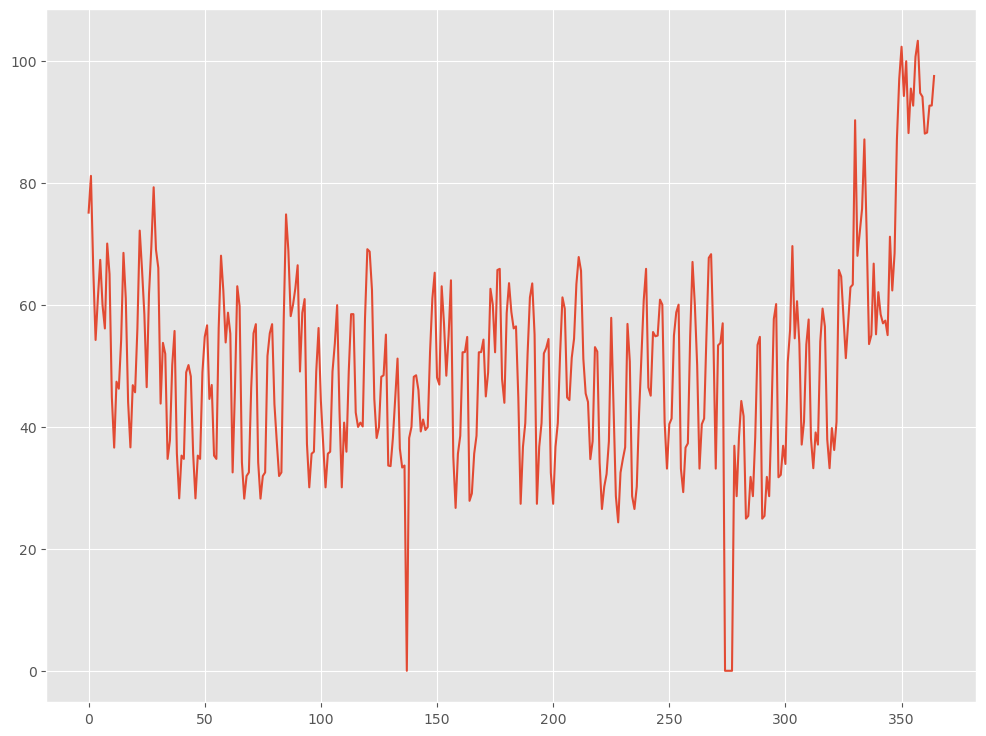

In [67]:
submit = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_lgb})

print(submit)

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit['pred'].iloc[i] = 0
    
# 予測値を描画
plt.plot(submit['pred'])

submit.columns = submit.iloc[0]
print(submit)
submit.to_csv('LGBM0905_2.csv', index=False)

In [58]:
### XGBoost ###

import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(x_tr.values, y_tr.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# 特徴量重要度（Feature Importances）
df_importance = pd.DataFrame(zip(x_tr.columns,
                                 regressor.feature_importances_),
                             columns=["Features","Importance"])
df_importance = df_importance.sort_values("Importance",
                                          ascending=False)
df_importance #確認

,Features,Importance
7,y_lag_365,0.284230
3,price,0.168052
4,year,0.122098
1,price_am,0.099351
13,price_pm_lag_365,0.078436
2,price_pm,0.067654
5,month,0.039875
11,price_pm_lag_1,0.025654
6,weekday,0.023308
8,price_am_lag_1,0.020810


In [60]:
# 予測
train_pred = regressor.predict(x_tr.values)
valid_pred = regressor.predict(x_va.values)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# 精度指標（テストデータ）
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, valid_pred)))
print('MAE:')
print(mean_absolute_error(y_test, valid_pred))
print('MAPE:')
print(mean_absolute_percentage_error(y_test, valid_pred))

RMSE:
10.934731517431167
MAE:
8.636187874780942
MAPE:
0.19143021731858223


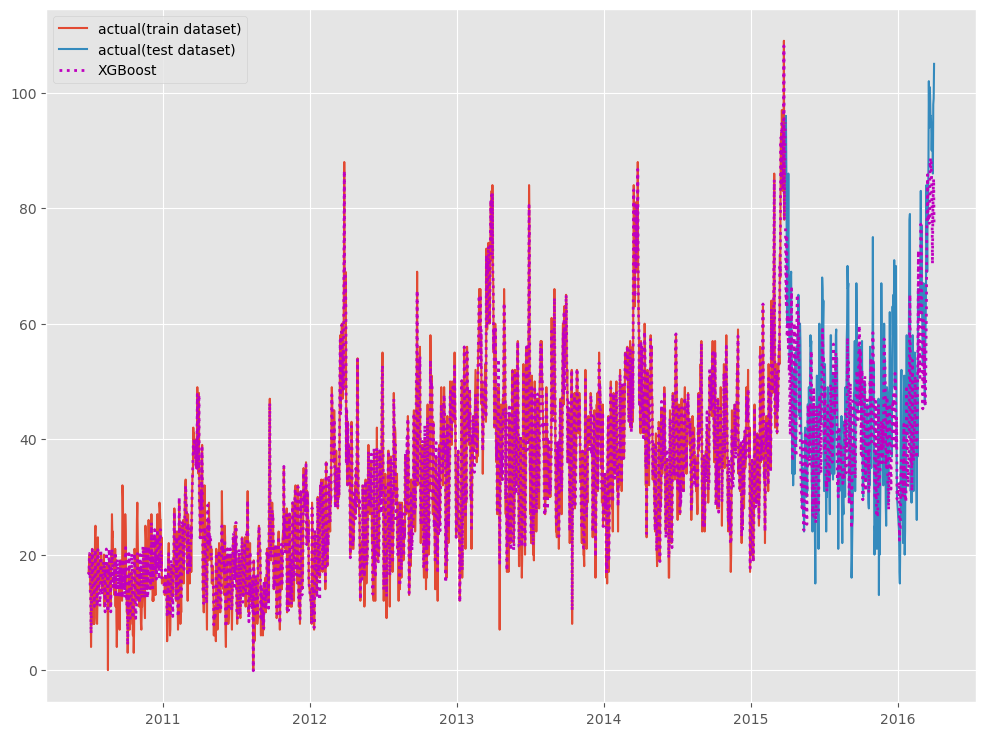

In [61]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(y_train.index, y_train.values, label="actual(train dataset)")
ax.plot(y_test.index, y_test.values, label="actual(test dataset)")
ax.plot(y_train.index, train_pred, linestyle="dotted", lw=2,color="m")
ax.plot(y_test.index, test_pred, label="XGBoost", linestyle="dotted", lw=2, color="m") 
plt.legend()

In [66]:
pred_xgb = regressor.predict(test_data_open.values)

submit_xgb = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_xgb})

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit_xgb['pred'].iloc[i] = 0

submit_xgb

/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_xgb['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: Se

,datetime,pred
0,2016-04-01,63.198486
1,2016-04-02,75.893250
2,2016-04-03,55.166782
3,2016-04-04,62.232346
4,2016-04-05,72.111298
...,...,...
360,2017-03-27,70.372025
361,2017-03-28,71.345116
362,2017-03-29,81.478096
363,2017-03-30,90.237473


In [72]:
# 平均をとってアンサンブル
submit_ensemble = pd.DataFrame({'datetime' : test_data.index, 'pred' : ((pred_xgb) + (pred_lgb)) / 2})
submit_ensemble.columns = submit.iloc[0]

In [73]:
submit_ensemble

,2016-04-01 00:00:00,66.407773
0,2016-04-01,64.803130
1,2016-04-02,71.582382
2,2016-04-03,60.866888
3,2016-04-04,67.772229
4,2016-04-05,66.055382
...,...,...
360,2017-03-27,74.048084
361,2017-03-28,74.534630
362,2017-03-29,80.658171
363,2017-03-30,87.388396


In [74]:
submit_ensemble.to_csv('ensemble_0903_1.csv', index=False)